In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "Apogee"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelos para treinamento

In [4]:
# define baseline model
def baseline_model_teste1():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [5]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [6]:
AouG = "Dwarfs"
NomeBase = "Apogee"

In [7]:
AnasCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [8]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                            
iDR4_3_SPLUS-n01s18_0001709  0.3095  0.4087  1.0068  1.0890  1.3712  1.5495   
iDR4_3_SPLUS-n01s18_0002708  0.2271  0.3904  1.0625  1.1742  1.5712  1.7590   
iDR4_3_SPLUS-n01s18_0005394  0.3142  0.3884  0.9796  1.0733  1.3174  1.4928   
iDR4_3_SPLUS-n01s18_0006515  0.3983  0.4477  0.8776  0.9634  1.1387  1.2856   
iDR4_3_SPLUS-n01s18_0007564  0.2810  0.4724  1.0499  1.1560  1.5345  1.7041   
...                             ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0123337        0.2819  0.4538  1.0269  1.1240  1.5261  1.6795   
iDR4_3_MC0017_0138801        0.3415  0.4028  0.8486  0.9161  1.2174  1.3536   
iDR4_3_MC0017_0192087        0.3237  0.4021  0.9218  0.9824  1.3037  1.4461   
iDR4_3_MC0017_0184348        0.2601  0.3918  0.9703  1.0342  1.4245  1.5723   
iDR4_3_MC0017_0185961        0.3401  0.3748  0.8844  0.9293  1.2556  1.4015   

                                u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                           ...              
iDR4_3_SPLUS-n01s18_0001709  1.8077  1.8099  1.8807  1.8613  ...  5802.4287   
iDR4_3_SPLUS-n01s18_0002708  2.1391  2.1734  2.2793  2.2957  ...  5399.4194   
iDR4_3_SPLUS-n01s18_0005394  1.7332  1.7329  1.8070  1.8032  ...  5797.1396   
iDR4_3_SPLUS-n01s18_0006515  1.5044  1.4994  1.5705  1.5498  ...  5893.2480   
iDR4_3_SPLUS-n01s18_0007564  1.7736  2.0101  1.8570  2.1712  ...  5543.4917   
...                             ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0123337        2.0430  2.0816  2.1816  2.1742  ...  5316.5186   
iDR4_3_MC0017_0138801        1.6118  1.6199  1.7006  1.6894  ...  5810.5635   
iDR4_3_MC0017_0192087        1.7065  1.7058  1.7956  1.7810  ...  5675.1340   
iDR4_3_MC0017_0184348        1.9041  1.9216  2.0345  2.0357  ...  5379.8423   
iDR4_3_MC0017_0185961        1.6863  1.7029  1.8248  1.8411  ...  5863.3240   

                                 LOGG      FE_H   ALPHA_M      C_FE     CA_FE  \
ID                                                                              
iDR4_3_SPLUS-n01s18_0001709  4.254205  0.147120  0.002020 -0.050585 -0.065713   
iDR4_3_SPLUS-n01s18_0002708  4.524888 -0.073971  0.039870 -0.102907 -0.006521   
iDR4_3_SPLUS-n01s18_0005394  4.418411 -0.023264  0.018107  0.123594 -0.054569   
iDR4_3_SPLUS-n01s18_0006515  4.201298 -0.412770  0.048583  0.078623  0.027116   
iDR4_3_SPLUS-n01s18_0007564  4.453466  0.143420  0.010248 -0.039677 -0.006861   
...                               ...       ...       ...       ...       ...   
iDR4_3_MC0017_0123337        4.516725  0.023225  0.000565 -0.063870 -0.022534   
iDR4_3_MC0017_0138801        4.427444 -0.006535 -0.045383 -0.157521 -0.017759   
iDR4_3_MC0017_0192087        4.488830 -0.004341 -0.029533 -0.090110 -0.017188   
iDR4_3_MC0017_0184348        4.503495 -0.137720  0.036358 -0.061838 -0.000539   
iDR4_3_MC0017_0185961        4.411817 -0.272750  0.128755 -0.148010  0.142876   

                                 N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                   
iDR4_3_SPLUS-n01s18_0001709  0.198130  0.047880 -0.005581  0.097538  
iDR4_3_SPLUS-n01s18_0002708 -0.021516  0.008237  0.064352  0.076568  
iDR4_3_SPLUS-n01s18_0005394 -0.158096  0.029543  0.058660  0.035355  
iDR4_3_SPLUS-n01s18_0006515  0.330810  0.046450  0.100511  0.164855  
iDR4_3_SPLUS-n01s18_0007564  0.140530  0.044830  0.057242  0.062623  
...                               ...       ...       ...       ...  
iDR4_3_MC0017_0123337       -0.152347 -0.010128  0.045152  0.068534  
iDR4_3_MC0017_0138801       -0.006624 -0.054354 -0.051813  0.032612  
iDR4_3_MC0017_0192087        0.095603  0.021082 -0.033828  0.058242  
iDR4_3_MC0017_0184348       -0.051321 -0.003090  0.068527  0.078891  
iDR4_3_MC0017_0185961        0.502880  0.005610  0.199459  0.080455  

[2406 ro

In [9]:
xtrain = AnasCores.iloc[:, :66]

In [10]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [11]:
ytrain = AnasCores[columnYtrain]

In [12]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['TEFF']), 'teffApogee')

In [13]:
#encoder.save_encoders()

In [14]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [15]:
print('TEFF =', AnasCores['TEFF'].min())
print('LOGG = ', AnasCores['LOGG'].min())
print('Feh = ', AnasCores['FE_H'].min())
print('Alpha = ', AnasCores['ALPHA_M'].min())

print('cfe =', AnasCores['C_FE'].min())
print('cafe = ', AnasCores['CA_FE'].min())
print('nfe = ', AnasCores['N_FE'].min())
print('mgfe = ', AnasCores['MG_FE'].min())
print('sife = ', AnasCores['SI_FE'].min())
print('nife = ', AnasCores['NI_FE'].min())

TEFF = 4409.94
LOGG =  2.345301
Feh =  -2.3154
Alpha =  -999.0
cfe = -999.0
cafe =  -999.0
nfe =  -999.0
mgfe =  -0.75582135
sife =  -999.0
nife =  -999.0


##### Separando base para Treinamento da temperatura, logg e feh

In [17]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [18]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [19]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0037_0010930  5385.6396  4.528972 -0.441610  0.077427   
iDR4_3_SPLUS-s02s12_0025554   5814.8613  4.457798  0.005146 -0.033193   
iDR4_3_SPLUS-s46s29_0036992   5596.4756  4.506422 -0.143990 -0.002272   
iDR4_3_SPLUS-s45s29_0054686   5549.7764  4.489489 -0.122760  0.009770   
iDR4_3_STRIPE82-0020_0024722  5384.4970  4.496034 -0.150120  0.054176   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0153_0028873  5455.9663  4.541612 -0.264090  0.016935   
iDR4_3_STRIPE82-0071_0015023  5854.2236  4.192680  0.046283 -0.009091   
iDR4_3_STRIPE82-0039_0003887  5429.8457  4.485583  0.071150  0.014043   
iDR4_3_STRIPE82-0080_0037305  5972.4340  4.303161  0.148970 -0.043732   
iDR4_3_SPLUS-n08s42_0031916   5695.7880  4.405008  0.074123 -0.005510   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0037_0010930  0.109090  0.015256 -0.009372  0.035570   
iDR4_3_SPLUS-s02s12_0025554  -0.091545 -0.035782 -0.014354 -0.038580   
iDR4_3_SPLUS-s46s29_0036992   0.111540 -0.158263 -0.104616  0.029740   
iDR4_3_SPLUS-s45s29_0054686  -0.013593  0.039666 -0.131100  0.005470   
iDR4_3_STRIPE82-0020_0024722 -0.031520  0.033706 -0.115990 -0.018620   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0153_0028873 -0.081504 -0.056081 -0.127460 -0.043710   
iDR4_3_STRIPE82-0071_0015023 -0.036412 -0.026428  0.178041  0.055489   
iDR4_3_STRIPE82-0039_0003887 -0.021479 -0.056729  0.100228 -0.008647   
iDR4_3_STRIPE82-0080_0037305 -0.176240 -0.009949  0.382770  0.042430   
iDR4_3_SPLUS-n08s42_0031916  -0.182247 -0.070572  0.098263  0.007546   

                                 MG_FE     SI_FE  teffEncoded  
ID                                                             
iDR4_3_STRIPE82-0037_0010930  0.131664  0.082180    -0.017611  
iDR4_3_SPLUS-s02s12_0025554  -0.052218  0.043553     0.414554  
iDR4_3_SPLUS-s46s29_0036992   0.016193  0.004016     0.194671  
iDR4_3_SPLUS-s45s29_0054686   0.035449  0.067717     0.147651  
iDR4_3_STRIPE82-0020_0024722  0.124111  0.032809    -0.018761  
...                                ...       ...          ...  
iDR4_3_STRIPE82-0153_0028873  0.034142  0.046772     0.053198  
iDR4_3_STRIPE82-0071_0015023 -0.019522  0.055316     0.454186  
iDR4_3_STRIPE82-0039_0003887  0.049971  0.076448     0.026898  
iDR4_3_STRIPE82-0080_0037305 -0.066181  0.061826     0.573207  
iDR4_3_SPLUS-n08s42_0031916   0.067596  0.014880     0.294664  

[1731 rows x 11 columns]

### Teff

In [20]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [21]:
modelTEFF = baseline_model_teste()

In [22]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
1/1 - 2s - loss: 0.1759 - val_loss: 0.1649 - 2s/epoch - 2s/step
Epoch 2/3000
1/1 - 0s - loss: 0.1747 - val_loss: 0.1639 - 55ms/epoch - 55ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.1735 - val_loss: 0.1628 - 63ms/epoch - 63ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.1722 - val_loss: 0.1617 - 56ms/epoch - 56ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.1710 - val_loss: 0.1606 - 56ms/epoch - 56ms/step
Epoch 6/3000
1/1 - 0s - loss: 0.1697 - val_loss: 0.1594 - 72ms/epoch - 72ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.1684 - val_loss: 0.1582 - 50ms/epoch - 50ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.1669 - val_loss: 0.1570 - 104ms/epoch - 104ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.1655 - val_loss: 0.1557 - 66ms/epoch - 66ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.1640 - val_loss: 0.1543 - 74ms/epoch - 74ms/step
Epoch 11/3000
1/1 - 0s - loss: 0.1624 - val_loss: 0.1528 - 53ms/epoch - 53ms/step
Epoch 12/3000
1/1 - 0s - loss: 0.1608 - val_loss: 0.1513 - 113ms/epoch - 113ms/step
Epoch 13/3000
1/1 - 0s - 

1/1 - 0s - loss: 0.0904 - val_loss: 0.1001 - 36ms/epoch - 36ms/step
Epoch 102/3000
1/1 - 0s - loss: 0.0902 - val_loss: 0.0999 - 34ms/epoch - 34ms/step
Epoch 103/3000
1/1 - 0s - loss: 0.0901 - val_loss: 0.0998 - 36ms/epoch - 36ms/step
Epoch 104/3000
1/1 - 0s - loss: 0.0899 - val_loss: 0.0996 - 34ms/epoch - 34ms/step
Epoch 105/3000
1/1 - 0s - loss: 0.0898 - val_loss: 0.0994 - 36ms/epoch - 36ms/step
Epoch 106/3000
1/1 - 0s - loss: 0.0896 - val_loss: 0.0992 - 34ms/epoch - 34ms/step
Epoch 107/3000
1/1 - 0s - loss: 0.0895 - val_loss: 0.0990 - 33ms/epoch - 33ms/step
Epoch 108/3000
1/1 - 0s - loss: 0.0893 - val_loss: 0.0988 - 34ms/epoch - 34ms/step
Epoch 109/3000
1/1 - 0s - loss: 0.0892 - val_loss: 0.0986 - 36ms/epoch - 36ms/step
Epoch 110/3000
1/1 - 0s - loss: 0.0890 - val_loss: 0.0984 - 39ms/epoch - 39ms/step
Epoch 111/3000
1/1 - 0s - loss: 0.0889 - val_loss: 0.0982 - 37ms/epoch - 37ms/step
Epoch 112/3000
1/1 - 0s - loss: 0.0887 - val_loss: 0.0981 - 38ms/epoch - 38ms/step
Epoch 113/3000
1/1 

Epoch 200/3000
1/1 - 0s - loss: 0.0648 - val_loss: 0.0684 - 38ms/epoch - 38ms/step
Epoch 201/3000
1/1 - 0s - loss: 0.0645 - val_loss: 0.0681 - 39ms/epoch - 39ms/step
Epoch 202/3000
1/1 - 0s - loss: 0.0643 - val_loss: 0.0678 - 38ms/epoch - 38ms/step
Epoch 203/3000
1/1 - 0s - loss: 0.0640 - val_loss: 0.0675 - 39ms/epoch - 39ms/step
Epoch 204/3000
1/1 - 0s - loss: 0.0637 - val_loss: 0.0672 - 38ms/epoch - 38ms/step
Epoch 205/3000
1/1 - 0s - loss: 0.0635 - val_loss: 0.0669 - 38ms/epoch - 38ms/step
Epoch 206/3000
1/1 - 0s - loss: 0.0632 - val_loss: 0.0667 - 37ms/epoch - 37ms/step
Epoch 207/3000
1/1 - 0s - loss: 0.0630 - val_loss: 0.0664 - 40ms/epoch - 40ms/step
Epoch 208/3000
1/1 - 0s - loss: 0.0628 - val_loss: 0.0662 - 39ms/epoch - 39ms/step
Epoch 209/3000
1/1 - 0s - loss: 0.0625 - val_loss: 0.0659 - 41ms/epoch - 41ms/step
Epoch 210/3000
1/1 - 0s - loss: 0.0623 - val_loss: 0.0657 - 44ms/epoch - 44ms/step
Epoch 211/3000
1/1 - 0s - loss: 0.0621 - val_loss: 0.0655 - 43ms/epoch - 43ms/step
Epoc

Epoch 299/3000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0563 - 50ms/epoch - 50ms/step
Epoch 300/3000
1/1 - 0s - loss: 0.0526 - val_loss: 0.0562 - 51ms/epoch - 51ms/step
Epoch 301/3000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0562 - 46ms/epoch - 46ms/step
Epoch 302/3000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0561 - 45ms/epoch - 45ms/step
Epoch 303/3000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0560 - 46ms/epoch - 46ms/step
Epoch 304/3000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0560 - 49ms/epoch - 49ms/step
Epoch 305/3000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0559 - 48ms/epoch - 48ms/step
Epoch 306/3000
1/1 - 0s - loss: 0.0522 - val_loss: 0.0558 - 247ms/epoch - 247ms/step
Epoch 307/3000
1/1 - 0s - loss: 0.0522 - val_loss: 0.0558 - 88ms/epoch - 88ms/step
Epoch 308/3000
1/1 - 0s - loss: 0.0521 - val_loss: 0.0557 - 41ms/epoch - 41ms/step
Epoch 309/3000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0556 - 37ms/epoch - 37ms/step
Epoch 310/3000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0556 - 38ms/epoch - 38ms/step
Ep

Epoch 398/3000
1/1 - 0s - loss: 0.0474 - val_loss: 0.0505 - 35ms/epoch - 35ms/step
Epoch 399/3000
1/1 - 0s - loss: 0.0473 - val_loss: 0.0505 - 36ms/epoch - 36ms/step
Epoch 400/3000
1/1 - 0s - loss: 0.0472 - val_loss: 0.0504 - 37ms/epoch - 37ms/step
Epoch 401/3000
1/1 - 0s - loss: 0.0472 - val_loss: 0.0504 - 39ms/epoch - 39ms/step
Epoch 402/3000
1/1 - 0s - loss: 0.0472 - val_loss: 0.0504 - 39ms/epoch - 39ms/step
Epoch 403/3000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0503 - 36ms/epoch - 36ms/step
Epoch 404/3000
1/1 - 0s - loss: 0.0471 - val_loss: 0.0503 - 36ms/epoch - 36ms/step
Epoch 405/3000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0502 - 40ms/epoch - 40ms/step
Epoch 406/3000
1/1 - 0s - loss: 0.0470 - val_loss: 0.0501 - 39ms/epoch - 39ms/step
Epoch 407/3000
1/1 - 0s - loss: 0.0469 - val_loss: 0.0501 - 37ms/epoch - 37ms/step
Epoch 408/3000
1/1 - 0s - loss: 0.0469 - val_loss: 0.0501 - 40ms/epoch - 40ms/step
Epoch 409/3000
1/1 - 0s - loss: 0.0468 - val_loss: 0.0500 - 37ms/epoch - 37ms/step
Epoc

Epoch 497/3000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0461 - 63ms/epoch - 63ms/step
Epoch 498/3000
1/1 - 0s - loss: 0.0432 - val_loss: 0.0460 - 66ms/epoch - 66ms/step
Epoch 499/3000
1/1 - 0s - loss: 0.0432 - val_loss: 0.0460 - 64ms/epoch - 64ms/step
Epoch 500/3000
1/1 - 0s - loss: 0.0431 - val_loss: 0.0459 - 64ms/epoch - 64ms/step
Epoch 501/3000
1/1 - 0s - loss: 0.0431 - val_loss: 0.0459 - 67ms/epoch - 67ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0430 - val_loss: 0.0458 - 61ms/epoch - 61ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0430 - val_loss: 0.0458 - 63ms/epoch - 63ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0429 - val_loss: 0.0457 - 64ms/epoch - 64ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0429 - val_loss: 0.0457 - 61ms/epoch - 61ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0429 - val_loss: 0.0457 - 63ms/epoch - 63ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0429 - val_loss: 0.0456 - 78ms/epoch - 78ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0428 - val_loss: 0.0456 - 103ms/epoch - 103ms/step
Ep

Epoch 596/3000
1/1 - 0s - loss: 0.0400 - val_loss: 0.0422 - 39ms/epoch - 39ms/step
Epoch 597/3000
1/1 - 0s - loss: 0.0399 - val_loss: 0.0422 - 36ms/epoch - 36ms/step
Epoch 598/3000
1/1 - 0s - loss: 0.0399 - val_loss: 0.0422 - 36ms/epoch - 36ms/step
Epoch 599/3000
1/1 - 0s - loss: 0.0398 - val_loss: 0.0421 - 36ms/epoch - 36ms/step
Epoch 600/3000
1/1 - 0s - loss: 0.0398 - val_loss: 0.0422 - 37ms/epoch - 37ms/step
Epoch 601/3000
1/1 - 0s - loss: 0.0398 - val_loss: 0.0421 - 39ms/epoch - 39ms/step
Epoch 602/3000
1/1 - 0s - loss: 0.0398 - val_loss: 0.0421 - 36ms/epoch - 36ms/step
Epoch 603/3000
1/1 - 0s - loss: 0.0398 - val_loss: 0.0420 - 38ms/epoch - 38ms/step
Epoch 604/3000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0420 - 37ms/epoch - 37ms/step
Epoch 605/3000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0419 - 38ms/epoch - 38ms/step
Epoch 606/3000
1/1 - 0s - loss: 0.0396 - val_loss: 0.0419 - 39ms/epoch - 39ms/step
Epoch 607/3000
1/1 - 0s - loss: 0.0396 - val_loss: 0.0419 - 38ms/epoch - 38ms/step
Epoc

Epoch 695/3000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0394 - 44ms/epoch - 44ms/step
Epoch 696/3000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0392 - 48ms/epoch - 48ms/step
Epoch 697/3000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0393 - 48ms/epoch - 48ms/step
Epoch 698/3000
1/1 - 0s - loss: 0.0372 - val_loss: 0.0392 - 46ms/epoch - 46ms/step
Epoch 699/3000
1/1 - 0s - loss: 0.0372 - val_loss: 0.0392 - 46ms/epoch - 46ms/step
Epoch 700/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0392 - 44ms/epoch - 44ms/step
Epoch 701/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0391 - 41ms/epoch - 41ms/step
Epoch 702/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0392 - 43ms/epoch - 43ms/step
Epoch 703/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0391 - 46ms/epoch - 46ms/step
Epoch 704/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0392 - 42ms/epoch - 42ms/step
Epoch 705/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0391 - 44ms/epoch - 44ms/step
Epoch 706/3000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0392 - 44ms/epoch - 44ms/step
Epoc

Epoch 794/3000
1/1 - 0s - loss: 0.0354 - val_loss: 0.0375 - 49ms/epoch - 49ms/step
Epoch 795/3000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0377 - 69ms/epoch - 69ms/step
Epoch 796/3000
1/1 - 0s - loss: 0.0353 - val_loss: 0.0373 - 50ms/epoch - 50ms/step
Epoch 797/3000
1/1 - 0s - loss: 0.0351 - val_loss: 0.0372 - 47ms/epoch - 47ms/step
Epoch 798/3000
1/1 - 0s - loss: 0.0351 - val_loss: 0.0376 - 49ms/epoch - 49ms/step
Epoch 799/3000
1/1 - 0s - loss: 0.0352 - val_loss: 0.0373 - 49ms/epoch - 49ms/step
Epoch 800/3000
1/1 - 0s - loss: 0.0353 - val_loss: 0.0375 - 47ms/epoch - 47ms/step
Epoch 801/3000
1/1 - 0s - loss: 0.0352 - val_loss: 0.0372 - 44ms/epoch - 44ms/step
Epoch 802/3000
1/1 - 0s - loss: 0.0350 - val_loss: 0.0372 - 48ms/epoch - 48ms/step
Epoch 803/3000
1/1 - 0s - loss: 0.0350 - val_loss: 0.0374 - 45ms/epoch - 45ms/step
Epoch 804/3000
1/1 - 0s - loss: 0.0351 - val_loss: 0.0372 - 47ms/epoch - 47ms/step
Epoch 805/3000
1/1 - 0s - loss: 0.0351 - val_loss: 0.0373 - 49ms/epoch - 49ms/step
Epoc

Epoch 893/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0357 - 46ms/epoch - 46ms/step
Epoch 894/3000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0357 - 49ms/epoch - 49ms/step
Epoch 895/3000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0358 - 48ms/epoch - 48ms/step
Epoch 896/3000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0356 - 50ms/epoch - 50ms/step
Epoch 897/3000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0359 - 42ms/epoch - 42ms/step
Epoch 898/3000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0357 - 56ms/epoch - 56ms/step
Epoch 899/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0360 - 53ms/epoch - 53ms/step
Epoch 900/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0357 - 49ms/epoch - 49ms/step
Epoch 901/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0360 - 47ms/epoch - 47ms/step
Epoch 902/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0356 - 49ms/epoch - 49ms/step
Epoch 903/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0360 - 48ms/epoch - 48ms/step
Epoch 904/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0356 - 49ms/epoch - 49ms/step
Epoc

Epoch 992/3000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0348 - 37ms/epoch - 37ms/step
Epoch 993/3000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0344 - 37ms/epoch - 37ms/step
Epoch 994/3000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0345 - 37ms/epoch - 37ms/step
Epoch 995/3000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0345 - 36ms/epoch - 36ms/step
Epoch 996/3000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0344 - 35ms/epoch - 35ms/step
Epoch 997/3000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0346 - 34ms/epoch - 34ms/step
Epoch 998/3000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0344 - 35ms/epoch - 35ms/step
Epoch 999/3000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0348 - 39ms/epoch - 39ms/step
Epoch 1000/3000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0345 - 36ms/epoch - 36ms/step
Epoch 1001/3000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0350 - 37ms/epoch - 37ms/step
Epoch 1002/3000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0346 - 38ms/epoch - 38ms/step
Epoch 1003/3000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0354 - 35ms/epoch - 35ms/step


Epoch 1090/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0335 - 38ms/epoch - 38ms/step
Epoch 1091/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0336 - 39ms/epoch - 39ms/step
Epoch 1092/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0334 - 40ms/epoch - 40ms/step
Epoch 1093/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0335 - 41ms/epoch - 41ms/step
Epoch 1094/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0334 - 45ms/epoch - 45ms/step
Epoch 1095/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0335 - 49ms/epoch - 49ms/step
Epoch 1096/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0334 - 41ms/epoch - 41ms/step
Epoch 1097/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0334 - 39ms/epoch - 39ms/step
Epoch 1098/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0335 - 40ms/epoch - 40ms/step
Epoch 1099/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0334 - 40ms/epoch - 40ms/step
Epoch 1100/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0335 - 39ms/epoch - 39ms/step
Epoch 1101/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0333 - 41ms/epoch - 41

Epoch 1188/3000
1/1 - 0s - loss: 0.0302 - val_loss: 0.0327 - 35ms/epoch - 35ms/step
Epoch 1189/3000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0329 - 34ms/epoch - 34ms/step
Epoch 1190/3000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0327 - 35ms/epoch - 35ms/step
Epoch 1191/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0327 - 34ms/epoch - 34ms/step
Epoch 1192/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0328 - 43ms/epoch - 43ms/step
Epoch 1193/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0326 - 34ms/epoch - 34ms/step
Epoch 1194/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0329 - 33ms/epoch - 33ms/step
Epoch 1195/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0326 - 34ms/epoch - 34ms/step
Epoch 1196/3000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0329 - 35ms/epoch - 35ms/step
Epoch 1197/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0326 - 35ms/epoch - 35ms/step
Epoch 1198/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0328 - 35ms/epoch - 35ms/step
Epoch 1199/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0326 - 36ms/epoch - 36

Epoch 1286/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0321 - 39ms/epoch - 39ms/step
Epoch 1287/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0327 - 44ms/epoch - 44ms/step
Epoch 1288/3000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0322 - 39ms/epoch - 39ms/step
Epoch 1289/3000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0327 - 44ms/epoch - 44ms/step
Epoch 1290/3000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0321 - 42ms/epoch - 42ms/step
Epoch 1291/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0324 - 67ms/epoch - 67ms/step
Epoch 1292/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0320 - 91ms/epoch - 91ms/step
Epoch 1293/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0321 - 46ms/epoch - 46ms/step
Epoch 1294/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0320 - 75ms/epoch - 75ms/step
Epoch 1295/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0319 - 41ms/epoch - 41ms/step
Epoch 1296/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0323 - 40ms/epoch - 40ms/step
Epoch 1297/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0320 - 85ms/epoch - 85

Epoch 1384/3000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0315 - 40ms/epoch - 40ms/step
Epoch 1385/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0317 - 41ms/epoch - 41ms/step
Epoch 1386/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0315 - 40ms/epoch - 40ms/step
Epoch 1387/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0318 - 39ms/epoch - 39ms/step
Epoch 1388/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0315 - 39ms/epoch - 39ms/step
Epoch 1389/3000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0320 - 37ms/epoch - 37ms/step
Epoch 1390/3000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0316 - 38ms/epoch - 38ms/step
Epoch 1391/3000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0322 - 41ms/epoch - 41ms/step
Epoch 1392/3000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0317 - 40ms/epoch - 40ms/step
Epoch 1393/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0325 - 37ms/epoch - 37ms/step
Epoch 1394/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0317 - 37ms/epoch - 37ms/step
Epoch 1395/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0324 - 39ms/epoch - 39

Epoch 1482/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0312 - 36ms/epoch - 36ms/step
Epoch 1483/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0311 - 34ms/epoch - 34ms/step
Epoch 1484/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0311 - 35ms/epoch - 35ms/step
Epoch 1485/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0311 - 38ms/epoch - 38ms/step
Epoch 1486/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0311 - 38ms/epoch - 38ms/step
Epoch 1487/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0311 - 38ms/epoch - 38ms/step
Epoch 1488/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0310 - 37ms/epoch - 37ms/step
Epoch 1489/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0312 - 37ms/epoch - 37ms/step
Epoch 1490/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0310 - 37ms/epoch - 37ms/step
Epoch 1491/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0312 - 35ms/epoch - 35ms/step
Epoch 1492/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0310 - 35ms/epoch - 35ms/step
Epoch 1493/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0314 - 34ms/epoch - 34

Epoch 1580/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0308 - 39ms/epoch - 39ms/step
Epoch 1581/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0307 - 40ms/epoch - 40ms/step
Epoch 1582/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0313 - 40ms/epoch - 40ms/step
Epoch 1583/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0309 - 40ms/epoch - 40ms/step
Epoch 1584/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0314 - 39ms/epoch - 39ms/step
Epoch 1585/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0307 - 40ms/epoch - 40ms/step
Epoch 1586/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0307 - 42ms/epoch - 42ms/step
Epoch 1587/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0310 - 40ms/epoch - 40ms/step
Epoch 1588/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0307 - 41ms/epoch - 41ms/step
Epoch 1589/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0313 - 42ms/epoch - 42ms/step
Epoch 1590/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0307 - 40ms/epoch - 40ms/step
Epoch 1591/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0309 - 40ms/epoch - 40

Epoch 1678/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0318 - 37ms/epoch - 37ms/step
Epoch 1679/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0308 - 36ms/epoch - 36ms/step
Epoch 1680/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0318 - 37ms/epoch - 37ms/step
Epoch 1681/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0306 - 36ms/epoch - 36ms/step
Epoch 1682/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0311 - 36ms/epoch - 36ms/step
Epoch 1683/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0304 - 35ms/epoch - 35ms/step
Epoch 1684/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0305 - 35ms/epoch - 35ms/step
Epoch 1685/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0307 - 42ms/epoch - 42ms/step
Epoch 1686/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0304 - 45ms/epoch - 45ms/step
Epoch 1687/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0312 - 35ms/epoch - 35ms/step
Epoch 1688/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0305 - 35ms/epoch - 35ms/step
Epoch 1689/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0311 - 33ms/epoch - 33

Epoch 1776/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0302 - 35ms/epoch - 35ms/step
Epoch 1777/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0311 - 38ms/epoch - 38ms/step
Epoch 1778/3000
1/1 - 0s - loss: 0.0275 - val_loss: 0.0304 - 37ms/epoch - 37ms/step
Epoch 1779/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0314 - 37ms/epoch - 37ms/step
Epoch 1780/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0305 - 38ms/epoch - 38ms/step
Epoch 1781/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0315 - 39ms/epoch - 39ms/step
Epoch 1782/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0304 - 39ms/epoch - 39ms/step
Epoch 1783/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0312 - 38ms/epoch - 38ms/step
Epoch 1784/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0302 - 39ms/epoch - 39ms/step
Epoch 1785/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0305 - 37ms/epoch - 37ms/step
Epoch 1786/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0302 - 38ms/epoch - 38ms/step
Epoch 1787/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0302 - 37ms/epoch - 37

Epoch 1874/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0299 - 90ms/epoch - 90ms/step
Epoch 1875/3000
1/1 - 0s - loss: 0.0269 - val_loss: 0.0301 - 102ms/epoch - 102ms/step
Epoch 1876/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0302 - 72ms/epoch - 72ms/step
Epoch 1877/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0300 - 64ms/epoch - 64ms/step
Epoch 1878/3000
1/1 - 0s - loss: 0.0269 - val_loss: 0.0306 - 65ms/epoch - 65ms/step
Epoch 1879/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0301 - 70ms/epoch - 70ms/step
Epoch 1880/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0307 - 88ms/epoch - 88ms/step
Epoch 1881/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0300 - 75ms/epoch - 75ms/step
Epoch 1882/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0304 - 64ms/epoch - 64ms/step
Epoch 1883/3000
1/1 - 0s - loss: 0.0269 - val_loss: 0.0299 - 65ms/epoch - 65ms/step
Epoch 1884/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0301 - 61ms/epoch - 61ms/step
Epoch 1885/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0301 - 51ms/epoch - 

Epoch 1972/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0298 - 49ms/epoch - 49ms/step
Epoch 1973/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0299 - 50ms/epoch - 50ms/step
Epoch 1974/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0300 - 49ms/epoch - 49ms/step
Epoch 1975/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0298 - 50ms/epoch - 50ms/step
Epoch 1976/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0303 - 50ms/epoch - 50ms/step
Epoch 1977/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0298 - 51ms/epoch - 51ms/step
Epoch 1978/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0302 - 47ms/epoch - 47ms/step
Epoch 1979/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0298 - 50ms/epoch - 50ms/step
Epoch 1980/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0299 - 57ms/epoch - 57ms/step
Epoch 1981/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0300 - 47ms/epoch - 47ms/step
Epoch 1982/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0298 - 49ms/epoch - 49ms/step
Epoch 1983/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0302 - 50ms/epoch - 50

Epoch 2070/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0297 - 36ms/epoch - 36ms/step
Epoch 2071/3000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0297 - 35ms/epoch - 35ms/step
Epoch 2072/3000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0303 - 34ms/epoch - 34ms/step
Epoch 2073/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0298 - 34ms/epoch - 34ms/step
Epoch 2074/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0304 - 36ms/epoch - 36ms/step
Epoch 2075/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0297 - 37ms/epoch - 37ms/step
Epoch 2076/3000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0299 - 35ms/epoch - 35ms/step
Epoch 2077/3000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0298 - 35ms/epoch - 35ms/step
Epoch 2078/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0297 - 35ms/epoch - 35ms/step
Epoch 2079/3000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0301 - 35ms/epoch - 35ms/step
Epoch 2080/3000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0297 - 34ms/epoch - 34ms/step
Epoch 2081/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0303 - 35ms/epoch - 35

Epoch 2168/3000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0300 - 54ms/epoch - 54ms/step
Epoch 2169/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0296 - 53ms/epoch - 53ms/step
Epoch 2170/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0297 - 54ms/epoch - 54ms/step
Epoch 2171/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0298 - 58ms/epoch - 58ms/step
Epoch 2172/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0296 - 48ms/epoch - 48ms/step
Epoch 2173/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0300 - 49ms/epoch - 49ms/step
Epoch 2174/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0296 - 46ms/epoch - 46ms/step
Epoch 2175/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0300 - 52ms/epoch - 52ms/step
Epoch 2176/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0296 - 50ms/epoch - 50ms/step
Epoch 2177/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0298 - 50ms/epoch - 50ms/step
Epoch 2178/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0296 - 50ms/epoch - 50ms/step
Epoch 2179/3000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0297 - 45ms/epoch - 45

Epoch 2266/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0301 - 35ms/epoch - 35ms/step
Epoch 2267/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0295 - 38ms/epoch - 38ms/step
Epoch 2268/3000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0298 - 36ms/epoch - 36ms/step
Epoch 2269/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0295 - 36ms/epoch - 36ms/step
Epoch 2270/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0296 - 34ms/epoch - 34ms/step
Epoch 2271/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0296 - 35ms/epoch - 35ms/step
Epoch 2272/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0295 - 33ms/epoch - 33ms/step
Epoch 2273/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0298 - 34ms/epoch - 34ms/step
Epoch 2274/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0295 - 35ms/epoch - 35ms/step
Epoch 2275/3000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0299 - 34ms/epoch - 34ms/step
Epoch 2276/3000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0295 - 36ms/epoch - 36ms/step
Epoch 2277/3000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0300 - 37ms/epoch - 37

Epoch 2364/3000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0294 - 77ms/epoch - 77ms/step
Epoch 2365/3000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0297 - 35ms/epoch - 35ms/step
Epoch 2366/3000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0294 - 69ms/epoch - 69ms/step
Epoch 2367/3000
1/1 - 0s - loss: 0.0259 - val_loss: 0.0298 - 35ms/epoch - 35ms/step
Epoch 2368/3000
1/1 - 0s - loss: 0.0259 - val_loss: 0.0294 - 72ms/epoch - 72ms/step
Epoch 2369/3000
1/1 - 0s - loss: 0.0259 - val_loss: 0.0300 - 35ms/epoch - 35ms/step
Epoch 2370/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0295 - 73ms/epoch - 73ms/step
Epoch 2371/3000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0302 - 34ms/epoch - 34ms/step
Epoch 2372/3000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0296 - 34ms/epoch - 34ms/step
Epoch 2373/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0305 - 34ms/epoch - 34ms/step
Epoch 2374/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0296 - 35ms/epoch - 35ms/step
Epoch 2375/3000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0306 - 35ms/epoch - 35

Epoch 2462/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0295 - 39ms/epoch - 39ms/step
Epoch 2463/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0294 - 37ms/epoch - 37ms/step
Epoch 2464/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0296 - 36ms/epoch - 36ms/step
Epoch 2465/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0294 - 37ms/epoch - 37ms/step
Epoch 2466/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0297 - 37ms/epoch - 37ms/step
Epoch 2467/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0294 - 39ms/epoch - 39ms/step
Epoch 2468/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0298 - 37ms/epoch - 37ms/step
Epoch 2469/3000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0294 - 37ms/epoch - 37ms/step
Epoch 2470/3000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0300 - 36ms/epoch - 36ms/step
Epoch 2471/3000
1/1 - 0s - loss: 0.0259 - val_loss: 0.0295 - 37ms/epoch - 37ms/step
Epoch 2472/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0304 - 39ms/epoch - 39ms/step
Epoch 2473/3000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0296 - 37ms/epoch - 37

Epoch 2560/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0296 - 47ms/epoch - 47ms/step
Epoch 2561/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0294 - 46ms/epoch - 46ms/step
Epoch 2562/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0296 - 48ms/epoch - 48ms/step
Epoch 2563/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0294 - 50ms/epoch - 50ms/step
Epoch 2564/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0296 - 49ms/epoch - 49ms/step
Epoch 2565/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0294 - 47ms/epoch - 47ms/step
Epoch 2566/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0296 - 45ms/epoch - 45ms/step
Epoch 2567/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0294 - 51ms/epoch - 51ms/step
Epoch 2568/3000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0297 - 51ms/epoch - 51ms/step
Epoch 2569/3000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0294 - 54ms/epoch - 54ms/step
Epoch 2570/3000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0299 - 77ms/epoch - 77ms/step
Epoch 2571/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0294 - 105ms/epoch - 1

Epoch 2658/3000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0306 - 34ms/epoch - 34ms/step
Epoch 2659/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0295 - 34ms/epoch - 34ms/step
Epoch 2660/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0297 - 36ms/epoch - 36ms/step
Epoch 2661/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0297 - 36ms/epoch - 36ms/step
Epoch 2662/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0295 - 36ms/epoch - 36ms/step
Epoch 2663/3000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0302 - 37ms/epoch - 37ms/step
Epoch 2664/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0295 - 37ms/epoch - 37ms/step
Epoch 2665/3000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0302 - 38ms/epoch - 38ms/step
Epoch 2666/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0294 - 37ms/epoch - 37ms/step
Epoch 2667/3000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0297 - 37ms/epoch - 37ms/step
Epoch 2668/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0295 - 37ms/epoch - 37ms/step
Epoch 2669/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0295 - 36ms/epoch - 36

Epoch 2756/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0296 - 45ms/epoch - 45ms/step
Epoch 2757/3000
1/1 - 0s - loss: 0.0255 - val_loss: 0.0306 - 48ms/epoch - 48ms/step
Epoch 2758/3000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0298 - 46ms/epoch - 46ms/step
Epoch 2759/3000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0305 - 51ms/epoch - 51ms/step
Epoch 2760/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0295 - 46ms/epoch - 46ms/step
Epoch 2761/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0296 - 49ms/epoch - 49ms/step
Epoch 2762/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0299 - 48ms/epoch - 48ms/step
Epoch 2763/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0295 - 50ms/epoch - 50ms/step
Epoch 2764/3000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0304 - 54ms/epoch - 54ms/step
Epoch 2765/3000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0296 - 46ms/epoch - 46ms/step
Epoch 2766/3000
1/1 - 0s - loss: 0.0256 - val_loss: 0.0300 - 48ms/epoch - 48ms/step
Epoch 2767/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0295 - 48ms/epoch - 48

Epoch 2854/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0301 - 34ms/epoch - 34ms/step
Epoch 2855/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0295 - 35ms/epoch - 35ms/step
Epoch 2856/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0300 - 33ms/epoch - 33ms/step
Epoch 2857/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0295 - 34ms/epoch - 34ms/step
Epoch 2858/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0300 - 35ms/epoch - 35ms/step
Epoch 2859/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0295 - 36ms/epoch - 36ms/step
Epoch 2860/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0301 - 36ms/epoch - 36ms/step
Epoch 2861/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0296 - 34ms/epoch - 34ms/step
Epoch 2862/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0301 - 35ms/epoch - 35ms/step
Epoch 2863/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0296 - 33ms/epoch - 33ms/step
Epoch 2864/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0303 - 34ms/epoch - 34ms/step
Epoch 2865/3000
1/1 - 0s - loss: 0.0254 - val_loss: 0.0296 - 35ms/epoch - 35

Epoch 2952/3000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0297 - 42ms/epoch - 42ms/step
Epoch 2953/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0297 - 48ms/epoch - 48ms/step
Epoch 2954/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0299 - 53ms/epoch - 53ms/step
Epoch 2955/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0296 - 56ms/epoch - 56ms/step
Epoch 2956/3000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0302 - 123ms/epoch - 123ms/step
Epoch 2957/3000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0297 - 36ms/epoch - 36ms/step
Epoch 2958/3000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0302 - 37ms/epoch - 37ms/step
Epoch 2959/3000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0297 - 38ms/epoch - 38ms/step
Epoch 2960/3000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0301 - 37ms/epoch - 37ms/step
Epoch 2961/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0297 - 37ms/epoch - 37ms/step
Epoch 2962/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0299 - 36ms/epoch - 36ms/step
Epoch 2963/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0297 - 36ms/epoch - 

Text(0, 0.5, 'Loss')

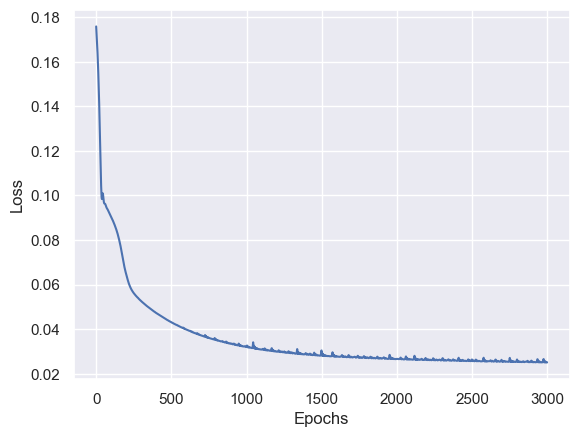

In [23]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

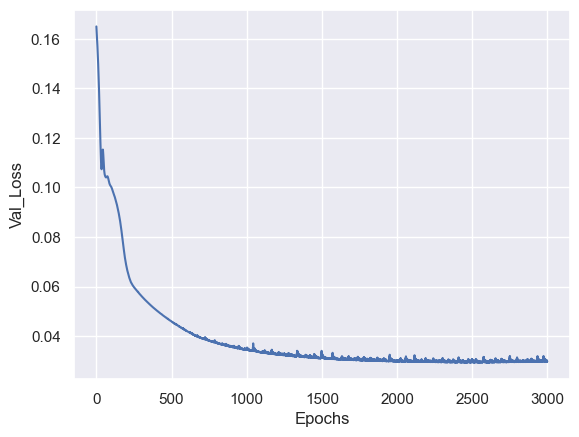

In [24]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [26]:
#modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\TEFF-Dwarfs.h5


In [27]:
predTeff = modelTEFF.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [29]:
predaux = encoder.decode_DataFrame(predTeff, 'teffApogee')
Y_test['TEFF_PredictDecoded'] = predaux

In [31]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0049_0043043  5734.6290  4.200532 -0.114700  0.116345   
iDR4_3_STRIPE82-0006_0013917  5488.8906  4.472672  0.057199  0.010369   
iDR4_3_SPLUS-n01s21_0012158   5892.0330  4.328696 -0.049458 -0.038616   
iDR4_3_STRIPE82-0039_0043985  5458.4697  4.378392  0.354240 -0.017668   
iDR4_3_SPLUS-s46s27_0001144   5414.2627  4.488376 -0.010161  0.015603   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328  5571.1177  4.486858 -0.130290  0.027000   
iDR4_3_MC0144_0020923         5930.7466  4.347804  0.073778 -0.028085   
iDR4_3_SPLUS-s36s48_0010879   5879.0005  4.254626 -0.193250  0.012080   
iDR4_3_STRIPE82-0119_0029599  5917.2266  4.357494  0.264410 -0.029465   
iDR4_3_STRIPE82-0032_0019492  5365.7900  4.564479 -0.423860  0.044161   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0049_0043043  0.092637  0.043326  0.045565  0.090687   
iDR4_3_STRIPE82-0006_0013917  0.049674 -0.040476  0.070401  0.009373   
iDR4_3_SPLUS-n01s21_0012158  -0.104624 -0.012661  0.258026 -0.025835   
iDR4_3_STRIPE82-0039_0043985  0.002601 -0.037814  0.186140  0.019770   
iDR4_3_SPLUS-s46s27_0001144  -0.026065 -0.048343 -0.000674  0.052980   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328 -0.002203  0.039466 -0.001039  0.013680   
iDR4_3_MC0144_0020923        -0.001916  0.128494  0.132718  0.000522   
iDR4_3_SPLUS-s36s48_0010879   0.077043  0.011765  0.284690  0.012350   
iDR4_3_STRIPE82-0119_0029599 -0.088158  0.071446  0.428010  0.045410   
iDR4_3_STRIPE82-0032_0019492  0.052614  0.021266  0.063915  0.024030   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_STRIPE82-0049_0043043  0.186449  0.160328     0.333771   
iDR4_3_STRIPE82-0006_0013917  0.030308  0.096459     0.086348   
iDR4_3_SPLUS-n01s21_0012158   0.010457  0.000236     0.492255   
iDR4_3_STRIPE82-0039_0043985  0.016490  0.082511     0.055719   
iDR4_3_SPLUS-s46s27_0001144   0.041721  0.077075     0.011209   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0030_0025328  0.073435  0.081901     0.169139   
iDR4_3_MC0144_0020923        -0.131843 -0.031297     0.531234   
iDR4_3_SPLUS-s36s48_0010879  -0.025474  0.057351     0.479133   
iDR4_3_STRIPE82-0119_0029599 -0.058911  0.007914     0.517621   
iDR4_3_STRIPE82-0032_0019492  0.089480  0.025549    -0.037597   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_STRIPE82-0049_0043043          5667.877441  
iDR4_3_STRIPE82-0006_0013917          5442.731934  
iDR4_3_SPLUS-n01s21_0012158           5716.502441  
iDR4_3_STRIPE82-0039_0043985          5405.290039  
iDR4_3_SPLUS-s46s27_0001144           5483.412109  
...                                           ...  
iDR4_3_STRIPE82-0030_0025328          5784.730469  
iDR4_3_MC0144_0020923                 5812.328613  
iDR4_3_SPLUS-s36s48_0010879           5919.679199  
iDR4_3_STRIPE82-0119_0029599          5871.614258  
iDR4_3_STRIPE82-0032_0019492          5336.151855  

[482 rows x 12 columns]

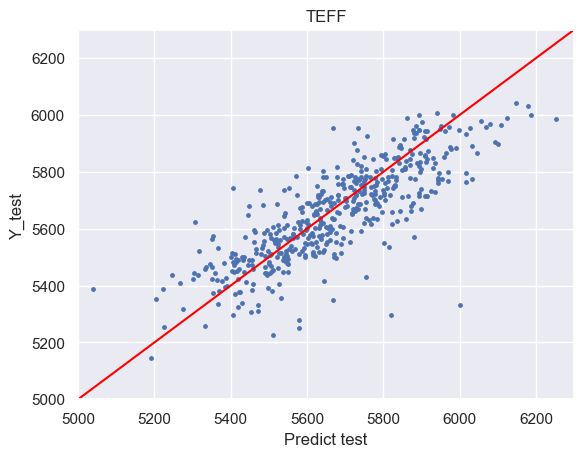

In [35]:
plt.scatter(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
plt.xlim(5000, 6300)
plt.ylim(5000, 6300)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([5000, 7000], [5000, 7000], c='red')

In [37]:
score = r2_score(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 63.0%


In [38]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0049_0043043  5734.6290  4.200532 -0.114700  0.116345   
iDR4_3_STRIPE82-0006_0013917  5488.8906  4.472672  0.057199  0.010369   
iDR4_3_SPLUS-n01s21_0012158   5892.0330  4.328696 -0.049458 -0.038616   
iDR4_3_STRIPE82-0039_0043985  5458.4697  4.378392  0.354240 -0.017668   
iDR4_3_SPLUS-s46s27_0001144   5414.2627  4.488376 -0.010161  0.015603   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328  5571.1177  4.486858 -0.130290  0.027000   
iDR4_3_MC0144_0020923         5930.7466  4.347804  0.073778 -0.028085   
iDR4_3_SPLUS-s36s48_0010879   5879.0005  4.254626 -0.193250  0.012080   
iDR4_3_STRIPE82-0119_0029599  5917.2266  4.357494  0.264410 -0.029465   
iDR4_3_STRIPE82-0032_0019492  5365.7900  4.564479 -0.423860  0.044161   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0049_0043043  0.092637  0.043326  0.045565  0.090687   
iDR4_3_STRIPE82-0006_0013917  0.049674 -0.040476  0.070401  0.009373   
iDR4_3_SPLUS-n01s21_0012158  -0.104624 -0.012661  0.258026 -0.025835   
iDR4_3_STRIPE82-0039_0043985  0.002601 -0.037814  0.186140  0.019770   
iDR4_3_SPLUS-s46s27_0001144  -0.026065 -0.048343 -0.000674  0.052980   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328 -0.002203  0.039466 -0.001039  0.013680   
iDR4_3_MC0144_0020923        -0.001916  0.128494  0.132718  0.000522   
iDR4_3_SPLUS-s36s48_0010879   0.077043  0.011765  0.284690  0.012350   
iDR4_3_STRIPE82-0119_0029599 -0.088158  0.071446  0.428010  0.045410   
iDR4_3_STRIPE82-0032_0019492  0.052614  0.021266  0.063915  0.024030   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_STRIPE82-0049_0043043  0.186449  0.160328     0.333771   
iDR4_3_STRIPE82-0006_0013917  0.030308  0.096459     0.086348   
iDR4_3_SPLUS-n01s21_0012158   0.010457  0.000236     0.492255   
iDR4_3_STRIPE82-0039_0043985  0.016490  0.082511     0.055719   
iDR4_3_SPLUS-s46s27_0001144   0.041721  0.077075     0.011209   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0030_0025328  0.073435  0.081901     0.169139   
iDR4_3_MC0144_0020923        -0.131843 -0.031297     0.531234   
iDR4_3_SPLUS-s36s48_0010879  -0.025474  0.057351     0.479133   
iDR4_3_STRIPE82-0119_0029599 -0.058911  0.007914     0.517621   
iDR4_3_STRIPE82-0032_0019492  0.089480  0.025549    -0.037597   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_STRIPE82-0049_0043043          5667.877441  
iDR4_3_STRIPE82-0006_0013917          5442.731934  
iDR4_3_SPLUS-n01s21_0012158           5716.502441  
iDR4_3_STRIPE82-0039_0043985          5405.290039  
iDR4_3_SPLUS-s46s27_0001144           5483.412109  
...                                           ...  
iDR4_3_STRIPE82-0030_0025328          5784.730469  
iDR4_3_MC0144_0020923                 5812.328613  
iDR4_3_SPLUS-s36s48_0010879           5919.679199  
iDR4_3_STRIPE82-0119_0029599          5871.614258  
iDR4_3_STRIPE82-0032_0019492          5336.151855  

[482 rows x 12 columns]

In [39]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [79]:
Parametro = "LOGG"
columnTrain = 'LOGG'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [80]:
modelLOGG = baseline_model_teste()

In [81]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 8000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000
1/1 - 1s - loss: 19.0971 - val_loss: 19.0877 - 541ms/epoch - 541ms/step
Epoch 2/4000
1/1 - 0s - loss: 19.0620 - val_loss: 19.0575 - 52ms/epoch - 52ms/step
Epoch 3/4000
1/1 - 0s - loss: 19.0319 - val_loss: 19.0328 - 55ms/epoch - 55ms/step
Epoch 4/4000
1/1 - 0s - loss: 19.0071 - val_loss: 19.0093 - 56ms/epoch - 56ms/step
Epoch 5/4000
1/1 - 0s - loss: 18.9836 - val_loss: 18.9837 - 64ms/epoch - 64ms/step
Epoch 6/4000
1/1 - 0s - loss: 18.9580 - val_loss: 18.9572 - 63ms/epoch - 63ms/step
Epoch 7/4000
1/1 - 0s - loss: 18.9316 - val_loss: 18.9308 - 66ms/epoch - 66ms/step
Epoch 8/4000
1/1 - 0s - loss: 18.9054 - val_loss: 18.9025 - 61ms/epoch - 61ms/step
Epoch 9/4000
1/1 - 0s - loss: 18.8772 - val_loss: 18.8715 - 67ms/epoch - 67ms/step
Epoch 10/4000
1/1 - 0s - loss: 18.8464 - val_loss: 18.8389 - 56ms/epoch - 56ms/step
Epoch 11/4000
1/1 - 0s - loss: 18.8141 - val_loss: 18.8040 - 63ms/epoch - 63ms/step
Epoch 12/4000
1/1 - 0s - loss: 18.7793 - val_loss: 18.7663 - 62ms/epoch - 62ms/step

Epoch 100/4000
1/1 - 0s - loss: 0.1119 - val_loss: 0.1502 - 40ms/epoch - 40ms/step
Epoch 101/4000
1/1 - 0s - loss: 0.1018 - val_loss: 0.1469 - 36ms/epoch - 36ms/step
Epoch 102/4000
1/1 - 0s - loss: 0.0964 - val_loss: 0.1477 - 40ms/epoch - 40ms/step
Epoch 103/4000
1/1 - 0s - loss: 0.0951 - val_loss: 0.1516 - 38ms/epoch - 38ms/step
Epoch 104/4000
1/1 - 0s - loss: 0.0972 - val_loss: 0.1576 - 37ms/epoch - 37ms/step
Epoch 105/4000
1/1 - 0s - loss: 0.1014 - val_loss: 0.1642 - 42ms/epoch - 42ms/step
Epoch 106/4000
1/1 - 0s - loss: 0.1067 - val_loss: 0.1703 - 44ms/epoch - 44ms/step
Epoch 107/4000
1/1 - 0s - loss: 0.1118 - val_loss: 0.1750 - 44ms/epoch - 44ms/step
Epoch 108/4000
1/1 - 0s - loss: 0.1159 - val_loss: 0.1777 - 41ms/epoch - 41ms/step
Epoch 109/4000
1/1 - 0s - loss: 0.1182 - val_loss: 0.1781 - 42ms/epoch - 42ms/step
Epoch 110/4000
1/1 - 0s - loss: 0.1186 - val_loss: 0.1764 - 38ms/epoch - 38ms/step
Epoch 111/4000
1/1 - 0s - loss: 0.1173 - val_loss: 0.1729 - 38ms/epoch - 38ms/step
Epoc

Epoch 199/4000
1/1 - 0s - loss: 0.0834 - val_loss: 0.1202 - 42ms/epoch - 42ms/step
Epoch 200/4000
1/1 - 0s - loss: 0.0833 - val_loss: 0.1198 - 45ms/epoch - 45ms/step
Epoch 201/4000
1/1 - 0s - loss: 0.0831 - val_loss: 0.1194 - 46ms/epoch - 46ms/step
Epoch 202/4000
1/1 - 0s - loss: 0.0830 - val_loss: 0.1190 - 46ms/epoch - 46ms/step
Epoch 203/4000
1/1 - 0s - loss: 0.0828 - val_loss: 0.1187 - 48ms/epoch - 48ms/step
Epoch 204/4000
1/1 - 0s - loss: 0.0827 - val_loss: 0.1183 - 49ms/epoch - 49ms/step
Epoch 205/4000
1/1 - 0s - loss: 0.0826 - val_loss: 0.1179 - 49ms/epoch - 49ms/step
Epoch 206/4000
1/1 - 0s - loss: 0.0824 - val_loss: 0.1175 - 47ms/epoch - 47ms/step
Epoch 207/4000
1/1 - 0s - loss: 0.0823 - val_loss: 0.1171 - 47ms/epoch - 47ms/step
Epoch 208/4000
1/1 - 0s - loss: 0.0821 - val_loss: 0.1167 - 47ms/epoch - 47ms/step
Epoch 209/4000
1/1 - 0s - loss: 0.0820 - val_loss: 0.1163 - 46ms/epoch - 46ms/step
Epoch 210/4000
1/1 - 0s - loss: 0.0818 - val_loss: 0.1159 - 48ms/epoch - 48ms/step
Epoc

Epoch 298/4000
1/1 - 0s - loss: 0.0692 - val_loss: 0.0798 - 49ms/epoch - 49ms/step
Epoch 299/4000
1/1 - 0s - loss: 0.0691 - val_loss: 0.0795 - 49ms/epoch - 49ms/step
Epoch 300/4000
1/1 - 0s - loss: 0.0690 - val_loss: 0.0791 - 47ms/epoch - 47ms/step
Epoch 301/4000
1/1 - 0s - loss: 0.0689 - val_loss: 0.0788 - 53ms/epoch - 53ms/step
Epoch 302/4000
1/1 - 0s - loss: 0.0688 - val_loss: 0.0785 - 58ms/epoch - 58ms/step
Epoch 303/4000
1/1 - 0s - loss: 0.0687 - val_loss: 0.0782 - 50ms/epoch - 50ms/step
Epoch 304/4000
1/1 - 0s - loss: 0.0686 - val_loss: 0.0779 - 50ms/epoch - 50ms/step
Epoch 305/4000
1/1 - 0s - loss: 0.0685 - val_loss: 0.0776 - 49ms/epoch - 49ms/step
Epoch 306/4000
1/1 - 0s - loss: 0.0684 - val_loss: 0.0773 - 50ms/epoch - 50ms/step
Epoch 307/4000
1/1 - 0s - loss: 0.0683 - val_loss: 0.0770 - 52ms/epoch - 52ms/step
Epoch 308/4000
1/1 - 0s - loss: 0.0682 - val_loss: 0.0767 - 48ms/epoch - 48ms/step
Epoch 309/4000
1/1 - 0s - loss: 0.0681 - val_loss: 0.0764 - 48ms/epoch - 48ms/step
Epoc

Epoch 397/4000
1/1 - 0s - loss: 0.0630 - val_loss: 0.0639 - 36ms/epoch - 36ms/step
Epoch 398/4000
1/1 - 0s - loss: 0.0630 - val_loss: 0.0638 - 35ms/epoch - 35ms/step
Epoch 399/4000
1/1 - 0s - loss: 0.0630 - val_loss: 0.0638 - 38ms/epoch - 38ms/step
Epoch 400/4000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0637 - 36ms/epoch - 36ms/step
Epoch 401/4000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0637 - 38ms/epoch - 38ms/step
Epoch 402/4000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0637 - 36ms/epoch - 36ms/step
Epoch 403/4000
1/1 - 0s - loss: 0.0628 - val_loss: 0.0636 - 37ms/epoch - 37ms/step
Epoch 404/4000
1/1 - 0s - loss: 0.0628 - val_loss: 0.0636 - 40ms/epoch - 40ms/step
Epoch 405/4000
1/1 - 0s - loss: 0.0628 - val_loss: 0.0635 - 38ms/epoch - 38ms/step
Epoch 406/4000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0635 - 39ms/epoch - 39ms/step
Epoch 407/4000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0634 - 38ms/epoch - 38ms/step
Epoch 408/4000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0634 - 43ms/epoch - 43ms/step
Epoc

Epoch 496/4000
1/1 - 0s - loss: 0.0603 - val_loss: 0.0608 - 39ms/epoch - 39ms/step
Epoch 497/4000
1/1 - 0s - loss: 0.0603 - val_loss: 0.0607 - 40ms/epoch - 40ms/step
Epoch 498/4000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0607 - 37ms/epoch - 37ms/step
Epoch 499/4000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0607 - 38ms/epoch - 38ms/step
Epoch 500/4000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0607 - 49ms/epoch - 49ms/step
Epoch 501/4000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0606 - 71ms/epoch - 71ms/step
Epoch 502/4000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0606 - 43ms/epoch - 43ms/step
Epoch 503/4000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0606 - 40ms/epoch - 40ms/step
Epoch 504/4000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0606 - 37ms/epoch - 37ms/step
Epoch 505/4000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0606 - 37ms/epoch - 37ms/step
Epoch 506/4000
1/1 - 0s - loss: 0.0601 - val_loss: 0.0605 - 37ms/epoch - 37ms/step
Epoch 507/4000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0605 - 39ms/epoch - 39ms/step
Epoc

Epoch 595/4000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0588 - 41ms/epoch - 41ms/step
Epoch 596/4000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0587 - 42ms/epoch - 42ms/step
Epoch 597/4000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0587 - 42ms/epoch - 42ms/step
Epoch 598/4000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0587 - 41ms/epoch - 41ms/step
Epoch 599/4000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0587 - 41ms/epoch - 41ms/step
Epoch 600/4000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0587 - 41ms/epoch - 41ms/step
Epoch 601/4000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0586 - 43ms/epoch - 43ms/step
Epoch 602/4000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0586 - 37ms/epoch - 37ms/step
Epoch 603/4000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0586 - 34ms/epoch - 34ms/step
Epoch 604/4000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0586 - 35ms/epoch - 35ms/step
Epoch 605/4000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0586 - 35ms/epoch - 35ms/step
Epoch 606/4000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0585 - 39ms/epoch - 39ms/step
Epoc

Epoch 694/4000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0570 - 35ms/epoch - 35ms/step
Epoch 695/4000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0570 - 34ms/epoch - 34ms/step
Epoch 696/4000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0569 - 37ms/epoch - 37ms/step
Epoch 697/4000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0569 - 35ms/epoch - 35ms/step
Epoch 698/4000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0569 - 35ms/epoch - 35ms/step
Epoch 699/4000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0569 - 35ms/epoch - 35ms/step
Epoch 700/4000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0569 - 36ms/epoch - 36ms/step
Epoch 701/4000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0568 - 35ms/epoch - 35ms/step
Epoch 702/4000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0568 - 34ms/epoch - 34ms/step
Epoch 703/4000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0568 - 35ms/epoch - 35ms/step
Epoch 704/4000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0568 - 34ms/epoch - 34ms/step
Epoch 705/4000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0568 - 35ms/epoch - 35ms/step
Epoc

Epoch 793/4000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0553 - 65ms/epoch - 65ms/step
Epoch 794/4000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0553 - 68ms/epoch - 68ms/step
Epoch 795/4000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0553 - 53ms/epoch - 53ms/step
Epoch 796/4000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0553 - 55ms/epoch - 55ms/step
Epoch 797/4000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0553 - 50ms/epoch - 50ms/step
Epoch 798/4000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0552 - 53ms/epoch - 53ms/step
Epoch 799/4000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0552 - 47ms/epoch - 47ms/step
Epoch 800/4000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0552 - 44ms/epoch - 44ms/step
Epoch 801/4000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0552 - 37ms/epoch - 37ms/step
Epoch 802/4000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0552 - 38ms/epoch - 38ms/step
Epoch 803/4000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0552 - 38ms/epoch - 38ms/step
Epoch 804/4000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0551 - 37ms/epoch - 37ms/step
Epoc

Epoch 892/4000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0538 - 41ms/epoch - 41ms/step
Epoch 893/4000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0538 - 39ms/epoch - 39ms/step
Epoch 894/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0537 - 40ms/epoch - 40ms/step
Epoch 895/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0537 - 42ms/epoch - 42ms/step
Epoch 896/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0537 - 41ms/epoch - 41ms/step
Epoch 897/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0537 - 50ms/epoch - 50ms/step
Epoch 898/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0537 - 41ms/epoch - 41ms/step
Epoch 899/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0537 - 42ms/epoch - 42ms/step
Epoch 900/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0537 - 43ms/epoch - 43ms/step
Epoch 901/4000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0536 - 43ms/epoch - 43ms/step
Epoch 902/4000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0536 - 43ms/epoch - 43ms/step
Epoch 903/4000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0536 - 54ms/epoch - 54ms/step
Epoc

Epoch 991/4000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0524 - 37ms/epoch - 37ms/step
Epoch 992/4000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0524 - 40ms/epoch - 40ms/step
Epoch 993/4000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0524 - 78ms/epoch - 78ms/step
Epoch 994/4000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0524 - 61ms/epoch - 61ms/step
Epoch 995/4000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0524 - 74ms/epoch - 74ms/step
Epoch 996/4000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0523 - 56ms/epoch - 56ms/step
Epoch 997/4000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0523 - 58ms/epoch - 58ms/step
Epoch 998/4000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0523 - 47ms/epoch - 47ms/step
Epoch 999/4000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0523 - 51ms/epoch - 51ms/step
Epoch 1000/4000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0523 - 55ms/epoch - 55ms/step
Epoch 1001/4000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0523 - 52ms/epoch - 52ms/step
Epoch 1002/4000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0523 - 47ms/epoch - 47ms/step
E

Epoch 1089/4000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0512 - 45ms/epoch - 45ms/step
Epoch 1090/4000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0512 - 47ms/epoch - 47ms/step
Epoch 1091/4000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0512 - 41ms/epoch - 41ms/step
Epoch 1092/4000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0512 - 45ms/epoch - 45ms/step
Epoch 1093/4000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0511 - 41ms/epoch - 41ms/step
Epoch 1094/4000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0511 - 42ms/epoch - 42ms/step
Epoch 1095/4000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0511 - 41ms/epoch - 41ms/step
Epoch 1096/4000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0511 - 48ms/epoch - 48ms/step
Epoch 1097/4000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0511 - 42ms/epoch - 42ms/step
Epoch 1098/4000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0511 - 45ms/epoch - 45ms/step
Epoch 1099/4000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0511 - 46ms/epoch - 46ms/step
Epoch 1100/4000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0511 - 41ms/epoch - 41

Epoch 1187/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0501 - 57ms/epoch - 57ms/step
Epoch 1188/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0501 - 51ms/epoch - 51ms/step
Epoch 1189/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0500 - 48ms/epoch - 48ms/step
Epoch 1190/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0500 - 67ms/epoch - 67ms/step
Epoch 1191/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0500 - 48ms/epoch - 48ms/step
Epoch 1192/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0500 - 49ms/epoch - 49ms/step
Epoch 1193/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0500 - 46ms/epoch - 46ms/step
Epoch 1194/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0500 - 54ms/epoch - 54ms/step
Epoch 1195/4000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0500 - 51ms/epoch - 51ms/step
Epoch 1196/4000
1/1 - 0s - loss: 0.0502 - val_loss: 0.0500 - 52ms/epoch - 52ms/step
Epoch 1197/4000
1/1 - 0s - loss: 0.0502 - val_loss: 0.0500 - 49ms/epoch - 49ms/step
Epoch 1198/4000
1/1 - 0s - loss: 0.0502 - val_loss: 0.0499 - 48ms/epoch - 48

Epoch 1285/4000
1/1 - 0s - loss: 0.0494 - val_loss: 0.0491 - 37ms/epoch - 37ms/step
Epoch 1286/4000
1/1 - 0s - loss: 0.0494 - val_loss: 0.0490 - 70ms/epoch - 70ms/step
Epoch 1287/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 40ms/epoch - 40ms/step
Epoch 1288/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 41ms/epoch - 41ms/step
Epoch 1289/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 40ms/epoch - 40ms/step
Epoch 1290/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 40ms/epoch - 40ms/step
Epoch 1291/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 48ms/epoch - 48ms/step
Epoch 1292/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 41ms/epoch - 41ms/step
Epoch 1293/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 88ms/epoch - 88ms/step
Epoch 1294/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0490 - 97ms/epoch - 97ms/step
Epoch 1295/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0489 - 53ms/epoch - 53ms/step
Epoch 1296/4000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0489 - 37ms/epoch - 37

Epoch 1383/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 45ms/epoch - 45ms/step
Epoch 1384/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 49ms/epoch - 49ms/step
Epoch 1385/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 45ms/epoch - 45ms/step
Epoch 1386/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 44ms/epoch - 44ms/step
Epoch 1387/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 42ms/epoch - 42ms/step
Epoch 1388/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 46ms/epoch - 46ms/step
Epoch 1389/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 48ms/epoch - 48ms/step
Epoch 1390/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0481 - 48ms/epoch - 48ms/step
Epoch 1391/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0480 - 51ms/epoch - 51ms/step
Epoch 1392/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0480 - 45ms/epoch - 45ms/step
Epoch 1393/4000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0480 - 46ms/epoch - 46ms/step
Epoch 1394/4000
1/1 - 0s - loss: 0.0483 - val_loss: 0.0480 - 43ms/epoch - 43

Epoch 1481/4000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0472 - 44ms/epoch - 44ms/step
Epoch 1482/4000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0472 - 46ms/epoch - 46ms/step
Epoch 1483/4000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0472 - 46ms/epoch - 46ms/step
Epoch 1484/4000
1/1 - 0s - loss: 0.0476 - val_loss: 0.0472 - 48ms/epoch - 48ms/step
Epoch 1485/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0472 - 47ms/epoch - 47ms/step
Epoch 1486/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0472 - 46ms/epoch - 46ms/step
Epoch 1487/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0472 - 47ms/epoch - 47ms/step
Epoch 1488/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0472 - 50ms/epoch - 50ms/step
Epoch 1489/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0472 - 46ms/epoch - 46ms/step
Epoch 1490/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0471 - 43ms/epoch - 43ms/step
Epoch 1491/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0471 - 44ms/epoch - 44ms/step
Epoch 1492/4000
1/1 - 0s - loss: 0.0475 - val_loss: 0.0471 - 47ms/epoch - 47

Epoch 1579/4000
1/1 - 0s - loss: 0.0468 - val_loss: 0.0464 - 38ms/epoch - 38ms/step
Epoch 1580/4000
1/1 - 0s - loss: 0.0468 - val_loss: 0.0464 - 43ms/epoch - 43ms/step
Epoch 1581/4000
1/1 - 0s - loss: 0.0468 - val_loss: 0.0464 - 38ms/epoch - 38ms/step
Epoch 1582/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0464 - 40ms/epoch - 40ms/step
Epoch 1583/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0464 - 39ms/epoch - 39ms/step
Epoch 1584/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0464 - 38ms/epoch - 38ms/step
Epoch 1585/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0464 - 38ms/epoch - 38ms/step
Epoch 1586/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0463 - 38ms/epoch - 38ms/step
Epoch 1587/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0463 - 38ms/epoch - 38ms/step
Epoch 1588/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0463 - 38ms/epoch - 38ms/step
Epoch 1589/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0463 - 37ms/epoch - 37ms/step
Epoch 1590/4000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0463 - 36ms/epoch - 36

Epoch 1677/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 36ms/epoch - 36ms/step
Epoch 1678/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 36ms/epoch - 36ms/step
Epoch 1679/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 38ms/epoch - 38ms/step
Epoch 1680/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 37ms/epoch - 37ms/step
Epoch 1681/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 38ms/epoch - 38ms/step
Epoch 1682/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 40ms/epoch - 40ms/step
Epoch 1683/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 39ms/epoch - 39ms/step
Epoch 1684/4000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0456 - 37ms/epoch - 37ms/step
Epoch 1685/4000
1/1 - 0s - loss: 0.0459 - val_loss: 0.0456 - 39ms/epoch - 39ms/step
Epoch 1686/4000
1/1 - 0s - loss: 0.0459 - val_loss: 0.0456 - 37ms/epoch - 37ms/step
Epoch 1687/4000
1/1 - 0s - loss: 0.0459 - val_loss: 0.0456 - 39ms/epoch - 39ms/step
Epoch 1688/4000
1/1 - 0s - loss: 0.0459 - val_loss: 0.0456 - 46ms/epoch - 46

Epoch 1775/4000
1/1 - 0s - loss: 0.0453 - val_loss: 0.0449 - 35ms/epoch - 35ms/step
Epoch 1776/4000
1/1 - 0s - loss: 0.0453 - val_loss: 0.0449 - 34ms/epoch - 34ms/step
Epoch 1777/4000
1/1 - 0s - loss: 0.0453 - val_loss: 0.0449 - 35ms/epoch - 35ms/step
Epoch 1778/4000
1/1 - 0s - loss: 0.0453 - val_loss: 0.0449 - 34ms/epoch - 34ms/step
Epoch 1779/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0449 - 35ms/epoch - 35ms/step
Epoch 1780/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0448 - 36ms/epoch - 36ms/step
Epoch 1781/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0449 - 35ms/epoch - 35ms/step
Epoch 1782/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0448 - 35ms/epoch - 35ms/step
Epoch 1783/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0448 - 35ms/epoch - 35ms/step
Epoch 1784/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0448 - 36ms/epoch - 36ms/step
Epoch 1785/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0448 - 34ms/epoch - 34ms/step
Epoch 1786/4000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0448 - 34ms/epoch - 34

Epoch 1873/4000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0442 - 45ms/epoch - 45ms/step
Epoch 1874/4000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0442 - 47ms/epoch - 47ms/step
Epoch 1875/4000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0442 - 50ms/epoch - 50ms/step
Epoch 1876/4000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0442 - 55ms/epoch - 55ms/step
Epoch 1877/4000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0442 - 49ms/epoch - 49ms/step
Epoch 1878/4000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0442 - 60ms/epoch - 60ms/step
Epoch 1879/4000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0442 - 57ms/epoch - 57ms/step
Epoch 1880/4000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0442 - 76ms/epoch - 76ms/step
Epoch 1881/4000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0441 - 56ms/epoch - 56ms/step
Epoch 1882/4000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0441 - 49ms/epoch - 49ms/step
Epoch 1883/4000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0441 - 60ms/epoch - 60ms/step
Epoch 1884/4000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0441 - 49ms/epoch - 49

Epoch 1971/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 41ms/epoch - 41ms/step
Epoch 1972/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 42ms/epoch - 42ms/step
Epoch 1973/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 98ms/epoch - 98ms/step
Epoch 1974/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 33ms/epoch - 33ms/step
Epoch 1975/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 33ms/epoch - 33ms/step
Epoch 1976/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 32ms/epoch - 32ms/step
Epoch 1977/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 33ms/epoch - 33ms/step
Epoch 1978/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 33ms/epoch - 33ms/step
Epoch 1979/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 32ms/epoch - 32ms/step
Epoch 1980/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 32ms/epoch - 32ms/step
Epoch 1981/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0434 - 32ms/epoch - 32ms/step
Epoch 1982/4000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0435 - 32ms/epoch - 32

Epoch 2069/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 34ms/epoch - 34ms/step
Epoch 2070/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 35ms/epoch - 35ms/step
Epoch 2071/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 34ms/epoch - 34ms/step
Epoch 2072/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 35ms/epoch - 35ms/step
Epoch 2073/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 37ms/epoch - 37ms/step
Epoch 2074/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 36ms/epoch - 36ms/step
Epoch 2075/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 34ms/epoch - 34ms/step
Epoch 2076/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 34ms/epoch - 34ms/step
Epoch 2077/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0429 - 36ms/epoch - 36ms/step
Epoch 2078/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0428 - 34ms/epoch - 34ms/step
Epoch 2079/4000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0428 - 35ms/epoch - 35ms/step
Epoch 2080/4000
1/1 - 0s - loss: 0.0432 - val_loss: 0.0428 - 37ms/epoch - 37

Epoch 2167/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 41ms/epoch - 41ms/step
Epoch 2168/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 41ms/epoch - 41ms/step
Epoch 2169/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 40ms/epoch - 40ms/step
Epoch 2170/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 42ms/epoch - 42ms/step
Epoch 2171/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 41ms/epoch - 41ms/step
Epoch 2172/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 42ms/epoch - 42ms/step
Epoch 2173/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 40ms/epoch - 40ms/step
Epoch 2174/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 40ms/epoch - 40ms/step
Epoch 2175/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 41ms/epoch - 41ms/step
Epoch 2176/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 41ms/epoch - 41ms/step
Epoch 2177/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0423 - 40ms/epoch - 40ms/step
Epoch 2178/4000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0422 - 40ms/epoch - 40

Epoch 2265/4000
1/1 - 0s - loss: 0.0422 - val_loss: 0.0417 - 48ms/epoch - 48ms/step
Epoch 2266/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 47ms/epoch - 47ms/step
Epoch 2267/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 46ms/epoch - 46ms/step
Epoch 2268/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 46ms/epoch - 46ms/step
Epoch 2269/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 46ms/epoch - 46ms/step
Epoch 2270/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 48ms/epoch - 48ms/step
Epoch 2271/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 43ms/epoch - 43ms/step
Epoch 2272/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 46ms/epoch - 46ms/step
Epoch 2273/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 48ms/epoch - 48ms/step
Epoch 2274/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 44ms/epoch - 44ms/step
Epoch 2275/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 51ms/epoch - 51ms/step
Epoch 2276/4000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0417 - 47ms/epoch - 47

Epoch 2363/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 71ms/epoch - 71ms/step
Epoch 2364/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 35ms/epoch - 35ms/step
Epoch 2365/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 79ms/epoch - 79ms/step
Epoch 2366/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 34ms/epoch - 34ms/step
Epoch 2367/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 62ms/epoch - 62ms/step
Epoch 2368/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 34ms/epoch - 34ms/step
Epoch 2369/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 37ms/epoch - 37ms/step
Epoch 2370/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 40ms/epoch - 40ms/step
Epoch 2371/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0412 - 37ms/epoch - 37ms/step
Epoch 2372/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0411 - 61ms/epoch - 61ms/step
Epoch 2373/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0411 - 39ms/epoch - 39ms/step
Epoch 2374/4000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0411 - 89ms/epoch - 89

Epoch 2461/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 39ms/epoch - 39ms/step
Epoch 2462/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 45ms/epoch - 45ms/step
Epoch 2463/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 43ms/epoch - 43ms/step
Epoch 2464/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 43ms/epoch - 43ms/step
Epoch 2465/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 38ms/epoch - 38ms/step
Epoch 2466/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 36ms/epoch - 36ms/step
Epoch 2467/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0406 - 41ms/epoch - 41ms/step
Epoch 2468/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 46ms/epoch - 46ms/step
Epoch 2469/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0407 - 45ms/epoch - 45ms/step
Epoch 2470/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0406 - 48ms/epoch - 48ms/step
Epoch 2471/4000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0406 - 37ms/epoch - 37ms/step
Epoch 2472/4000
1/1 - 0s - loss: 0.0410 - val_loss: 0.0406 - 37ms/epoch - 37

Epoch 2559/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 40ms/epoch - 40ms/step
Epoch 2560/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 39ms/epoch - 39ms/step
Epoch 2561/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 38ms/epoch - 38ms/step
Epoch 2562/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 38ms/epoch - 38ms/step
Epoch 2563/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 39ms/epoch - 39ms/step
Epoch 2564/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 37ms/epoch - 37ms/step
Epoch 2565/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 36ms/epoch - 36ms/step
Epoch 2566/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 46ms/epoch - 46ms/step
Epoch 2567/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 42ms/epoch - 42ms/step
Epoch 2568/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 42ms/epoch - 42ms/step
Epoch 2569/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0402 - 43ms/epoch - 43ms/step
Epoch 2570/4000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0401 - 38ms/epoch - 38

Epoch 2657/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 51ms/epoch - 51ms/step
Epoch 2658/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 43ms/epoch - 43ms/step
Epoch 2659/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 51ms/epoch - 51ms/step
Epoch 2660/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 46ms/epoch - 46ms/step
Epoch 2661/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 43ms/epoch - 43ms/step
Epoch 2662/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 45ms/epoch - 45ms/step
Epoch 2663/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 43ms/epoch - 43ms/step
Epoch 2664/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 43ms/epoch - 43ms/step
Epoch 2665/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 45ms/epoch - 45ms/step
Epoch 2666/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 43ms/epoch - 43ms/step
Epoch 2667/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 41ms/epoch - 41ms/step
Epoch 2668/4000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0397 - 41ms/epoch - 41

Epoch 2755/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 42ms/epoch - 42ms/step
Epoch 2756/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 47ms/epoch - 47ms/step
Epoch 2757/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 51ms/epoch - 51ms/step
Epoch 2758/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 44ms/epoch - 44ms/step
Epoch 2759/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 47ms/epoch - 47ms/step
Epoch 2760/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 47ms/epoch - 47ms/step
Epoch 2761/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 47ms/epoch - 47ms/step
Epoch 2762/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 44ms/epoch - 44ms/step
Epoch 2763/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0392 - 49ms/epoch - 49ms/step
Epoch 2764/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0393 - 44ms/epoch - 44ms/step
Epoch 2765/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0392 - 52ms/epoch - 52ms/step
Epoch 2766/4000
1/1 - 0s - loss: 0.0397 - val_loss: 0.0392 - 49ms/epoch - 49

Epoch 2853/4000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0389 - 45ms/epoch - 45ms/step
Epoch 2854/4000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0389 - 45ms/epoch - 45ms/step
Epoch 2855/4000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0389 - 50ms/epoch - 50ms/step
Epoch 2856/4000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0389 - 46ms/epoch - 46ms/step
Epoch 2857/4000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0389 - 45ms/epoch - 45ms/step
Epoch 2858/4000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0388 - 44ms/epoch - 44ms/step
Epoch 2859/4000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0389 - 45ms/epoch - 45ms/step
Epoch 2860/4000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0388 - 48ms/epoch - 48ms/step
Epoch 2861/4000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0389 - 45ms/epoch - 45ms/step
Epoch 2862/4000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0388 - 48ms/epoch - 48ms/step
Epoch 2863/4000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0389 - 47ms/epoch - 47ms/step
Epoch 2864/4000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0388 - 45ms/epoch - 45

Epoch 2951/4000
1/1 - 0s - loss: 0.0389 - val_loss: 0.0385 - 47ms/epoch - 47ms/step
Epoch 2952/4000
1/1 - 0s - loss: 0.0389 - val_loss: 0.0385 - 47ms/epoch - 47ms/step
Epoch 2953/4000
1/1 - 0s - loss: 0.0389 - val_loss: 0.0384 - 45ms/epoch - 45ms/step
Epoch 2954/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0385 - 45ms/epoch - 45ms/step
Epoch 2955/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0384 - 47ms/epoch - 47ms/step
Epoch 2956/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0385 - 48ms/epoch - 48ms/step
Epoch 2957/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0384 - 47ms/epoch - 47ms/step
Epoch 2958/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0384 - 46ms/epoch - 46ms/step
Epoch 2959/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0384 - 45ms/epoch - 45ms/step
Epoch 2960/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0385 - 45ms/epoch - 45ms/step
Epoch 2961/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0384 - 46ms/epoch - 46ms/step
Epoch 2962/4000
1/1 - 0s - loss: 0.0388 - val_loss: 0.0384 - 45ms/epoch - 45

Epoch 3049/4000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0381 - 52ms/epoch - 52ms/step
Epoch 3050/4000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0381 - 51ms/epoch - 51ms/step
Epoch 3051/4000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0381 - 47ms/epoch - 47ms/step
Epoch 3052/4000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0381 - 43ms/epoch - 43ms/step
Epoch 3053/4000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0381 - 47ms/epoch - 47ms/step
Epoch 3054/4000
1/1 - 0s - loss: 0.0385 - val_loss: 0.0381 - 54ms/epoch - 54ms/step
Epoch 3055/4000
1/1 - 0s - loss: 0.0384 - val_loss: 0.0381 - 48ms/epoch - 48ms/step
Epoch 3056/4000
1/1 - 0s - loss: 0.0384 - val_loss: 0.0381 - 45ms/epoch - 45ms/step
Epoch 3057/4000
1/1 - 0s - loss: 0.0384 - val_loss: 0.0381 - 45ms/epoch - 45ms/step
Epoch 3058/4000
1/1 - 0s - loss: 0.0384 - val_loss: 0.0381 - 46ms/epoch - 46ms/step
Epoch 3059/4000
1/1 - 0s - loss: 0.0384 - val_loss: 0.0381 - 46ms/epoch - 46ms/step
Epoch 3060/4000
1/1 - 0s - loss: 0.0384 - val_loss: 0.0380 - 48ms/epoch - 48

Epoch 3147/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 50ms/epoch - 50ms/step
Epoch 3148/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 56ms/epoch - 56ms/step
Epoch 3149/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 46ms/epoch - 46ms/step
Epoch 3150/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 44ms/epoch - 44ms/step
Epoch 3151/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 53ms/epoch - 53ms/step
Epoch 3152/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 46ms/epoch - 46ms/step
Epoch 3153/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 51ms/epoch - 51ms/step
Epoch 3154/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 50ms/epoch - 50ms/step
Epoch 3155/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 48ms/epoch - 48ms/step
Epoch 3156/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 46ms/epoch - 46ms/step
Epoch 3157/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 43ms/epoch - 43ms/step
Epoch 3158/4000
1/1 - 0s - loss: 0.0381 - val_loss: 0.0377 - 46ms/epoch - 46

Epoch 3245/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0373 - 45ms/epoch - 45ms/step
Epoch 3246/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0374 - 47ms/epoch - 47ms/step
Epoch 3247/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0374 - 46ms/epoch - 46ms/step
Epoch 3248/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0374 - 50ms/epoch - 50ms/step
Epoch 3249/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0373 - 63ms/epoch - 63ms/step
Epoch 3250/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0374 - 44ms/epoch - 44ms/step
Epoch 3251/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0374 - 46ms/epoch - 46ms/step
Epoch 3252/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0373 - 48ms/epoch - 48ms/step
Epoch 3253/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0374 - 46ms/epoch - 46ms/step
Epoch 3254/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0373 - 45ms/epoch - 45ms/step
Epoch 3255/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0374 - 42ms/epoch - 42ms/step
Epoch 3256/4000
1/1 - 0s - loss: 0.0377 - val_loss: 0.0373 - 46ms/epoch - 46

Epoch 3343/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 38ms/epoch - 38ms/step
Epoch 3344/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 35ms/epoch - 35ms/step
Epoch 3345/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 34ms/epoch - 34ms/step
Epoch 3346/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 34ms/epoch - 34ms/step
Epoch 3347/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 35ms/epoch - 35ms/step
Epoch 3348/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 36ms/epoch - 36ms/step
Epoch 3349/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 37ms/epoch - 37ms/step
Epoch 3350/4000
1/1 - 0s - loss: 0.0374 - val_loss: 0.0370 - 38ms/epoch - 38ms/step
Epoch 3351/4000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0370 - 37ms/epoch - 37ms/step
Epoch 3352/4000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0370 - 39ms/epoch - 39ms/step
Epoch 3353/4000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0370 - 38ms/epoch - 38ms/step
Epoch 3354/4000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0370 - 39ms/epoch - 39

Epoch 3441/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 39ms/epoch - 39ms/step
Epoch 3442/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 55ms/epoch - 55ms/step
Epoch 3443/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 50ms/epoch - 50ms/step
Epoch 3444/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 38ms/epoch - 38ms/step
Epoch 3445/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 45ms/epoch - 45ms/step
Epoch 3446/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 40ms/epoch - 40ms/step
Epoch 3447/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 38ms/epoch - 38ms/step
Epoch 3448/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 36ms/epoch - 36ms/step
Epoch 3449/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 35ms/epoch - 35ms/step
Epoch 3450/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 34ms/epoch - 34ms/step
Epoch 3451/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 35ms/epoch - 35ms/step
Epoch 3452/4000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0367 - 36ms/epoch - 36

Epoch 3539/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 35ms/epoch - 35ms/step
Epoch 3540/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 36ms/epoch - 36ms/step
Epoch 3541/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 39ms/epoch - 39ms/step
Epoch 3542/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 37ms/epoch - 37ms/step
Epoch 3543/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 38ms/epoch - 38ms/step
Epoch 3544/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 37ms/epoch - 37ms/step
Epoch 3545/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 40ms/epoch - 40ms/step
Epoch 3546/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 49ms/epoch - 49ms/step
Epoch 3547/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 47ms/epoch - 47ms/step
Epoch 3548/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0363 - 55ms/epoch - 55ms/step
Epoch 3549/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0364 - 48ms/epoch - 48ms/step
Epoch 3550/4000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0363 - 60ms/epoch - 60

Epoch 3637/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 47ms/epoch - 47ms/step
Epoch 3638/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 37ms/epoch - 37ms/step
Epoch 3639/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 36ms/epoch - 36ms/step
Epoch 3640/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 35ms/epoch - 35ms/step
Epoch 3641/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 36ms/epoch - 36ms/step
Epoch 3642/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 36ms/epoch - 36ms/step
Epoch 3643/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 84ms/epoch - 84ms/step
Epoch 3644/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 34ms/epoch - 34ms/step
Epoch 3645/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 71ms/epoch - 71ms/step
Epoch 3646/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 34ms/epoch - 34ms/step
Epoch 3647/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 70ms/epoch - 70ms/step
Epoch 3648/4000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0361 - 32ms/epoch - 32

Epoch 3735/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0359 - 40ms/epoch - 40ms/step
Epoch 3736/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 41ms/epoch - 41ms/step
Epoch 3737/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0359 - 41ms/epoch - 41ms/step
Epoch 3738/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 43ms/epoch - 43ms/step
Epoch 3739/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 40ms/epoch - 40ms/step
Epoch 3740/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 39ms/epoch - 39ms/step
Epoch 3741/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0359 - 38ms/epoch - 38ms/step
Epoch 3742/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 40ms/epoch - 40ms/step
Epoch 3743/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 41ms/epoch - 41ms/step
Epoch 3744/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 38ms/epoch - 38ms/step
Epoch 3745/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 37ms/epoch - 37ms/step
Epoch 3746/4000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 38ms/epoch - 38

Epoch 3833/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 36ms/epoch - 36ms/step
Epoch 3834/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 37ms/epoch - 37ms/step
Epoch 3835/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 36ms/epoch - 36ms/step
Epoch 3836/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 34ms/epoch - 34ms/step
Epoch 3837/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 34ms/epoch - 34ms/step
Epoch 3838/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 35ms/epoch - 35ms/step
Epoch 3839/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 34ms/epoch - 34ms/step
Epoch 3840/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 33ms/epoch - 33ms/step
Epoch 3841/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 35ms/epoch - 35ms/step
Epoch 3842/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 34ms/epoch - 34ms/step
Epoch 3843/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 36ms/epoch - 36ms/step
Epoch 3844/4000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0356 - 38ms/epoch - 38

Epoch 3931/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0355 - 38ms/epoch - 38ms/step
Epoch 3932/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 37ms/epoch - 37ms/step
Epoch 3933/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 39ms/epoch - 39ms/step
Epoch 3934/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 35ms/epoch - 35ms/step
Epoch 3935/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 37ms/epoch - 37ms/step
Epoch 3936/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 37ms/epoch - 37ms/step
Epoch 3937/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 38ms/epoch - 38ms/step
Epoch 3938/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 38ms/epoch - 38ms/step
Epoch 3939/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 37ms/epoch - 37ms/step
Epoch 3940/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 37ms/epoch - 37ms/step
Epoch 3941/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0353 - 37ms/epoch - 37ms/step
Epoch 3942/4000
1/1 - 0s - loss: 0.0355 - val_loss: 0.0354 - 39ms/epoch - 39

Text(0, 0.5, 'Loss')

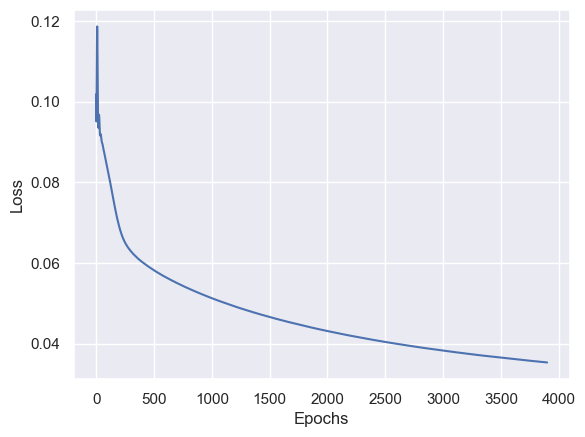

In [82]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

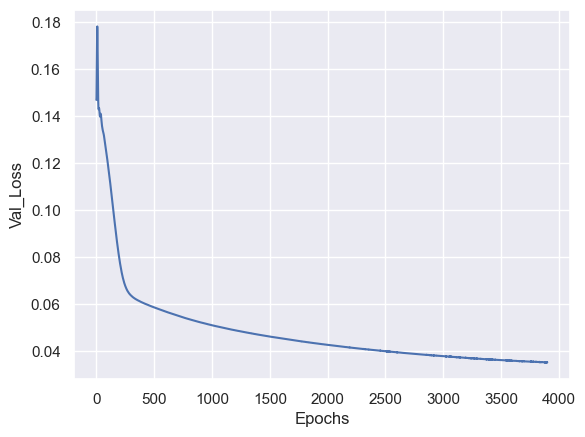

In [83]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [85]:
#modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\LOGG-Dwarfs.h5


In [86]:
predlogg = modelLOGG.predict(X_test)

16/16 [==============================] - 0s 8ms/step


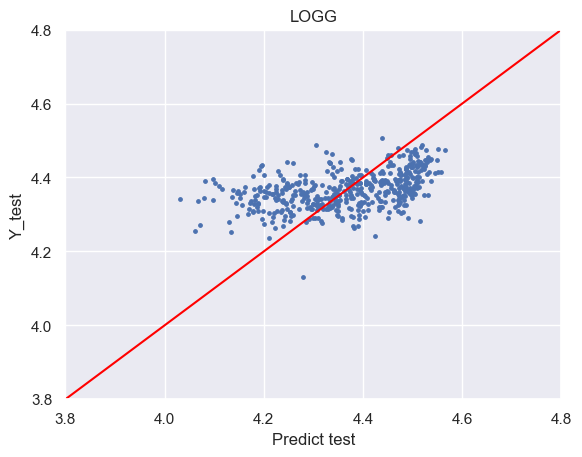

In [87]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
plt.xlim(3.8, 4.8)
plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [88]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 2.0%


In [89]:
Y_test['LOGG_Predict'] = predlogg

In [90]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0049_0043043  5734.6290  4.200532 -0.114700  0.116345   
iDR4_3_STRIPE82-0006_0013917  5488.8906  4.472672  0.057199  0.010369   
iDR4_3_SPLUS-n01s21_0012158   5892.0330  4.328696 -0.049458 -0.038616   
iDR4_3_STRIPE82-0039_0043985  5458.4697  4.378392  0.354240 -0.017668   
iDR4_3_SPLUS-s46s27_0001144   5414.2627  4.488376 -0.010161  0.015603   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328  5571.1177  4.486858 -0.130290  0.027000   
iDR4_3_MC0144_0020923         5930.7466  4.347804  0.073778 -0.028085   
iDR4_3_SPLUS-s36s48_0010879   5879.0005  4.254626 -0.193250  0.012080   
iDR4_3_STRIPE82-0119_0029599  5917.2266  4.357494  0.264410 -0.029465   
iDR4_3_STRIPE82-0032_0019492  5365.7900  4.564479 -0.423860  0.044161   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0049_0043043  0.092637  0.043326  0.045565  0.090687   
iDR4_3_STRIPE82-0006_0013917  0.049674 -0.040476  0.070401  0.009373   
iDR4_3_SPLUS-n01s21_0012158  -0.104624 -0.012661  0.258026 -0.025835   
iDR4_3_STRIPE82-0039_0043985  0.002601 -0.037814  0.186140  0.019770   
iDR4_3_SPLUS-s46s27_0001144  -0.026065 -0.048343 -0.000674  0.052980   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328 -0.002203  0.039466 -0.001039  0.013680   
iDR4_3_MC0144_0020923        -0.001916  0.128494  0.132718  0.000522   
iDR4_3_SPLUS-s36s48_0010879   0.077043  0.011765  0.284690  0.012350   
iDR4_3_STRIPE82-0119_0029599 -0.088158  0.071446  0.428010  0.045410   
iDR4_3_STRIPE82-0032_0019492  0.052614  0.021266  0.063915  0.024030   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_STRIPE82-0049_0043043  0.186449  0.160328     0.333771   
iDR4_3_STRIPE82-0006_0013917  0.030308  0.096459     0.086348   
iDR4_3_SPLUS-n01s21_0012158   0.010457  0.000236     0.492255   
iDR4_3_STRIPE82-0039_0043985  0.016490  0.082511     0.055719   
iDR4_3_SPLUS-s46s27_0001144   0.041721  0.077075     0.011209   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0030_0025328  0.073435  0.081901     0.169139   
iDR4_3_MC0144_0020923        -0.131843 -0.031297     0.531234   
iDR4_3_SPLUS-s36s48_0010879  -0.025474  0.057351     0.479133   
iDR4_3_STRIPE82-0119_0029599 -0.058911  0.007914     0.517621   
iDR4_3_STRIPE82-0032_0019492  0.089480  0.025549    -0.037597   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_STRIPE82-0049_0043043          5667.877441      4.362273  
iDR4_3_STRIPE82-0006_0013917          5442.731934      4.456963  
iDR4_3_SPLUS-n01s21_0012158           5716.502441      4.345819  
iDR4_3_STRIPE82-0039_0043985          5405.290039      4.446997  
iDR4_3_SPLUS-s46s27_0001144           5483.412109      4.414199  
...                                           ...           ...  
iDR4_3_STRIPE82-0030_0025328          5784.730469      4.424310  
iDR4_3_MC0144_0020923                 5812.328613      4.333236  
iDR4_3_SPLUS-s36s48_0010879           5919.679199      4.295545  
iDR4_3_STRIPE82-0119_0029599          5871.614258      4.290138  
iDR4_3_STRIPE82-0032_0019492          5336.151855      4.474226  

[482 rows x 13 columns]

In [91]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [104]:
Parametro = "FEH"
columnTrain = 'FE_H'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [105]:
modelFEH = baseline_model_teste()

In [106]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2200, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
1/1 - 1s - loss: 0.1316 - val_loss: 0.1310 - 553ms/epoch - 553ms/step
Epoch 2/3000
1/1 - 0s - loss: 0.1309 - val_loss: 0.1305 - 81ms/epoch - 81ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.1303 - val_loss: 0.1300 - 186ms/epoch - 186ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.1298 - val_loss: 0.1296 - 78ms/epoch - 78ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.1294 - val_loss: 0.1293 - 98ms/epoch - 98ms/step
Epoch 6/3000
1/1 - 0s - loss: 0.1289 - val_loss: 0.1288 - 45ms/epoch - 45ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.1284 - val_loss: 0.1284 - 50ms/epoch - 50ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.1279 - val_loss: 0.1280 - 54ms/epoch - 54ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.1275 - val_loss: 0.1277 - 44ms/epoch - 44ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.1270 - val_loss: 0.1273 - 46ms/epoch - 46ms/step
Epoch 11/3000
1/1 - 0s - loss: 0.1266 - val_loss: 0.1269 - 48ms/epoch - 48ms/step
Epoch 12/3000
1/1 - 0s - loss: 0.1262 - val_loss: 0.1265 - 67ms/epoch - 67ms/step
Epoch 13/3000
1/1 - 0

Epoch 101/3000
1/1 - 0s - loss: 0.1037 - val_loss: 0.1094 - 52ms/epoch - 52ms/step
Epoch 102/3000
1/1 - 0s - loss: 0.1036 - val_loss: 0.1093 - 51ms/epoch - 51ms/step
Epoch 103/3000
1/1 - 0s - loss: 0.1035 - val_loss: 0.1092 - 49ms/epoch - 49ms/step
Epoch 104/3000
1/1 - 0s - loss: 0.1034 - val_loss: 0.1091 - 48ms/epoch - 48ms/step
Epoch 105/3000
1/1 - 0s - loss: 0.1033 - val_loss: 0.1090 - 47ms/epoch - 47ms/step
Epoch 106/3000
1/1 - 0s - loss: 0.1032 - val_loss: 0.1089 - 49ms/epoch - 49ms/step
Epoch 107/3000
1/1 - 0s - loss: 0.1031 - val_loss: 0.1088 - 49ms/epoch - 49ms/step
Epoch 108/3000
1/1 - 0s - loss: 0.1030 - val_loss: 0.1088 - 46ms/epoch - 46ms/step
Epoch 109/3000
1/1 - 0s - loss: 0.1029 - val_loss: 0.1087 - 44ms/epoch - 44ms/step
Epoch 110/3000
1/1 - 0s - loss: 0.1028 - val_loss: 0.1086 - 46ms/epoch - 46ms/step
Epoch 111/3000
1/1 - 0s - loss: 0.1027 - val_loss: 0.1085 - 47ms/epoch - 47ms/step
Epoch 112/3000
1/1 - 0s - loss: 0.1026 - val_loss: 0.1084 - 48ms/epoch - 48ms/step
Epoc

Epoch 200/3000
1/1 - 0s - loss: 0.0949 - val_loss: 0.1006 - 35ms/epoch - 35ms/step
Epoch 201/3000
1/1 - 0s - loss: 0.0948 - val_loss: 0.1005 - 40ms/epoch - 40ms/step
Epoch 202/3000
1/1 - 0s - loss: 0.0947 - val_loss: 0.1005 - 36ms/epoch - 36ms/step
Epoch 203/3000
1/1 - 0s - loss: 0.0946 - val_loss: 0.1004 - 38ms/epoch - 38ms/step
Epoch 204/3000
1/1 - 0s - loss: 0.0946 - val_loss: 0.1003 - 36ms/epoch - 36ms/step
Epoch 205/3000
1/1 - 0s - loss: 0.0945 - val_loss: 0.1002 - 37ms/epoch - 37ms/step
Epoch 206/3000
1/1 - 0s - loss: 0.0944 - val_loss: 0.1001 - 38ms/epoch - 38ms/step
Epoch 207/3000
1/1 - 0s - loss: 0.0943 - val_loss: 0.1000 - 41ms/epoch - 41ms/step
Epoch 208/3000
1/1 - 0s - loss: 0.0942 - val_loss: 0.1000 - 42ms/epoch - 42ms/step
Epoch 209/3000
1/1 - 0s - loss: 0.0942 - val_loss: 0.0999 - 43ms/epoch - 43ms/step
Epoch 210/3000
1/1 - 0s - loss: 0.0941 - val_loss: 0.0998 - 42ms/epoch - 42ms/step
Epoch 211/3000
1/1 - 0s - loss: 0.0940 - val_loss: 0.0997 - 40ms/epoch - 40ms/step
Epoc

Epoch 299/3000
1/1 - 0s - loss: 0.0846 - val_loss: 0.0902 - 47ms/epoch - 47ms/step
Epoch 300/3000
1/1 - 0s - loss: 0.0844 - val_loss: 0.0899 - 51ms/epoch - 51ms/step
Epoch 301/3000
1/1 - 0s - loss: 0.0841 - val_loss: 0.0897 - 52ms/epoch - 52ms/step
Epoch 302/3000
1/1 - 0s - loss: 0.0839 - val_loss: 0.0894 - 52ms/epoch - 52ms/step
Epoch 303/3000
1/1 - 0s - loss: 0.0836 - val_loss: 0.0892 - 48ms/epoch - 48ms/step
Epoch 304/3000
1/1 - 0s - loss: 0.0833 - val_loss: 0.0890 - 48ms/epoch - 48ms/step
Epoch 305/3000
1/1 - 0s - loss: 0.0830 - val_loss: 0.0887 - 38ms/epoch - 38ms/step
Epoch 306/3000
1/1 - 0s - loss: 0.0827 - val_loss: 0.0884 - 39ms/epoch - 39ms/step
Epoch 307/3000
1/1 - 0s - loss: 0.0824 - val_loss: 0.0881 - 50ms/epoch - 50ms/step
Epoch 308/3000
1/1 - 0s - loss: 0.0821 - val_loss: 0.0878 - 51ms/epoch - 51ms/step
Epoch 309/3000
1/1 - 0s - loss: 0.0818 - val_loss: 0.0875 - 49ms/epoch - 49ms/step
Epoch 310/3000
1/1 - 0s - loss: 0.0814 - val_loss: 0.0872 - 47ms/epoch - 47ms/step
Epoc

Epoch 398/3000
1/1 - 0s - loss: 0.0521 - val_loss: 0.0524 - 39ms/epoch - 39ms/step
Epoch 399/3000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0522 - 41ms/epoch - 41ms/step
Epoch 400/3000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0526 - 35ms/epoch - 35ms/step
Epoch 401/3000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0521 - 35ms/epoch - 35ms/step
Epoch 402/3000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0524 - 34ms/epoch - 34ms/step
Epoch 403/3000
1/1 - 0s - loss: 0.0517 - val_loss: 0.0518 - 37ms/epoch - 37ms/step
Epoch 404/3000
1/1 - 0s - loss: 0.0515 - val_loss: 0.0519 - 35ms/epoch - 35ms/step
Epoch 405/3000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0517 - 36ms/epoch - 36ms/step
Epoch 406/3000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0516 - 36ms/epoch - 36ms/step
Epoch 407/3000
1/1 - 0s - loss: 0.0512 - val_loss: 0.0518 - 35ms/epoch - 35ms/step
Epoch 408/3000
1/1 - 0s - loss: 0.0512 - val_loss: 0.0515 - 37ms/epoch - 37ms/step
Epoch 409/3000
1/1 - 0s - loss: 0.0511 - val_loss: 0.0518 - 36ms/epoch - 36ms/step
Epoc

Epoch 497/3000
1/1 - 0s - loss: 0.0451 - val_loss: 0.0462 - 36ms/epoch - 36ms/step
Epoch 498/3000
1/1 - 0s - loss: 0.0447 - val_loss: 0.0462 - 37ms/epoch - 37ms/step
Epoch 499/3000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0462 - 37ms/epoch - 37ms/step
Epoch 500/3000
1/1 - 0s - loss: 0.0449 - val_loss: 0.0464 - 40ms/epoch - 40ms/step
Epoch 501/3000
1/1 - 0s - loss: 0.0448 - val_loss: 0.0459 - 39ms/epoch - 39ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0444 - val_loss: 0.0459 - 36ms/epoch - 36ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0463 - 37ms/epoch - 37ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0447 - val_loss: 0.0459 - 37ms/epoch - 37ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0458 - 35ms/epoch - 35ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0443 - val_loss: 0.0459 - 36ms/epoch - 36ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0443 - val_loss: 0.0458 - 37ms/epoch - 37ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0444 - val_loss: 0.0459 - 36ms/epoch - 36ms/step
Epoc

Epoch 596/3000
1/1 - 0s - loss: 0.0414 - val_loss: 0.0432 - 43ms/epoch - 43ms/step
Epoch 597/3000
1/1 - 0s - loss: 0.0414 - val_loss: 0.0433 - 43ms/epoch - 43ms/step
Epoch 598/3000
1/1 - 0s - loss: 0.0414 - val_loss: 0.0432 - 39ms/epoch - 39ms/step
Epoch 599/3000
1/1 - 0s - loss: 0.0413 - val_loss: 0.0432 - 38ms/epoch - 38ms/step
Epoch 600/3000
1/1 - 0s - loss: 0.0413 - val_loss: 0.0431 - 39ms/epoch - 39ms/step
Epoch 601/3000
1/1 - 0s - loss: 0.0412 - val_loss: 0.0431 - 37ms/epoch - 37ms/step
Epoch 602/3000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0430 - 36ms/epoch - 36ms/step
Epoch 603/3000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0429 - 38ms/epoch - 38ms/step
Epoch 604/3000
1/1 - 0s - loss: 0.0410 - val_loss: 0.0429 - 36ms/epoch - 36ms/step
Epoch 605/3000
1/1 - 0s - loss: 0.0410 - val_loss: 0.0429 - 37ms/epoch - 37ms/step
Epoch 606/3000
1/1 - 0s - loss: 0.0410 - val_loss: 0.0429 - 36ms/epoch - 36ms/step
Epoch 607/3000
1/1 - 0s - loss: 0.0410 - val_loss: 0.0429 - 35ms/epoch - 35ms/step
Epoc

Epoch 695/3000
1/1 - 0s - loss: 0.0389 - val_loss: 0.0408 - 70ms/epoch - 70ms/step
Epoch 696/3000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0408 - 40ms/epoch - 40ms/step
Epoch 697/3000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0408 - 47ms/epoch - 47ms/step
Epoch 698/3000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0409 - 43ms/epoch - 43ms/step
Epoch 699/3000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0409 - 43ms/epoch - 43ms/step
Epoch 700/3000
1/1 - 0s - loss: 0.0391 - val_loss: 0.0411 - 46ms/epoch - 46ms/step
Epoch 701/3000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0410 - 43ms/epoch - 43ms/step
Epoch 702/3000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0411 - 42ms/epoch - 42ms/step
Epoch 703/3000
1/1 - 0s - loss: 0.0393 - val_loss: 0.0410 - 47ms/epoch - 47ms/step
Epoch 704/3000
1/1 - 0s - loss: 0.0392 - val_loss: 0.0409 - 46ms/epoch - 46ms/step
Epoch 705/3000
1/1 - 0s - loss: 0.0390 - val_loss: 0.0407 - 42ms/epoch - 42ms/step
Epoch 706/3000
1/1 - 0s - loss: 0.0389 - val_loss: 0.0406 - 40ms/epoch - 40ms/step
Epoc

Epoch 794/3000
1/1 - 0s - loss: 0.0372 - val_loss: 0.0391 - 39ms/epoch - 39ms/step
Epoch 795/3000
1/1 - 0s - loss: 0.0372 - val_loss: 0.0391 - 41ms/epoch - 41ms/step
Epoch 796/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0390 - 47ms/epoch - 47ms/step
Epoch 797/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0390 - 45ms/epoch - 45ms/step
Epoch 798/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0390 - 40ms/epoch - 40ms/step
Epoch 799/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0390 - 43ms/epoch - 43ms/step
Epoch 800/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0390 - 52ms/epoch - 52ms/step
Epoch 801/3000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0390 - 46ms/epoch - 46ms/step
Epoch 802/3000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0390 - 43ms/epoch - 43ms/step
Epoch 803/3000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0390 - 40ms/epoch - 40ms/step
Epoch 804/3000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0389 - 42ms/epoch - 42ms/step
Epoch 805/3000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0389 - 40ms/epoch - 40ms/step
Epoc

Epoch 893/3000
1/1 - 0s - loss: 0.0359 - val_loss: 0.0379 - 42ms/epoch - 42ms/step
Epoch 894/3000
1/1 - 0s - loss: 0.0359 - val_loss: 0.0378 - 44ms/epoch - 44ms/step
Epoch 895/3000
1/1 - 0s - loss: 0.0359 - val_loss: 0.0378 - 43ms/epoch - 43ms/step
Epoch 896/3000
1/1 - 0s - loss: 0.0359 - val_loss: 0.0377 - 42ms/epoch - 42ms/step
Epoch 897/3000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0377 - 73ms/epoch - 73ms/step
Epoch 898/3000
1/1 - 0s - loss: 0.0357 - val_loss: 0.0376 - 47ms/epoch - 47ms/step
Epoch 899/3000
1/1 - 0s - loss: 0.0357 - val_loss: 0.0376 - 70ms/epoch - 70ms/step
Epoch 900/3000
1/1 - 0s - loss: 0.0356 - val_loss: 0.0376 - 44ms/epoch - 44ms/step
Epoch 901/3000
1/1 - 0s - loss: 0.0356 - val_loss: 0.0375 - 68ms/epoch - 68ms/step
Epoch 902/3000
1/1 - 0s - loss: 0.0356 - val_loss: 0.0375 - 46ms/epoch - 46ms/step
Epoch 903/3000
1/1 - 0s - loss: 0.0356 - val_loss: 0.0376 - 69ms/epoch - 69ms/step
Epoch 904/3000
1/1 - 0s - loss: 0.0357 - val_loss: 0.0377 - 45ms/epoch - 45ms/step
Epoc

Epoch 992/3000
1/1 - 0s - loss: 0.0345 - val_loss: 0.0365 - 39ms/epoch - 39ms/step
Epoch 993/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0365 - 48ms/epoch - 48ms/step
Epoch 994/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0365 - 44ms/epoch - 44ms/step
Epoch 995/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0366 - 44ms/epoch - 44ms/step
Epoch 996/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0365 - 47ms/epoch - 47ms/step
Epoch 997/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0365 - 47ms/epoch - 47ms/step
Epoch 998/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0365 - 47ms/epoch - 47ms/step
Epoch 999/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0365 - 46ms/epoch - 46ms/step
Epoch 1000/3000
1/1 - 0s - loss: 0.0345 - val_loss: 0.0364 - 45ms/epoch - 45ms/step
Epoch 1001/3000
1/1 - 0s - loss: 0.0345 - val_loss: 0.0364 - 45ms/epoch - 45ms/step
Epoch 1002/3000
1/1 - 0s - loss: 0.0345 - val_loss: 0.0364 - 48ms/epoch - 48ms/step
Epoch 1003/3000
1/1 - 0s - loss: 0.0344 - val_loss: 0.0364 - 47ms/epoch - 47ms/step


Epoch 1090/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0355 - 50ms/epoch - 50ms/step
Epoch 1091/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0355 - 43ms/epoch - 43ms/step
Epoch 1092/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0355 - 53ms/epoch - 53ms/step
Epoch 1093/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0355 - 47ms/epoch - 47ms/step
Epoch 1094/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0356 - 46ms/epoch - 46ms/step
Epoch 1095/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0355 - 46ms/epoch - 46ms/step
Epoch 1096/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0356 - 49ms/epoch - 49ms/step
Epoch 1097/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0355 - 44ms/epoch - 44ms/step
Epoch 1098/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0356 - 43ms/epoch - 43ms/step
Epoch 1099/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0355 - 48ms/epoch - 48ms/step
Epoch 1100/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0356 - 49ms/epoch - 49ms/step
Epoch 1101/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0355 - 43ms/epoch - 43

Epoch 1188/3000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0347 - 44ms/epoch - 44ms/step
Epoch 1189/3000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0349 - 46ms/epoch - 46ms/step
Epoch 1190/3000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0348 - 45ms/epoch - 45ms/step
Epoch 1191/3000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0351 - 40ms/epoch - 40ms/step
Epoch 1192/3000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0349 - 48ms/epoch - 48ms/step
Epoch 1193/3000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0351 - 47ms/epoch - 47ms/step
Epoch 1194/3000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0348 - 51ms/epoch - 51ms/step
Epoch 1195/3000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0349 - 46ms/epoch - 46ms/step
Epoch 1196/3000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0347 - 45ms/epoch - 45ms/step
Epoch 1197/3000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0347 - 43ms/epoch - 43ms/step
Epoch 1198/3000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0346 - 43ms/epoch - 43ms/step
Epoch 1199/3000
1/1 - 0s - loss: 0.0326 - val_loss: 0.0346 - 49ms/epoch - 49

Epoch 1286/3000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0341 - 35ms/epoch - 35ms/step
Epoch 1287/3000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0343 - 35ms/epoch - 35ms/step
Epoch 1288/3000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0341 - 48ms/epoch - 48ms/step
Epoch 1289/3000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0342 - 62ms/epoch - 62ms/step
Epoch 1290/3000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0340 - 57ms/epoch - 57ms/step
Epoch 1291/3000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0340 - 67ms/epoch - 67ms/step
Epoch 1292/3000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0339 - 67ms/epoch - 67ms/step
Epoch 1293/3000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0339 - 62ms/epoch - 62ms/step
Epoch 1294/3000
1/1 - 0s - loss: 0.0319 - val_loss: 0.0339 - 52ms/epoch - 52ms/step
Epoch 1295/3000
1/1 - 0s - loss: 0.0319 - val_loss: 0.0339 - 56ms/epoch - 56ms/step
Epoch 1296/3000
1/1 - 0s - loss: 0.0319 - val_loss: 0.0340 - 51ms/epoch - 51ms/step
Epoch 1297/3000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0339 - 55ms/epoch - 55

Epoch 1384/3000
1/1 - 0s - loss: 0.0315 - val_loss: 0.0335 - 41ms/epoch - 41ms/step
Epoch 1385/3000
1/1 - 0s - loss: 0.0314 - val_loss: 0.0334 - 43ms/epoch - 43ms/step
Epoch 1386/3000
1/1 - 0s - loss: 0.0313 - val_loss: 0.0335 - 43ms/epoch - 43ms/step
Epoch 1387/3000
1/1 - 0s - loss: 0.0314 - val_loss: 0.0334 - 43ms/epoch - 43ms/step
Epoch 1388/3000
1/1 - 0s - loss: 0.0314 - val_loss: 0.0337 - 48ms/epoch - 48ms/step
Epoch 1389/3000
1/1 - 0s - loss: 0.0315 - val_loss: 0.0335 - 43ms/epoch - 43ms/step
Epoch 1390/3000
1/1 - 0s - loss: 0.0316 - val_loss: 0.0338 - 46ms/epoch - 46ms/step
Epoch 1391/3000
1/1 - 0s - loss: 0.0317 - val_loss: 0.0335 - 41ms/epoch - 41ms/step
Epoch 1392/3000
1/1 - 0s - loss: 0.0317 - val_loss: 0.0339 - 41ms/epoch - 41ms/step
Epoch 1393/3000
1/1 - 0s - loss: 0.0318 - val_loss: 0.0336 - 46ms/epoch - 46ms/step
Epoch 1394/3000
1/1 - 0s - loss: 0.0317 - val_loss: 0.0339 - 41ms/epoch - 41ms/step
Epoch 1395/3000
1/1 - 0s - loss: 0.0317 - val_loss: 0.0335 - 42ms/epoch - 42

Epoch 1482/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0329 - 34ms/epoch - 34ms/step
Epoch 1483/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0331 - 34ms/epoch - 34ms/step
Epoch 1484/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0329 - 35ms/epoch - 35ms/step
Epoch 1485/3000
1/1 - 0s - loss: 0.0309 - val_loss: 0.0330 - 36ms/epoch - 36ms/step
Epoch 1486/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0329 - 37ms/epoch - 37ms/step
Epoch 1487/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0330 - 35ms/epoch - 35ms/step
Epoch 1488/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0329 - 39ms/epoch - 39ms/step
Epoch 1489/3000
1/1 - 0s - loss: 0.0308 - val_loss: 0.0329 - 35ms/epoch - 35ms/step
Epoch 1490/3000
1/1 - 0s - loss: 0.0307 - val_loss: 0.0328 - 35ms/epoch - 35ms/step
Epoch 1491/3000
1/1 - 0s - loss: 0.0307 - val_loss: 0.0328 - 35ms/epoch - 35ms/step
Epoch 1492/3000
1/1 - 0s - loss: 0.0307 - val_loss: 0.0329 - 35ms/epoch - 35ms/step
Epoch 1493/3000
1/1 - 0s - loss: 0.0307 - val_loss: 0.0328 - 36ms/epoch - 36

Epoch 1580/3000
1/1 - 0s - loss: 0.0305 - val_loss: 0.0326 - 44ms/epoch - 44ms/step
Epoch 1581/3000
1/1 - 0s - loss: 0.0304 - val_loss: 0.0326 - 48ms/epoch - 48ms/step
Epoch 1582/3000
1/1 - 0s - loss: 0.0303 - val_loss: 0.0325 - 46ms/epoch - 46ms/step
Epoch 1583/3000
1/1 - 0s - loss: 0.0303 - val_loss: 0.0325 - 44ms/epoch - 44ms/step
Epoch 1584/3000
1/1 - 0s - loss: 0.0303 - val_loss: 0.0327 - 39ms/epoch - 39ms/step
Epoch 1585/3000
1/1 - 0s - loss: 0.0304 - val_loss: 0.0325 - 45ms/epoch - 45ms/step
Epoch 1586/3000
1/1 - 0s - loss: 0.0304 - val_loss: 0.0329 - 52ms/epoch - 52ms/step
Epoch 1587/3000
1/1 - 0s - loss: 0.0305 - val_loss: 0.0326 - 44ms/epoch - 44ms/step
Epoch 1588/3000
1/1 - 0s - loss: 0.0306 - val_loss: 0.0330 - 43ms/epoch - 43ms/step
Epoch 1589/3000
1/1 - 0s - loss: 0.0307 - val_loss: 0.0327 - 39ms/epoch - 39ms/step
Epoch 1590/3000
1/1 - 0s - loss: 0.0306 - val_loss: 0.0330 - 40ms/epoch - 40ms/step
Epoch 1591/3000
1/1 - 0s - loss: 0.0307 - val_loss: 0.0326 - 40ms/epoch - 40

Epoch 1678/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0322 - 46ms/epoch - 46ms/step
Epoch 1679/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0322 - 42ms/epoch - 42ms/step
Epoch 1680/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0322 - 42ms/epoch - 42ms/step
Epoch 1681/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0321 - 47ms/epoch - 47ms/step
Epoch 1682/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0322 - 45ms/epoch - 45ms/step
Epoch 1683/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0321 - 44ms/epoch - 44ms/step
Epoch 1684/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0323 - 51ms/epoch - 51ms/step
Epoch 1685/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0322 - 44ms/epoch - 44ms/step
Epoch 1686/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0325 - 40ms/epoch - 40ms/step
Epoch 1687/3000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0323 - 41ms/epoch - 41ms/step
Epoch 1688/3000
1/1 - 0s - loss: 0.0302 - val_loss: 0.0329 - 39ms/epoch - 39ms/step
Epoch 1689/3000
1/1 - 0s - loss: 0.0304 - val_loss: 0.0326 - 42ms/epoch - 42

Epoch 1776/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0322 - 60ms/epoch - 60ms/step
Epoch 1777/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0325 - 52ms/epoch - 52ms/step
Epoch 1778/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0321 - 47ms/epoch - 47ms/step
Epoch 1779/3000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0322 - 48ms/epoch - 48ms/step
Epoch 1780/3000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0319 - 46ms/epoch - 46ms/step
Epoch 1781/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0320 - 46ms/epoch - 46ms/step
Epoch 1782/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0319 - 45ms/epoch - 45ms/step
Epoch 1783/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0319 - 49ms/epoch - 49ms/step
Epoch 1784/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0319 - 49ms/epoch - 49ms/step
Epoch 1785/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0319 - 42ms/epoch - 42ms/step
Epoch 1786/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0320 - 45ms/epoch - 45ms/step
Epoch 1787/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0319 - 49ms/epoch - 49

Epoch 1874/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0316 - 47ms/epoch - 47ms/step
Epoch 1875/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0318 - 48ms/epoch - 48ms/step
Epoch 1876/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0316 - 39ms/epoch - 39ms/step
Epoch 1877/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0319 - 44ms/epoch - 44ms/step
Epoch 1878/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0317 - 44ms/epoch - 44ms/step
Epoch 1879/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0320 - 47ms/epoch - 47ms/step
Epoch 1880/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0317 - 42ms/epoch - 42ms/step
Epoch 1881/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0321 - 44ms/epoch - 44ms/step
Epoch 1882/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0318 - 42ms/epoch - 42ms/step
Epoch 1883/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0321 - 42ms/epoch - 42ms/step
Epoch 1884/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0317 - 43ms/epoch - 43ms/step
Epoch 1885/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0320 - 47ms/epoch - 47

Epoch 1972/3000
1/1 - 0s - loss: 0.0304 - val_loss: 0.0321 - 67ms/epoch - 67ms/step
Epoch 1973/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0319 - 40ms/epoch - 40ms/step
Epoch 1974/3000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0316 - 42ms/epoch - 42ms/step
Epoch 1975/3000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0316 - 43ms/epoch - 43ms/step
Epoch 1976/3000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0324 - 43ms/epoch - 43ms/step
Epoch 1977/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0321 - 58ms/epoch - 58ms/step
Epoch 1978/3000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0327 - 51ms/epoch - 51ms/step
Epoch 1979/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0319 - 95ms/epoch - 95ms/step
Epoch 1980/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0319 - 45ms/epoch - 45ms/step
Epoch 1981/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0315 - 63ms/epoch - 63ms/step
Epoch 1982/3000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0315 - 42ms/epoch - 42ms/step
Epoch 1983/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0315 - 45ms/epoch - 45

Epoch 2070/3000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0314 - 44ms/epoch - 44ms/step
Epoch 2071/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0314 - 51ms/epoch - 51ms/step
Epoch 2072/3000
1/1 - 0s - loss: 0.0285 - val_loss: 0.0312 - 46ms/epoch - 46ms/step
Epoch 2073/3000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0312 - 42ms/epoch - 42ms/step
Epoch 2074/3000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0314 - 46ms/epoch - 46ms/step
Epoch 2075/3000
1/1 - 0s - loss: 0.0285 - val_loss: 0.0313 - 44ms/epoch - 44ms/step
Epoch 2076/3000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0317 - 42ms/epoch - 42ms/step
Epoch 2077/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0314 - 48ms/epoch - 48ms/step
Epoch 2078/3000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0320 - 51ms/epoch - 51ms/step
Epoch 2079/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0316 - 43ms/epoch - 43ms/step
Epoch 2080/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0321 - 48ms/epoch - 48ms/step
Epoch 2081/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0315 - 44ms/epoch - 44

Epoch 2168/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0311 - 44ms/epoch - 44ms/step
Epoch 2169/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0315 - 43ms/epoch - 43ms/step
Epoch 2170/3000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0313 - 46ms/epoch - 46ms/step
Epoch 2171/3000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0319 - 42ms/epoch - 42ms/step
Epoch 2172/3000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0314 - 48ms/epoch - 48ms/step
Epoch 2173/3000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0318 - 44ms/epoch - 44ms/step
Epoch 2174/3000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0312 - 44ms/epoch - 44ms/step
Epoch 2175/3000
1/1 - 0s - loss: 0.0285 - val_loss: 0.0314 - 51ms/epoch - 51ms/step
Epoch 2176/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0310 - 43ms/epoch - 43ms/step
Epoch 2177/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0310 - 46ms/epoch - 46ms/step
Epoch 2178/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0311 - 47ms/epoch - 47ms/step
Epoch 2179/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0310 - 42ms/epoch - 42

Epoch 2266/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0310 - 43ms/epoch - 43ms/step
Epoch 2267/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0309 - 40ms/epoch - 40ms/step
Epoch 2268/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0309 - 43ms/epoch - 43ms/step
Epoch 2269/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0311 - 41ms/epoch - 41ms/step
Epoch 2270/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0310 - 41ms/epoch - 41ms/step
Epoch 2271/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0316 - 39ms/epoch - 39ms/step
Epoch 2272/3000
1/1 - 0s - loss: 0.0285 - val_loss: 0.0313 - 41ms/epoch - 41ms/step
Epoch 2273/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0323 - 42ms/epoch - 42ms/step
Epoch 2274/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0315 - 43ms/epoch - 43ms/step
Epoch 2275/3000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0319 - 46ms/epoch - 46ms/step
Epoch 2276/3000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0311 - 41ms/epoch - 41ms/step
Epoch 2277/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0311 - 41ms/epoch - 41

Epoch 2364/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0316 - 41ms/epoch - 41ms/step
Epoch 2365/3000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0311 - 41ms/epoch - 41ms/step
Epoch 2366/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0315 - 46ms/epoch - 46ms/step
Epoch 2367/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0309 - 41ms/epoch - 41ms/step
Epoch 2368/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0311 - 43ms/epoch - 43ms/step
Epoch 2369/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0307 - 43ms/epoch - 43ms/step
Epoch 2370/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0308 - 45ms/epoch - 45ms/step
Epoch 2371/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0308 - 41ms/epoch - 41ms/step
Epoch 2372/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0307 - 47ms/epoch - 47ms/step
Epoch 2373/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0309 - 46ms/epoch - 46ms/step
Epoch 2374/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0308 - 55ms/epoch - 55ms/step
Epoch 2375/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0313 - 43ms/epoch - 43

Epoch 2462/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0306 - 42ms/epoch - 42ms/step
Epoch 2463/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0306 - 49ms/epoch - 49ms/step
Epoch 2464/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0308 - 45ms/epoch - 45ms/step
Epoch 2465/3000
1/1 - 0s - loss: 0.0275 - val_loss: 0.0306 - 44ms/epoch - 44ms/step
Epoch 2466/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0311 - 43ms/epoch - 43ms/step
Epoch 2467/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0308 - 45ms/epoch - 45ms/step
Epoch 2468/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0315 - 44ms/epoch - 44ms/step
Epoch 2469/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0310 - 48ms/epoch - 48ms/step
Epoch 2470/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0316 - 46ms/epoch - 46ms/step
Epoch 2471/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0309 - 64ms/epoch - 64ms/step
Epoch 2472/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0310 - 53ms/epoch - 53ms/step
Epoch 2473/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0306 - 66ms/epoch - 66

Epoch 2560/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0307 - 75ms/epoch - 75ms/step
Epoch 2561/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0305 - 86ms/epoch - 86ms/step
Epoch 2562/3000
1/1 - 0s - loss: 0.0275 - val_loss: 0.0309 - 71ms/epoch - 71ms/step
Epoch 2563/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0306 - 73ms/epoch - 73ms/step
Epoch 2564/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0312 - 68ms/epoch - 68ms/step
Epoch 2565/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0307 - 76ms/epoch - 76ms/step
Epoch 2566/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0312 - 73ms/epoch - 73ms/step
Epoch 2567/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0306 - 58ms/epoch - 58ms/step
Epoch 2568/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0307 - 51ms/epoch - 51ms/step
Epoch 2569/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0304 - 49ms/epoch - 49ms/step
Epoch 2570/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0304 - 47ms/epoch - 47ms/step
Epoch 2571/3000
1/1 - 0s - loss: 0.0272 - val_loss: 0.0304 - 49ms/epoch - 49

Epoch 2658/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0305 - 41ms/epoch - 41ms/step
Epoch 2659/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0307 - 44ms/epoch - 44ms/step
Epoch 2660/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0303 - 44ms/epoch - 44ms/step
Epoch 2661/3000
1/1 - 0s - loss: 0.0272 - val_loss: 0.0304 - 46ms/epoch - 46ms/step
Epoch 2662/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0303 - 44ms/epoch - 44ms/step
Epoch 2663/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0303 - 44ms/epoch - 44ms/step
Epoch 2664/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0304 - 48ms/epoch - 48ms/step
Epoch 2665/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0303 - 40ms/epoch - 40ms/step
Epoch 2666/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0305 - 43ms/epoch - 43ms/step
Epoch 2667/3000
1/1 - 0s - loss: 0.0272 - val_loss: 0.0303 - 40ms/epoch - 40ms/step
Epoch 2668/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0308 - 43ms/epoch - 43ms/step
Epoch 2669/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0306 - 44ms/epoch - 44

Epoch 2756/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0308 - 47ms/epoch - 47ms/step
Epoch 2757/3000
1/1 - 0s - loss: 0.0277 - val_loss: 0.0314 - 41ms/epoch - 41ms/step
Epoch 2758/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0307 - 44ms/epoch - 44ms/step
Epoch 2759/3000
1/1 - 0s - loss: 0.0276 - val_loss: 0.0308 - 40ms/epoch - 40ms/step
Epoch 2760/3000
1/1 - 0s - loss: 0.0275 - val_loss: 0.0303 - 41ms/epoch - 41ms/step
Epoch 2761/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0303 - 41ms/epoch - 41ms/step
Epoch 2762/3000
1/1 - 0s - loss: 0.0269 - val_loss: 0.0302 - 42ms/epoch - 42ms/step
Epoch 2763/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0302 - 43ms/epoch - 43ms/step
Epoch 2764/3000
1/1 - 0s - loss: 0.0269 - val_loss: 0.0305 - 42ms/epoch - 42ms/step
Epoch 2765/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0303 - 41ms/epoch - 41ms/step
Epoch 2766/3000
1/1 - 0s - loss: 0.0272 - val_loss: 0.0308 - 42ms/epoch - 42ms/step
Epoch 2767/3000
1/1 - 0s - loss: 0.0274 - val_loss: 0.0305 - 41ms/epoch - 41

Epoch 2854/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0302 - 43ms/epoch - 43ms/step
Epoch 2855/3000
1/1 - 0s - loss: 0.0269 - val_loss: 0.0302 - 45ms/epoch - 45ms/step
Epoch 2856/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0300 - 41ms/epoch - 41ms/step
Epoch 2857/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0300 - 43ms/epoch - 43ms/step
Epoch 2858/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0302 - 47ms/epoch - 47ms/step
Epoch 2859/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0301 - 45ms/epoch - 45ms/step
Epoch 2860/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0305 - 48ms/epoch - 48ms/step
Epoch 2861/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0303 - 45ms/epoch - 45ms/step
Epoch 2862/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0307 - 42ms/epoch - 42ms/step
Epoch 2863/3000
1/1 - 0s - loss: 0.0272 - val_loss: 0.0303 - 48ms/epoch - 48ms/step
Epoch 2864/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0306 - 44ms/epoch - 44ms/step
Epoch 2865/3000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0302 - 44ms/epoch - 44

Epoch 2952/3000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0299 - 43ms/epoch - 43ms/step
Epoch 2953/3000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0301 - 45ms/epoch - 45ms/step
Epoch 2954/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0300 - 45ms/epoch - 45ms/step
Epoch 2955/3000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0304 - 43ms/epoch - 43ms/step
Epoch 2956/3000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0302 - 43ms/epoch - 43ms/step
Epoch 2957/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0308 - 53ms/epoch - 53ms/step
Epoch 2958/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0304 - 42ms/epoch - 42ms/step
Epoch 2959/3000
1/1 - 0s - loss: 0.0273 - val_loss: 0.0310 - 41ms/epoch - 41ms/step
Epoch 2960/3000
1/1 - 0s - loss: 0.0275 - val_loss: 0.0304 - 42ms/epoch - 42ms/step
Epoch 2961/3000
1/1 - 0s - loss: 0.0272 - val_loss: 0.0305 - 48ms/epoch - 48ms/step
Epoch 2962/3000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0300 - 55ms/epoch - 55ms/step
Epoch 2963/3000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0300 - 45ms/epoch - 45

Text(0, 0.5, 'Loss')

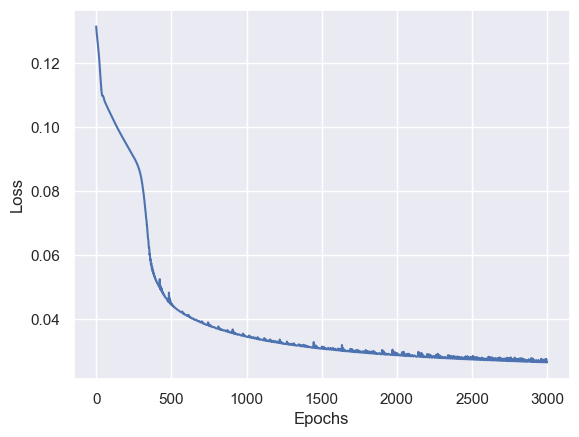

In [107]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

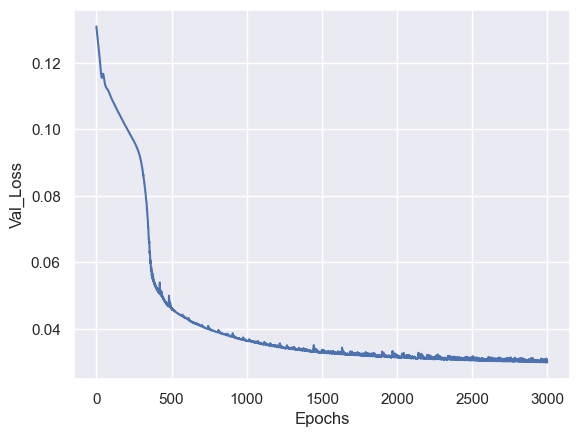

In [108]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [97]:
#modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\FEH-Dwarfs.h5


In [109]:
predfeh = modelFEH.predict(X_test)

16/16 [==============================] - 0s 1ms/step


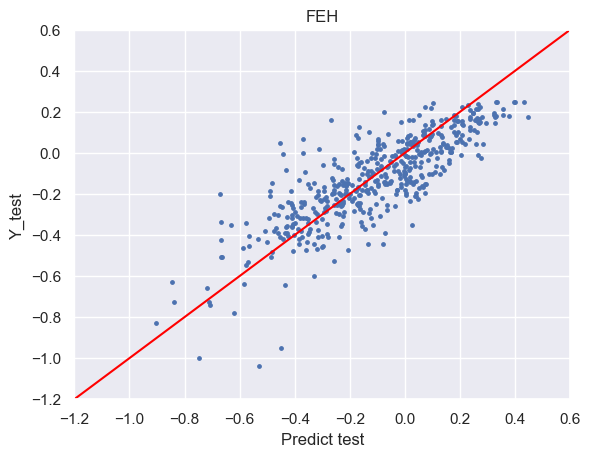

In [110]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.6)
plt.ylim(-1.2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [111]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


In [112]:
Y_test['FEH_Predict'] = predfeh

In [113]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0049_0043043  5734.6290  4.200532 -0.114700  0.116345   
iDR4_3_STRIPE82-0006_0013917  5488.8906  4.472672  0.057199  0.010369   
iDR4_3_SPLUS-n01s21_0012158   5892.0330  4.328696 -0.049458 -0.038616   
iDR4_3_STRIPE82-0039_0043985  5458.4697  4.378392  0.354240 -0.017668   
iDR4_3_SPLUS-s46s27_0001144   5414.2627  4.488376 -0.010161  0.015603   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328  5571.1177  4.486858 -0.130290  0.027000   
iDR4_3_MC0144_0020923         5930.7466  4.347804  0.073778 -0.028085   
iDR4_3_SPLUS-s36s48_0010879   5879.0005  4.254626 -0.193250  0.012080   
iDR4_3_STRIPE82-0119_0029599  5917.2266  4.357494  0.264410 -0.029465   
iDR4_3_STRIPE82-0032_0019492  5365.7900  4.564479 -0.423860  0.044161   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0049_0043043  0.092637  0.043326  0.045565  0.090687   
iDR4_3_STRIPE82-0006_0013917  0.049674 -0.040476  0.070401  0.009373   
iDR4_3_SPLUS-n01s21_0012158  -0.104624 -0.012661  0.258026 -0.025835   
iDR4_3_STRIPE82-0039_0043985  0.002601 -0.037814  0.186140  0.019770   
iDR4_3_SPLUS-s46s27_0001144  -0.026065 -0.048343 -0.000674  0.052980   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328 -0.002203  0.039466 -0.001039  0.013680   
iDR4_3_MC0144_0020923        -0.001916  0.128494  0.132718  0.000522   
iDR4_3_SPLUS-s36s48_0010879   0.077043  0.011765  0.284690  0.012350   
iDR4_3_STRIPE82-0119_0029599 -0.088158  0.071446  0.428010  0.045410   
iDR4_3_STRIPE82-0032_0019492  0.052614  0.021266  0.063915  0.024030   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_STRIPE82-0049_0043043  0.186449  0.160328     0.333771   
iDR4_3_STRIPE82-0006_0013917  0.030308  0.096459     0.086348   
iDR4_3_SPLUS-n01s21_0012158   0.010457  0.000236     0.492255   
iDR4_3_STRIPE82-0039_0043985  0.016490  0.082511     0.055719   
iDR4_3_SPLUS-s46s27_0001144   0.041721  0.077075     0.011209   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0030_0025328  0.073435  0.081901     0.169139   
iDR4_3_MC0144_0020923        -0.131843 -0.031297     0.531234   
iDR4_3_SPLUS-s36s48_0010879  -0.025474  0.057351     0.479133   
iDR4_3_STRIPE82-0119_0029599 -0.058911  0.007914     0.517621   
iDR4_3_STRIPE82-0032_0019492  0.089480  0.025549    -0.037597   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_STRIPE82-0049_0043043          5667.877441      4.362273    -0.097010  
iDR4_3_STRIPE82-0006_0013917          5442.731934      4.456963    -0.009964  
iDR4_3_SPLUS-n01s21_0012158           5716.502441      4.345819    -0.137373  
iDR4_3_STRIPE82-0039_0043985          5405.290039      4.446997     0.184064  
iDR4_3_SPLUS-s46s27_0001144           5483.412109      4.414199     0.058487  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0030_0025328          5784.730469      4.424310     0.100384  
iDR4_3_MC0144_0020923                 5812.328613      4.333236    -0.194380  
iDR4_3_SPLUS-s36s48_0010879           5919.679199      4.295545    -0.158681  
iDR4_3_STRIPE82-0119_0029599          5871.614258      4.290138    -0.009685  
iDR4_3_STRIPE82-0032_0019492          5336.151855      4.474226    -0.402715  

[482 rows x 14 columns]

In [103]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [123]:
Parametro = "MGFE"
columnTrain = 'MG_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [124]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0037_0010930  5385.6396  4.528972 -0.441610  0.077427   
iDR4_3_SPLUS-s02s12_0025554   5814.8613  4.457798  0.005146 -0.033193   
iDR4_3_SPLUS-s46s29_0036992   5596.4756  4.506422 -0.143990 -0.002272   
iDR4_3_SPLUS-s45s29_0054686   5549.7764  4.489489 -0.122760  0.009770   
iDR4_3_STRIPE82-0020_0024722  5384.4970  4.496034 -0.150120  0.054176   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0153_0028873  5455.9663  4.541612 -0.264090  0.016935   
iDR4_3_STRIPE82-0071_0015023  5854.2236  4.192680  0.046283 -0.009091   
iDR4_3_STRIPE82-0039_0003887  5429.8457  4.485583  0.071150  0.014043   
iDR4_3_STRIPE82-0080_0037305  5972.4340  4.303161  0.148970 -0.043732   
iDR4_3_SPLUS-n08s42_0031916   5695.7880  4.405008  0.074123 -0.005510   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0037_0010930  0.109090  0.015256 -0.009372  0.035570   
iDR4_3_SPLUS-s02s12_0025554  -0.091545 -0.035782 -0.014354 -0.038580   
iDR4_3_SPLUS-s46s29_0036992   0.111540 -0.158263 -0.104616  0.029740   
iDR4_3_SPLUS-s45s29_0054686  -0.013593  0.039666 -0.131100  0.005470   
iDR4_3_STRIPE82-0020_0024722 -0.031520  0.033706 -0.115990 -0.018620   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0153_0028873 -0.081504 -0.056081 -0.127460 -0.043710   
iDR4_3_STRIPE82-0071_0015023 -0.036412 -0.026428  0.178041  0.055489   
iDR4_3_STRIPE82-0039_0003887 -0.021479 -0.056729  0.100228 -0.008647   
iDR4_3_STRIPE82-0080_0037305 -0.176240 -0.009949  0.382770  0.042430   
iDR4_3_SPLUS-n08s42_0031916  -0.182247 -0.070572  0.098263  0.007546   

                                 MG_FE     SI_FE  teffEncoded  
ID                                                             
iDR4_3_STRIPE82-0037_0010930  0.131664  0.082180    -0.017611  
iDR4_3_SPLUS-s02s12_0025554  -0.052218  0.043553     0.414554  
iDR4_3_SPLUS-s46s29_0036992   0.016193  0.004016     0.194671  
iDR4_3_SPLUS-s45s29_0054686   0.035449  0.067717     0.147651  
iDR4_3_STRIPE82-0020_0024722  0.124111  0.032809    -0.018761  
...                                ...       ...          ...  
iDR4_3_STRIPE82-0153_0028873  0.034142  0.046772     0.053198  
iDR4_3_STRIPE82-0071_0015023 -0.019522  0.055316     0.454186  
iDR4_3_STRIPE82-0039_0003887  0.049971  0.076448     0.026898  
iDR4_3_STRIPE82-0080_0037305 -0.066181  0.061826     0.573207  
iDR4_3_SPLUS-n08s42_0031916   0.067596  0.014880     0.294664  

[1731 rows x 11 columns]

In [125]:
modelMGFE = baseline_model_teste()

In [126]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0676 - val_loss: 0.0669 - 571ms/epoch - 571ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0670 - val_loss: 0.0663 - 69ms/epoch - 69ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0664 - val_loss: 0.0658 - 163ms/epoch - 163ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0659 - val_loss: 0.0653 - 36ms/epoch - 36ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0654 - val_loss: 0.0648 - 35ms/epoch - 35ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0649 - val_loss: 0.0643 - 37ms/epoch - 37ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0645 - val_loss: 0.0638 - 36ms/epoch - 36ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0640 - val_loss: 0.0633 - 36ms/epoch - 36ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0635 - val_loss: 0.0628 - 35ms/epoch - 35ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0631 - val_loss: 0.0624 - 35ms/epoch - 35ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0620 - 37ms/epoch - 37ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0623 - val_loss: 0.0616 - 37ms/epoch - 37ms/step
Epoch 13/2000
1/1 - 0

Epoch 101/2000
1/1 - 0s - loss: 0.0515 - val_loss: 0.0508 - 40ms/epoch - 40ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0507 - 69ms/epoch - 69ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0506 - 38ms/epoch - 38ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0512 - val_loss: 0.0505 - 69ms/epoch - 69ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0511 - val_loss: 0.0504 - 37ms/epoch - 37ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0510 - val_loss: 0.0503 - 41ms/epoch - 41ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0509 - val_loss: 0.0502 - 42ms/epoch - 42ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0508 - val_loss: 0.0501 - 41ms/epoch - 41ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0507 - val_loss: 0.0500 - 54ms/epoch - 54ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0499 - 40ms/epoch - 40ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0498 - 89ms/epoch - 89ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0504 - val_loss: 0.0497 - 39ms/epoch - 39ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0424 - val_loss: 0.0416 - 39ms/epoch - 39ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0423 - val_loss: 0.0415 - 46ms/epoch - 46ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0422 - val_loss: 0.0415 - 44ms/epoch - 44ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0414 - 45ms/epoch - 45ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0420 - val_loss: 0.0413 - 44ms/epoch - 44ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0420 - val_loss: 0.0412 - 48ms/epoch - 48ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0419 - val_loss: 0.0411 - 49ms/epoch - 49ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0418 - val_loss: 0.0411 - 41ms/epoch - 41ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0417 - val_loss: 0.0410 - 42ms/epoch - 42ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0409 - 45ms/epoch - 45ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0408 - 46ms/epoch - 46ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0415 - val_loss: 0.0407 - 48ms/epoch - 48ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0350 - val_loss: 0.0344 - 44ms/epoch - 44ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0350 - val_loss: 0.0344 - 41ms/epoch - 41ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0349 - val_loss: 0.0343 - 41ms/epoch - 41ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0343 - 50ms/epoch - 50ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0342 - 44ms/epoch - 44ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0347 - val_loss: 0.0341 - 40ms/epoch - 40ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0341 - 45ms/epoch - 45ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0340 - 44ms/epoch - 44ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0345 - val_loss: 0.0339 - 43ms/epoch - 43ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0344 - val_loss: 0.0339 - 63ms/epoch - 63ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0344 - val_loss: 0.0338 - 66ms/epoch - 66ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0343 - val_loss: 0.0337 - 62ms/epoch - 62ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0284 - 43ms/epoch - 43ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0283 - 48ms/epoch - 48ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0284 - 43ms/epoch - 43ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0287 - val_loss: 0.0282 - 54ms/epoch - 54ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0286 - val_loss: 0.0282 - 46ms/epoch - 46ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0285 - val_loss: 0.0281 - 43ms/epoch - 43ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0285 - val_loss: 0.0280 - 52ms/epoch - 52ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0281 - 42ms/epoch - 42ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0280 - 43ms/epoch - 43ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0280 - 45ms/epoch - 45ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0278 - 47ms/epoch - 47ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0278 - 46ms/epoch - 46ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0242 - 41ms/epoch - 41ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0241 - 42ms/epoch - 42ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0241 - 41ms/epoch - 41ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0240 - 45ms/epoch - 45ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0241 - 50ms/epoch - 50ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0240 - 45ms/epoch - 45ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0240 - 42ms/epoch - 42ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0239 - 40ms/epoch - 40ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0239 - 46ms/epoch - 46ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0239 - 43ms/epoch - 43ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0238 - 38ms/epoch - 38ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0238 - 48ms/epoch - 48ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0218 - val_loss: 0.0211 - 43ms/epoch - 43ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0217 - val_loss: 0.0212 - 41ms/epoch - 41ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0217 - val_loss: 0.0211 - 42ms/epoch - 42ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0217 - val_loss: 0.0211 - 41ms/epoch - 41ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0217 - val_loss: 0.0210 - 49ms/epoch - 49ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0216 - val_loss: 0.0211 - 48ms/epoch - 48ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0216 - val_loss: 0.0210 - 46ms/epoch - 46ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0216 - val_loss: 0.0210 - 47ms/epoch - 47ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0216 - val_loss: 0.0210 - 41ms/epoch - 41ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0209 - 43ms/epoch - 43ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0210 - 42ms/epoch - 42ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0209 - 40ms/epoch - 40ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0188 - 44ms/epoch - 44ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0190 - 43ms/epoch - 43ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0188 - 45ms/epoch - 45ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0190 - 43ms/epoch - 43ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0187 - 43ms/epoch - 43ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0188 - 40ms/epoch - 40ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0188 - 47ms/epoch - 47ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0187 - 43ms/epoch - 43ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0188 - 46ms/epoch - 46ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0186 - 41ms/epoch - 41ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0188 - 44ms/epoch - 44ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0186 - 45ms/epoch - 45ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0171 - 42ms/epoch - 42ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0171 - 42ms/epoch - 42ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0170 - 43ms/epoch - 43ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0171 - 43ms/epoch - 43ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0170 - 44ms/epoch - 44ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0171 - 55ms/epoch - 55ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0169 - 45ms/epoch - 45ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0176 - val_loss: 0.0170 - 42ms/epoch - 42ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0176 - val_loss: 0.0169 - 41ms/epoch - 41ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0176 - val_loss: 0.0170 - 44ms/epoch - 44ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0176 - val_loss: 0.0169 - 48ms/epoch - 48ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0176 - val_loss: 0.0169 - 43ms/epoch - 43ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0158 - 47ms/epoch - 47ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0156 - 43ms/epoch - 43ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0158 - 45ms/epoch - 45ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0156 - 41ms/epoch - 41ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0157 - 42ms/epoch - 42ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0156 - 43ms/epoch - 43ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0157 - 46ms/epoch - 46ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0156 - 44ms/epoch - 44ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0156 - 43ms/epoch - 43ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0156 - 44ms/epoch - 44ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0156 - 49ms/epoch - 49ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0146 - 45ms/epoch - 45ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0146 - 43ms/epoch - 43ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0146 - 50ms/epoch - 50ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0147 - 46ms/epoch - 46ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0145 - 51ms/epoch - 51ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0146 - 46ms/epoch - 46ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0145 - 46ms/epoch - 46ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0146 - 50ms/epoch - 50ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0145 - 49ms/epoch - 49ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0145 - 44ms/epoch - 44ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0146 - 49ms/epoch - 49ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0145 - 47ms/epoch - 47ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0138 - 49ms/epoch - 49ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0138 - 42ms/epoch - 42ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0137 - 42ms/epoch - 42ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0139 - 46ms/epoch - 46ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0137 - 45ms/epoch - 45ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0139 - 47ms/epoch - 47ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0137 - 44ms/epoch - 44ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0139 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0137 - 45ms/epoch - 45ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0144 - val_loss: 0.0138 - 55ms/epoch - 55ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0144 - val_loss: 0.0137 - 43ms/epoch - 43ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0144 - val_loss: 0.0137 - 43ms/epoch - 43

Epoch 1188/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0130 - 41ms/epoch - 41ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0133 - 45ms/epoch - 45ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0130 - 43ms/epoch - 43ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0132 - 41ms/epoch - 41ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0131 - 44ms/epoch - 44ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0131 - 43ms/epoch - 43ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0132 - 41ms/epoch - 41ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0130 - 45ms/epoch - 45ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0132 - 44ms/epoch - 44ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0130 - 43ms/epoch - 43ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0131 - 42ms/epoch - 42ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0130 - 40ms/epoch - 40

Epoch 1286/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0126 - 43ms/epoch - 43ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0125 - 45ms/epoch - 45ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0126 - 42ms/epoch - 42ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0126 - 39ms/epoch - 39ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0125 - 40ms/epoch - 40ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0126 - 42ms/epoch - 42ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0125 - 45ms/epoch - 45ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0126 - 40ms/epoch - 40ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0125 - 44ms/epoch - 44ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0126 - 43ms/epoch - 43ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0125 - 41ms/epoch - 41ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0127 - 42ms/epoch - 42

Epoch 1384/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0121 - 57ms/epoch - 57ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0123 - 45ms/epoch - 45ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0121 - 106ms/epoch - 106ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0122 - 50ms/epoch - 50ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0121 - 65ms/epoch - 65ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0122 - 50ms/epoch - 50ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0121 - 67ms/epoch - 67ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0121 - 44ms/epoch - 44ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0122 - 44ms/epoch - 44ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0121 - 50ms/epoch - 50ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0122 - 43ms/epoch - 43ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0121 - 49ms/epoch - 

Epoch 1482/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0119 - 44ms/epoch - 44ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0118 - 45ms/epoch - 45ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0119 - 47ms/epoch - 47ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0117 - 48ms/epoch - 48ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0119 - 47ms/epoch - 47ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0117 - 52ms/epoch - 52ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0119 - 46ms/epoch - 46ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0117 - 44ms/epoch - 44ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0119 - 43ms/epoch - 43ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0117 - 46ms/epoch - 46ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0118 - 45ms/epoch - 45ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0118 - 44ms/epoch - 44

Epoch 1580/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0115 - 71ms/epoch - 71ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0117 - 93ms/epoch - 93ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0115 - 66ms/epoch - 66ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0116 - 75ms/epoch - 75ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0115 - 93ms/epoch - 93ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0115 - 99ms/epoch - 99ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0116 - 102ms/epoch - 102ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0115 - 54ms/epoch - 54ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0116 - 76ms/epoch - 76ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0114 - 50ms/epoch - 50ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0116 - 45ms/epoch - 45ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0115 - 49ms/epoch - 

Epoch 1678/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0112 - 43ms/epoch - 43ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0115 - 43ms/epoch - 43ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0112 - 42ms/epoch - 42ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0115 - 42ms/epoch - 42ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0112 - 42ms/epoch - 42ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0114 - 41ms/epoch - 41ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0113 - 46ms/epoch - 46ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0113 - 43ms/epoch - 43ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0114 - 41ms/epoch - 41ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0112 - 41ms/epoch - 41ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0115 - 40ms/epoch - 40ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0112 - 44ms/epoch - 44

Epoch 1776/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0111 - 45ms/epoch - 45ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0113 - 44ms/epoch - 44ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0110 - 46ms/epoch - 46ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0113 - 58ms/epoch - 58ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0110 - 42ms/epoch - 42ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0112 - 68ms/epoch - 68ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0111 - 48ms/epoch - 48ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0111 - 69ms/epoch - 69ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0111 - 42ms/epoch - 42ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0111 - 73ms/epoch - 73ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0112 - 45ms/epoch - 45ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0110 - 66ms/epoch - 66

Epoch 1874/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0110 - 41ms/epoch - 41ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0109 - 42ms/epoch - 42ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0111 - 45ms/epoch - 45ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0109 - 41ms/epoch - 41ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0112 - 44ms/epoch - 44ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0109 - 41ms/epoch - 41ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0111 - 45ms/epoch - 45ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0109 - 44ms/epoch - 44ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0110 - 43ms/epoch - 43ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0110 - 48ms/epoch - 48ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0109 - 47ms/epoch - 47ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0111 - 42ms/epoch - 42

Epoch 1972/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0108 - 41ms/epoch - 41ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0108 - 41ms/epoch - 41ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0107 - 44ms/epoch - 44ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0109 - 46ms/epoch - 46ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0107 - 47ms/epoch - 47ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0109 - 41ms/epoch - 41ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0107 - 45ms/epoch - 45ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0108 - 48ms/epoch - 48ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0108 - 51ms/epoch - 51ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0107 - 42ms/epoch - 42ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0109 - 41ms/epoch - 41ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0107 - 44ms/epoch - 44

Text(0, 0.5, 'Loss')

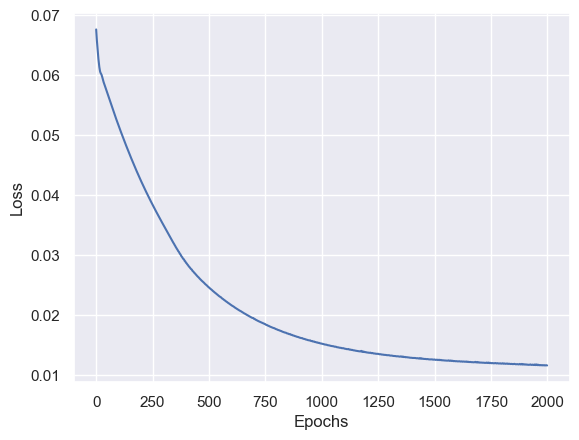

In [127]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

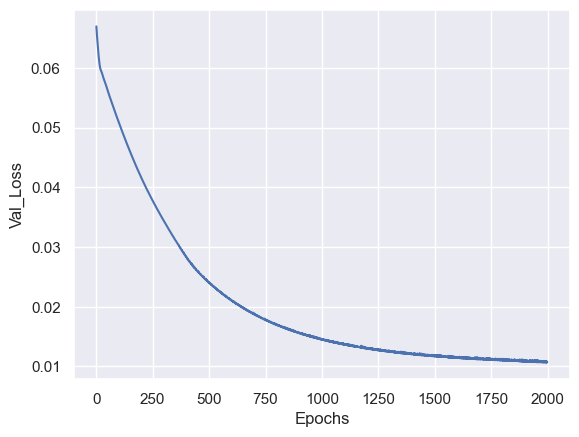

In [128]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [129]:
#modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\MGFE-Dwarfs.h5


In [130]:
predMGFE = modelMGFE.predict(X_test)

16/16 [==============================] - 0s 16ms/step


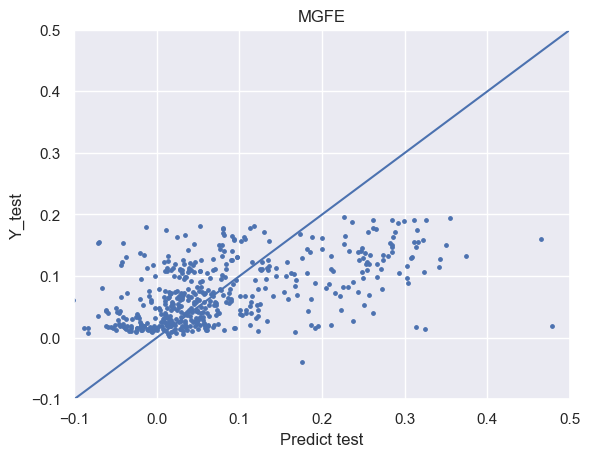

In [133]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.5)
plt.ylim(-0.1, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [134]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 24.0%


In [135]:
Y_test['MGFE_predict'] = predMGFE

In [136]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0049_0043043  5734.6290  4.200532 -0.114700  0.116345   
iDR4_3_STRIPE82-0006_0013917  5488.8906  4.472672  0.057199  0.010369   
iDR4_3_SPLUS-n01s21_0012158   5892.0330  4.328696 -0.049458 -0.038616   
iDR4_3_STRIPE82-0039_0043985  5458.4697  4.378392  0.354240 -0.017668   
iDR4_3_SPLUS-s46s27_0001144   5414.2627  4.488376 -0.010161  0.015603   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328  5571.1177  4.486858 -0.130290  0.027000   
iDR4_3_MC0144_0020923         5930.7466  4.347804  0.073778 -0.028085   
iDR4_3_SPLUS-s36s48_0010879   5879.0005  4.254626 -0.193250  0.012080   
iDR4_3_STRIPE82-0119_0029599  5917.2266  4.357494  0.264410 -0.029465   
iDR4_3_STRIPE82-0032_0019492  5365.7900  4.564479 -0.423860  0.044161   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0049_0043043  0.092637  0.043326  0.045565  0.090687   
iDR4_3_STRIPE82-0006_0013917  0.049674 -0.040476  0.070401  0.009373   
iDR4_3_SPLUS-n01s21_0012158  -0.104624 -0.012661  0.258026 -0.025835   
iDR4_3_STRIPE82-0039_0043985  0.002601 -0.037814  0.186140  0.019770   
iDR4_3_SPLUS-s46s27_0001144  -0.026065 -0.048343 -0.000674  0.052980   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0030_0025328 -0.002203  0.039466 -0.001039  0.013680   
iDR4_3_MC0144_0020923        -0.001916  0.128494  0.132718  0.000522   
iDR4_3_SPLUS-s36s48_0010879   0.077043  0.011765  0.284690  0.012350   
iDR4_3_STRIPE82-0119_0029599 -0.088158  0.071446  0.428010  0.045410   
iDR4_3_STRIPE82-0032_0019492  0.052614  0.021266  0.063915  0.024030   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_STRIPE82-0049_0043043  0.186449  0.160328     0.333771   
iDR4_3_STRIPE82-0006_0013917  0.030308  0.096459     0.086348   
iDR4_3_SPLUS-n01s21_0012158   0.010457  0.000236     0.492255   
iDR4_3_STRIPE82-0039_0043985  0.016490  0.082511     0.055719   
iDR4_3_SPLUS-s46s27_0001144   0.041721  0.077075     0.011209   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0030_0025328  0.073435  0.081901     0.169139   
iDR4_3_MC0144_0020923        -0.131843 -0.031297     0.531234   
iDR4_3_SPLUS-s36s48_0010879  -0.025474  0.057351     0.479133   
iDR4_3_STRIPE82-0119_0029599 -0.058911  0.007914     0.517621   
iDR4_3_STRIPE82-0032_0019492  0.089480  0.025549    -0.037597   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  \
ID                                                                             
iDR4_3_STRIPE82-0049_0043043          5667.877441      4.362273    -0.097010   
iDR4_3_STRIPE82-0006_0013917          5442.731934      4.456963    -0.009964   
iDR4_3_SPLUS-n01s21_0012158           5716.502441      4.345819    -0.137373   
iDR4_3_STRIPE82-0039_0043985          5405.290039      4.446997     0.184064   
iDR4_3_SPLUS-s46s27_0001144           5483.412109      4.414199     0.058487   
...                                           ...           ...          ...   
iDR4_3_STRIPE82-0030_0025328          5784.730469      4.424310     0.100384   
iDR4_3_MC0144_0020923                 5812.328613      4.333236    -0.194380   
iDR4_3_SPLUS-s36s48_0010879           5919.679199      4.295545    -0.158681   
iDR4_3_STRIPE82-0119_0029599          5871.614258      4.290138    -0.009685   
iDR4_3_STRIPE82-0032_0019492          5336.151855      4.474226    -0.402715   

                              MGFE_predict  
ID                                          
iDR4_3_STRIPE82-0049_0043043      0.020121  
iDR4_3_STRIPE82-0006_0013917      0.065745  
iDR4_3_SPLUS-n01s21_0012158       0.059956  
iDR4_3_STRIPE82-0039_0043985      0.

In [137]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros parametros

In [13]:
AnasCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [14]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                            
iDR4_3_SPLUS-n01s18_0001709  0.3095  0.4087  1.0068  1.0890  1.3712  1.5495   
iDR4_3_SPLUS-n01s18_0002708  0.2271  0.3904  1.0625  1.1742  1.5712  1.7590   
iDR4_3_SPLUS-n01s18_0005394  0.3142  0.3884  0.9796  1.0733  1.3174  1.4928   
iDR4_3_SPLUS-n01s18_0006515  0.3983  0.4477  0.8776  0.9634  1.1387  1.2856   
iDR4_3_SPLUS-n01s18_0007564  0.2810  0.4724  1.0499  1.1560  1.5345  1.7041   
...                             ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0123337        0.2819  0.4538  1.0269  1.1240  1.5261  1.6795   
iDR4_3_MC0017_0138801        0.3415  0.4028  0.8486  0.9161  1.2174  1.3536   
iDR4_3_MC0017_0192087        0.3237  0.4021  0.9218  0.9824  1.3037  1.4461   
iDR4_3_MC0017_0184348        0.2601  0.3918  0.9703  1.0342  1.4245  1.5723   
iDR4_3_MC0017_0185961        0.3401  0.3748  0.8844  0.9293  1.2556  1.4015   

                                u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                           ...              
iDR4_3_SPLUS-n01s18_0001709  1.8077  1.8099  1.8807  1.8613  ...  5802.4287   
iDR4_3_SPLUS-n01s18_0002708  2.1391  2.1734  2.2793  2.2957  ...  5399.4194   
iDR4_3_SPLUS-n01s18_0005394  1.7332  1.7329  1.8070  1.8032  ...  5797.1396   
iDR4_3_SPLUS-n01s18_0006515  1.5044  1.4994  1.5705  1.5498  ...  5893.2480   
iDR4_3_SPLUS-n01s18_0007564  1.7736  2.0101  1.8570  2.1712  ...  5543.4917   
...                             ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0123337        2.0430  2.0816  2.1816  2.1742  ...  5316.5186   
iDR4_3_MC0017_0138801        1.6118  1.6199  1.7006  1.6894  ...  5810.5635   
iDR4_3_MC0017_0192087        1.7065  1.7058  1.7956  1.7810  ...  5675.1340   
iDR4_3_MC0017_0184348        1.9041  1.9216  2.0345  2.0357  ...  5379.8423   
iDR4_3_MC0017_0185961        1.6863  1.7029  1.8248  1.8411  ...  5863.3240   

                                 LOGG      FE_H   ALPHA_M      C_FE     CA_FE  \
ID                                                                              
iDR4_3_SPLUS-n01s18_0001709  4.254205  0.147120  0.002020 -0.050585 -0.065713   
iDR4_3_SPLUS-n01s18_0002708  4.524888 -0.073971  0.039870 -0.102907 -0.006521   
iDR4_3_SPLUS-n01s18_0005394  4.418411 -0.023264  0.018107  0.123594 -0.054569   
iDR4_3_SPLUS-n01s18_0006515  4.201298 -0.412770  0.048583  0.078623  0.027116   
iDR4_3_SPLUS-n01s18_0007564  4.453466  0.143420  0.010248 -0.039677 -0.006861   
...                               ...       ...       ...       ...       ...   
iDR4_3_MC0017_0123337        4.516725  0.023225  0.000565 -0.063870 -0.022534   
iDR4_3_MC0017_0138801        4.427444 -0.006535 -0.045383 -0.157521 -0.017759   
iDR4_3_MC0017_0192087        4.488830 -0.004341 -0.029533 -0.090110 -0.017188   
iDR4_3_MC0017_0184348        4.503495 -0.137720  0.036358 -0.061838 -0.000539   
iDR4_3_MC0017_0185961        4.411817 -0.272750  0.128755 -0.148010  0.142876   

                                 N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                   
iDR4_3_SPLUS-n01s18_0001709  0.198130  0.047880 -0.005581  0.097538  
iDR4_3_SPLUS-n01s18_0002708 -0.021516  0.008237  0.064352  0.076568  
iDR4_3_SPLUS-n01s18_0005394 -0.158096  0.029543  0.058660  0.035355  
iDR4_3_SPLUS-n01s18_0006515  0.330810  0.046450  0.100511  0.164855  
iDR4_3_SPLUS-n01s18_0007564  0.140530  0.044830  0.057242  0.062623  
...                               ...       ...       ...       ...  
iDR4_3_MC0017_0123337       -0.152347 -0.010128  0.045152  0.068534  
iDR4_3_MC0017_0138801       -0.006624 -0.054354 -0.051813  0.032612  
iDR4_3_MC0017_0192087        0.095603  0.021082 -0.033828  0.058242  
iDR4_3_MC0017_0184348       -0.051321 -0.003090  0.068527  0.078891  
iDR4_3_MC0017_0185961        0.502880  0.005610  0.199459  0.080455  

[2406 ro

In [15]:
AnasCoresParams = AnasCores.loc[(AnasCores['ALPHA_M'] != -999) & (AnasCores['C_FE'] != -999) &
                                (AnasCores['CA_FE'] != -999) & (AnasCores['N_FE'] != -999) &
                                (AnasCores['SI_FE'] != -999) & (AnasCores['NI_FE'] != -999)]

In [16]:
print('alpha =', AnasCoresParams['ALPHA_M'].min())
print('cfe =', AnasCoresParams['C_FE'].min())
print('cafe = ', AnasCoresParams['CA_FE'].min())
print('nfe = ', AnasCoresParams['N_FE'].min())
print('mgfe = ', AnasCoresParams['MG_FE'].min())
print('sife = ', AnasCoresParams['SI_FE'].min())
print('nife = ', AnasCoresParams['NI_FE'].min())

alpha = -0.3357847
cfe = -0.45211002
cafe =  -0.51623404
nfe =  -0.54531
mgfe =  -0.51568145
sife =  -0.18005705
nife =  -0.8830001


In [17]:
AnasCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                            
iDR4_3_SPLUS-n01s18_0001709  0.3095  0.4087  1.0068  1.0890  1.3712  1.5495   
iDR4_3_SPLUS-n01s18_0002708  0.2271  0.3904  1.0625  1.1742  1.5712  1.7590   
iDR4_3_SPLUS-n01s18_0005394  0.3142  0.3884  0.9796  1.0733  1.3174  1.4928   
iDR4_3_SPLUS-n01s18_0006515  0.3983  0.4477  0.8776  0.9634  1.1387  1.2856   
iDR4_3_SPLUS-n01s18_0007564  0.2810  0.4724  1.0499  1.1560  1.5345  1.7041   
...                             ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0123337        0.2819  0.4538  1.0269  1.1240  1.5261  1.6795   
iDR4_3_MC0017_0138801        0.3415  0.4028  0.8486  0.9161  1.2174  1.3536   
iDR4_3_MC0017_0192087        0.3237  0.4021  0.9218  0.9824  1.3037  1.4461   
iDR4_3_MC0017_0184348        0.2601  0.3918  0.9703  1.0342  1.4245  1.5723   
iDR4_3_MC0017_0185961        0.3401  0.3748  0.8844  0.9293  1.2556  1.4015   

                                u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                           ...              
iDR4_3_SPLUS-n01s18_0001709  1.8077  1.8099  1.8807  1.8613  ...  5802.4287   
iDR4_3_SPLUS-n01s18_0002708  2.1391  2.1734  2.2793  2.2957  ...  5399.4194   
iDR4_3_SPLUS-n01s18_0005394  1.7332  1.7329  1.8070  1.8032  ...  5797.1396   
iDR4_3_SPLUS-n01s18_0006515  1.5044  1.4994  1.5705  1.5498  ...  5893.2480   
iDR4_3_SPLUS-n01s18_0007564  1.7736  2.0101  1.8570  2.1712  ...  5543.4917   
...                             ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0123337        2.0430  2.0816  2.1816  2.1742  ...  5316.5186   
iDR4_3_MC0017_0138801        1.6118  1.6199  1.7006  1.6894  ...  5810.5635   
iDR4_3_MC0017_0192087        1.7065  1.7058  1.7956  1.7810  ...  5675.1340   
iDR4_3_MC0017_0184348        1.9041  1.9216  2.0345  2.0357  ...  5379.8423   
iDR4_3_MC0017_0185961        1.6863  1.7029  1.8248  1.8411  ...  5863.3240   

                                 LOGG      FE_H   ALPHA_M      C_FE     CA_FE  \
ID                                                                              
iDR4_3_SPLUS-n01s18_0001709  4.254205  0.147120  0.002020 -0.050585 -0.065713   
iDR4_3_SPLUS-n01s18_0002708  4.524888 -0.073971  0.039870 -0.102907 -0.006521   
iDR4_3_SPLUS-n01s18_0005394  4.418411 -0.023264  0.018107  0.123594 -0.054569   
iDR4_3_SPLUS-n01s18_0006515  4.201298 -0.412770  0.048583  0.078623  0.027116   
iDR4_3_SPLUS-n01s18_0007564  4.453466  0.143420  0.010248 -0.039677 -0.006861   
...                               ...       ...       ...       ...       ...   
iDR4_3_MC0017_0123337        4.516725  0.023225  0.000565 -0.063870 -0.022534   
iDR4_3_MC0017_0138801        4.427444 -0.006535 -0.045383 -0.157521 -0.017759   
iDR4_3_MC0017_0192087        4.488830 -0.004341 -0.029533 -0.090110 -0.017188   
iDR4_3_MC0017_0184348        4.503495 -0.137720  0.036358 -0.061838 -0.000539   
iDR4_3_MC0017_0185961        4.411817 -0.272750  0.128755 -0.148010  0.142876   

                                 N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                   
iDR4_3_SPLUS-n01s18_0001709  0.198130  0.047880 -0.005581  0.097538  
iDR4_3_SPLUS-n01s18_0002708 -0.021516  0.008237  0.064352  0.076568  
iDR4_3_SPLUS-n01s18_0005394 -0.158096  0.029543  0.058660  0.035355  
iDR4_3_SPLUS-n01s18_0006515  0.330810  0.046450  0.100511  0.164855  
iDR4_3_SPLUS-n01s18_0007564  0.140530  0.044830  0.057242  0.062623  
...                               ...       ...       ...       ...  
iDR4_3_MC0017_0123337       -0.152347 -0.010128  0.045152  0.068534  
iDR4_3_MC0017_0138801       -0.006624 -0.054354 -0.051813  0.032612  
iDR4_3_MC0017_0192087        0.095603  0.021082 -0.033828  0.058242  
iDR4_3_MC0017_0184348       -0.051321 -0.003090  0.068527  0.078891  
iDR4_3_MC0017_0185961        0.502880  0.005610  0.199459  0.080455  

[2374 ro

In [18]:
xtrain = AnasCoresParams.iloc[:, :66]

In [19]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [20]:
ytrain = AnasCoresParams[columnYtrain]

In [21]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [22]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [23]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [24]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0056_0002977  5199.6780  4.428120 -0.275540  0.017459   
iDR4_3_SPLUS-s46s28_0019695   5707.6553  4.472859 -0.014022  0.002069   
iDR4_3_STRIPE82-0059_0009340  5701.7220  4.225607  0.189460 -0.016357   
iDR4_3_SPLUS-s46s29_0021041   5748.9917  4.130580  0.076617  0.012774   
iDR4_3_STRIPE82-0082_0035840  5894.9040  4.188672 -0.142460 -0.041411   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   5408.0050  4.294715 -0.618060  0.198015   
iDR4_3_STRIPE82-0057_0020420  5938.7285  4.371747 -0.010298 -0.005190   
iDR4_3_STRIPE82-0064_0059171  6064.0310  4.301616 -0.099468 -0.020511   
iDR4_3_STRIPE82-0077_0032351  5540.1020  4.523918 -0.341590  0.034730   
iDR4_3_STRIPE82-0042_0030593  5723.9680  4.287941 -0.198820  0.183875   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0056_0002977 -0.009099  0.103566 -0.428700 -0.049610   
iDR4_3_SPLUS-s46s28_0019695  -0.069564 -0.032907 -0.033736 -0.011833   
iDR4_3_STRIPE82-0059_0009340 -0.066271  0.026027  0.188550  0.055630   
iDR4_3_SPLUS-s46s29_0021041  -0.042610 -0.048777  0.222741  0.075433   
iDR4_3_STRIPE82-0082_0035840 -0.023313 -0.005546  0.120000  0.059153   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   0.307170  0.275156 -0.091830  0.003740   
iDR4_3_STRIPE82-0057_0020420 -0.065952  0.014349  0.143061  0.011194   
iDR4_3_STRIPE82-0064_0059171 -0.034613 -0.043535  0.319788  0.030345   
iDR4_3_STRIPE82-0077_0032351 -0.069185  0.018762 -0.080368  0.009440   
iDR4_3_STRIPE82-0042_0030593  0.059389  0.134626  0.057430  0.100000   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_STRIPE82-0056_0002977 -0.008161 -0.035887  
iDR4_3_SPLUS-s46s28_0019695   0.016848  0.042311  
iDR4_3_STRIPE82-0059_0009340  0.018397  0.047868  
iDR4_3_SPLUS-s46s29_0021041   0.023817  0.101271  
iDR4_3_STRIPE82-0082_0035840 -0.060911  0.065788  
...                                ...       ...  
iDR4_3_SPLUS-n01s23_0028657   0.240178  0.207523  
iDR4_3_STRIPE82-0057_0020420  0.006452  0.021927  
iDR4_3_STRIPE82-0064_0059171  0.000897  0.069945  
iDR4_3_STRIPE82-0077_0032351  0.066759  0.062687  
iDR4_3_STRIPE82-0042_0030593  0.312068  0.181903  

[1709 rows x 10 columns]

### Alpha

In [25]:
Parametro = "Alpha"
columnTrain = 'ALPHA_M'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [29]:
modelAlpha = baseline_model_teste()

In [30]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 3s - loss: 0.0572 - val_loss: 0.0581 - 3s/epoch - 3s/step
Epoch 2/2000
1/1 - 0s - loss: 0.0570 - val_loss: 0.0579 - 55ms/epoch - 55ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0568 - val_loss: 0.0576 - 61ms/epoch - 61ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0574 - 65ms/epoch - 65ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0572 - 64ms/epoch - 64ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0562 - val_loss: 0.0570 - 43ms/epoch - 43ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0560 - val_loss: 0.0568 - 53ms/epoch - 53ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0558 - val_loss: 0.0566 - 53ms/epoch - 53ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0556 - val_loss: 0.0564 - 48ms/epoch - 48ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0554 - val_loss: 0.0562 - 44ms/epoch - 44ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0552 - val_loss: 0.0560 - 52ms/epoch - 52ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0557 - 48ms/epoch - 48ms/step
Epoch 13/2000
1/1 - 0s - loss

1/1 - 0s - loss: 0.0440 - val_loss: 0.0446 - 48ms/epoch - 48ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0439 - val_loss: 0.0445 - 48ms/epoch - 48ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0438 - val_loss: 0.0444 - 43ms/epoch - 43ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0437 - val_loss: 0.0443 - 49ms/epoch - 49ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0435 - val_loss: 0.0442 - 42ms/epoch - 42ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0434 - val_loss: 0.0441 - 42ms/epoch - 42ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0433 - val_loss: 0.0439 - 49ms/epoch - 49ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0432 - val_loss: 0.0438 - 45ms/epoch - 45ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0431 - val_loss: 0.0437 - 50ms/epoch - 50ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0430 - val_loss: 0.0436 - 42ms/epoch - 42ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0429 - val_loss: 0.0435 - 44ms/epoch - 44ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0428 - val_loss: 0.0434 - 44ms/epoch - 44ms/step
Epoch 113/2000
1/1 

Epoch 200/2000
1/1 - 0s - loss: 0.0343 - val_loss: 0.0350 - 50ms/epoch - 50ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0342 - val_loss: 0.0349 - 46ms/epoch - 46ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0341 - val_loss: 0.0348 - 42ms/epoch - 42ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0341 - val_loss: 0.0347 - 46ms/epoch - 46ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0340 - val_loss: 0.0346 - 41ms/epoch - 41ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0339 - val_loss: 0.0345 - 41ms/epoch - 41ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0338 - val_loss: 0.0345 - 46ms/epoch - 46ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0337 - val_loss: 0.0344 - 44ms/epoch - 44ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0343 - 48ms/epoch - 48ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0342 - 47ms/epoch - 47ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0341 - 42ms/epoch - 42ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0340 - 49ms/epoch - 49ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0269 - val_loss: 0.0276 - 39ms/epoch - 39ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0275 - 37ms/epoch - 37ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0268 - val_loss: 0.0275 - 36ms/epoch - 36ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0267 - val_loss: 0.0274 - 45ms/epoch - 45ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0273 - 46ms/epoch - 46ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0273 - 44ms/epoch - 44ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0272 - 42ms/epoch - 42ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0271 - 44ms/epoch - 44ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0271 - 40ms/epoch - 40ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0270 - 40ms/epoch - 40ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0270 - 40ms/epoch - 40ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0269 - 41ms/epoch - 41ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0218 - 44ms/epoch - 44ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0218 - 43ms/epoch - 43ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0218 - 43ms/epoch - 43ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0217 - 38ms/epoch - 38ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0217 - 42ms/epoch - 42ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0216 - 38ms/epoch - 38ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0215 - 47ms/epoch - 47ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0215 - 45ms/epoch - 45ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0214 - 43ms/epoch - 43ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0214 - 44ms/epoch - 44ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0213 - 41ms/epoch - 41ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0214 - 44ms/epoch - 44ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0177 - 43ms/epoch - 43ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0177 - 70ms/epoch - 70ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0176 - 43ms/epoch - 43ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0176 - 70ms/epoch - 70ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0176 - 45ms/epoch - 45ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0175 - 70ms/epoch - 70ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0176 - 41ms/epoch - 41ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0175 - 70ms/epoch - 70ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0176 - 45ms/epoch - 45ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0174 - 70ms/epoch - 70ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0165 - val_loss: 0.0174 - 43ms/epoch - 43ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0173 - 70ms/epoch - 70ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0148 - 45ms/epoch - 45ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0147 - 38ms/epoch - 38ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0147 - 44ms/epoch - 44ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0147 - 40ms/epoch - 40ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0147 - 41ms/epoch - 41ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0147 - 38ms/epoch - 38ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0146 - 45ms/epoch - 45ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0146 - 45ms/epoch - 45ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0146 - 41ms/epoch - 41ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0146 - 39ms/epoch - 39ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0136 - val_loss: 0.0145 - 44ms/epoch - 44ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0136 - val_loss: 0.0145 - 43ms/epoch - 43ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0126 - 42ms/epoch - 42ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0126 - 42ms/epoch - 42ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0126 - 49ms/epoch - 49ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0125 - 44ms/epoch - 44ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0117 - val_loss: 0.0126 - 45ms/epoch - 45ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0125 - 44ms/epoch - 44ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0125 - 46ms/epoch - 46ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0125 - 45ms/epoch - 45ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0125 - 43ms/epoch - 43ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0115 - val_loss: 0.0124 - 45ms/epoch - 45ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0115 - val_loss: 0.0124 - 47ms/epoch - 47ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0115 - val_loss: 0.0124 - 41ms/epoch - 41ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0110 - 43ms/epoch - 43ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0110 - 42ms/epoch - 42ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0109 - 42ms/epoch - 42ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0109 - 45ms/epoch - 45ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0109 - 42ms/epoch - 42ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0109 - 43ms/epoch - 43ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0109 - 44ms/epoch - 44ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0109 - 42ms/epoch - 42ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0109 - 45ms/epoch - 45ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0108 - 45ms/epoch - 45ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0108 - 45ms/epoch - 45ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0108 - 54ms/epoch - 54ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0097 - 46ms/epoch - 46ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0097 - 41ms/epoch - 41ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0097 - 41ms/epoch - 41ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0097 - 47ms/epoch - 47ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0097 - 45ms/epoch - 45ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0097 - 42ms/epoch - 42ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0096 - 47ms/epoch - 47ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0096 - 49ms/epoch - 49ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0096 - 47ms/epoch - 47ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0096 - 46ms/epoch - 46ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0088 - 44ms/epoch - 44ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0088 - 41ms/epoch - 41ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0088 - 43ms/epoch - 43ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0088 - 45ms/epoch - 45ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0088 - 46ms/epoch - 46ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0087 - 41ms/epoch - 41ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0087 - 43ms/epoch - 43ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0087 - 40ms/epoch - 40ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0087 - 47ms/epoch - 47ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 48ms/epoch - 48ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 47ms/epoch - 47ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 43ms/epoch - 43ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 48ms/epoch - 48ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 42ms/epoch - 42ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 45ms/epoch - 45ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 46ms/epoch - 46ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 47ms/epoch - 47ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 45ms/epoch - 45ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 45ms/epoch - 45ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 46ms/epoch - 46ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 40ms/epoch - 40

Epoch 1188/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0075 - 46ms/epoch - 46ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0075 - 46ms/epoch - 46ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0075 - 46ms/epoch - 46ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0075 - 44ms/epoch - 44ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0075 - 56ms/epoch - 56ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0075 - 43ms/epoch - 43ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0075 - 47ms/epoch - 47ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0075 - 45ms/epoch - 45ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0075 - 41ms/epoch - 41ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0075 - 45ms/epoch - 45ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0075 - 45ms/epoch - 45ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0075 - 41ms/epoch - 41

Epoch 1286/2000
1/1 - 0s - loss: 0.0062 - val_loss: 0.0071 - 41ms/epoch - 41ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 45ms/epoch - 45ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 47ms/epoch - 47ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 46ms/epoch - 46ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 46ms/epoch - 46ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 45ms/epoch - 45ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 42ms/epoch - 42ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 50ms/epoch - 50ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 45ms/epoch - 45ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 42ms/epoch - 42ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 40ms/epoch - 40ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0071 - 44ms/epoch - 44

Epoch 1384/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 99ms/epoch - 99ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 45ms/epoch - 45ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 43ms/epoch - 43ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 44ms/epoch - 44ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 45ms/epoch - 45ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 43ms/epoch - 43ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 40ms/epoch - 40ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 41ms/epoch - 41ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 42ms/epoch - 42ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 43ms/epoch - 43ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 43ms/epoch - 43ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0068 - 44ms/epoch - 44

Epoch 1482/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0065 - 38ms/epoch - 38ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0066 - 37ms/epoch - 37ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0065 - 38ms/epoch - 38ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0066 - 37ms/epoch - 37ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0065 - 40ms/epoch - 40ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0066 - 37ms/epoch - 37ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0065 - 37ms/epoch - 37ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0065 - 36ms/epoch - 36ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0065 - 40ms/epoch - 40ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0065 - 39ms/epoch - 39ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0065 - 39ms/epoch - 39ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0065 - 38ms/epoch - 38

Epoch 1580/2000
1/1 - 0s - loss: 0.0054 - val_loss: 0.0064 - 50ms/epoch - 50ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0054 - val_loss: 0.0064 - 45ms/epoch - 45ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0063 - 46ms/epoch - 46ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0063 - 50ms/epoch - 50ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0064 - 45ms/epoch - 45ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0063 - 44ms/epoch - 44ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0063 - 64ms/epoch - 64ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0064 - 44ms/epoch - 44ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0063 - 68ms/epoch - 68ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0063 - 46ms/epoch - 46ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0063 - 68ms/epoch - 68

Epoch 1678/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 49ms/epoch - 49ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 52ms/epoch - 52ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 39ms/epoch - 39ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 43ms/epoch - 43ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 52ms/epoch - 52ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 48ms/epoch - 48ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 47ms/epoch - 47ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 47ms/epoch - 47ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 37ms/epoch - 37ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 41ms/epoch - 41ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 39ms/epoch - 39ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0062 - 37ms/epoch - 37

Epoch 1776/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 62ms/epoch - 62ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 53ms/epoch - 53ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 72ms/epoch - 72ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 48ms/epoch - 48ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 41ms/epoch - 41ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 41ms/epoch - 41ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 51ms/epoch - 51ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 52ms/epoch - 52ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0051 - val_loss: 0.0061 - 58ms/epoch - 58ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0061 - 48ms/epoch - 48ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0061 - 38ms/epoch - 38ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0061 - 40ms/epoch - 40

Epoch 1874/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 38ms/epoch - 38ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0060 - 38ms/epoch - 38ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0050 - val_loss: 0.0060 - 40ms/epoch - 40ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 42ms/epoch - 42ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 38ms/epoch - 38ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 37ms/epoch - 37ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 39ms/epoch - 39ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0060 - 38ms/epoch - 38

Epoch 1972/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 37ms/epoch - 37ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 39ms/epoch - 39ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 40ms/epoch - 40ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 38ms/epoch - 38ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 37ms/epoch - 37ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 36ms/epoch - 36ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 39ms/epoch - 39ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 39ms/epoch - 39ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 38ms/epoch - 38ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 38ms/epoch - 38ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 39ms/epoch - 39ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0059 - 37ms/epoch - 37

Text(0, 0.5, 'Loss')

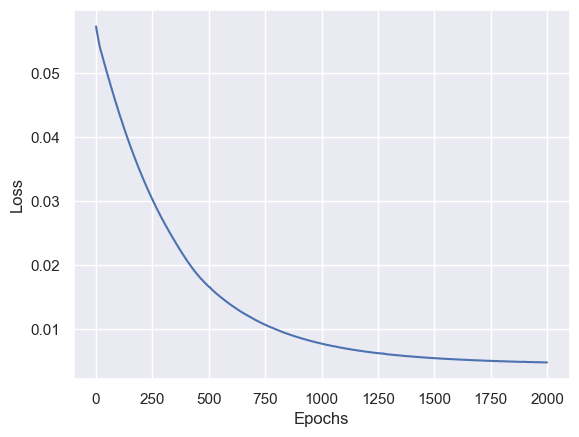

In [31]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

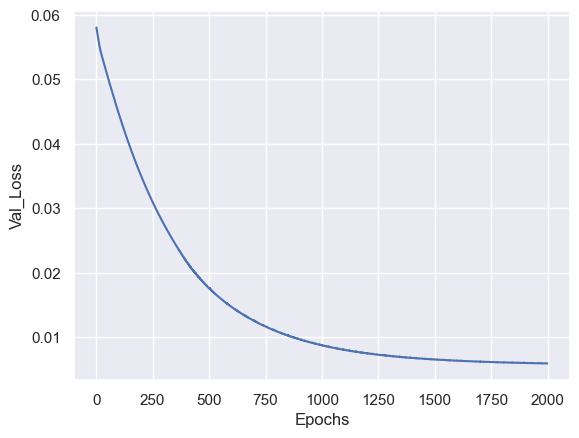

In [32]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [34]:
#modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\Alpha-Dwarfs.h5


In [35]:
predalpha = modelAlpha.predict(X_test)

15/15 [==============================] - 0s 6ms/step


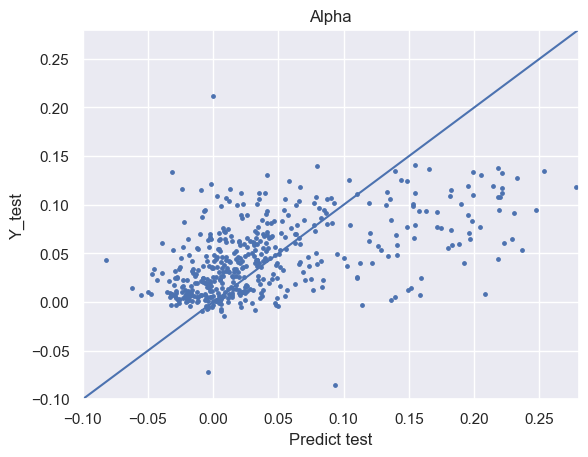

In [36]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [37]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 26.0%


In [38]:
Y_test['alpha_predict'] = predalpha

In [39]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0006_0031340  6067.8300  4.276641 -0.572270  0.044420   
iDR4_3_STRIPE82-0127_0034876  5949.8525  4.286202  0.119770 -0.033549   
iDR4_3_SPLUS-n01s21_0037937   5631.6450  4.482069 -0.313950  0.039358   
iDR4_3_MC0027_0111940         5972.2070  4.303142 -0.021939  0.022843   
iDR4_3_SPLUS-s45s28_0015514   5204.5957  4.488423 -0.027829  0.033704   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173  5705.2220  4.462307 -0.244460  0.012823   
iDR4_3_SPLUS-s45s29_0018570   5578.7880  4.437919 -0.013044 -0.008293   
iDR4_3_SPLUS-n01s25_0006878   5427.1120  4.505870 -0.149470  0.012845   
iDR4_3_SPLUS-n05s43_0015951   5503.1665  4.352323  0.102820  0.006785   
iDR4_3_STRIPE82-0109_0011474  5686.2140  4.485206 -0.368510  0.102693   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0006_0031340  0.163360 -0.217014  0.827450  0.001670   
iDR4_3_STRIPE82-0127_0034876 -0.177170 -0.161523  0.184340  0.012490   
iDR4_3_SPLUS-n01s21_0037937  -0.059392 -0.058840  0.037087  0.009060   
iDR4_3_MC0027_0111940        -0.163395  0.020317  0.342305  0.013630   
iDR4_3_SPLUS-s45s28_0015514  -0.047871  0.105029 -0.117047  0.049347   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173 -0.012513  0.179946  0.166890 -0.018730   
iDR4_3_SPLUS-s45s29_0018570  -0.095363  0.022837  0.322617  0.005522   
iDR4_3_SPLUS-n01s25_0006878   0.131590  0.043420 -0.023037 -0.016260   
iDR4_3_SPLUS-n05s43_0015951  -0.125291 -0.004833 -0.091659 -0.003120   
iDR4_3_STRIPE82-0109_0011474  0.089403  0.054316  0.079354  0.001190   

                                 MG_FE     SI_FE  alpha_predict  
ID                                                               
iDR4_3_STRIPE82-0006_0031340  0.106442  0.065177       0.081636  
iDR4_3_STRIPE82-0127_0034876 -0.050481  0.045387       0.022060  
iDR4_3_SPLUS-n01s21_0037937   0.074532  0.076224       0.111641  
iDR4_3_MC0027_0111940         0.069163  0.067362       0.036209  
iDR4_3_SPLUS-s45s28_0015514   0.038278  0.093525       0.070635  
...                                ...       ...            ...  
iDR4_3_STRIPE82-0062_0003173  0.024349 -0.035344       0.116512  
iDR4_3_SPLUS-s45s29_0018570   0.030742  0.010100       0.087328  
iDR4_3_SPLUS-n01s25_0006878   0.042230 -0.024407       0.041278  
iDR4_3_SPLUS-n05s43_0015951   0.043551  0.057482       0.005428  
iDR4_3_STRIPE82-0109_0011474  0.179288  0.136342       0.036529  

[475 rows x 11 columns]

In [40]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [41]:
Parametro = "CFE"
columnTrain = 'C_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [42]:
modelCFE = baseline_model_teste()

In [43]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
1/1 - 1s - loss: 0.0624 - val_loss: 0.0617 - 829ms/epoch - 829ms/step
Epoch 2/1500
1/1 - 0s - loss: 0.0623 - val_loss: 0.0616 - 42ms/epoch - 42ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.0622 - val_loss: 0.0615 - 37ms/epoch - 37ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.0621 - val_loss: 0.0613 - 37ms/epoch - 37ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.0620 - val_loss: 0.0612 - 39ms/epoch - 39ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.0618 - val_loss: 0.0611 - 38ms/epoch - 38ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.0617 - val_loss: 0.0609 - 37ms/epoch - 37ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.0616 - val_loss: 0.0608 - 38ms/epoch - 38ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.0615 - val_loss: 0.0607 - 39ms/epoch - 39ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.0613 - val_loss: 0.0606 - 36ms/epoch - 36ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.0612 - val_loss: 0.0604 - 35ms/epoch - 35ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.0611 - val_loss: 0.0603 - 38ms/epoch - 38ms/step
Epoch 13/1500
1/1 - 0s 

Epoch 101/1500
1/1 - 0s - loss: 0.0497 - val_loss: 0.0489 - 41ms/epoch - 41ms/step
Epoch 102/1500
1/1 - 0s - loss: 0.0496 - val_loss: 0.0488 - 45ms/epoch - 45ms/step
Epoch 103/1500
1/1 - 0s - loss: 0.0495 - val_loss: 0.0487 - 44ms/epoch - 44ms/step
Epoch 104/1500
1/1 - 0s - loss: 0.0494 - val_loss: 0.0486 - 48ms/epoch - 48ms/step
Epoch 105/1500
1/1 - 0s - loss: 0.0493 - val_loss: 0.0485 - 46ms/epoch - 46ms/step
Epoch 106/1500
1/1 - 0s - loss: 0.0491 - val_loss: 0.0484 - 50ms/epoch - 50ms/step
Epoch 107/1500
1/1 - 0s - loss: 0.0490 - val_loss: 0.0483 - 45ms/epoch - 45ms/step
Epoch 108/1500
1/1 - 0s - loss: 0.0489 - val_loss: 0.0482 - 40ms/epoch - 40ms/step
Epoch 109/1500
1/1 - 0s - loss: 0.0488 - val_loss: 0.0480 - 47ms/epoch - 47ms/step
Epoch 110/1500
1/1 - 0s - loss: 0.0487 - val_loss: 0.0479 - 41ms/epoch - 41ms/step
Epoch 111/1500
1/1 - 0s - loss: 0.0486 - val_loss: 0.0478 - 49ms/epoch - 49ms/step
Epoch 112/1500
1/1 - 0s - loss: 0.0485 - val_loss: 0.0477 - 43ms/epoch - 43ms/step
Epoc

Epoch 200/1500
1/1 - 0s - loss: 0.0398 - val_loss: 0.0391 - 46ms/epoch - 46ms/step
Epoch 201/1500
1/1 - 0s - loss: 0.0397 - val_loss: 0.0390 - 40ms/epoch - 40ms/step
Epoch 202/1500
1/1 - 0s - loss: 0.0396 - val_loss: 0.0389 - 41ms/epoch - 41ms/step
Epoch 203/1500
1/1 - 0s - loss: 0.0396 - val_loss: 0.0388 - 47ms/epoch - 47ms/step
Epoch 204/1500
1/1 - 0s - loss: 0.0395 - val_loss: 0.0387 - 46ms/epoch - 46ms/step
Epoch 205/1500
1/1 - 0s - loss: 0.0394 - val_loss: 0.0386 - 47ms/epoch - 47ms/step
Epoch 206/1500
1/1 - 0s - loss: 0.0393 - val_loss: 0.0385 - 44ms/epoch - 44ms/step
Epoch 207/1500
1/1 - 0s - loss: 0.0392 - val_loss: 0.0384 - 42ms/epoch - 42ms/step
Epoch 208/1500
1/1 - 0s - loss: 0.0391 - val_loss: 0.0384 - 44ms/epoch - 44ms/step
Epoch 209/1500
1/1 - 0s - loss: 0.0390 - val_loss: 0.0383 - 40ms/epoch - 40ms/step
Epoch 210/1500
1/1 - 0s - loss: 0.0390 - val_loss: 0.0382 - 45ms/epoch - 45ms/step
Epoch 211/1500
1/1 - 0s - loss: 0.0389 - val_loss: 0.0381 - 48ms/epoch - 48ms/step
Epoc

Epoch 299/1500
1/1 - 0s - loss: 0.0321 - val_loss: 0.0316 - 45ms/epoch - 45ms/step
Epoch 300/1500
1/1 - 0s - loss: 0.0321 - val_loss: 0.0315 - 41ms/epoch - 41ms/step
Epoch 301/1500
1/1 - 0s - loss: 0.0320 - val_loss: 0.0314 - 49ms/epoch - 49ms/step
Epoch 302/1500
1/1 - 0s - loss: 0.0319 - val_loss: 0.0314 - 42ms/epoch - 42ms/step
Epoch 303/1500
1/1 - 0s - loss: 0.0318 - val_loss: 0.0313 - 44ms/epoch - 44ms/step
Epoch 304/1500
1/1 - 0s - loss: 0.0318 - val_loss: 0.0313 - 44ms/epoch - 44ms/step
Epoch 305/1500
1/1 - 0s - loss: 0.0317 - val_loss: 0.0312 - 45ms/epoch - 45ms/step
Epoch 306/1500
1/1 - 0s - loss: 0.0317 - val_loss: 0.0312 - 42ms/epoch - 42ms/step
Epoch 307/1500
1/1 - 0s - loss: 0.0316 - val_loss: 0.0311 - 49ms/epoch - 49ms/step
Epoch 308/1500
1/1 - 0s - loss: 0.0316 - val_loss: 0.0310 - 41ms/epoch - 41ms/step
Epoch 309/1500
1/1 - 0s - loss: 0.0315 - val_loss: 0.0310 - 45ms/epoch - 45ms/step
Epoch 310/1500
1/1 - 0s - loss: 0.0314 - val_loss: 0.0309 - 47ms/epoch - 47ms/step
Epoc

Epoch 398/1500
1/1 - 0s - loss: 0.0270 - val_loss: 0.0268 - 51ms/epoch - 51ms/step
Epoch 399/1500
1/1 - 0s - loss: 0.0270 - val_loss: 0.0266 - 45ms/epoch - 45ms/step
Epoch 400/1500
1/1 - 0s - loss: 0.0269 - val_loss: 0.0266 - 44ms/epoch - 44ms/step
Epoch 401/1500
1/1 - 0s - loss: 0.0268 - val_loss: 0.0266 - 40ms/epoch - 40ms/step
Epoch 402/1500
1/1 - 0s - loss: 0.0268 - val_loss: 0.0265 - 48ms/epoch - 48ms/step
Epoch 403/1500
1/1 - 0s - loss: 0.0268 - val_loss: 0.0266 - 50ms/epoch - 50ms/step
Epoch 404/1500
1/1 - 0s - loss: 0.0267 - val_loss: 0.0265 - 44ms/epoch - 44ms/step
Epoch 405/1500
1/1 - 0s - loss: 0.0267 - val_loss: 0.0265 - 45ms/epoch - 45ms/step
Epoch 406/1500
1/1 - 0s - loss: 0.0267 - val_loss: 0.0264 - 45ms/epoch - 45ms/step
Epoch 407/1500
1/1 - 0s - loss: 0.0266 - val_loss: 0.0264 - 41ms/epoch - 41ms/step
Epoch 408/1500
1/1 - 0s - loss: 0.0265 - val_loss: 0.0263 - 46ms/epoch - 46ms/step
Epoch 409/1500
1/1 - 0s - loss: 0.0265 - val_loss: 0.0263 - 43ms/epoch - 43ms/step
Epoc

Epoch 497/1500
1/1 - 0s - loss: 0.0233 - val_loss: 0.0231 - 46ms/epoch - 46ms/step
Epoch 498/1500
1/1 - 0s - loss: 0.0233 - val_loss: 0.0232 - 43ms/epoch - 43ms/step
Epoch 499/1500
1/1 - 0s - loss: 0.0233 - val_loss: 0.0231 - 46ms/epoch - 46ms/step
Epoch 500/1500
1/1 - 0s - loss: 0.0232 - val_loss: 0.0231 - 55ms/epoch - 55ms/step
Epoch 501/1500
1/1 - 0s - loss: 0.0232 - val_loss: 0.0230 - 48ms/epoch - 48ms/step
Epoch 502/1500
1/1 - 0s - loss: 0.0231 - val_loss: 0.0230 - 43ms/epoch - 43ms/step
Epoch 503/1500
1/1 - 0s - loss: 0.0231 - val_loss: 0.0230 - 47ms/epoch - 47ms/step
Epoch 504/1500
1/1 - 0s - loss: 0.0231 - val_loss: 0.0229 - 43ms/epoch - 43ms/step
Epoch 505/1500
1/1 - 0s - loss: 0.0231 - val_loss: 0.0230 - 45ms/epoch - 45ms/step
Epoch 506/1500
1/1 - 0s - loss: 0.0230 - val_loss: 0.0228 - 41ms/epoch - 41ms/step
Epoch 507/1500
1/1 - 0s - loss: 0.0230 - val_loss: 0.0228 - 45ms/epoch - 45ms/step
Epoch 508/1500
1/1 - 0s - loss: 0.0230 - val_loss: 0.0228 - 52ms/epoch - 52ms/step
Epoc

Epoch 596/1500
1/1 - 0s - loss: 0.0205 - val_loss: 0.0205 - 39ms/epoch - 39ms/step
Epoch 597/1500
1/1 - 0s - loss: 0.0205 - val_loss: 0.0204 - 35ms/epoch - 35ms/step
Epoch 598/1500
1/1 - 0s - loss: 0.0205 - val_loss: 0.0205 - 38ms/epoch - 38ms/step
Epoch 599/1500
1/1 - 0s - loss: 0.0205 - val_loss: 0.0203 - 37ms/epoch - 37ms/step
Epoch 600/1500
1/1 - 0s - loss: 0.0205 - val_loss: 0.0204 - 39ms/epoch - 39ms/step
Epoch 601/1500
1/1 - 0s - loss: 0.0204 - val_loss: 0.0203 - 38ms/epoch - 38ms/step
Epoch 602/1500
1/1 - 0s - loss: 0.0204 - val_loss: 0.0204 - 39ms/epoch - 39ms/step
Epoch 603/1500
1/1 - 0s - loss: 0.0204 - val_loss: 0.0203 - 36ms/epoch - 36ms/step
Epoch 604/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0203 - 37ms/epoch - 37ms/step
Epoch 605/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0203 - 38ms/epoch - 38ms/step
Epoch 606/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 607/1500
1/1 - 0s - loss: 0.0203 - val_loss: 0.0203 - 39ms/epoch - 39ms/step
Epoc

Epoch 695/1500
1/1 - 0s - loss: 0.0184 - val_loss: 0.0185 - 39ms/epoch - 39ms/step
Epoch 696/1500
1/1 - 0s - loss: 0.0184 - val_loss: 0.0183 - 41ms/epoch - 41ms/step
Epoch 697/1500
1/1 - 0s - loss: 0.0184 - val_loss: 0.0184 - 40ms/epoch - 40ms/step
Epoch 698/1500
1/1 - 0s - loss: 0.0184 - val_loss: 0.0183 - 36ms/epoch - 36ms/step
Epoch 699/1500
1/1 - 0s - loss: 0.0184 - val_loss: 0.0184 - 37ms/epoch - 37ms/step
Epoch 700/1500
1/1 - 0s - loss: 0.0184 - val_loss: 0.0182 - 36ms/epoch - 36ms/step
Epoch 701/1500
1/1 - 0s - loss: 0.0183 - val_loss: 0.0183 - 38ms/epoch - 38ms/step
Epoch 702/1500
1/1 - 0s - loss: 0.0183 - val_loss: 0.0182 - 38ms/epoch - 38ms/step
Epoch 703/1500
1/1 - 0s - loss: 0.0183 - val_loss: 0.0182 - 40ms/epoch - 40ms/step
Epoch 704/1500
1/1 - 0s - loss: 0.0183 - val_loss: 0.0182 - 37ms/epoch - 37ms/step
Epoch 705/1500
1/1 - 0s - loss: 0.0182 - val_loss: 0.0182 - 38ms/epoch - 38ms/step
Epoch 706/1500
1/1 - 0s - loss: 0.0182 - val_loss: 0.0182 - 37ms/epoch - 37ms/step
Epoc

Epoch 794/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 41ms/epoch - 41ms/step
Epoch 795/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 46ms/epoch - 46ms/step
Epoch 796/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 41ms/epoch - 41ms/step
Epoch 797/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0167 - 43ms/epoch - 43ms/step
Epoch 798/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 44ms/epoch - 44ms/step
Epoch 799/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0167 - 46ms/epoch - 46ms/step
Epoch 800/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0168 - 42ms/epoch - 42ms/step
Epoch 801/1500
1/1 - 0s - loss: 0.0168 - val_loss: 0.0166 - 42ms/epoch - 42ms/step
Epoch 802/1500
1/1 - 0s - loss: 0.0167 - val_loss: 0.0167 - 39ms/epoch - 39ms/step
Epoch 803/1500
1/1 - 0s - loss: 0.0167 - val_loss: 0.0166 - 42ms/epoch - 42ms/step
Epoch 804/1500
1/1 - 0s - loss: 0.0167 - val_loss: 0.0166 - 43ms/epoch - 43ms/step
Epoch 805/1500
1/1 - 0s - loss: 0.0167 - val_loss: 0.0167 - 44ms/epoch - 44ms/step
Epoc

Epoch 893/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0158 - 92ms/epoch - 92ms/step
Epoch 894/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0156 - 46ms/epoch - 46ms/step
Epoch 895/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0158 - 44ms/epoch - 44ms/step
Epoch 896/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0155 - 49ms/epoch - 49ms/step
Epoch 897/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0156 - 42ms/epoch - 42ms/step
Epoch 898/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0156 - 53ms/epoch - 53ms/step
Epoch 899/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0155 - 49ms/epoch - 49ms/step
Epoch 900/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0157 - 96ms/epoch - 96ms/step
Epoch 901/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 902/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0157 - 75ms/epoch - 75ms/step
Epoch 903/1500
1/1 - 0s - loss: 0.0156 - val_loss: 0.0155 - 41ms/epoch - 41ms/step
Epoch 904/1500
1/1 - 0s - loss: 0.0155 - val_loss: 0.0156 - 69ms/epoch - 69ms/step
Epoc

Epoch 992/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0148 - 44ms/epoch - 44ms/step
Epoch 993/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0147 - 42ms/epoch - 42ms/step
Epoch 994/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0147 - 44ms/epoch - 44ms/step
Epoch 995/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0147 - 46ms/epoch - 46ms/step
Epoch 996/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0146 - 43ms/epoch - 43ms/step
Epoch 997/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0147 - 47ms/epoch - 47ms/step
Epoch 998/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0146 - 43ms/epoch - 43ms/step
Epoch 999/1500
1/1 - 0s - loss: 0.0147 - val_loss: 0.0147 - 43ms/epoch - 43ms/step
Epoch 1000/1500
1/1 - 0s - loss: 0.0146 - val_loss: 0.0146 - 46ms/epoch - 46ms/step
Epoch 1001/1500
1/1 - 0s - loss: 0.0146 - val_loss: 0.0147 - 46ms/epoch - 46ms/step
Epoch 1002/1500
1/1 - 0s - loss: 0.0146 - val_loss: 0.0146 - 41ms/epoch - 41ms/step
Epoch 1003/1500
1/1 - 0s - loss: 0.0146 - val_loss: 0.0147 - 40ms/epoch - 40ms/step


Epoch 1090/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0140 - 46ms/epoch - 46ms/step
Epoch 1091/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0142 - 44ms/epoch - 44ms/step
Epoch 1092/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0140 - 47ms/epoch - 47ms/step
Epoch 1093/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0142 - 43ms/epoch - 43ms/step
Epoch 1094/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0140 - 49ms/epoch - 49ms/step
Epoch 1095/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0141 - 45ms/epoch - 45ms/step
Epoch 1096/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0140 - 47ms/epoch - 47ms/step
Epoch 1097/1500
1/1 - 0s - loss: 0.0140 - val_loss: 0.0140 - 42ms/epoch - 42ms/step
Epoch 1098/1500
1/1 - 0s - loss: 0.0139 - val_loss: 0.0140 - 55ms/epoch - 55ms/step
Epoch 1099/1500
1/1 - 0s - loss: 0.0139 - val_loss: 0.0139 - 49ms/epoch - 49ms/step
Epoch 1100/1500
1/1 - 0s - loss: 0.0139 - val_loss: 0.0140 - 44ms/epoch - 44ms/step
Epoch 1101/1500
1/1 - 0s - loss: 0.0139 - val_loss: 0.0139 - 43ms/epoch - 43

Epoch 1188/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 48ms/epoch - 48ms/step
Epoch 1189/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 46ms/epoch - 46ms/step
Epoch 1190/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0136 - 50ms/epoch - 50ms/step
Epoch 1191/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 41ms/epoch - 41ms/step
Epoch 1192/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0136 - 43ms/epoch - 43ms/step
Epoch 1193/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 42ms/epoch - 42ms/step
Epoch 1194/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0136 - 42ms/epoch - 42ms/step
Epoch 1195/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 41ms/epoch - 41ms/step
Epoch 1196/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 44ms/epoch - 44ms/step
Epoch 1197/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 43ms/epoch - 43ms/step
Epoch 1198/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 40ms/epoch - 40ms/step
Epoch 1199/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0135 - 43ms/epoch - 43

Epoch 1286/1500
1/1 - 0s - loss: 0.0131 - val_loss: 0.0132 - 45ms/epoch - 45ms/step
Epoch 1287/1500
1/1 - 0s - loss: 0.0131 - val_loss: 0.0131 - 40ms/epoch - 40ms/step
Epoch 1288/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0132 - 43ms/epoch - 43ms/step
Epoch 1289/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0131 - 43ms/epoch - 43ms/step
Epoch 1290/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0131 - 44ms/epoch - 44ms/step
Epoch 1291/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0131 - 43ms/epoch - 43ms/step
Epoch 1292/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0131 - 45ms/epoch - 45ms/step
Epoch 1293/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0132 - 45ms/epoch - 45ms/step
Epoch 1294/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0131 - 48ms/epoch - 48ms/step
Epoch 1295/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0132 - 40ms/epoch - 40ms/step
Epoch 1296/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0131 - 44ms/epoch - 44ms/step
Epoch 1297/1500
1/1 - 0s - loss: 0.0130 - val_loss: 0.0132 - 45ms/epoch - 45

Epoch 1384/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 44ms/epoch - 44ms/step
Epoch 1385/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0129 - 48ms/epoch - 48ms/step
Epoch 1386/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 45ms/epoch - 45ms/step
Epoch 1387/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0129 - 41ms/epoch - 41ms/step
Epoch 1388/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 41ms/epoch - 41ms/step
Epoch 1389/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 55ms/epoch - 55ms/step
Epoch 1390/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 46ms/epoch - 46ms/step
Epoch 1391/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 45ms/epoch - 45ms/step
Epoch 1392/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 46ms/epoch - 46ms/step
Epoch 1393/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 44ms/epoch - 44ms/step
Epoch 1394/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0129 - 46ms/epoch - 46ms/step
Epoch 1395/1500
1/1 - 0s - loss: 0.0127 - val_loss: 0.0128 - 45ms/epoch - 45

Epoch 1482/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0125 - 40ms/epoch - 40ms/step
Epoch 1483/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 47ms/epoch - 47ms/step
Epoch 1484/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0125 - 44ms/epoch - 44ms/step
Epoch 1485/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0127 - 45ms/epoch - 45ms/step
Epoch 1486/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0125 - 48ms/epoch - 48ms/step
Epoch 1487/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 41ms/epoch - 41ms/step
Epoch 1488/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0125 - 42ms/epoch - 42ms/step
Epoch 1489/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 46ms/epoch - 46ms/step
Epoch 1490/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0125 - 42ms/epoch - 42ms/step
Epoch 1491/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 47ms/epoch - 47ms/step
Epoch 1492/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 43ms/epoch - 43ms/step
Epoch 1493/1500
1/1 - 0s - loss: 0.0124 - val_loss: 0.0125 - 42ms/epoch - 42

Text(0, 0.5, 'Loss')

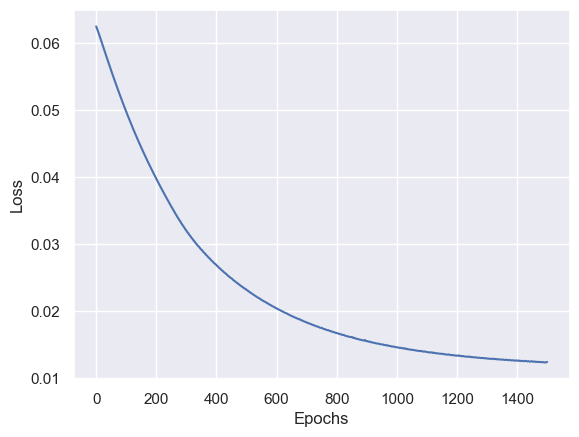

In [44]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

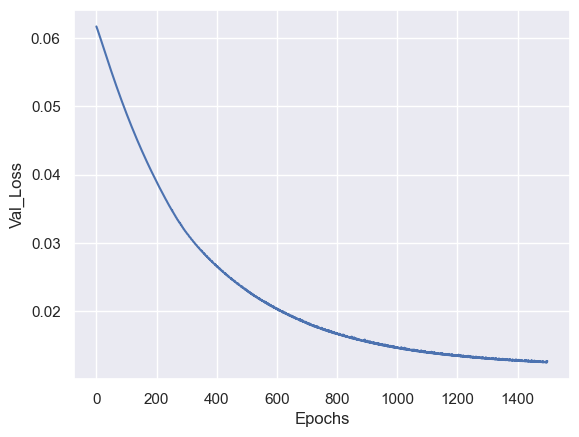

In [45]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [49]:
#modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CFE-Dwarfs.h5


In [50]:
predCFE = modelCFE.predict(X_test)

15/15 [==============================] - 0s 7ms/step


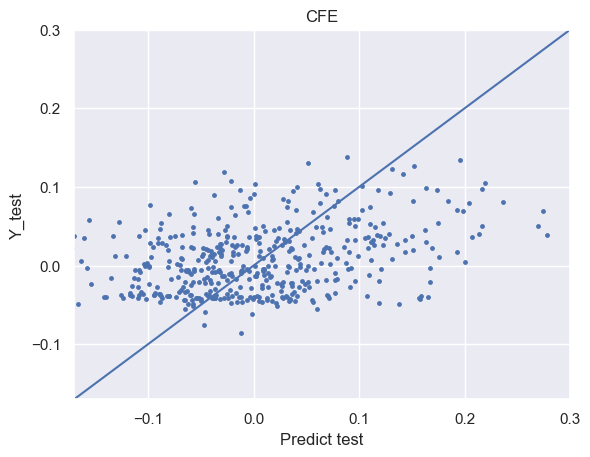

In [51]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [52]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 4.0%


In [53]:
Y_test['CFE_predict'] = predCFE

In [54]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0006_0031340  6067.8300  4.276641 -0.572270  0.044420   
iDR4_3_STRIPE82-0127_0034876  5949.8525  4.286202  0.119770 -0.033549   
iDR4_3_SPLUS-n01s21_0037937   5631.6450  4.482069 -0.313950  0.039358   
iDR4_3_MC0027_0111940         5972.2070  4.303142 -0.021939  0.022843   
iDR4_3_SPLUS-s45s28_0015514   5204.5957  4.488423 -0.027829  0.033704   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173  5705.2220  4.462307 -0.244460  0.012823   
iDR4_3_SPLUS-s45s29_0018570   5578.7880  4.437919 -0.013044 -0.008293   
iDR4_3_SPLUS-n01s25_0006878   5427.1120  4.505870 -0.149470  0.012845   
iDR4_3_SPLUS-n05s43_0015951   5503.1665  4.352323  0.102820  0.006785   
iDR4_3_STRIPE82-0109_0011474  5686.2140  4.485206 -0.368510  0.102693   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0006_0031340  0.163360 -0.217014  0.827450  0.001670   
iDR4_3_STRIPE82-0127_0034876 -0.177170 -0.161523  0.184340  0.012490   
iDR4_3_SPLUS-n01s21_0037937  -0.059392 -0.058840  0.037087  0.009060   
iDR4_3_MC0027_0111940        -0.163395  0.020317  0.342305  0.013630   
iDR4_3_SPLUS-s45s28_0015514  -0.047871  0.105029 -0.117047  0.049347   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173 -0.012513  0.179946  0.166890 -0.018730   
iDR4_3_SPLUS-s45s29_0018570  -0.095363  0.022837  0.322617  0.005522   
iDR4_3_SPLUS-n01s25_0006878   0.131590  0.043420 -0.023037 -0.016260   
iDR4_3_SPLUS-n05s43_0015951  -0.125291 -0.004833 -0.091659 -0.003120   
iDR4_3_STRIPE82-0109_0011474  0.089403  0.054316  0.079354  0.001190   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  
ID                                                                            
iDR4_3_STRIPE82-0006_0031340  0.106442  0.065177       0.081636     0.098733  
iDR4_3_STRIPE82-0127_0034876 -0.050481  0.045387       0.022060    -0.020392  
iDR4_3_SPLUS-n01s21_0037937   0.074532  0.076224       0.111641     0.073084  
iDR4_3_MC0027_0111940         0.069163  0.067362       0.036209     0.005554  
iDR4_3_SPLUS-s45s28_0015514   0.038278  0.093525       0.070635     0.021791  
...                                ...       ...            ...          ...  
iDR4_3_STRIPE82-0062_0003173  0.024349 -0.035344       0.116512     0.095890  
iDR4_3_SPLUS-s45s29_0018570   0.030742  0.010100       0.087328     0.023446  
iDR4_3_SPLUS-n01s25_0006878   0.042230 -0.024407       0.041278     0.008810  
iDR4_3_SPLUS-n05s43_0015951   0.043551  0.057482       0.005428    -0.037335  
iDR4_3_STRIPE82-0109_0011474  0.179288  0.136342       0.036529    -0.004231  

[475 rows x 12 columns]

In [55]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [56]:
Parametro = "CAFE"
columnTrain = 'CA_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [57]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0056_0002977  5199.6780  4.428120 -0.275540  0.017459   
iDR4_3_SPLUS-s46s28_0019695   5707.6553  4.472859 -0.014022  0.002069   
iDR4_3_STRIPE82-0059_0009340  5701.7220  4.225607  0.189460 -0.016357   
iDR4_3_SPLUS-s46s29_0021041   5748.9917  4.130580  0.076617  0.012774   
iDR4_3_STRIPE82-0082_0035840  5894.9040  4.188672 -0.142460 -0.041411   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   5408.0050  4.294715 -0.618060  0.198015   
iDR4_3_STRIPE82-0057_0020420  5938.7285  4.371747 -0.010298 -0.005190   
iDR4_3_STRIPE82-0064_0059171  6064.0310  4.301616 -0.099468 -0.020511   
iDR4_3_STRIPE82-0077_0032351  5540.1020  4.523918 -0.341590  0.034730   
iDR4_3_STRIPE82-0042_0030593  5723.9680  4.287941 -0.198820  0.183875   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0056_0002977 -0.009099  0.103566 -0.428700 -0.049610   
iDR4_3_SPLUS-s46s28_0019695  -0.069564 -0.032907 -0.033736 -0.011833   
iDR4_3_STRIPE82-0059_0009340 -0.066271  0.026027  0.188550  0.055630   
iDR4_3_SPLUS-s46s29_0021041  -0.042610 -0.048777  0.222741  0.075433   
iDR4_3_STRIPE82-0082_0035840 -0.023313 -0.005546  0.120000  0.059153   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   0.307170  0.275156 -0.091830  0.003740   
iDR4_3_STRIPE82-0057_0020420 -0.065952  0.014349  0.143061  0.011194   
iDR4_3_STRIPE82-0064_0059171 -0.034613 -0.043535  0.319788  0.030345   
iDR4_3_STRIPE82-0077_0032351 -0.069185  0.018762 -0.080368  0.009440   
iDR4_3_STRIPE82-0042_0030593  0.059389  0.134626  0.057430  0.100000   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_STRIPE82-0056_0002977 -0.008161 -0.035887  
iDR4_3_SPLUS-s46s28_0019695   0.016848  0.042311  
iDR4_3_STRIPE82-0059_0009340  0.018397  0.047868  
iDR4_3_SPLUS-s46s29_0021041   0.023817  0.101271  
iDR4_3_STRIPE82-0082_0035840 -0.060911  0.065788  
...                                ...       ...  
iDR4_3_SPLUS-n01s23_0028657   0.240178  0.207523  
iDR4_3_STRIPE82-0057_0020420  0.006452  0.021927  
iDR4_3_STRIPE82-0064_0059171  0.000897  0.069945  
iDR4_3_STRIPE82-0077_0032351  0.066759  0.062687  
iDR4_3_STRIPE82-0042_0030593  0.312068  0.181903  

[1709 rows x 10 columns]

In [58]:
modelCAFE = baseline_model_teste()

In [59]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 1200, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200
1/1 - 1s - loss: 0.0602 - val_loss: 0.0590 - 627ms/epoch - 627ms/step
Epoch 2/1200
1/1 - 0s - loss: 0.0601 - val_loss: 0.0589 - 115ms/epoch - 115ms/step
Epoch 3/1200
1/1 - 0s - loss: 0.0600 - val_loss: 0.0587 - 66ms/epoch - 66ms/step
Epoch 4/1200
1/1 - 0s - loss: 0.0598 - val_loss: 0.0586 - 60ms/epoch - 60ms/step
Epoch 5/1200
1/1 - 0s - loss: 0.0597 - val_loss: 0.0585 - 53ms/epoch - 53ms/step
Epoch 6/1200
1/1 - 0s - loss: 0.0596 - val_loss: 0.0584 - 53ms/epoch - 53ms/step
Epoch 7/1200
1/1 - 0s - loss: 0.0594 - val_loss: 0.0582 - 54ms/epoch - 54ms/step
Epoch 8/1200
1/1 - 0s - loss: 0.0593 - val_loss: 0.0581 - 46ms/epoch - 46ms/step
Epoch 9/1200
1/1 - 0s - loss: 0.0592 - val_loss: 0.0580 - 43ms/epoch - 43ms/step
Epoch 10/1200
1/1 - 0s - loss: 0.0591 - val_loss: 0.0579 - 56ms/epoch - 56ms/step
Epoch 11/1200
1/1 - 0s - loss: 0.0589 - val_loss: 0.0577 - 45ms/epoch - 45ms/step
Epoch 12/1200
1/1 - 0s - loss: 0.0588 - val_loss: 0.0576 - 48ms/epoch - 48ms/step
Epoch 13/1200
1/1 - 0

Epoch 101/1200
1/1 - 0s - loss: 0.0476 - val_loss: 0.0464 - 38ms/epoch - 38ms/step
Epoch 102/1200
1/1 - 0s - loss: 0.0475 - val_loss: 0.0463 - 36ms/epoch - 36ms/step
Epoch 103/1200
1/1 - 0s - loss: 0.0474 - val_loss: 0.0462 - 36ms/epoch - 36ms/step
Epoch 104/1200
1/1 - 0s - loss: 0.0473 - val_loss: 0.0461 - 35ms/epoch - 35ms/step
Epoch 105/1200
1/1 - 0s - loss: 0.0472 - val_loss: 0.0460 - 40ms/epoch - 40ms/step
Epoch 106/1200
1/1 - 0s - loss: 0.0470 - val_loss: 0.0459 - 38ms/epoch - 38ms/step
Epoch 107/1200
1/1 - 0s - loss: 0.0469 - val_loss: 0.0458 - 38ms/epoch - 38ms/step
Epoch 108/1200
1/1 - 0s - loss: 0.0468 - val_loss: 0.0456 - 38ms/epoch - 38ms/step
Epoch 109/1200
1/1 - 0s - loss: 0.0467 - val_loss: 0.0455 - 37ms/epoch - 37ms/step
Epoch 110/1200
1/1 - 0s - loss: 0.0466 - val_loss: 0.0454 - 38ms/epoch - 38ms/step
Epoch 111/1200
1/1 - 0s - loss: 0.0465 - val_loss: 0.0453 - 37ms/epoch - 37ms/step
Epoch 112/1200
1/1 - 0s - loss: 0.0464 - val_loss: 0.0452 - 41ms/epoch - 41ms/step
Epoc

Epoch 200/1200
1/1 - 0s - loss: 0.0376 - val_loss: 0.0365 - 58ms/epoch - 58ms/step
Epoch 201/1200
1/1 - 0s - loss: 0.0375 - val_loss: 0.0365 - 41ms/epoch - 41ms/step
Epoch 202/1200
1/1 - 0s - loss: 0.0374 - val_loss: 0.0364 - 69ms/epoch - 69ms/step
Epoch 203/1200
1/1 - 0s - loss: 0.0373 - val_loss: 0.0363 - 44ms/epoch - 44ms/step
Epoch 204/1200
1/1 - 0s - loss: 0.0372 - val_loss: 0.0362 - 69ms/epoch - 69ms/step
Epoch 205/1200
1/1 - 0s - loss: 0.0371 - val_loss: 0.0361 - 51ms/epoch - 51ms/step
Epoch 206/1200
1/1 - 0s - loss: 0.0370 - val_loss: 0.0360 - 69ms/epoch - 69ms/step
Epoch 207/1200
1/1 - 0s - loss: 0.0369 - val_loss: 0.0359 - 42ms/epoch - 42ms/step
Epoch 208/1200
1/1 - 0s - loss: 0.0368 - val_loss: 0.0358 - 69ms/epoch - 69ms/step
Epoch 209/1200
1/1 - 0s - loss: 0.0368 - val_loss: 0.0357 - 38ms/epoch - 38ms/step
Epoch 210/1200
1/1 - 0s - loss: 0.0367 - val_loss: 0.0357 - 65ms/epoch - 65ms/step
Epoch 211/1200
1/1 - 0s - loss: 0.0366 - val_loss: 0.0356 - 45ms/epoch - 45ms/step
Epoc

Epoch 299/1200
1/1 - 0s - loss: 0.0297 - val_loss: 0.0293 - 43ms/epoch - 43ms/step
Epoch 300/1200
1/1 - 0s - loss: 0.0296 - val_loss: 0.0292 - 39ms/epoch - 39ms/step
Epoch 301/1200
1/1 - 0s - loss: 0.0295 - val_loss: 0.0292 - 44ms/epoch - 44ms/step
Epoch 302/1200
1/1 - 0s - loss: 0.0295 - val_loss: 0.0291 - 41ms/epoch - 41ms/step
Epoch 303/1200
1/1 - 0s - loss: 0.0294 - val_loss: 0.0291 - 39ms/epoch - 39ms/step
Epoch 304/1200
1/1 - 0s - loss: 0.0294 - val_loss: 0.0291 - 44ms/epoch - 44ms/step
Epoch 305/1200
1/1 - 0s - loss: 0.0293 - val_loss: 0.0290 - 44ms/epoch - 44ms/step
Epoch 306/1200
1/1 - 0s - loss: 0.0293 - val_loss: 0.0289 - 43ms/epoch - 43ms/step
Epoch 307/1200
1/1 - 0s - loss: 0.0292 - val_loss: 0.0288 - 46ms/epoch - 46ms/step
Epoch 308/1200
1/1 - 0s - loss: 0.0291 - val_loss: 0.0288 - 45ms/epoch - 45ms/step
Epoch 309/1200
1/1 - 0s - loss: 0.0291 - val_loss: 0.0288 - 44ms/epoch - 44ms/step
Epoch 310/1200
1/1 - 0s - loss: 0.0290 - val_loss: 0.0287 - 40ms/epoch - 40ms/step
Epoc

Epoch 398/1200
1/1 - 0s - loss: 0.0247 - val_loss: 0.0245 - 45ms/epoch - 45ms/step
Epoch 399/1200
1/1 - 0s - loss: 0.0246 - val_loss: 0.0245 - 44ms/epoch - 44ms/step
Epoch 400/1200
1/1 - 0s - loss: 0.0246 - val_loss: 0.0244 - 45ms/epoch - 45ms/step
Epoch 401/1200
1/1 - 0s - loss: 0.0245 - val_loss: 0.0244 - 44ms/epoch - 44ms/step
Epoch 402/1200
1/1 - 0s - loss: 0.0245 - val_loss: 0.0243 - 46ms/epoch - 46ms/step
Epoch 403/1200
1/1 - 0s - loss: 0.0244 - val_loss: 0.0243 - 46ms/epoch - 46ms/step
Epoch 404/1200
1/1 - 0s - loss: 0.0244 - val_loss: 0.0242 - 44ms/epoch - 44ms/step
Epoch 405/1200
1/1 - 0s - loss: 0.0244 - val_loss: 0.0242 - 46ms/epoch - 46ms/step
Epoch 406/1200
1/1 - 0s - loss: 0.0243 - val_loss: 0.0241 - 38ms/epoch - 38ms/step
Epoch 407/1200
1/1 - 0s - loss: 0.0243 - val_loss: 0.0242 - 44ms/epoch - 44ms/step
Epoch 408/1200
1/1 - 0s - loss: 0.0242 - val_loss: 0.0241 - 47ms/epoch - 47ms/step
Epoch 409/1200
1/1 - 0s - loss: 0.0242 - val_loss: 0.0241 - 41ms/epoch - 41ms/step
Epoc

Epoch 497/1200
1/1 - 0s - loss: 0.0209 - val_loss: 0.0208 - 44ms/epoch - 44ms/step
Epoch 498/1200
1/1 - 0s - loss: 0.0209 - val_loss: 0.0208 - 42ms/epoch - 42ms/step
Epoch 499/1200
1/1 - 0s - loss: 0.0209 - val_loss: 0.0208 - 44ms/epoch - 44ms/step
Epoch 500/1200
1/1 - 0s - loss: 0.0208 - val_loss: 0.0207 - 46ms/epoch - 46ms/step
Epoch 501/1200
1/1 - 0s - loss: 0.0208 - val_loss: 0.0207 - 52ms/epoch - 52ms/step
Epoch 502/1200
1/1 - 0s - loss: 0.0208 - val_loss: 0.0206 - 44ms/epoch - 44ms/step
Epoch 503/1200
1/1 - 0s - loss: 0.0208 - val_loss: 0.0207 - 48ms/epoch - 48ms/step
Epoch 504/1200
1/1 - 0s - loss: 0.0207 - val_loss: 0.0206 - 54ms/epoch - 54ms/step
Epoch 505/1200
1/1 - 0s - loss: 0.0207 - val_loss: 0.0206 - 42ms/epoch - 42ms/step
Epoch 506/1200
1/1 - 0s - loss: 0.0206 - val_loss: 0.0205 - 45ms/epoch - 45ms/step
Epoch 507/1200
1/1 - 0s - loss: 0.0206 - val_loss: 0.0205 - 46ms/epoch - 46ms/step
Epoch 508/1200
1/1 - 0s - loss: 0.0206 - val_loss: 0.0205 - 41ms/epoch - 41ms/step
Epoc

Epoch 596/1200
1/1 - 0s - loss: 0.0181 - val_loss: 0.0180 - 36ms/epoch - 36ms/step
Epoch 597/1200
1/1 - 0s - loss: 0.0181 - val_loss: 0.0180 - 36ms/epoch - 36ms/step
Epoch 598/1200
1/1 - 0s - loss: 0.0181 - val_loss: 0.0180 - 35ms/epoch - 35ms/step
Epoch 599/1200
1/1 - 0s - loss: 0.0180 - val_loss: 0.0179 - 37ms/epoch - 37ms/step
Epoch 600/1200
1/1 - 0s - loss: 0.0180 - val_loss: 0.0179 - 36ms/epoch - 36ms/step
Epoch 601/1200
1/1 - 0s - loss: 0.0180 - val_loss: 0.0179 - 36ms/epoch - 36ms/step
Epoch 602/1200
1/1 - 0s - loss: 0.0180 - val_loss: 0.0178 - 37ms/epoch - 37ms/step
Epoch 603/1200
1/1 - 0s - loss: 0.0180 - val_loss: 0.0179 - 36ms/epoch - 36ms/step
Epoch 604/1200
1/1 - 0s - loss: 0.0179 - val_loss: 0.0178 - 36ms/epoch - 36ms/step
Epoch 605/1200
1/1 - 0s - loss: 0.0179 - val_loss: 0.0178 - 36ms/epoch - 36ms/step
Epoch 606/1200
1/1 - 0s - loss: 0.0179 - val_loss: 0.0178 - 38ms/epoch - 38ms/step
Epoch 607/1200
1/1 - 0s - loss: 0.0178 - val_loss: 0.0178 - 35ms/epoch - 35ms/step
Epoc

Epoch 695/1200
1/1 - 0s - loss: 0.0160 - val_loss: 0.0158 - 43ms/epoch - 43ms/step
Epoch 696/1200
1/1 - 0s - loss: 0.0159 - val_loss: 0.0158 - 43ms/epoch - 43ms/step
Epoch 697/1200
1/1 - 0s - loss: 0.0159 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 698/1200
1/1 - 0s - loss: 0.0159 - val_loss: 0.0158 - 41ms/epoch - 41ms/step
Epoch 699/1200
1/1 - 0s - loss: 0.0159 - val_loss: 0.0158 - 41ms/epoch - 41ms/step
Epoch 700/1200
1/1 - 0s - loss: 0.0158 - val_loss: 0.0157 - 44ms/epoch - 44ms/step
Epoch 701/1200
1/1 - 0s - loss: 0.0158 - val_loss: 0.0158 - 45ms/epoch - 45ms/step
Epoch 702/1200
1/1 - 0s - loss: 0.0158 - val_loss: 0.0157 - 43ms/epoch - 43ms/step
Epoch 703/1200
1/1 - 0s - loss: 0.0158 - val_loss: 0.0157 - 45ms/epoch - 45ms/step
Epoch 704/1200
1/1 - 0s - loss: 0.0158 - val_loss: 0.0156 - 43ms/epoch - 43ms/step
Epoch 705/1200
1/1 - 0s - loss: 0.0158 - val_loss: 0.0156 - 46ms/epoch - 46ms/step
Epoch 706/1200
1/1 - 0s - loss: 0.0157 - val_loss: 0.0156 - 50ms/epoch - 50ms/step
Epoc

Epoch 794/1200
1/1 - 0s - loss: 0.0143 - val_loss: 0.0143 - 42ms/epoch - 42ms/step
Epoch 795/1200
1/1 - 0s - loss: 0.0143 - val_loss: 0.0142 - 44ms/epoch - 44ms/step
Epoch 796/1200
1/1 - 0s - loss: 0.0143 - val_loss: 0.0143 - 43ms/epoch - 43ms/step
Epoch 797/1200
1/1 - 0s - loss: 0.0143 - val_loss: 0.0142 - 44ms/epoch - 44ms/step
Epoch 798/1200
1/1 - 0s - loss: 0.0143 - val_loss: 0.0143 - 42ms/epoch - 42ms/step
Epoch 799/1200
1/1 - 0s - loss: 0.0143 - val_loss: 0.0142 - 41ms/epoch - 41ms/step
Epoch 800/1200
1/1 - 0s - loss: 0.0142 - val_loss: 0.0142 - 42ms/epoch - 42ms/step
Epoch 801/1200
1/1 - 0s - loss: 0.0142 - val_loss: 0.0142 - 52ms/epoch - 52ms/step
Epoch 802/1200
1/1 - 0s - loss: 0.0142 - val_loss: 0.0142 - 46ms/epoch - 46ms/step
Epoch 803/1200
1/1 - 0s - loss: 0.0142 - val_loss: 0.0142 - 44ms/epoch - 44ms/step
Epoch 804/1200
1/1 - 0s - loss: 0.0142 - val_loss: 0.0141 - 46ms/epoch - 46ms/step
Epoch 805/1200
1/1 - 0s - loss: 0.0142 - val_loss: 0.0141 - 48ms/epoch - 48ms/step
Epoc

Epoch 893/1200
1/1 - 0s - loss: 0.0131 - val_loss: 0.0130 - 43ms/epoch - 43ms/step
Epoch 894/1200
1/1 - 0s - loss: 0.0131 - val_loss: 0.0131 - 42ms/epoch - 42ms/step
Epoch 895/1200
1/1 - 0s - loss: 0.0131 - val_loss: 0.0130 - 42ms/epoch - 42ms/step
Epoch 896/1200
1/1 - 0s - loss: 0.0131 - val_loss: 0.0131 - 43ms/epoch - 43ms/step
Epoch 897/1200
1/1 - 0s - loss: 0.0131 - val_loss: 0.0130 - 40ms/epoch - 40ms/step
Epoch 898/1200
1/1 - 0s - loss: 0.0130 - val_loss: 0.0131 - 45ms/epoch - 45ms/step
Epoch 899/1200
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 39ms/epoch - 39ms/step
Epoch 900/1200
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 41ms/epoch - 41ms/step
Epoch 901/1200
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 41ms/epoch - 41ms/step
Epoch 902/1200
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 40ms/epoch - 40ms/step
Epoch 903/1200
1/1 - 0s - loss: 0.0130 - val_loss: 0.0130 - 43ms/epoch - 43ms/step
Epoch 904/1200
1/1 - 0s - loss: 0.0129 - val_loss: 0.0129 - 43ms/epoch - 43ms/step
Epoc

Epoch 992/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0121 - 45ms/epoch - 45ms/step
Epoch 993/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0122 - 42ms/epoch - 42ms/step
Epoch 994/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0121 - 45ms/epoch - 45ms/step
Epoch 995/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0121 - 43ms/epoch - 43ms/step
Epoch 996/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0121 - 43ms/epoch - 43ms/step
Epoch 997/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0121 - 46ms/epoch - 46ms/step
Epoch 998/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0121 - 44ms/epoch - 44ms/step
Epoch 999/1200
1/1 - 0s - loss: 0.0121 - val_loss: 0.0121 - 44ms/epoch - 44ms/step
Epoch 1000/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 44ms/epoch - 44ms/step
Epoch 1001/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0120 - 44ms/epoch - 44ms/step
Epoch 1002/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0121 - 51ms/epoch - 51ms/step
Epoch 1003/1200
1/1 - 0s - loss: 0.0120 - val_loss: 0.0120 - 43ms/epoch - 43ms/step


Epoch 1090/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0115 - 36ms/epoch - 36ms/step
Epoch 1091/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0114 - 37ms/epoch - 37ms/step
Epoch 1092/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0115 - 37ms/epoch - 37ms/step
Epoch 1093/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0114 - 39ms/epoch - 39ms/step
Epoch 1094/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0115 - 39ms/epoch - 39ms/step
Epoch 1095/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0114 - 38ms/epoch - 38ms/step
Epoch 1096/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0114 - 35ms/epoch - 35ms/step
Epoch 1097/1200
1/1 - 0s - loss: 0.0114 - val_loss: 0.0114 - 37ms/epoch - 37ms/step
Epoch 1098/1200
1/1 - 0s - loss: 0.0113 - val_loss: 0.0114 - 36ms/epoch - 36ms/step
Epoch 1099/1200
1/1 - 0s - loss: 0.0113 - val_loss: 0.0114 - 36ms/epoch - 36ms/step
Epoch 1100/1200
1/1 - 0s - loss: 0.0113 - val_loss: 0.0114 - 41ms/epoch - 41ms/step
Epoch 1101/1200
1/1 - 0s - loss: 0.0113 - val_loss: 0.0114 - 40ms/epoch - 40

Epoch 1188/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0109 - 43ms/epoch - 43ms/step
Epoch 1189/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0109 - 47ms/epoch - 47ms/step
Epoch 1190/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0109 - 41ms/epoch - 41ms/step
Epoch 1191/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0109 - 46ms/epoch - 46ms/step
Epoch 1192/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0109 - 45ms/epoch - 45ms/step
Epoch 1193/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0108 - 44ms/epoch - 44ms/step
Epoch 1194/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0109 - 40ms/epoch - 40ms/step
Epoch 1195/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0108 - 48ms/epoch - 48ms/step
Epoch 1196/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0109 - 45ms/epoch - 45ms/step
Epoch 1197/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0108 - 45ms/epoch - 45ms/step
Epoch 1198/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0110 - 43ms/epoch - 43ms/step
Epoch 1199/1200
1/1 - 0s - loss: 0.0108 - val_loss: 0.0108 - 40ms/epoch - 40

Text(0, 0.5, 'Loss')

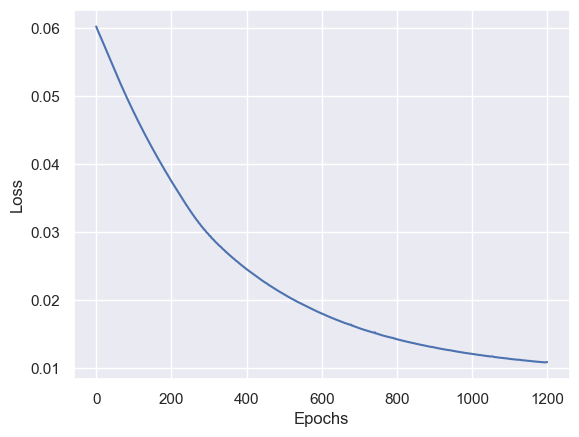

In [60]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

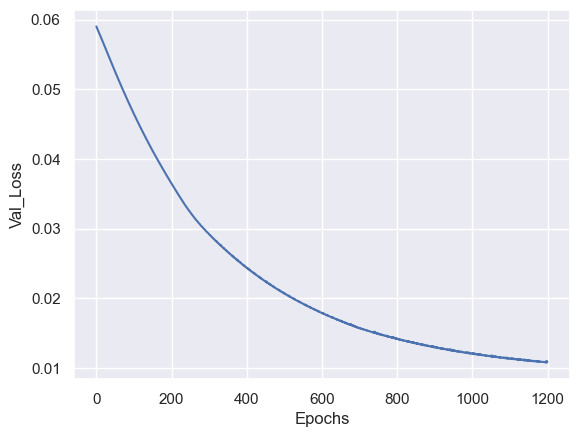

In [61]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [62]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CAFE-Dwarfs.h5


In [63]:
predCAFE = modelCAFE.predict(X_test)

15/15 [==============================] - 0s 2ms/step


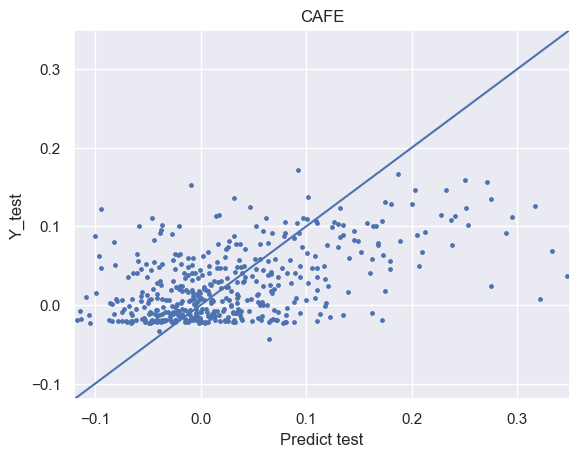

In [64]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [65]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 16.0%


In [66]:
Y_test['CAFE_predict'] = predCAFE

In [67]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0006_0031340  6067.8300  4.276641 -0.572270  0.044420   
iDR4_3_STRIPE82-0127_0034876  5949.8525  4.286202  0.119770 -0.033549   
iDR4_3_SPLUS-n01s21_0037937   5631.6450  4.482069 -0.313950  0.039358   
iDR4_3_MC0027_0111940         5972.2070  4.303142 -0.021939  0.022843   
iDR4_3_SPLUS-s45s28_0015514   5204.5957  4.488423 -0.027829  0.033704   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173  5705.2220  4.462307 -0.244460  0.012823   
iDR4_3_SPLUS-s45s29_0018570   5578.7880  4.437919 -0.013044 -0.008293   
iDR4_3_SPLUS-n01s25_0006878   5427.1120  4.505870 -0.149470  0.012845   
iDR4_3_SPLUS-n05s43_0015951   5503.1665  4.352323  0.102820  0.006785   
iDR4_3_STRIPE82-0109_0011474  5686.2140  4.485206 -0.368510  0.102693   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0006_0031340  0.163360 -0.217014  0.827450  0.001670   
iDR4_3_STRIPE82-0127_0034876 -0.177170 -0.161523  0.184340  0.012490   
iDR4_3_SPLUS-n01s21_0037937  -0.059392 -0.058840  0.037087  0.009060   
iDR4_3_MC0027_0111940        -0.163395  0.020317  0.342305  0.013630   
iDR4_3_SPLUS-s45s28_0015514  -0.047871  0.105029 -0.117047  0.049347   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173 -0.012513  0.179946  0.166890 -0.018730   
iDR4_3_SPLUS-s45s29_0018570  -0.095363  0.022837  0.322617  0.005522   
iDR4_3_SPLUS-n01s25_0006878   0.131590  0.043420 -0.023037 -0.016260   
iDR4_3_SPLUS-n05s43_0015951  -0.125291 -0.004833 -0.091659 -0.003120   
iDR4_3_STRIPE82-0109_0011474  0.089403  0.054316  0.079354  0.001190   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0006_0031340  0.106442  0.065177       0.081636     0.098733   
iDR4_3_STRIPE82-0127_0034876 -0.050481  0.045387       0.022060    -0.020392   
iDR4_3_SPLUS-n01s21_0037937   0.074532  0.076224       0.111641     0.073084   
iDR4_3_MC0027_0111940         0.069163  0.067362       0.036209     0.005554   
iDR4_3_SPLUS-s45s28_0015514   0.038278  0.093525       0.070635     0.021791   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0062_0003173  0.024349 -0.035344       0.116512     0.095890   
iDR4_3_SPLUS-s45s29_0018570   0.030742  0.010100       0.087328     0.023446   
iDR4_3_SPLUS-n01s25_0006878   0.042230 -0.024407       0.041278     0.008810   
iDR4_3_SPLUS-n05s43_0015951   0.043551  0.057482       0.005428    -0.037335   
iDR4_3_STRIPE82-0109_0011474  0.179288  0.136342       0.036529    -0.004231   

                              CAFE_predict  
ID                                          
iDR4_3_STRIPE82-0006_0031340      0.057090  
iDR4_3_STRIPE82-0127_0034876     -0.001575  
iDR4_3_SPLUS-n01s21_0037937       0.100813  
iDR4_3_MC0027_0111940             0.005147  
iDR4_3_SPLUS-s45s28_0015514       0.047438  
...                                    ...  
iDR4_3_STRIPE82-0062_0003173      0.127711  
iDR4_3_SPLUS-s45s29_0018570       0.060627  
iDR4_3_SPLUS-n01s25_0006878       0.005617  
iDR4_3_SPLUS-n05s43_0015951      -0.019757  
iDR4_3_STRIPE82-0109_0011474      0.003799  

[475 rows x 13 columns]

In [68]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [69]:
Parametro = "NFE"
columnTrain = 'N_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [70]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0056_0002977  5199.6780  4.428120 -0.275540  0.017459   
iDR4_3_SPLUS-s46s28_0019695   5707.6553  4.472859 -0.014022  0.002069   
iDR4_3_STRIPE82-0059_0009340  5701.7220  4.225607  0.189460 -0.016357   
iDR4_3_SPLUS-s46s29_0021041   5748.9917  4.130580  0.076617  0.012774   
iDR4_3_STRIPE82-0082_0035840  5894.9040  4.188672 -0.142460 -0.041411   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   5408.0050  4.294715 -0.618060  0.198015   
iDR4_3_STRIPE82-0057_0020420  5938.7285  4.371747 -0.010298 -0.005190   
iDR4_3_STRIPE82-0064_0059171  6064.0310  4.301616 -0.099468 -0.020511   
iDR4_3_STRIPE82-0077_0032351  5540.1020  4.523918 -0.341590  0.034730   
iDR4_3_STRIPE82-0042_0030593  5723.9680  4.287941 -0.198820  0.183875   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0056_0002977 -0.009099  0.103566 -0.428700 -0.049610   
iDR4_3_SPLUS-s46s28_0019695  -0.069564 -0.032907 -0.033736 -0.011833   
iDR4_3_STRIPE82-0059_0009340 -0.066271  0.026027  0.188550  0.055630   
iDR4_3_SPLUS-s46s29_0021041  -0.042610 -0.048777  0.222741  0.075433   
iDR4_3_STRIPE82-0082_0035840 -0.023313 -0.005546  0.120000  0.059153   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   0.307170  0.275156 -0.091830  0.003740   
iDR4_3_STRIPE82-0057_0020420 -0.065952  0.014349  0.143061  0.011194   
iDR4_3_STRIPE82-0064_0059171 -0.034613 -0.043535  0.319788  0.030345   
iDR4_3_STRIPE82-0077_0032351 -0.069185  0.018762 -0.080368  0.009440   
iDR4_3_STRIPE82-0042_0030593  0.059389  0.134626  0.057430  0.100000   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_STRIPE82-0056_0002977 -0.008161 -0.035887  
iDR4_3_SPLUS-s46s28_0019695   0.016848  0.042311  
iDR4_3_STRIPE82-0059_0009340  0.018397  0.047868  
iDR4_3_SPLUS-s46s29_0021041   0.023817  0.101271  
iDR4_3_STRIPE82-0082_0035840 -0.060911  0.065788  
...                                ...       ...  
iDR4_3_SPLUS-n01s23_0028657   0.240178  0.207523  
iDR4_3_STRIPE82-0057_0020420  0.006452  0.021927  
iDR4_3_STRIPE82-0064_0059171  0.000897  0.069945  
iDR4_3_STRIPE82-0077_0032351  0.066759  0.062687  
iDR4_3_STRIPE82-0042_0030593  0.312068  0.181903  

[1709 rows x 10 columns]

In [71]:
modelNFE = baseline_model_teste()

In [72]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.1103 - val_loss: 0.1134 - 560ms/epoch - 560ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.1098 - val_loss: 0.1129 - 47ms/epoch - 47ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1094 - val_loss: 0.1125 - 45ms/epoch - 45ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1090 - val_loss: 0.1121 - 54ms/epoch - 54ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1087 - val_loss: 0.1117 - 53ms/epoch - 53ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1084 - val_loss: 0.1114 - 48ms/epoch - 48ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1081 - val_loss: 0.1110 - 54ms/epoch - 54ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1078 - val_loss: 0.1107 - 42ms/epoch - 42ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1076 - val_loss: 0.1103 - 46ms/epoch - 46ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1073 - val_loss: 0.1100 - 42ms/epoch - 42ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1070 - val_loss: 0.1097 - 45ms/epoch - 45ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1067 - val_loss: 0.1093 - 49ms/epoch - 49ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0954 - val_loss: 0.0971 - 36ms/epoch - 36ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0953 - val_loss: 0.0970 - 37ms/epoch - 37ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0952 - val_loss: 0.0969 - 36ms/epoch - 36ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0951 - val_loss: 0.0968 - 43ms/epoch - 43ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0950 - val_loss: 0.0967 - 39ms/epoch - 39ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0949 - val_loss: 0.0966 - 36ms/epoch - 36ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0948 - val_loss: 0.0965 - 39ms/epoch - 39ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0947 - val_loss: 0.0964 - 37ms/epoch - 37ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0946 - val_loss: 0.0963 - 38ms/epoch - 38ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0944 - val_loss: 0.0962 - 37ms/epoch - 37ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0943 - val_loss: 0.0961 - 39ms/epoch - 39ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0942 - val_loss: 0.0960 - 36ms/epoch - 36ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0858 - val_loss: 0.0873 - 48ms/epoch - 48ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0857 - val_loss: 0.0872 - 44ms/epoch - 44ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0856 - val_loss: 0.0871 - 43ms/epoch - 43ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0855 - val_loss: 0.0870 - 41ms/epoch - 41ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0854 - val_loss: 0.0869 - 45ms/epoch - 45ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0853 - val_loss: 0.0868 - 51ms/epoch - 51ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0853 - val_loss: 0.0867 - 47ms/epoch - 47ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0852 - val_loss: 0.0866 - 47ms/epoch - 47ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0851 - val_loss: 0.0865 - 42ms/epoch - 42ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0850 - val_loss: 0.0864 - 43ms/epoch - 43ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0849 - val_loss: 0.0863 - 42ms/epoch - 42ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0848 - val_loss: 0.0862 - 45ms/epoch - 45ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0766 - val_loss: 0.0781 - 39ms/epoch - 39ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0765 - val_loss: 0.0781 - 66ms/epoch - 66ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0764 - val_loss: 0.0782 - 50ms/epoch - 50ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0764 - val_loss: 0.0778 - 68ms/epoch - 68ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0763 - val_loss: 0.0782 - 44ms/epoch - 44ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0763 - val_loss: 0.0777 - 69ms/epoch - 69ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0762 - val_loss: 0.0777 - 44ms/epoch - 44ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0761 - val_loss: 0.0779 - 44ms/epoch - 44ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0760 - val_loss: 0.0774 - 45ms/epoch - 45ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0760 - val_loss: 0.0779 - 41ms/epoch - 41ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0759 - val_loss: 0.0774 - 46ms/epoch - 46ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0758 - val_loss: 0.0774 - 47ms/epoch - 47ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0704 - val_loss: 0.0725 - 42ms/epoch - 42ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0703 - val_loss: 0.0720 - 42ms/epoch - 42ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0703 - val_loss: 0.0721 - 41ms/epoch - 41ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0702 - val_loss: 0.0722 - 42ms/epoch - 42ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0701 - val_loss: 0.0718 - 42ms/epoch - 42ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0701 - val_loss: 0.0724 - 44ms/epoch - 44ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0701 - val_loss: 0.0716 - 43ms/epoch - 43ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0701 - val_loss: 0.0722 - 47ms/epoch - 47ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0700 - val_loss: 0.0715 - 42ms/epoch - 42ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0699 - val_loss: 0.0719 - 41ms/epoch - 41ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0698 - val_loss: 0.0716 - 40ms/epoch - 40ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0698 - val_loss: 0.0715 - 42ms/epoch - 42ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0659 - val_loss: 0.0675 - 43ms/epoch - 43ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0659 - val_loss: 0.0672 - 43ms/epoch - 43ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0659 - val_loss: 0.0676 - 53ms/epoch - 53ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0659 - val_loss: 0.0671 - 45ms/epoch - 45ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0659 - val_loss: 0.0676 - 41ms/epoch - 41ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0658 - val_loss: 0.0671 - 42ms/epoch - 42ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0658 - val_loss: 0.0674 - 58ms/epoch - 58ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0657 - val_loss: 0.0671 - 64ms/epoch - 64ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0656 - val_loss: 0.0671 - 54ms/epoch - 54ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0656 - val_loss: 0.0672 - 45ms/epoch - 45ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0656 - val_loss: 0.0669 - 59ms/epoch - 59ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0656 - val_loss: 0.0673 - 50ms/epoch - 50ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0630 - val_loss: 0.0641 - 39ms/epoch - 39ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0643 - 39ms/epoch - 39ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0643 - 43ms/epoch - 43ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0628 - val_loss: 0.0640 - 46ms/epoch - 46ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0646 - 41ms/epoch - 41ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0639 - 42ms/epoch - 42ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0649 - 38ms/epoch - 38ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0630 - val_loss: 0.0638 - 42ms/epoch - 42ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0630 - val_loss: 0.0648 - 40ms/epoch - 40ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0638 - 44ms/epoch - 44ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0628 - val_loss: 0.0643 - 37ms/epoch - 37ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0640 - 46ms/epoch - 46ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0609 - val_loss: 0.0623 - 37ms/epoch - 37ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0607 - val_loss: 0.0620 - 37ms/epoch - 37ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0606 - val_loss: 0.0616 - 39ms/epoch - 39ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0607 - val_loss: 0.0625 - 39ms/epoch - 39ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0608 - val_loss: 0.0615 - 36ms/epoch - 36ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0607 - val_loss: 0.0624 - 37ms/epoch - 37ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0607 - val_loss: 0.0617 - 37ms/epoch - 37ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0606 - val_loss: 0.0618 - 36ms/epoch - 36ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0605 - val_loss: 0.0620 - 35ms/epoch - 35ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0605 - val_loss: 0.0614 - 36ms/epoch - 36ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0606 - val_loss: 0.0622 - 37ms/epoch - 37ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0605 - val_loss: 0.0615 - 37ms/epoch - 37ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0590 - val_loss: 0.0608 - 36ms/epoch - 36ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0591 - val_loss: 0.0596 - 39ms/epoch - 39ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0591 - val_loss: 0.0607 - 42ms/epoch - 42ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0590 - val_loss: 0.0598 - 37ms/epoch - 37ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0601 - 40ms/epoch - 40ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0601 - 37ms/epoch - 37ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0596 - 39ms/epoch - 39ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0606 - 40ms/epoch - 40ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0590 - val_loss: 0.0596 - 36ms/epoch - 36ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0605 - 42ms/epoch - 42ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0596 - 39ms/epoch - 39ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0588 - val_loss: 0.0600 - 38ms/epoch - 38ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0586 - 39ms/epoch - 39ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0586 - 37ms/epoch - 37ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0584 - 39ms/epoch - 39ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0587 - 43ms/epoch - 43ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0583 - 43ms/epoch - 43ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0586 - 46ms/epoch - 46ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0584 - 43ms/epoch - 43ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0585 - 44ms/epoch - 44ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0585 - 40ms/epoch - 40ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0583 - 37ms/epoch - 37ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0585 - 41ms/epoch - 41ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0575 - val_loss: 0.0583 - 44ms/epoch - 44ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0569 - 51ms/epoch - 51ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0580 - 63ms/epoch - 63ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0569 - 53ms/epoch - 53ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0579 - 42ms/epoch - 42ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0566 - val_loss: 0.0571 - 43ms/epoch - 43ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0574 - 40ms/epoch - 40ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0573 - 39ms/epoch - 39ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0570 - 55ms/epoch - 55ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0575 - 46ms/epoch - 46ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0569 - 48ms/epoch - 48ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0578 - 45ms/epoch - 45ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0568 - 40ms/epoch - 40ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0560 - val_loss: 0.0559 - 44ms/epoch - 44ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0561 - val_loss: 0.0579 - 45ms/epoch - 45ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0561 - val_loss: 0.0558 - 42ms/epoch - 42ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0561 - val_loss: 0.0574 - 43ms/epoch - 43ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0559 - val_loss: 0.0558 - 41ms/epoch - 41ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0558 - val_loss: 0.0566 - 41ms/epoch - 41ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0556 - val_loss: 0.0563 - 42ms/epoch - 42ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0556 - val_loss: 0.0560 - 44ms/epoch - 44ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0556 - val_loss: 0.0569 - 43ms/epoch - 43ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0557 - val_loss: 0.0558 - 42ms/epoch - 42ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0558 - val_loss: 0.0573 - 44ms/epoch - 44ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0558 - val_loss: 0.0558 - 41ms/epoch - 41

Epoch 1188/2000
1/1 - 0s - loss: 0.0553 - val_loss: 0.0552 - 45ms/epoch - 45ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0552 - val_loss: 0.0561 - 44ms/epoch - 44ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0556 - 47ms/epoch - 47ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0552 - 44ms/epoch - 44ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0562 - 47ms/epoch - 47ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0550 - 48ms/epoch - 48ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0563 - 43ms/epoch - 43ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0553 - 44ms/epoch - 44ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0556 - 44ms/epoch - 44ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0555 - 44ms/epoch - 44ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0550 - 43ms/epoch - 43ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0560 - 44ms/epoch - 44

Epoch 1286/2000
1/1 - 0s - loss: 0.0554 - val_loss: 0.0545 - 46ms/epoch - 46ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0557 - val_loss: 0.0568 - 56ms/epoch - 56ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0550 - 42ms/epoch - 42ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0544 - val_loss: 0.0547 - 44ms/epoch - 44ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0569 - 42ms/epoch - 42ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0543 - 40ms/epoch - 40ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0556 - 43ms/epoch - 43ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0545 - val_loss: 0.0551 - 41ms/epoch - 41ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0544 - val_loss: 0.0545 - 43ms/epoch - 43ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0565 - 41ms/epoch - 41ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0545 - 43ms/epoch - 43ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0551 - 42ms/epoch - 42

Epoch 1384/2000
1/1 - 0s - loss: 0.0539 - val_loss: 0.0539 - 92ms/epoch - 92ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0541 - val_loss: 0.0556 - 41ms/epoch - 41ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0540 - 60ms/epoch - 60ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0554 - 39ms/epoch - 39ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0541 - val_loss: 0.0542 - 40ms/epoch - 40ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0539 - val_loss: 0.0545 - 58ms/epoch - 58ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0547 - 41ms/epoch - 41ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0539 - val_loss: 0.0539 - 42ms/epoch - 42ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0539 - val_loss: 0.0553 - 56ms/epoch - 56ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0540 - val_loss: 0.0540 - 48ms/epoch - 48ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0541 - val_loss: 0.0553 - 70ms/epoch - 70ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0540 - val_loss: 0.0540 - 45ms/epoch - 45

Epoch 1482/2000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0554 - 43ms/epoch - 43ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0536 - 46ms/epoch - 46ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0550 - 48ms/epoch - 48ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0537 - val_loss: 0.0535 - 42ms/epoch - 42ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0542 - 46ms/epoch - 46ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0539 - 56ms/epoch - 56ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0538 - 46ms/epoch - 46ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0545 - 42ms/epoch - 42ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0537 - 53ms/epoch - 53ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0549 - 42ms/epoch - 42ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0535 - 43ms/epoch - 43ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0550 - 42ms/epoch - 42

Epoch 1580/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0533 - 53ms/epoch - 53ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0544 - 55ms/epoch - 55ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0532 - val_loss: 0.0534 - 47ms/epoch - 47ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0538 - 44ms/epoch - 44ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0537 - 45ms/epoch - 45ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0534 - 49ms/epoch - 49ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0542 - 45ms/epoch - 45ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0532 - 44ms/epoch - 44ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0532 - val_loss: 0.0545 - 40ms/epoch - 40ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0531 - 46ms/epoch - 46ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0549 - 42ms/epoch - 42ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0534 - val_loss: 0.0531 - 42ms/epoch - 42

Epoch 1678/2000
1/1 - 0s - loss: 0.0528 - val_loss: 0.0533 - 43ms/epoch - 43ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0528 - val_loss: 0.0543 - 38ms/epoch - 38ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0531 - 45ms/epoch - 45ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0549 - 43ms/epoch - 43ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0532 - val_loss: 0.0530 - 48ms/epoch - 48ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0532 - val_loss: 0.0548 - 44ms/epoch - 44ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0530 - 51ms/epoch - 51ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0544 - 45ms/epoch - 45ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0530 - val_loss: 0.0532 - 50ms/epoch - 50ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0538 - 46ms/epoch - 46ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0528 - val_loss: 0.0536 - 44ms/epoch - 44ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0532 - 43ms/epoch - 43

Epoch 1776/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0546 - 44ms/epoch - 44ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0527 - 48ms/epoch - 48ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0544 - 42ms/epoch - 42ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0528 - val_loss: 0.0528 - 46ms/epoch - 46ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0542 - 44ms/epoch - 44ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0530 - 43ms/epoch - 43ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0526 - val_loss: 0.0537 - 42ms/epoch - 42ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0531 - 48ms/epoch - 48ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0533 - 41ms/epoch - 41ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0534 - 49ms/epoch - 49ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0531 - 46ms/epoch - 46ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0537 - 61ms/epoch - 61

Epoch 1874/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0546 - 48ms/epoch - 48ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0527 - 46ms/epoch - 46ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0526 - val_loss: 0.0541 - 42ms/epoch - 42ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0525 - val_loss: 0.0528 - 47ms/epoch - 47ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0534 - 41ms/epoch - 41ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0530 - 43ms/epoch - 43ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0530 - 47ms/epoch - 47ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0522 - val_loss: 0.0534 - 42ms/epoch - 42ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0528 - 41ms/epoch - 41ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0538 - 42ms/epoch - 42ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0527 - 40ms/epoch - 40ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0542 - 42ms/epoch - 42

Epoch 1972/2000
1/1 - 0s - loss: 0.0524 - val_loss: 0.0525 - 44ms/epoch - 44ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0539 - 40ms/epoch - 40ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0526 - 43ms/epoch - 43ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0522 - val_loss: 0.0536 - 47ms/epoch - 47ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0521 - val_loss: 0.0528 - 44ms/epoch - 44ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0521 - val_loss: 0.0533 - 48ms/epoch - 48ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0529 - 43ms/epoch - 43ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0529 - 42ms/epoch - 42ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0532 - 43ms/epoch - 43ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0528 - 43ms/epoch - 43ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0534 - 43ms/epoch - 43ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0521 - val_loss: 0.0527 - 42ms/epoch - 42

Text(0, 0.5, 'Loss')

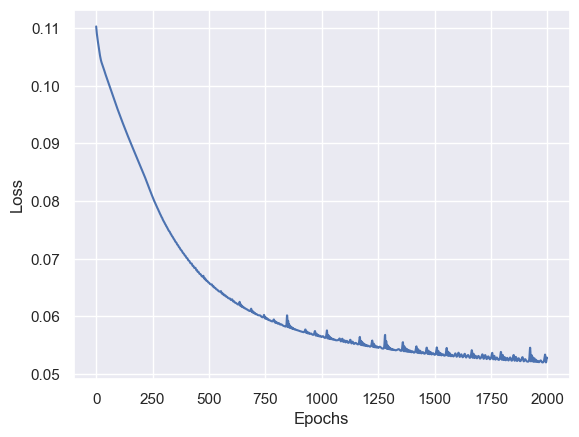

In [108]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

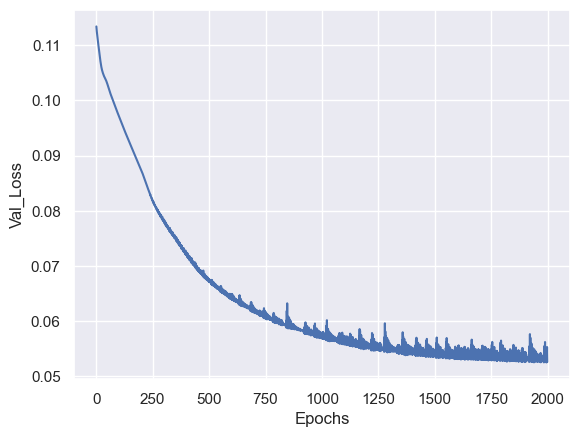

In [109]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [75]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NFE-Dwarfs.h5


In [76]:
predNFE = modelNFE.predict(X_test)

15/15 [==============================] - 0s 2ms/step


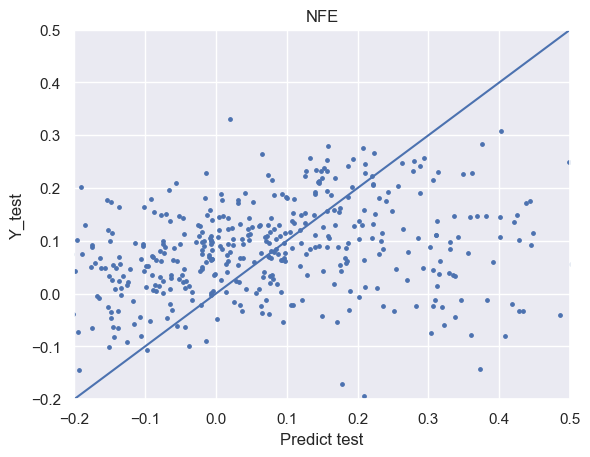

In [77]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [78]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 7.000000000000001%


In [79]:
Y_test['NFE_predict'] = predNFE

In [80]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0006_0031340  6067.8300  4.276641 -0.572270  0.044420   
iDR4_3_STRIPE82-0127_0034876  5949.8525  4.286202  0.119770 -0.033549   
iDR4_3_SPLUS-n01s21_0037937   5631.6450  4.482069 -0.313950  0.039358   
iDR4_3_MC0027_0111940         5972.2070  4.303142 -0.021939  0.022843   
iDR4_3_SPLUS-s45s28_0015514   5204.5957  4.488423 -0.027829  0.033704   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173  5705.2220  4.462307 -0.244460  0.012823   
iDR4_3_SPLUS-s45s29_0018570   5578.7880  4.437919 -0.013044 -0.008293   
iDR4_3_SPLUS-n01s25_0006878   5427.1120  4.505870 -0.149470  0.012845   
iDR4_3_SPLUS-n05s43_0015951   5503.1665  4.352323  0.102820  0.006785   
iDR4_3_STRIPE82-0109_0011474  5686.2140  4.485206 -0.368510  0.102693   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0006_0031340  0.163360 -0.217014  0.827450  0.001670   
iDR4_3_STRIPE82-0127_0034876 -0.177170 -0.161523  0.184340  0.012490   
iDR4_3_SPLUS-n01s21_0037937  -0.059392 -0.058840  0.037087  0.009060   
iDR4_3_MC0027_0111940        -0.163395  0.020317  0.342305  0.013630   
iDR4_3_SPLUS-s45s28_0015514  -0.047871  0.105029 -0.117047  0.049347   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173 -0.012513  0.179946  0.166890 -0.018730   
iDR4_3_SPLUS-s45s29_0018570  -0.095363  0.022837  0.322617  0.005522   
iDR4_3_SPLUS-n01s25_0006878   0.131590  0.043420 -0.023037 -0.016260   
iDR4_3_SPLUS-n05s43_0015951  -0.125291 -0.004833 -0.091659 -0.003120   
iDR4_3_STRIPE82-0109_0011474  0.089403  0.054316  0.079354  0.001190   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0006_0031340  0.106442  0.065177       0.081636     0.098733   
iDR4_3_STRIPE82-0127_0034876 -0.050481  0.045387       0.022060    -0.020392   
iDR4_3_SPLUS-n01s21_0037937   0.074532  0.076224       0.111641     0.073084   
iDR4_3_MC0027_0111940         0.069163  0.067362       0.036209     0.005554   
iDR4_3_SPLUS-s45s28_0015514   0.038278  0.093525       0.070635     0.021791   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0062_0003173  0.024349 -0.035344       0.116512     0.095890   
iDR4_3_SPLUS-s45s29_0018570   0.030742  0.010100       0.087328     0.023446   
iDR4_3_SPLUS-n01s25_0006878   0.042230 -0.024407       0.041278     0.008810   
iDR4_3_SPLUS-n05s43_0015951   0.043551  0.057482       0.005428    -0.037335   
iDR4_3_STRIPE82-0109_0011474  0.179288  0.136342       0.036529    -0.004231   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_STRIPE82-0006_0031340      0.057090     0.230836  
iDR4_3_STRIPE82-0127_0034876     -0.001575     0.057671  
iDR4_3_SPLUS-n01s21_0037937       0.100813    -0.031952  
iDR4_3_MC0027_0111940             0.005147     0.107515  
iDR4_3_SPLUS-s45s28_0015514       0.047438    -0.014178  
...                                    ...          ...  
iDR4_3_STRIPE82-0062_0003173      0.127711     0.018491  
iDR4_3_SPLUS-s45s29_0018570       0.060627    -0.060293  
iDR4_3_SPLUS-n01s25_0006878       0.005617     0.042993  
iDR4_3_SPLUS-n05s43_0015951      -0.019757     0.179353  
iDR4_3_STRIPE82-0109_0011474      0.003799     0.035794  

[475 rows x 14 columns]

In [81]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [82]:
Parametro = "SIFE"
columnTrain = 'SI_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [83]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0056_0002977  5199.6780  4.428120 -0.275540  0.017459   
iDR4_3_SPLUS-s46s28_0019695   5707.6553  4.472859 -0.014022  0.002069   
iDR4_3_STRIPE82-0059_0009340  5701.7220  4.225607  0.189460 -0.016357   
iDR4_3_SPLUS-s46s29_0021041   5748.9917  4.130580  0.076617  0.012774   
iDR4_3_STRIPE82-0082_0035840  5894.9040  4.188672 -0.142460 -0.041411   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   5408.0050  4.294715 -0.618060  0.198015   
iDR4_3_STRIPE82-0057_0020420  5938.7285  4.371747 -0.010298 -0.005190   
iDR4_3_STRIPE82-0064_0059171  6064.0310  4.301616 -0.099468 -0.020511   
iDR4_3_STRIPE82-0077_0032351  5540.1020  4.523918 -0.341590  0.034730   
iDR4_3_STRIPE82-0042_0030593  5723.9680  4.287941 -0.198820  0.183875   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0056_0002977 -0.009099  0.103566 -0.428700 -0.049610   
iDR4_3_SPLUS-s46s28_0019695  -0.069564 -0.032907 -0.033736 -0.011833   
iDR4_3_STRIPE82-0059_0009340 -0.066271  0.026027  0.188550  0.055630   
iDR4_3_SPLUS-s46s29_0021041  -0.042610 -0.048777  0.222741  0.075433   
iDR4_3_STRIPE82-0082_0035840 -0.023313 -0.005546  0.120000  0.059153   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   0.307170  0.275156 -0.091830  0.003740   
iDR4_3_STRIPE82-0057_0020420 -0.065952  0.014349  0.143061  0.011194   
iDR4_3_STRIPE82-0064_0059171 -0.034613 -0.043535  0.319788  0.030345   
iDR4_3_STRIPE82-0077_0032351 -0.069185  0.018762 -0.080368  0.009440   
iDR4_3_STRIPE82-0042_0030593  0.059389  0.134626  0.057430  0.100000   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_STRIPE82-0056_0002977 -0.008161 -0.035887  
iDR4_3_SPLUS-s46s28_0019695   0.016848  0.042311  
iDR4_3_STRIPE82-0059_0009340  0.018397  0.047868  
iDR4_3_SPLUS-s46s29_0021041   0.023817  0.101271  
iDR4_3_STRIPE82-0082_0035840 -0.060911  0.065788  
...                                ...       ...  
iDR4_3_SPLUS-n01s23_0028657   0.240178  0.207523  
iDR4_3_STRIPE82-0057_0020420  0.006452  0.021927  
iDR4_3_STRIPE82-0064_0059171  0.000897  0.069945  
iDR4_3_STRIPE82-0077_0032351  0.066759  0.062687  
iDR4_3_STRIPE82-0042_0030593  0.312068  0.181903  

[1709 rows x 10 columns]

In [84]:
modelSIFE = baseline_model_teste()

In [85]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
1/1 - 1s - loss: 0.0634 - val_loss: 0.0631 - 609ms/epoch - 609ms/step
Epoch 2/1500
1/1 - 0s - loss: 0.0628 - val_loss: 0.0625 - 52ms/epoch - 52ms/step
Epoch 3/1500
1/1 - 0s - loss: 0.0623 - val_loss: 0.0620 - 64ms/epoch - 64ms/step
Epoch 4/1500
1/1 - 0s - loss: 0.0618 - val_loss: 0.0614 - 81ms/epoch - 81ms/step
Epoch 5/1500
1/1 - 0s - loss: 0.0613 - val_loss: 0.0609 - 57ms/epoch - 57ms/step
Epoch 6/1500
1/1 - 0s - loss: 0.0607 - val_loss: 0.0603 - 55ms/epoch - 55ms/step
Epoch 7/1500
1/1 - 0s - loss: 0.0602 - val_loss: 0.0598 - 57ms/epoch - 57ms/step
Epoch 8/1500
1/1 - 0s - loss: 0.0597 - val_loss: 0.0593 - 54ms/epoch - 54ms/step
Epoch 9/1500
1/1 - 0s - loss: 0.0592 - val_loss: 0.0588 - 45ms/epoch - 45ms/step
Epoch 10/1500
1/1 - 0s - loss: 0.0587 - val_loss: 0.0583 - 52ms/epoch - 52ms/step
Epoch 11/1500
1/1 - 0s - loss: 0.0582 - val_loss: 0.0578 - 54ms/epoch - 54ms/step
Epoch 12/1500
1/1 - 0s - loss: 0.0577 - val_loss: 0.0573 - 48ms/epoch - 48ms/step
Epoch 13/1500
1/1 - 0s 

Epoch 101/1500
1/1 - 0s - loss: 0.0450 - val_loss: 0.0447 - 47ms/epoch - 47ms/step
Epoch 102/1500
1/1 - 0s - loss: 0.0449 - val_loss: 0.0446 - 45ms/epoch - 45ms/step
Epoch 103/1500
1/1 - 0s - loss: 0.0448 - val_loss: 0.0445 - 48ms/epoch - 48ms/step
Epoch 104/1500
1/1 - 0s - loss: 0.0447 - val_loss: 0.0444 - 46ms/epoch - 46ms/step
Epoch 105/1500
1/1 - 0s - loss: 0.0446 - val_loss: 0.0443 - 44ms/epoch - 44ms/step
Epoch 106/1500
1/1 - 0s - loss: 0.0445 - val_loss: 0.0442 - 54ms/epoch - 54ms/step
Epoch 107/1500
1/1 - 0s - loss: 0.0444 - val_loss: 0.0441 - 49ms/epoch - 49ms/step
Epoch 108/1500
1/1 - 0s - loss: 0.0443 - val_loss: 0.0440 - 49ms/epoch - 49ms/step
Epoch 109/1500
1/1 - 0s - loss: 0.0442 - val_loss: 0.0439 - 46ms/epoch - 46ms/step
Epoch 110/1500
1/1 - 0s - loss: 0.0441 - val_loss: 0.0438 - 44ms/epoch - 44ms/step
Epoch 111/1500
1/1 - 0s - loss: 0.0440 - val_loss: 0.0437 - 47ms/epoch - 47ms/step
Epoch 112/1500
1/1 - 0s - loss: 0.0439 - val_loss: 0.0436 - 45ms/epoch - 45ms/step
Epoc

Epoch 200/1500
1/1 - 0s - loss: 0.0361 - val_loss: 0.0358 - 46ms/epoch - 46ms/step
Epoch 201/1500
1/1 - 0s - loss: 0.0360 - val_loss: 0.0357 - 49ms/epoch - 49ms/step
Epoch 202/1500
1/1 - 0s - loss: 0.0359 - val_loss: 0.0356 - 43ms/epoch - 43ms/step
Epoch 203/1500
1/1 - 0s - loss: 0.0358 - val_loss: 0.0355 - 47ms/epoch - 47ms/step
Epoch 204/1500
1/1 - 0s - loss: 0.0357 - val_loss: 0.0354 - 45ms/epoch - 45ms/step
Epoch 205/1500
1/1 - 0s - loss: 0.0357 - val_loss: 0.0354 - 48ms/epoch - 48ms/step
Epoch 206/1500
1/1 - 0s - loss: 0.0356 - val_loss: 0.0353 - 43ms/epoch - 43ms/step
Epoch 207/1500
1/1 - 0s - loss: 0.0355 - val_loss: 0.0352 - 47ms/epoch - 47ms/step
Epoch 208/1500
1/1 - 0s - loss: 0.0354 - val_loss: 0.0351 - 47ms/epoch - 47ms/step
Epoch 209/1500
1/1 - 0s - loss: 0.0353 - val_loss: 0.0351 - 43ms/epoch - 43ms/step
Epoch 210/1500
1/1 - 0s - loss: 0.0353 - val_loss: 0.0350 - 49ms/epoch - 49ms/step
Epoch 211/1500
1/1 - 0s - loss: 0.0352 - val_loss: 0.0349 - 48ms/epoch - 48ms/step
Epoc

Epoch 299/1500
1/1 - 0s - loss: 0.0290 - val_loss: 0.0288 - 52ms/epoch - 52ms/step
Epoch 300/1500
1/1 - 0s - loss: 0.0290 - val_loss: 0.0287 - 48ms/epoch - 48ms/step
Epoch 301/1500
1/1 - 0s - loss: 0.0289 - val_loss: 0.0286 - 48ms/epoch - 48ms/step
Epoch 302/1500
1/1 - 0s - loss: 0.0288 - val_loss: 0.0286 - 42ms/epoch - 42ms/step
Epoch 303/1500
1/1 - 0s - loss: 0.0288 - val_loss: 0.0285 - 48ms/epoch - 48ms/step
Epoch 304/1500
1/1 - 0s - loss: 0.0287 - val_loss: 0.0284 - 41ms/epoch - 41ms/step
Epoch 305/1500
1/1 - 0s - loss: 0.0287 - val_loss: 0.0284 - 42ms/epoch - 42ms/step
Epoch 306/1500
1/1 - 0s - loss: 0.0286 - val_loss: 0.0283 - 46ms/epoch - 46ms/step
Epoch 307/1500
1/1 - 0s - loss: 0.0285 - val_loss: 0.0283 - 45ms/epoch - 45ms/step
Epoch 308/1500
1/1 - 0s - loss: 0.0285 - val_loss: 0.0282 - 55ms/epoch - 55ms/step
Epoch 309/1500
1/1 - 0s - loss: 0.0284 - val_loss: 0.0281 - 44ms/epoch - 44ms/step
Epoch 310/1500
1/1 - 0s - loss: 0.0284 - val_loss: 0.0281 - 47ms/epoch - 47ms/step
Epoc

Epoch 398/1500
1/1 - 0s - loss: 0.0236 - val_loss: 0.0233 - 53ms/epoch - 53ms/step
Epoch 399/1500
1/1 - 0s - loss: 0.0235 - val_loss: 0.0233 - 47ms/epoch - 47ms/step
Epoch 400/1500
1/1 - 0s - loss: 0.0235 - val_loss: 0.0232 - 44ms/epoch - 44ms/step
Epoch 401/1500
1/1 - 0s - loss: 0.0234 - val_loss: 0.0232 - 46ms/epoch - 46ms/step
Epoch 402/1500
1/1 - 0s - loss: 0.0234 - val_loss: 0.0231 - 45ms/epoch - 45ms/step
Epoch 403/1500
1/1 - 0s - loss: 0.0233 - val_loss: 0.0231 - 43ms/epoch - 43ms/step
Epoch 404/1500
1/1 - 0s - loss: 0.0233 - val_loss: 0.0230 - 43ms/epoch - 43ms/step
Epoch 405/1500
1/1 - 0s - loss: 0.0232 - val_loss: 0.0230 - 43ms/epoch - 43ms/step
Epoch 406/1500
1/1 - 0s - loss: 0.0232 - val_loss: 0.0229 - 44ms/epoch - 44ms/step
Epoch 407/1500
1/1 - 0s - loss: 0.0231 - val_loss: 0.0229 - 42ms/epoch - 42ms/step
Epoch 408/1500
1/1 - 0s - loss: 0.0231 - val_loss: 0.0228 - 44ms/epoch - 44ms/step
Epoch 409/1500
1/1 - 0s - loss: 0.0230 - val_loss: 0.0228 - 40ms/epoch - 40ms/step
Epoc

Epoch 497/1500
1/1 - 0s - loss: 0.0193 - val_loss: 0.0191 - 42ms/epoch - 42ms/step
Epoch 498/1500
1/1 - 0s - loss: 0.0193 - val_loss: 0.0190 - 44ms/epoch - 44ms/step
Epoch 499/1500
1/1 - 0s - loss: 0.0193 - val_loss: 0.0190 - 41ms/epoch - 41ms/step
Epoch 500/1500
1/1 - 0s - loss: 0.0192 - val_loss: 0.0190 - 51ms/epoch - 51ms/step
Epoch 501/1500
1/1 - 0s - loss: 0.0192 - val_loss: 0.0189 - 45ms/epoch - 45ms/step
Epoch 502/1500
1/1 - 0s - loss: 0.0191 - val_loss: 0.0189 - 48ms/epoch - 48ms/step
Epoch 503/1500
1/1 - 0s - loss: 0.0191 - val_loss: 0.0189 - 45ms/epoch - 45ms/step
Epoch 504/1500
1/1 - 0s - loss: 0.0191 - val_loss: 0.0188 - 43ms/epoch - 43ms/step
Epoch 505/1500
1/1 - 0s - loss: 0.0190 - val_loss: 0.0188 - 53ms/epoch - 53ms/step
Epoch 506/1500
1/1 - 0s - loss: 0.0190 - val_loss: 0.0187 - 42ms/epoch - 42ms/step
Epoch 507/1500
1/1 - 0s - loss: 0.0190 - val_loss: 0.0187 - 44ms/epoch - 44ms/step
Epoch 508/1500
1/1 - 0s - loss: 0.0189 - val_loss: 0.0187 - 48ms/epoch - 48ms/step
Epoc

Epoch 596/1500
1/1 - 0s - loss: 0.0160 - val_loss: 0.0158 - 40ms/epoch - 40ms/step
Epoch 597/1500
1/1 - 0s - loss: 0.0160 - val_loss: 0.0158 - 44ms/epoch - 44ms/step
Epoch 598/1500
1/1 - 0s - loss: 0.0160 - val_loss: 0.0157 - 45ms/epoch - 45ms/step
Epoch 599/1500
1/1 - 0s - loss: 0.0160 - val_loss: 0.0157 - 41ms/epoch - 41ms/step
Epoch 600/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0157 - 48ms/epoch - 48ms/step
Epoch 601/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0157 - 51ms/epoch - 51ms/step
Epoch 602/1500
1/1 - 0s - loss: 0.0159 - val_loss: 0.0156 - 42ms/epoch - 42ms/step
Epoch 603/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0156 - 48ms/epoch - 48ms/step
Epoch 604/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0156 - 48ms/epoch - 48ms/step
Epoch 605/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0155 - 50ms/epoch - 50ms/step
Epoch 606/1500
1/1 - 0s - loss: 0.0158 - val_loss: 0.0155 - 47ms/epoch - 47ms/step
Epoch 607/1500
1/1 - 0s - loss: 0.0157 - val_loss: 0.0155 - 46ms/epoch - 46ms/step
Epoc

Epoch 695/1500
1/1 - 0s - loss: 0.0135 - val_loss: 0.0133 - 46ms/epoch - 46ms/step
Epoch 696/1500
1/1 - 0s - loss: 0.0135 - val_loss: 0.0132 - 46ms/epoch - 46ms/step
Epoch 697/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0132 - 46ms/epoch - 46ms/step
Epoch 698/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0132 - 46ms/epoch - 46ms/step
Epoch 699/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0132 - 43ms/epoch - 43ms/step
Epoch 700/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0131 - 54ms/epoch - 54ms/step
Epoch 701/1500
1/1 - 0s - loss: 0.0134 - val_loss: 0.0131 - 43ms/epoch - 43ms/step
Epoch 702/1500
1/1 - 0s - loss: 0.0133 - val_loss: 0.0131 - 43ms/epoch - 43ms/step
Epoch 703/1500
1/1 - 0s - loss: 0.0133 - val_loss: 0.0131 - 48ms/epoch - 48ms/step
Epoch 704/1500
1/1 - 0s - loss: 0.0133 - val_loss: 0.0131 - 45ms/epoch - 45ms/step
Epoch 705/1500
1/1 - 0s - loss: 0.0133 - val_loss: 0.0130 - 44ms/epoch - 44ms/step
Epoch 706/1500
1/1 - 0s - loss: 0.0132 - val_loss: 0.0130 - 45ms/epoch - 45ms/step
Epoc

Epoch 794/1500
1/1 - 0s - loss: 0.0115 - val_loss: 0.0113 - 47ms/epoch - 47ms/step
Epoch 795/1500
1/1 - 0s - loss: 0.0115 - val_loss: 0.0113 - 59ms/epoch - 59ms/step
Epoch 796/1500
1/1 - 0s - loss: 0.0115 - val_loss: 0.0112 - 61ms/epoch - 61ms/step
Epoch 797/1500
1/1 - 0s - loss: 0.0115 - val_loss: 0.0112 - 52ms/epoch - 52ms/step
Epoch 798/1500
1/1 - 0s - loss: 0.0114 - val_loss: 0.0112 - 50ms/epoch - 50ms/step
Epoch 799/1500
1/1 - 0s - loss: 0.0114 - val_loss: 0.0112 - 46ms/epoch - 46ms/step
Epoch 800/1500
1/1 - 0s - loss: 0.0114 - val_loss: 0.0112 - 44ms/epoch - 44ms/step
Epoch 801/1500
1/1 - 0s - loss: 0.0114 - val_loss: 0.0112 - 53ms/epoch - 53ms/step
Epoch 802/1500
1/1 - 0s - loss: 0.0114 - val_loss: 0.0111 - 46ms/epoch - 46ms/step
Epoch 803/1500
1/1 - 0s - loss: 0.0114 - val_loss: 0.0111 - 45ms/epoch - 45ms/step
Epoch 804/1500
1/1 - 0s - loss: 0.0113 - val_loss: 0.0111 - 48ms/epoch - 48ms/step
Epoch 805/1500
1/1 - 0s - loss: 0.0113 - val_loss: 0.0111 - 52ms/epoch - 52ms/step
Epoc

Epoch 893/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0098 - 45ms/epoch - 45ms/step
Epoch 894/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0097 - 68ms/epoch - 68ms/step
Epoch 895/1500
1/1 - 0s - loss: 0.0100 - val_loss: 0.0097 - 46ms/epoch - 46ms/step
Epoch 896/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0097 - 43ms/epoch - 43ms/step
Epoch 897/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0097 - 41ms/epoch - 41ms/step
Epoch 898/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0097 - 45ms/epoch - 45ms/step
Epoch 899/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0097 - 62ms/epoch - 62ms/step
Epoch 900/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0097 - 58ms/epoch - 58ms/step
Epoch 901/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0096 - 76ms/epoch - 76ms/step
Epoch 902/1500
1/1 - 0s - loss: 0.0099 - val_loss: 0.0096 - 98ms/epoch - 98ms/step
Epoch 903/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0096 - 47ms/epoch - 47ms/step
Epoch 904/1500
1/1 - 0s - loss: 0.0098 - val_loss: 0.0096 - 69ms/epoch - 69ms/step
Epoc

Epoch 992/1500
1/1 - 0s - loss: 0.0088 - val_loss: 0.0086 - 49ms/epoch - 49ms/step
Epoch 993/1500
1/1 - 0s - loss: 0.0088 - val_loss: 0.0086 - 47ms/epoch - 47ms/step
Epoch 994/1500
1/1 - 0s - loss: 0.0088 - val_loss: 0.0085 - 44ms/epoch - 44ms/step
Epoch 995/1500
1/1 - 0s - loss: 0.0088 - val_loss: 0.0085 - 43ms/epoch - 43ms/step
Epoch 996/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 49ms/epoch - 49ms/step
Epoch 997/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 49ms/epoch - 49ms/step
Epoch 998/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 45ms/epoch - 45ms/step
Epoch 999/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 42ms/epoch - 42ms/step
Epoch 1000/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 47ms/epoch - 47ms/step
Epoch 1001/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 51ms/epoch - 51ms/step
Epoch 1002/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 48ms/epoch - 48ms/step
Epoch 1003/1500
1/1 - 0s - loss: 0.0087 - val_loss: 0.0085 - 59ms/epoch - 59ms/step


Epoch 1090/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0077 - 45ms/epoch - 45ms/step
Epoch 1091/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0076 - 42ms/epoch - 42ms/step
Epoch 1092/1500
1/1 - 0s - loss: 0.0079 - val_loss: 0.0076 - 42ms/epoch - 42ms/step
Epoch 1093/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 44ms/epoch - 44ms/step
Epoch 1094/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 41ms/epoch - 41ms/step
Epoch 1095/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 46ms/epoch - 46ms/step
Epoch 1096/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 39ms/epoch - 39ms/step
Epoch 1097/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 42ms/epoch - 42ms/step
Epoch 1098/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 42ms/epoch - 42ms/step
Epoch 1099/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 49ms/epoch - 49ms/step
Epoch 1100/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 51ms/epoch - 51ms/step
Epoch 1101/1500
1/1 - 0s - loss: 0.0078 - val_loss: 0.0076 - 51ms/epoch - 51

Epoch 1188/1500
1/1 - 0s - loss: 0.0072 - val_loss: 0.0069 - 45ms/epoch - 45ms/step
Epoch 1189/1500
1/1 - 0s - loss: 0.0072 - val_loss: 0.0069 - 49ms/epoch - 49ms/step
Epoch 1190/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 45ms/epoch - 45ms/step
Epoch 1191/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 43ms/epoch - 43ms/step
Epoch 1192/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 43ms/epoch - 43ms/step
Epoch 1193/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 49ms/epoch - 49ms/step
Epoch 1194/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 47ms/epoch - 47ms/step
Epoch 1195/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 40ms/epoch - 40ms/step
Epoch 1196/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 41ms/epoch - 41ms/step
Epoch 1197/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 41ms/epoch - 41ms/step
Epoch 1198/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 43ms/epoch - 43ms/step
Epoch 1199/1500
1/1 - 0s - loss: 0.0071 - val_loss: 0.0069 - 43ms/epoch - 43

Epoch 1286/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 43ms/epoch - 43ms/step
Epoch 1287/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 51ms/epoch - 51ms/step
Epoch 1288/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 47ms/epoch - 47ms/step
Epoch 1289/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 49ms/epoch - 49ms/step
Epoch 1290/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 1291/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 46ms/epoch - 46ms/step
Epoch 1292/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 41ms/epoch - 41ms/step
Epoch 1293/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 48ms/epoch - 48ms/step
Epoch 1294/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0064 - 47ms/epoch - 47ms/step
Epoch 1295/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0063 - 47ms/epoch - 47ms/step
Epoch 1296/1500
1/1 - 0s - loss: 0.0066 - val_loss: 0.0063 - 52ms/epoch - 52ms/step
Epoch 1297/1500
1/1 - 0s - loss: 0.0065 - val_loss: 0.0063 - 44ms/epoch - 44

Epoch 1384/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0060 - 44ms/epoch - 44ms/step
Epoch 1385/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0060 - 42ms/epoch - 42ms/step
Epoch 1386/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0059 - 44ms/epoch - 44ms/step
Epoch 1387/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0059 - 47ms/epoch - 47ms/step
Epoch 1388/1500
1/1 - 0s - loss: 0.0062 - val_loss: 0.0059 - 46ms/epoch - 46ms/step
Epoch 1389/1500
1/1 - 0s - loss: 0.0061 - val_loss: 0.0059 - 48ms/epoch - 48ms/step
Epoch 1390/1500
1/1 - 0s - loss: 0.0061 - val_loss: 0.0059 - 47ms/epoch - 47ms/step
Epoch 1391/1500
1/1 - 0s - loss: 0.0061 - val_loss: 0.0059 - 42ms/epoch - 42ms/step
Epoch 1392/1500
1/1 - 0s - loss: 0.0061 - val_loss: 0.0059 - 52ms/epoch - 52ms/step
Epoch 1393/1500
1/1 - 0s - loss: 0.0061 - val_loss: 0.0059 - 46ms/epoch - 46ms/step
Epoch 1394/1500
1/1 - 0s - loss: 0.0061 - val_loss: 0.0059 - 50ms/epoch - 50ms/step
Epoch 1395/1500
1/1 - 0s - loss: 0.0061 - val_loss: 0.0059 - 43ms/epoch - 43

Epoch 1482/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 50ms/epoch - 50ms/step
Epoch 1483/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 51ms/epoch - 51ms/step
Epoch 1484/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 47ms/epoch - 47ms/step
Epoch 1485/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 48ms/epoch - 48ms/step
Epoch 1486/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 49ms/epoch - 49ms/step
Epoch 1487/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 47ms/epoch - 47ms/step
Epoch 1488/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 56ms/epoch - 56ms/step
Epoch 1489/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 48ms/epoch - 48ms/step
Epoch 1490/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1491/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 48ms/epoch - 48ms/step
Epoch 1492/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 52ms/epoch - 52ms/step
Epoch 1493/1500
1/1 - 0s - loss: 0.0058 - val_loss: 0.0056 - 47ms/epoch - 47

Text(0, 0.5, 'Loss')

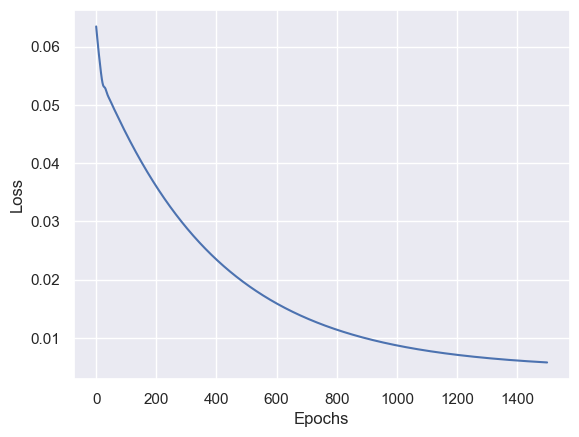

In [86]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

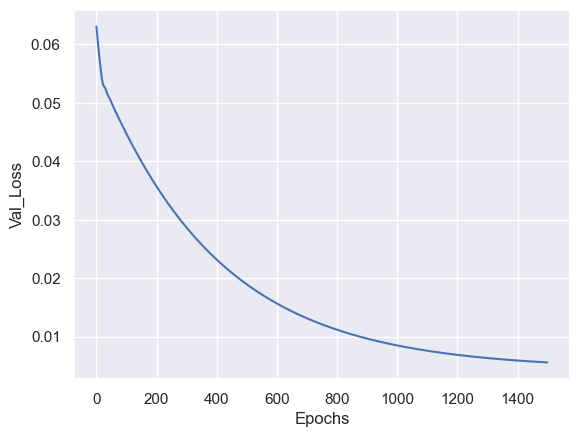

In [87]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [88]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\SIFE-Dwarfs.h5


In [89]:
predSIFE = modelSIFE.predict(X_test)

15/15 [==============================] - 0s 2ms/step


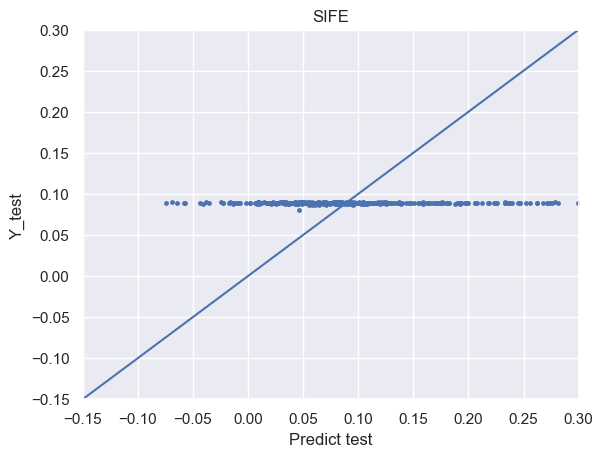

In [90]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [91]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 0.0%


In [92]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [93]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0006_0031340  6067.8300  4.276641 -0.572270  0.044420   
iDR4_3_STRIPE82-0127_0034876  5949.8525  4.286202  0.119770 -0.033549   
iDR4_3_SPLUS-n01s21_0037937   5631.6450  4.482069 -0.313950  0.039358   
iDR4_3_MC0027_0111940         5972.2070  4.303142 -0.021939  0.022843   
iDR4_3_SPLUS-s45s28_0015514   5204.5957  4.488423 -0.027829  0.033704   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173  5705.2220  4.462307 -0.244460  0.012823   
iDR4_3_SPLUS-s45s29_0018570   5578.7880  4.437919 -0.013044 -0.008293   
iDR4_3_SPLUS-n01s25_0006878   5427.1120  4.505870 -0.149470  0.012845   
iDR4_3_SPLUS-n05s43_0015951   5503.1665  4.352323  0.102820  0.006785   
iDR4_3_STRIPE82-0109_0011474  5686.2140  4.485206 -0.368510  0.102693   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0006_0031340  0.163360 -0.217014  0.827450  0.001670   
iDR4_3_STRIPE82-0127_0034876 -0.177170 -0.161523  0.184340  0.012490   
iDR4_3_SPLUS-n01s21_0037937  -0.059392 -0.058840  0.037087  0.009060   
iDR4_3_MC0027_0111940        -0.163395  0.020317  0.342305  0.013630   
iDR4_3_SPLUS-s45s28_0015514  -0.047871  0.105029 -0.117047  0.049347   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173 -0.012513  0.179946  0.166890 -0.018730   
iDR4_3_SPLUS-s45s29_0018570  -0.095363  0.022837  0.322617  0.005522   
iDR4_3_SPLUS-n01s25_0006878   0.131590  0.043420 -0.023037 -0.016260   
iDR4_3_SPLUS-n05s43_0015951  -0.125291 -0.004833 -0.091659 -0.003120   
iDR4_3_STRIPE82-0109_0011474  0.089403  0.054316  0.079354  0.001190   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0006_0031340  0.106442  0.065177       0.081636     0.098733   
iDR4_3_STRIPE82-0127_0034876 -0.050481  0.045387       0.022060    -0.020392   
iDR4_3_SPLUS-n01s21_0037937   0.074532  0.076224       0.111641     0.073084   
iDR4_3_MC0027_0111940         0.069163  0.067362       0.036209     0.005554   
iDR4_3_SPLUS-s45s28_0015514   0.038278  0.093525       0.070635     0.021791   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0062_0003173  0.024349 -0.035344       0.116512     0.095890   
iDR4_3_SPLUS-s45s29_0018570   0.030742  0.010100       0.087328     0.023446   
iDR4_3_SPLUS-n01s25_0006878   0.042230 -0.024407       0.041278     0.008810   
iDR4_3_SPLUS-n05s43_0015951   0.043551  0.057482       0.005428    -0.037335   
iDR4_3_STRIPE82-0109_0011474  0.179288  0.136342       0.036529    -0.004231   

                              CAFE_predict  NFE_predict  SIFE_predict  
ID                                                                     
iDR4_3_STRIPE82-0006_0031340      0.057090     0.230836      0.088355  
iDR4_3_STRIPE82-0127_0034876     -0.001575     0.057671      0.088185  
iDR4_3_SPLUS-n01s21_0037937       0.100813    -0.031952      0.089137  
iDR4_3_MC0027_0111940             0.005147     0.107515      0.088623  
iDR4_3_SPLUS-s45s28_0015514       0.047438    -0.014178      0.089809  
...                                    ...          ...           ...  
iDR4_3_STRIPE82-0062_0003173      0.127711     0.018491      0.089066  
iDR4_3_SPLUS-s45s29_0018570       0.060627    -0.060293      0.089960  
iDR4_3_SPLUS-n01s25_0006878       0.005617     0.042993      0.089703  
iDR4_3_SPLUS-n05s43_0015951      -0.019757     0.179353      0.089362  
iDR4_3_STRIPE82-0109_0011474      0.003799     0.035794      0.088808  

[475 rows x 15 columns]

In [94]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [95]:
Parametro = "NIFE"
columnTrain = 'NI_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [96]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0056_0002977  5199.6780  4.428120 -0.275540  0.017459   
iDR4_3_SPLUS-s46s28_0019695   5707.6553  4.472859 -0.014022  0.002069   
iDR4_3_STRIPE82-0059_0009340  5701.7220  4.225607  0.189460 -0.016357   
iDR4_3_SPLUS-s46s29_0021041   5748.9917  4.130580  0.076617  0.012774   
iDR4_3_STRIPE82-0082_0035840  5894.9040  4.188672 -0.142460 -0.041411   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   5408.0050  4.294715 -0.618060  0.198015   
iDR4_3_STRIPE82-0057_0020420  5938.7285  4.371747 -0.010298 -0.005190   
iDR4_3_STRIPE82-0064_0059171  6064.0310  4.301616 -0.099468 -0.020511   
iDR4_3_STRIPE82-0077_0032351  5540.1020  4.523918 -0.341590  0.034730   
iDR4_3_STRIPE82-0042_0030593  5723.9680  4.287941 -0.198820  0.183875   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0056_0002977 -0.009099  0.103566 -0.428700 -0.049610   
iDR4_3_SPLUS-s46s28_0019695  -0.069564 -0.032907 -0.033736 -0.011833   
iDR4_3_STRIPE82-0059_0009340 -0.066271  0.026027  0.188550  0.055630   
iDR4_3_SPLUS-s46s29_0021041  -0.042610 -0.048777  0.222741  0.075433   
iDR4_3_STRIPE82-0082_0035840 -0.023313 -0.005546  0.120000  0.059153   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s23_0028657   0.307170  0.275156 -0.091830  0.003740   
iDR4_3_STRIPE82-0057_0020420 -0.065952  0.014349  0.143061  0.011194   
iDR4_3_STRIPE82-0064_0059171 -0.034613 -0.043535  0.319788  0.030345   
iDR4_3_STRIPE82-0077_0032351 -0.069185  0.018762 -0.080368  0.009440   
iDR4_3_STRIPE82-0042_0030593  0.059389  0.134626  0.057430  0.100000   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_STRIPE82-0056_0002977 -0.008161 -0.035887  
iDR4_3_SPLUS-s46s28_0019695   0.016848  0.042311  
iDR4_3_STRIPE82-0059_0009340  0.018397  0.047868  
iDR4_3_SPLUS-s46s29_0021041   0.023817  0.101271  
iDR4_3_STRIPE82-0082_0035840 -0.060911  0.065788  
...                                ...       ...  
iDR4_3_SPLUS-n01s23_0028657   0.240178  0.207523  
iDR4_3_STRIPE82-0057_0020420  0.006452  0.021927  
iDR4_3_STRIPE82-0064_0059171  0.000897  0.069945  
iDR4_3_STRIPE82-0077_0032351  0.066759  0.062687  
iDR4_3_STRIPE82-0042_0030593  0.312068  0.181903  

[1709 rows x 10 columns]

In [97]:
modelNIFE = baseline_model_teste()

In [98]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 1s - loss: 0.0550 - val_loss: 0.0540 - 592ms/epoch - 592ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0549 - val_loss: 0.0538 - 57ms/epoch - 57ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0547 - val_loss: 0.0537 - 60ms/epoch - 60ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0545 - val_loss: 0.0535 - 51ms/epoch - 51ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0544 - val_loss: 0.0534 - 55ms/epoch - 55ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0533 - 55ms/epoch - 55ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0541 - val_loss: 0.0531 - 48ms/epoch - 48ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0540 - val_loss: 0.0530 - 53ms/epoch - 53ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0539 - val_loss: 0.0529 - 52ms/epoch - 52ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0528 - 48ms/epoch - 48ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0527 - 47ms/epoch - 47ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0526 - 48ms/epoch - 48ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0424 - val_loss: 0.0415 - 42ms/epoch - 42ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0423 - val_loss: 0.0414 - 43ms/epoch - 43ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0422 - val_loss: 0.0413 - 42ms/epoch - 42ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0412 - 47ms/epoch - 47ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0420 - val_loss: 0.0410 - 49ms/epoch - 49ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0419 - val_loss: 0.0409 - 45ms/epoch - 45ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0418 - val_loss: 0.0408 - 48ms/epoch - 48ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0417 - val_loss: 0.0407 - 45ms/epoch - 45ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0415 - val_loss: 0.0406 - 42ms/epoch - 42ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0414 - val_loss: 0.0405 - 47ms/epoch - 47ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0413 - val_loss: 0.0404 - 44ms/epoch - 44ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0412 - val_loss: 0.0403 - 40ms/epoch - 40ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0317 - 46ms/epoch - 46ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0326 - val_loss: 0.0316 - 43ms/epoch - 43ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0316 - 41ms/epoch - 41ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0315 - 43ms/epoch - 43ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0314 - 40ms/epoch - 40ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0313 - 38ms/epoch - 38ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0312 - 42ms/epoch - 42ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0311 - 52ms/epoch - 52ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0320 - val_loss: 0.0311 - 59ms/epoch - 59ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0319 - val_loss: 0.0310 - 56ms/epoch - 56ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0318 - val_loss: 0.0309 - 49ms/epoch - 49ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0317 - val_loss: 0.0308 - 51ms/epoch - 51ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0244 - 45ms/epoch - 45ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0243 - 44ms/epoch - 44ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0243 - 49ms/epoch - 49ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0242 - 44ms/epoch - 44ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0242 - 50ms/epoch - 50ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0250 - val_loss: 0.0241 - 43ms/epoch - 43ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0240 - 51ms/epoch - 51ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0240 - 54ms/epoch - 54ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0239 - 44ms/epoch - 44ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0238 - 42ms/epoch - 42ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0238 - 50ms/epoch - 50ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0237 - 47ms/epoch - 47ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0198 - val_loss: 0.0189 - 45ms/epoch - 45ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0198 - val_loss: 0.0189 - 42ms/epoch - 42ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0197 - val_loss: 0.0188 - 51ms/epoch - 51ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0197 - val_loss: 0.0188 - 41ms/epoch - 41ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0188 - 41ms/epoch - 41ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0187 - 45ms/epoch - 45ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0187 - 42ms/epoch - 42ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0186 - 42ms/epoch - 42ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0195 - val_loss: 0.0186 - 46ms/epoch - 46ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0185 - 41ms/epoch - 41ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0185 - 42ms/epoch - 42ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0184 - 43ms/epoch - 43ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0149 - 43ms/epoch - 43ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0148 - 41ms/epoch - 41ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0148 - 38ms/epoch - 38ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0148 - 40ms/epoch - 40ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0147 - 43ms/epoch - 43ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0147 - 42ms/epoch - 42ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0147 - 41ms/epoch - 41ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0146 - 39ms/epoch - 39ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0155 - val_loss: 0.0146 - 41ms/epoch - 41ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0145 - 40ms/epoch - 40ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0145 - 39ms/epoch - 39ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0145 - 38ms/epoch - 38ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0118 - 44ms/epoch - 44ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0118 - 42ms/epoch - 42ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0118 - 47ms/epoch - 47ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0117 - 45ms/epoch - 45ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0117 - 47ms/epoch - 47ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0117 - 48ms/epoch - 48ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0117 - 50ms/epoch - 50ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0116 - 47ms/epoch - 47ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0116 - 47ms/epoch - 47ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0116 - 41ms/epoch - 41ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0116 - 42ms/epoch - 42ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0115 - 49ms/epoch - 49ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0095 - 40ms/epoch - 40ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0095 - 41ms/epoch - 41ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0095 - 41ms/epoch - 41ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0095 - 40ms/epoch - 40ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0095 - 45ms/epoch - 45ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0094 - 47ms/epoch - 47ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0094 - 46ms/epoch - 46ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0094 - 43ms/epoch - 43ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0094 - 39ms/epoch - 39ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0094 - 41ms/epoch - 41ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0094 - 42ms/epoch - 42ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0093 - 41ms/epoch - 41ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0079 - 48ms/epoch - 48ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0078 - 39ms/epoch - 39ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0078 - 42ms/epoch - 42ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0078 - 39ms/epoch - 39ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0078 - 42ms/epoch - 42ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0078 - 40ms/epoch - 40ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0078 - 44ms/epoch - 44ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0077 - 51ms/epoch - 51ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0077 - 54ms/epoch - 54ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0077 - 45ms/epoch - 45ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0077 - 45ms/epoch - 45ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0075 - val_loss: 0.0066 - 53ms/epoch - 53ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0066 - 66ms/epoch - 66ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0066 - 45ms/epoch - 45ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0066 - 68ms/epoch - 68ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0065 - 39ms/epoch - 39ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0065 - 73ms/epoch - 73ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0065 - 44ms/epoch - 44ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0065 - 66ms/epoch - 66ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0065 - 43ms/epoch - 43ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0065 - 69ms/epoch - 69ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0065 - 52ms/epoch - 52ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0073 - val_loss: 0.0065 - 68ms/epoch - 68ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 39ms/epoch - 39ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 38ms/epoch - 38ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 41ms/epoch - 41ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 38ms/epoch - 38ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 41ms/epoch - 41ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 43ms/epoch - 43ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0056 - 46ms/epoch - 46ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0056 - 45ms/epoch - 45ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0056 - 40ms/epoch - 40ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0056 - 42ms/epoch - 42ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0056 - 41ms/epoch - 41ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 37ms/epoch - 37ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 45ms/epoch - 45ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 44ms/epoch - 44ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 40ms/epoch - 40ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 41ms/epoch - 41ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 42ms/epoch - 42ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 43ms/epoch - 43ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 43ms/epoch - 43ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 44ms/epoch - 44ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 42ms/epoch - 42ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0049 - 43ms/epoch - 43ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0049 - 52ms/epoch - 52

Epoch 1188/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 42ms/epoch - 42ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 39ms/epoch - 39ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 41ms/epoch - 41ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 41ms/epoch - 41ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 40ms/epoch - 40ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 42ms/epoch - 42ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 39ms/epoch - 39ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 41ms/epoch - 41ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 40ms/epoch - 40ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0053 - val_loss: 0.0044 - 38ms/epoch - 38ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0044 - 39ms/epoch - 39ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0052 - val_loss: 0.0044 - 43ms/epoch - 43

Epoch 1286/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 41ms/epoch - 41ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 51ms/epoch - 51ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 49ms/epoch - 49ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 44ms/epoch - 44ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 43ms/epoch - 43ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 44ms/epoch - 44ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 44ms/epoch - 44ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 45ms/epoch - 45ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 43ms/epoch - 43ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 40ms/epoch - 40ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 43ms/epoch - 43ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0049 - val_loss: 0.0040 - 43ms/epoch - 43

Epoch 1384/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0038 - 46ms/epoch - 46ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0038 - 42ms/epoch - 42ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0038 - 44ms/epoch - 44ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 40ms/epoch - 40ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 42ms/epoch - 42ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 44ms/epoch - 44ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 40ms/epoch - 40ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 41ms/epoch - 41ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 41ms/epoch - 41ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 43ms/epoch - 43ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 44ms/epoch - 44ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0046 - val_loss: 0.0037 - 46ms/epoch - 46

Epoch 1482/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 38ms/epoch - 38ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 37ms/epoch - 37ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 39ms/epoch - 39ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 39ms/epoch - 39ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 37ms/epoch - 37ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 37ms/epoch - 37ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 37ms/epoch - 37ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 36ms/epoch - 36ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 36ms/epoch - 36ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 38ms/epoch - 38ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 37ms/epoch - 37ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0044 - val_loss: 0.0035 - 40ms/epoch - 40

Epoch 1580/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0034 - 45ms/epoch - 45ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0034 - 45ms/epoch - 45ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0034 - 40ms/epoch - 40ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0034 - 44ms/epoch - 44ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0034 - 40ms/epoch - 40ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0043 - val_loss: 0.0034 - 45ms/epoch - 45ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0034 - 50ms/epoch - 50ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0034 - 40ms/epoch - 40ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0034 - 41ms/epoch - 41ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0042 - val_loss: 0.0034 - 40ms/epoch - 40

Epoch 1678/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 49ms/epoch - 49ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 42ms/epoch - 42ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 44ms/epoch - 44ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 45ms/epoch - 45ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 54ms/epoch - 54ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 44ms/epoch - 44ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 45ms/epoch - 45ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 43ms/epoch - 43ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 41ms/epoch - 41ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 46ms/epoch - 46ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 41ms/epoch - 41ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0033 - 41ms/epoch - 41

Epoch 1776/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 55ms/epoch - 55ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 38ms/epoch - 38ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 89ms/epoch - 89ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 37ms/epoch - 37ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 83ms/epoch - 83ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 35ms/epoch - 35ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 64ms/epoch - 64ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 38ms/epoch - 38ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 35ms/epoch - 35ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 35ms/epoch - 35ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 36ms/epoch - 36ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0041 - val_loss: 0.0032 - 37ms/epoch - 37

Epoch 1874/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 38ms/epoch - 38ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 43ms/epoch - 43ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 40ms/epoch - 40ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 45ms/epoch - 45ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 39ms/epoch - 39ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 42ms/epoch - 42ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 40ms/epoch - 40ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 42ms/epoch - 42ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 40ms/epoch - 40ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 43ms/epoch - 43ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 42ms/epoch - 42ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 41ms/epoch - 41

Epoch 1972/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 47ms/epoch - 47ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 41ms/epoch - 41ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 42ms/epoch - 42ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 39ms/epoch - 39ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 39ms/epoch - 39ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 39ms/epoch - 39ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 43ms/epoch - 43ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 39ms/epoch - 39ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 44ms/epoch - 44ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 58ms/epoch - 58ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 105ms/epoch - 105ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0040 - val_loss: 0.0031 - 50ms/epoch - 

Text(0, 0.5, 'Loss')

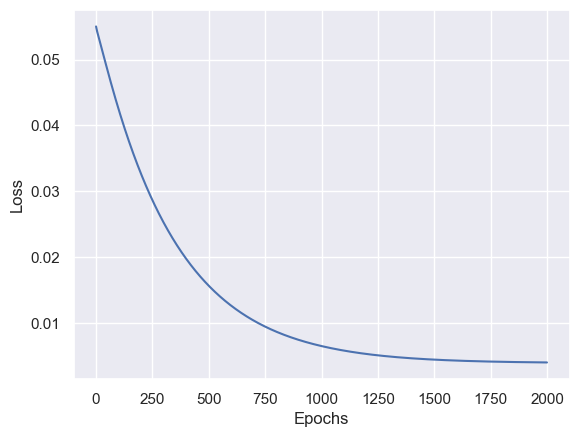

In [99]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

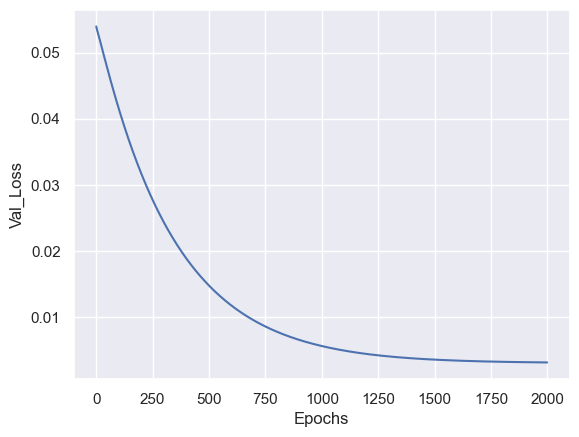

In [100]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [101]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NIFE-Dwarfs.h5


In [102]:
predNIFE = modelNIFE.predict(X_test)

15/15 [==============================] - 0s 2ms/step


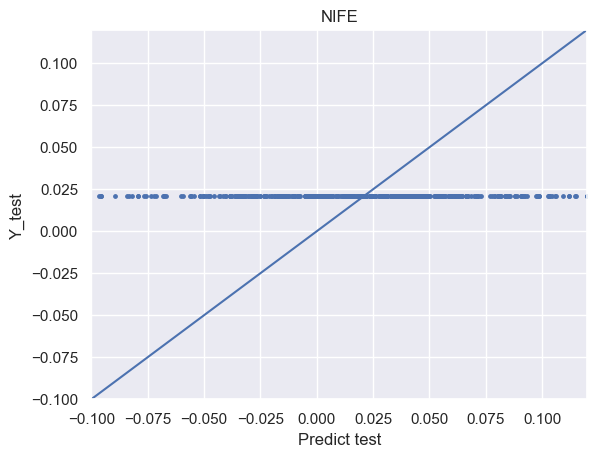

In [103]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [104]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -0.0%


In [105]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [106]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0006_0031340  6067.8300  4.276641 -0.572270  0.044420   
iDR4_3_STRIPE82-0127_0034876  5949.8525  4.286202  0.119770 -0.033549   
iDR4_3_SPLUS-n01s21_0037937   5631.6450  4.482069 -0.313950  0.039358   
iDR4_3_MC0027_0111940         5972.2070  4.303142 -0.021939  0.022843   
iDR4_3_SPLUS-s45s28_0015514   5204.5957  4.488423 -0.027829  0.033704   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173  5705.2220  4.462307 -0.244460  0.012823   
iDR4_3_SPLUS-s45s29_0018570   5578.7880  4.437919 -0.013044 -0.008293   
iDR4_3_SPLUS-n01s25_0006878   5427.1120  4.505870 -0.149470  0.012845   
iDR4_3_SPLUS-n05s43_0015951   5503.1665  4.352323  0.102820  0.006785   
iDR4_3_STRIPE82-0109_0011474  5686.2140  4.485206 -0.368510  0.102693   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0006_0031340  0.163360 -0.217014  0.827450  0.001670   
iDR4_3_STRIPE82-0127_0034876 -0.177170 -0.161523  0.184340  0.012490   
iDR4_3_SPLUS-n01s21_0037937  -0.059392 -0.058840  0.037087  0.009060   
iDR4_3_MC0027_0111940        -0.163395  0.020317  0.342305  0.013630   
iDR4_3_SPLUS-s45s28_0015514  -0.047871  0.105029 -0.117047  0.049347   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0062_0003173 -0.012513  0.179946  0.166890 -0.018730   
iDR4_3_SPLUS-s45s29_0018570  -0.095363  0.022837  0.322617  0.005522   
iDR4_3_SPLUS-n01s25_0006878   0.131590  0.043420 -0.023037 -0.016260   
iDR4_3_SPLUS-n05s43_0015951  -0.125291 -0.004833 -0.091659 -0.003120   
iDR4_3_STRIPE82-0109_0011474  0.089403  0.054316  0.079354  0.001190   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0006_0031340  0.106442  0.065177       0.081636     0.098733   
iDR4_3_STRIPE82-0127_0034876 -0.050481  0.045387       0.022060    -0.020392   
iDR4_3_SPLUS-n01s21_0037937   0.074532  0.076224       0.111641     0.073084   
iDR4_3_MC0027_0111940         0.069163  0.067362       0.036209     0.005554   
iDR4_3_SPLUS-s45s28_0015514   0.038278  0.093525       0.070635     0.021791   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0062_0003173  0.024349 -0.035344       0.116512     0.095890   
iDR4_3_SPLUS-s45s29_0018570   0.030742  0.010100       0.087328     0.023446   
iDR4_3_SPLUS-n01s25_0006878   0.042230 -0.024407       0.041278     0.008810   
iDR4_3_SPLUS-n05s43_0015951   0.043551  0.057482       0.005428    -0.037335   
iDR4_3_STRIPE82-0109_0011474  0.179288  0.136342       0.036529    -0.004231   

                              CAFE_predict  NFE_predict  SIFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0006_0031340      0.057090     0.230836      0.088355   
iDR4_3_STRIPE82-0127_0034876     -0.001575     0.057671      0.088185   
iDR4_3_SPLUS-n01s21_0037937       0.100813    -0.031952      0.089137   
iDR4_3_MC0027_0111940             0.005147     0.107515      0.088623   
iDR4_3_SPLUS-s45s28_0015514       0.047438    -0.014178      0.089809   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0062_0003173      0.127711     0.018491      0.089066   
iDR4_3_SPLUS-s45s29_0018570       0.060627    -0.060293      0.089960   
iDR4_3_SPLUS-n01s25_0006878       0.005617     0.042993      0.089703   
iDR4_3_SPLUS-n05s43_0015951      -0.019757     0.179353      0.089362   
iDR4_3_STRIPE82-0109_0011474      0.003799     0.035794      0.088808   

                              NIFE_predict  
ID                                          
iDR4_3_STRIPE82-0006_0031340      0.021255  
iDR4_3_STRIPE82-0127_0

In [107]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "Apogee"
AouG = "Giants"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
# define baseline model
def baseline_model_teste1():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [4]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [5]:
GigCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [6]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                          
iDR4_3_HYDRA-0049_0000596  0.3074  0.5498  1.1796  1.3742  1.8582  2.0785   
iDR4_3_HYDRA-0049_0001461  0.3615  0.6254  1.4971  1.7942  2.4759  2.7429   
iDR4_3_HYDRA-0049_0006001  0.3616  0.4980  1.2526  1.3976  1.8802  2.1089   
iDR4_3_HYDRA-0049_0009994  0.3482  0.5423  1.2625  1.4355  1.9644  2.1911   
iDR4_3_HYDRA-0049_0013440  0.3394  0.5113  1.2917  1.4727  2.0185  2.2345   
...                           ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0160623      0.5033  0.4635  0.9867  1.0650  1.5098  1.7337   
iDR4_3_MC0017_0172148      0.2685  0.5564  1.2259  1.3810  1.8886  2.0429   
iDR4_3_MC0017_0147654      0.3292  0.6332  1.3034  1.5357  2.1483  2.3621   
iDR4_3_MC0017_0179215      0.3855  0.6567  1.4171  1.6415  2.2771  2.4882   
iDR4_3_MC0017_0187268      0.4798  0.4150  1.0088  1.0813  1.5206  1.7033   

                              u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                         ...              
iDR4_3_HYDRA-0049_0000596  2.5476  2.5906  2.7361  2.8224  ...  4925.5347   
iDR4_3_HYDRA-0049_0001461  3.3249  3.4138  3.6471  3.7707  ...  4564.2080   
iDR4_3_HYDRA-0049_0006001  2.5600  2.6364  2.7966  2.8818  ...  4872.2485   
iDR4_3_HYDRA-0049_0009994  2.6691  2.7494  2.9041  2.9981  ...  4857.5454   
iDR4_3_HYDRA-0049_0013440  2.4469  2.6060  2.6174  3.0157  ...  4816.7210   
...                           ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0160623      2.1222  2.1821  2.3725  2.4341  ...  4920.2660   
iDR4_3_MC0017_0172148      2.5348  2.5716  2.7253  2.7688  ...  5082.5947   
iDR4_3_MC0017_0147654      2.9017  2.9866  3.1719  3.2446  ...  4771.4883   
iDR4_3_MC0017_0179215      3.0463  3.1283  3.3310  3.4008  ...  4647.0347   
iDR4_3_MC0017_0187268      2.1157  2.1589  2.3561  2.4120  ...  5002.5303   

                               LOGG      FE_H   ALPHA_M      C_FE     CA_FE  \
ID                                                                            
iDR4_3_HYDRA-0049_0000596  3.227409 -0.043532  0.062435  0.014311  0.086964   
iDR4_3_HYDRA-0049_0001461  1.942220 -0.483310  0.120426 -0.071637  0.016022   
iDR4_3_HYDRA-0049_0006001  3.212270 -0.516610  0.281585  0.015661  0.205025   
iDR4_3_HYDRA-0049_0009994  2.740772 -0.423020  0.118768 -0.147540  0.013176   
iDR4_3_HYDRA-0049_0013440  2.742066 -0.418810  0.128765  0.004768  0.130675   
...                             ...       ...       ...       ...       ...   
iDR4_3_MC0017_0160623      2.348256 -1.454400  0.270375 -0.031837  0.275485   
iDR4_3_MC0017_0172148      3.874211  0.128780  0.062763  0.043199  0.044344   
iDR4_3_MC0017_0147654      2.946359 -0.153460  0.054566  0.079689  0.055005   
iDR4_3_MC0017_0179215      2.430262 -0.298990  0.243085  0.097353  0.090297   
iDR4_3_MC0017_0187268      2.536209 -1.047500  0.262615 -0.182260  0.075705   

                               N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                 
iDR4_3_HYDRA-0049_0000596  0.104909  0.071667  0.105918  0.062324  
iDR4_3_HYDRA-0049_0001461  0.169820  0.006463  0.202743  0.111271  
iDR4_3_HYDRA-0049_0006001  0.041898  0.077583  0.320593  0.189011  
iDR4_3_HYDRA-0049_0009994  0.260640  0.091993  0.172703  0.094451  
iDR4_3_HYDRA-0049_0013440  0.077129  0.042063  0.183173  0.101021  
...                             ...       ...       ...       ...  
iDR4_3_MC0017_0160623      0.322200  0.035792  0.252733  0.263161  
iDR4_3_MC0017_0172148      0.038814  0.043052  0.110733  0.030379  
iDR4_3_MC0017_0147654      0.076584  0.076853  0.095626  0.037692  
iDR4_3_MC0017_0179215      0.132670  0.086533  0.287953  0.235291  
iDR4_3_MC0017_0187268     -0.062140 -0.079708  0.294043  0.291061  

[4603 rows x 76 columns]

In [9]:
GigCores = GigCores.loc[GigCores['FE_H'] != -999]

In [10]:
print('TEFF =', GigCores['TEFF'].min())
print('LOGG = ', GigCores['LOGG'].min())
print('Feh = ', GigCores['FE_H'].min())
print('Alpha = ', GigCores['ALPHA_M'].min())

print('cfe =', GigCores['C_FE'].min())
print('cafe = ', GigCores['CA_FE'].min())
print('nfe = ', GigCores['N_FE'].min())
print('mgfe = ', GigCores['MG_FE'].min())
print('sife = ', GigCores['SI_FE'].min())
print('nife = ', GigCores['NI_FE'].min())

TEFF = 4000.1252
LOGG =  -0.2079846
Feh =  -2.437
Alpha =  -999.0
cfe = -999.0
cafe =  -999.0
nfe =  -999.0
mgfe =  -999.0
sife =  -999.0
nife =  -999.0


In [11]:
xtrain = GigCores.iloc[:, :66]

In [12]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [13]:
ytrain = GigCores[columnYtrain]

In [14]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['TEFF']), 'teffApogee')

In [15]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [16]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [17]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [18]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n01s27_0040680   4735.5977  2.560572 -0.572750  0.293705   
iDR4_3_SPLUS-s02s22_0037497   4514.3630  1.949584 -0.624160  0.245915   
iDR4_3_STRIPE82-0105_0058592  5203.2530  3.819418 -0.051438  0.052973   
iDR4_3_MC0004_0047694         4721.1406  2.513134 -0.476380  0.236395   
iDR4_3_SPLUS-n01s37_0042775   4579.4600  2.211932 -0.509770  0.296475   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n02s38_0018599   4596.8870  2.599869 -0.064858  0.094413   
iDR4_3_SPLUS-n11s08_0015847   4255.5850  1.767502 -0.450360  0.283355   
iDR4_3_MC0146_0003300         4126.1665  0.892861 -0.973750  0.069336   
iDR4_3_MC0150_0000918         5285.2075  3.799372 -0.493270  0.080981   
iDR4_3_MC0043_0012386         4146.5910  1.384827 -0.369970  0.207445   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n01s27_0040680   0.109930  0.239835 -0.003873  0.095682   
iDR4_3_SPLUS-s02s22_0037497   0.052799  0.182205  0.097586  0.091203   
iDR4_3_STRIPE82-0105_0058592 -0.018328 -0.026895 -0.069900  0.022276   
iDR4_3_MC0004_0047694         0.079316  0.138455  0.097319  0.053962   
iDR4_3_SPLUS-n01s37_0042775   0.076421  0.196005  0.044194  0.061052   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n02s38_0018599   0.160598 -0.017017  0.056207  0.067493   
iDR4_3_SPLUS-n11s08_0015847   0.111213  0.187805  0.108825  0.111233   
iDR4_3_MC0146_0003300        -0.491500  0.115185  0.043257 -0.126657   
iDR4_3_MC0150_0000918         0.016515  0.135515  0.028723  0.129783   
iDR4_3_MC0043_0012386         0.028202  0.029663  0.197720  0.029453   

                                 MG_FE     SI_FE  teffEncoded  
ID                                                             
iDR4_3_SPLUS-n01s27_0040680   0.358053  0.237721    -0.390755  
iDR4_3_SPLUS-s02s22_0037497   0.292723  0.212781    -0.574020  
iDR4_3_STRIPE82-0105_0058592  0.086604 -0.032934    -0.003363  
iDR4_3_MC0004_0047694         0.256653  0.216341    -0.402731  
iDR4_3_SPLUS-n01s37_0042775   0.378443  0.218181    -0.520095  
...                                ...       ...          ...  
iDR4_3_SPLUS-n02s38_0018599   0.129556  0.074521    -0.505659  
iDR4_3_SPLUS-n11s08_0015847   0.323193  0.239431    -0.788384  
iDR4_3_MC0146_0003300         0.077326 -0.019590    -0.895591  
iDR4_3_MC0150_0000918         0.077549  0.037430     0.064526  
iDR4_3_MC0043_0012386         0.267843  0.170561    -0.878672  

[3308 rows x 11 columns]

### Teff

In [19]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [20]:
modelTEFF = baseline_model_teste()

In [21]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 1000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
4/4 - 1s - loss: 0.3044 - val_loss: 0.2836 - 1s/epoch - 360ms/step
Epoch 2/3000
4/4 - 0s - loss: 0.2933 - val_loss: 0.2723 - 52ms/epoch - 13ms/step
Epoch 3/3000
4/4 - 0s - loss: 0.2809 - val_loss: 0.2586 - 55ms/epoch - 14ms/step
Epoch 4/3000
4/4 - 0s - loss: 0.2654 - val_loss: 0.2404 - 53ms/epoch - 13ms/step
Epoch 5/3000
4/4 - 0s - loss: 0.2450 - val_loss: 0.2177 - 56ms/epoch - 14ms/step
Epoch 6/3000
4/4 - 0s - loss: 0.2198 - val_loss: 0.1913 - 53ms/epoch - 13ms/step
Epoch 7/3000
4/4 - 0s - loss: 0.1911 - val_loss: 0.1628 - 53ms/epoch - 13ms/step
Epoch 8/3000
4/4 - 0s - loss: 0.1612 - val_loss: 0.1372 - 52ms/epoch - 13ms/step
Epoch 9/3000
4/4 - 0s - loss: 0.1356 - val_loss: 0.1232 - 57ms/epoch - 14ms/step
Epoch 10/3000
4/4 - 0s - loss: 0.1245 - val_loss: 0.1249 - 53ms/epoch - 13ms/step
Epoch 11/3000
4/4 - 0s - loss: 0.1245 - val_loss: 0.1229 - 55ms/epoch - 14ms/step
Epoch 12/3000
4/4 - 0s - loss: 0.1198 - val_loss: 0.1143 - 55ms/epoch - 14ms/step
Epoch 13/3000
4/4 - 0s - l

4/4 - 0s - loss: 0.0473 - val_loss: 0.0476 - 60ms/epoch - 15ms/step
Epoch 102/3000
4/4 - 0s - loss: 0.0471 - val_loss: 0.0467 - 61ms/epoch - 15ms/step
Epoch 103/3000
4/4 - 0s - loss: 0.0469 - val_loss: 0.0466 - 62ms/epoch - 16ms/step
Epoch 104/3000
4/4 - 0s - loss: 0.0466 - val_loss: 0.0467 - 60ms/epoch - 15ms/step
Epoch 105/3000
4/4 - 0s - loss: 0.0464 - val_loss: 0.0463 - 62ms/epoch - 16ms/step
Epoch 106/3000
4/4 - 0s - loss: 0.0462 - val_loss: 0.0461 - 66ms/epoch - 17ms/step
Epoch 107/3000
4/4 - 0s - loss: 0.0461 - val_loss: 0.0461 - 62ms/epoch - 16ms/step
Epoch 108/3000
4/4 - 0s - loss: 0.0458 - val_loss: 0.0462 - 62ms/epoch - 15ms/step
Epoch 109/3000
4/4 - 0s - loss: 0.0457 - val_loss: 0.0457 - 62ms/epoch - 16ms/step
Epoch 110/3000
4/4 - 0s - loss: 0.0456 - val_loss: 0.0456 - 61ms/epoch - 15ms/step
Epoch 111/3000
4/4 - 0s - loss: 0.0455 - val_loss: 0.0465 - 62ms/epoch - 16ms/step
Epoch 112/3000
4/4 - 0s - loss: 0.0454 - val_loss: 0.0454 - 67ms/epoch - 17ms/step
Epoch 113/3000
4/4 

Epoch 200/3000
4/4 - 0s - loss: 0.0342 - val_loss: 0.0364 - 56ms/epoch - 14ms/step
Epoch 201/3000
4/4 - 0s - loss: 0.0341 - val_loss: 0.0362 - 58ms/epoch - 14ms/step
Epoch 202/3000
4/4 - 0s - loss: 0.0340 - val_loss: 0.0362 - 57ms/epoch - 14ms/step
Epoch 203/3000
4/4 - 0s - loss: 0.0339 - val_loss: 0.0363 - 58ms/epoch - 15ms/step
Epoch 204/3000
4/4 - 0s - loss: 0.0340 - val_loss: 0.0364 - 56ms/epoch - 14ms/step
Epoch 205/3000
4/4 - 0s - loss: 0.0340 - val_loss: 0.0361 - 59ms/epoch - 15ms/step
Epoch 206/3000
4/4 - 0s - loss: 0.0337 - val_loss: 0.0361 - 57ms/epoch - 14ms/step
Epoch 207/3000
4/4 - 0s - loss: 0.0336 - val_loss: 0.0361 - 56ms/epoch - 14ms/step
Epoch 208/3000
4/4 - 0s - loss: 0.0336 - val_loss: 0.0359 - 59ms/epoch - 15ms/step
Epoch 209/3000
4/4 - 0s - loss: 0.0335 - val_loss: 0.0362 - 57ms/epoch - 14ms/step
Epoch 210/3000
4/4 - 0s - loss: 0.0335 - val_loss: 0.0361 - 56ms/epoch - 14ms/step
Epoch 211/3000
4/4 - 0s - loss: 0.0335 - val_loss: 0.0358 - 59ms/epoch - 15ms/step
Epoc

Epoch 299/3000
4/4 - 0s - loss: 0.0282 - val_loss: 0.0312 - 66ms/epoch - 17ms/step
Epoch 300/3000
4/4 - 0s - loss: 0.0282 - val_loss: 0.0309 - 86ms/epoch - 22ms/step
Epoch 301/3000
4/4 - 0s - loss: 0.0281 - val_loss: 0.0310 - 86ms/epoch - 22ms/step
Epoch 302/3000
4/4 - 0s - loss: 0.0281 - val_loss: 0.0309 - 70ms/epoch - 18ms/step
Epoch 303/3000
4/4 - 0s - loss: 0.0280 - val_loss: 0.0309 - 73ms/epoch - 18ms/step
Epoch 304/3000
4/4 - 0s - loss: 0.0280 - val_loss: 0.0309 - 77ms/epoch - 19ms/step
Epoch 305/3000
4/4 - 0s - loss: 0.0280 - val_loss: 0.0311 - 64ms/epoch - 16ms/step
Epoch 306/3000
4/4 - 0s - loss: 0.0280 - val_loss: 0.0312 - 57ms/epoch - 14ms/step
Epoch 307/3000
4/4 - 0s - loss: 0.0280 - val_loss: 0.0307 - 59ms/epoch - 15ms/step
Epoch 308/3000
4/4 - 0s - loss: 0.0278 - val_loss: 0.0305 - 56ms/epoch - 14ms/step
Epoch 309/3000
4/4 - 0s - loss: 0.0277 - val_loss: 0.0306 - 61ms/epoch - 15ms/step
Epoch 310/3000
4/4 - 0s - loss: 0.0278 - val_loss: 0.0304 - 60ms/epoch - 15ms/step
Epoc

Epoch 398/3000
4/4 - 0s - loss: 0.0250 - val_loss: 0.0280 - 66ms/epoch - 17ms/step
Epoch 399/3000
4/4 - 0s - loss: 0.0250 - val_loss: 0.0280 - 65ms/epoch - 16ms/step
Epoch 400/3000
4/4 - 0s - loss: 0.0251 - val_loss: 0.0278 - 63ms/epoch - 16ms/step
Epoch 401/3000
4/4 - 0s - loss: 0.0250 - val_loss: 0.0280 - 65ms/epoch - 16ms/step
Epoch 402/3000
4/4 - 0s - loss: 0.0250 - val_loss: 0.0280 - 66ms/epoch - 17ms/step
Epoch 403/3000
4/4 - 0s - loss: 0.0249 - val_loss: 0.0279 - 64ms/epoch - 16ms/step
Epoch 404/3000
4/4 - 0s - loss: 0.0248 - val_loss: 0.0277 - 66ms/epoch - 16ms/step
Epoch 405/3000
4/4 - 0s - loss: 0.0249 - val_loss: 0.0278 - 64ms/epoch - 16ms/step
Epoch 406/3000
4/4 - 0s - loss: 0.0247 - val_loss: 0.0278 - 65ms/epoch - 16ms/step
Epoch 407/3000
4/4 - 0s - loss: 0.0247 - val_loss: 0.0278 - 65ms/epoch - 16ms/step
Epoch 408/3000
4/4 - 0s - loss: 0.0247 - val_loss: 0.0279 - 65ms/epoch - 16ms/step
Epoch 409/3000
4/4 - 0s - loss: 0.0247 - val_loss: 0.0278 - 65ms/epoch - 16ms/step
Epoc

Epoch 497/3000
4/4 - 0s - loss: 0.0230 - val_loss: 0.0260 - 62ms/epoch - 15ms/step
Epoch 498/3000
4/4 - 0s - loss: 0.0230 - val_loss: 0.0258 - 65ms/epoch - 16ms/step
Epoch 499/3000
4/4 - 0s - loss: 0.0229 - val_loss: 0.0257 - 65ms/epoch - 16ms/step
Epoch 500/3000
4/4 - 0s - loss: 0.0230 - val_loss: 0.0258 - 65ms/epoch - 16ms/step
Epoch 501/3000
4/4 - 0s - loss: 0.0230 - val_loss: 0.0256 - 65ms/epoch - 16ms/step
Epoch 502/3000
4/4 - 0s - loss: 0.0229 - val_loss: 0.0257 - 65ms/epoch - 16ms/step
Epoch 503/3000
4/4 - 0s - loss: 0.0227 - val_loss: 0.0259 - 65ms/epoch - 16ms/step
Epoch 504/3000
4/4 - 0s - loss: 0.0228 - val_loss: 0.0262 - 63ms/epoch - 16ms/step
Epoch 505/3000
4/4 - 0s - loss: 0.0229 - val_loss: 0.0260 - 66ms/epoch - 17ms/step
Epoch 506/3000
4/4 - 0s - loss: 0.0230 - val_loss: 0.0270 - 65ms/epoch - 16ms/step
Epoch 507/3000
4/4 - 0s - loss: 0.0232 - val_loss: 0.0264 - 67ms/epoch - 17ms/step
Epoch 508/3000
4/4 - 0s - loss: 0.0231 - val_loss: 0.0261 - 66ms/epoch - 17ms/step
Epoc

Epoch 596/3000
4/4 - 0s - loss: 0.0214 - val_loss: 0.0241 - 64ms/epoch - 16ms/step
Epoch 597/3000
4/4 - 0s - loss: 0.0214 - val_loss: 0.0241 - 62ms/epoch - 16ms/step
Epoch 598/3000
4/4 - 0s - loss: 0.0214 - val_loss: 0.0242 - 69ms/epoch - 17ms/step
Epoch 599/3000
4/4 - 0s - loss: 0.0214 - val_loss: 0.0253 - 76ms/epoch - 19ms/step
Epoch 600/3000
4/4 - 0s - loss: 0.0221 - val_loss: 0.0254 - 72ms/epoch - 18ms/step
Epoch 601/3000
4/4 - 0s - loss: 0.0222 - val_loss: 0.0249 - 73ms/epoch - 18ms/step
Epoch 602/3000
4/4 - 0s - loss: 0.0217 - val_loss: 0.0240 - 69ms/epoch - 17ms/step
Epoch 603/3000
4/4 - 0s - loss: 0.0216 - val_loss: 0.0242 - 70ms/epoch - 18ms/step
Epoch 604/3000
4/4 - 0s - loss: 0.0216 - val_loss: 0.0244 - 65ms/epoch - 16ms/step
Epoch 605/3000
4/4 - 0s - loss: 0.0215 - val_loss: 0.0239 - 65ms/epoch - 16ms/step
Epoch 606/3000
4/4 - 0s - loss: 0.0212 - val_loss: 0.0239 - 65ms/epoch - 16ms/step
Epoch 607/3000
4/4 - 0s - loss: 0.0212 - val_loss: 0.0239 - 65ms/epoch - 16ms/step
Epoc

Epoch 695/3000
4/4 - 0s - loss: 0.0203 - val_loss: 0.0225 - 55ms/epoch - 14ms/step
Epoch 696/3000
4/4 - 0s - loss: 0.0202 - val_loss: 0.0228 - 54ms/epoch - 14ms/step
Epoch 697/3000
4/4 - 0s - loss: 0.0201 - val_loss: 0.0226 - 53ms/epoch - 13ms/step
Epoch 698/3000
4/4 - 0s - loss: 0.0201 - val_loss: 0.0228 - 51ms/epoch - 13ms/step
Epoch 699/3000
4/4 - 0s - loss: 0.0201 - val_loss: 0.0227 - 73ms/epoch - 18ms/step
Epoch 700/3000
4/4 - 0s - loss: 0.0201 - val_loss: 0.0227 - 76ms/epoch - 19ms/step
Epoch 701/3000
4/4 - 0s - loss: 0.0201 - val_loss: 0.0226 - 65ms/epoch - 16ms/step
Epoch 702/3000
4/4 - 0s - loss: 0.0202 - val_loss: 0.0227 - 65ms/epoch - 16ms/step
Epoch 703/3000
4/4 - 0s - loss: 0.0202 - val_loss: 0.0225 - 62ms/epoch - 16ms/step
Epoch 704/3000
4/4 - 0s - loss: 0.0202 - val_loss: 0.0226 - 56ms/epoch - 14ms/step
Epoch 705/3000
4/4 - 0s - loss: 0.0204 - val_loss: 0.0224 - 56ms/epoch - 14ms/step
Epoch 706/3000
4/4 - 0s - loss: 0.0203 - val_loss: 0.0228 - 59ms/epoch - 15ms/step
Epoc

Epoch 794/3000
4/4 - 0s - loss: 0.0192 - val_loss: 0.0216 - 57ms/epoch - 14ms/step
Epoch 795/3000
4/4 - 0s - loss: 0.0194 - val_loss: 0.0218 - 57ms/epoch - 14ms/step
Epoch 796/3000
4/4 - 0s - loss: 0.0193 - val_loss: 0.0215 - 56ms/epoch - 14ms/step
Epoch 797/3000
4/4 - 0s - loss: 0.0192 - val_loss: 0.0223 - 58ms/epoch - 14ms/step
Epoch 798/3000
4/4 - 0s - loss: 0.0195 - val_loss: 0.0214 - 58ms/epoch - 15ms/step
Epoch 799/3000
4/4 - 0s - loss: 0.0193 - val_loss: 0.0217 - 58ms/epoch - 15ms/step
Epoch 800/3000
4/4 - 0s - loss: 0.0192 - val_loss: 0.0216 - 56ms/epoch - 14ms/step
Epoch 801/3000
4/4 - 0s - loss: 0.0194 - val_loss: 0.0219 - 59ms/epoch - 15ms/step
Epoch 802/3000
4/4 - 0s - loss: 0.0192 - val_loss: 0.0211 - 60ms/epoch - 15ms/step
Epoch 803/3000
4/4 - 0s - loss: 0.0191 - val_loss: 0.0218 - 61ms/epoch - 15ms/step
Epoch 804/3000
4/4 - 0s - loss: 0.0195 - val_loss: 0.0217 - 61ms/epoch - 15ms/step
Epoch 805/3000
4/4 - 0s - loss: 0.0197 - val_loss: 0.0213 - 61ms/epoch - 15ms/step
Epoc

Epoch 893/3000
4/4 - 0s - loss: 0.0186 - val_loss: 0.0215 - 57ms/epoch - 14ms/step
Epoch 894/3000
4/4 - 0s - loss: 0.0190 - val_loss: 0.0208 - 63ms/epoch - 16ms/step
Epoch 895/3000
4/4 - 0s - loss: 0.0186 - val_loss: 0.0206 - 61ms/epoch - 15ms/step
Epoch 896/3000
4/4 - 0s - loss: 0.0187 - val_loss: 0.0207 - 60ms/epoch - 15ms/step
Epoch 897/3000
4/4 - 0s - loss: 0.0186 - val_loss: 0.0206 - 60ms/epoch - 15ms/step
Epoch 898/3000
4/4 - 0s - loss: 0.0185 - val_loss: 0.0211 - 58ms/epoch - 15ms/step
Epoch 899/3000
4/4 - 0s - loss: 0.0189 - val_loss: 0.0210 - 60ms/epoch - 15ms/step
Epoch 900/3000
4/4 - 0s - loss: 0.0188 - val_loss: 0.0226 - 62ms/epoch - 16ms/step
Epoch 901/3000
4/4 - 0s - loss: 0.0197 - val_loss: 0.0213 - 61ms/epoch - 15ms/step
Epoch 902/3000
4/4 - 0s - loss: 0.0191 - val_loss: 0.0205 - 60ms/epoch - 15ms/step
Epoch 903/3000
4/4 - 0s - loss: 0.0185 - val_loss: 0.0203 - 61ms/epoch - 15ms/step
Epoch 904/3000
4/4 - 0s - loss: 0.0183 - val_loss: 0.0202 - 60ms/epoch - 15ms/step
Epoc

Epoch 992/3000
4/4 - 0s - loss: 0.0182 - val_loss: 0.0201 - 65ms/epoch - 16ms/step
Epoch 993/3000
4/4 - 0s - loss: 0.0182 - val_loss: 0.0206 - 66ms/epoch - 17ms/step
Epoch 994/3000
4/4 - 0s - loss: 0.0182 - val_loss: 0.0200 - 64ms/epoch - 16ms/step
Epoch 995/3000
4/4 - 0s - loss: 0.0179 - val_loss: 0.0194 - 63ms/epoch - 16ms/step
Epoch 996/3000
4/4 - 0s - loss: 0.0179 - val_loss: 0.0197 - 63ms/epoch - 16ms/step
Epoch 997/3000
4/4 - 0s - loss: 0.0181 - val_loss: 0.0194 - 61ms/epoch - 15ms/step
Epoch 998/3000
4/4 - 0s - loss: 0.0178 - val_loss: 0.0200 - 62ms/epoch - 15ms/step
Epoch 999/3000
4/4 - 0s - loss: 0.0180 - val_loss: 0.0198 - 59ms/epoch - 15ms/step
Epoch 1000/3000
4/4 - 0s - loss: 0.0179 - val_loss: 0.0205 - 58ms/epoch - 14ms/step
Epoch 1001/3000
4/4 - 0s - loss: 0.0182 - val_loss: 0.0198 - 60ms/epoch - 15ms/step
Epoch 1002/3000
4/4 - 0s - loss: 0.0180 - val_loss: 0.0205 - 63ms/epoch - 16ms/step
Epoch 1003/3000
4/4 - 0s - loss: 0.0182 - val_loss: 0.0200 - 66ms/epoch - 17ms/step


Epoch 1090/3000
4/4 - 0s - loss: 0.0172 - val_loss: 0.0190 - 63ms/epoch - 16ms/step
Epoch 1091/3000
4/4 - 0s - loss: 0.0173 - val_loss: 0.0185 - 65ms/epoch - 16ms/step
Epoch 1092/3000
4/4 - 0s - loss: 0.0172 - val_loss: 0.0189 - 67ms/epoch - 17ms/step
Epoch 1093/3000
4/4 - 0s - loss: 0.0175 - val_loss: 0.0191 - 63ms/epoch - 16ms/step
Epoch 1094/3000
4/4 - 0s - loss: 0.0173 - val_loss: 0.0187 - 64ms/epoch - 16ms/step
Epoch 1095/3000
4/4 - 0s - loss: 0.0171 - val_loss: 0.0183 - 65ms/epoch - 16ms/step
Epoch 1096/3000
4/4 - 0s - loss: 0.0171 - val_loss: 0.0185 - 69ms/epoch - 17ms/step
Epoch 1097/3000
4/4 - 0s - loss: 0.0171 - val_loss: 0.0188 - 68ms/epoch - 17ms/step
Epoch 1098/3000
4/4 - 0s - loss: 0.0172 - val_loss: 0.0192 - 66ms/epoch - 16ms/step
Epoch 1099/3000
4/4 - 0s - loss: 0.0174 - val_loss: 0.0197 - 63ms/epoch - 16ms/step
Epoch 1100/3000
4/4 - 0s - loss: 0.0177 - val_loss: 0.0187 - 63ms/epoch - 16ms/step
Epoch 1101/3000
4/4 - 0s - loss: 0.0176 - val_loss: 0.0187 - 61ms/epoch - 15

Epoch 1188/3000
4/4 - 0s - loss: 0.0169 - val_loss: 0.0182 - 65ms/epoch - 16ms/step
Epoch 1189/3000
4/4 - 0s - loss: 0.0168 - val_loss: 0.0180 - 64ms/epoch - 16ms/step
Epoch 1190/3000
4/4 - 0s - loss: 0.0168 - val_loss: 0.0186 - 66ms/epoch - 16ms/step
Epoch 1191/3000
4/4 - 0s - loss: 0.0170 - val_loss: 0.0191 - 63ms/epoch - 16ms/step
Epoch 1192/3000
4/4 - 0s - loss: 0.0175 - val_loss: 0.0186 - 68ms/epoch - 17ms/step
Epoch 1193/3000
4/4 - 0s - loss: 0.0172 - val_loss: 0.0192 - 63ms/epoch - 16ms/step
Epoch 1194/3000
4/4 - 0s - loss: 0.0176 - val_loss: 0.0196 - 61ms/epoch - 15ms/step
Epoch 1195/3000
4/4 - 0s - loss: 0.0177 - val_loss: 0.0205 - 66ms/epoch - 17ms/step
Epoch 1196/3000
4/4 - 0s - loss: 0.0180 - val_loss: 0.0194 - 65ms/epoch - 16ms/step
Epoch 1197/3000
4/4 - 0s - loss: 0.0177 - val_loss: 0.0194 - 65ms/epoch - 16ms/step
Epoch 1198/3000
4/4 - 0s - loss: 0.0178 - val_loss: 0.0185 - 66ms/epoch - 16ms/step
Epoch 1199/3000
4/4 - 0s - loss: 0.0176 - val_loss: 0.0181 - 64ms/epoch - 16

Epoch 1286/3000
4/4 - 0s - loss: 0.0165 - val_loss: 0.0171 - 65ms/epoch - 16ms/step
Epoch 1287/3000
4/4 - 0s - loss: 0.0162 - val_loss: 0.0177 - 64ms/epoch - 16ms/step
Epoch 1288/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0173 - 66ms/epoch - 17ms/step
Epoch 1289/3000
4/4 - 0s - loss: 0.0168 - val_loss: 0.0172 - 64ms/epoch - 16ms/step
Epoch 1290/3000
4/4 - 0s - loss: 0.0166 - val_loss: 0.0173 - 64ms/epoch - 16ms/step
Epoch 1291/3000
4/4 - 0s - loss: 0.0165 - val_loss: 0.0171 - 65ms/epoch - 16ms/step
Epoch 1292/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0173 - 64ms/epoch - 16ms/step
Epoch 1293/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0172 - 81ms/epoch - 20ms/step
Epoch 1294/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0171 - 75ms/epoch - 19ms/step
Epoch 1295/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0175 - 82ms/epoch - 20ms/step
Epoch 1296/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0173 - 82ms/epoch - 21ms/step
Epoch 1297/3000
4/4 - 0s - loss: 0.0164 - val_loss: 0.0179 - 72ms/epoch - 18

Epoch 1384/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0169 - 67ms/epoch - 17ms/step
Epoch 1385/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0170 - 63ms/epoch - 16ms/step
Epoch 1386/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0167 - 70ms/epoch - 18ms/step
Epoch 1387/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0178 - 60ms/epoch - 15ms/step
Epoch 1388/3000
4/4 - 0s - loss: 0.0164 - val_loss: 0.0169 - 69ms/epoch - 17ms/step
Epoch 1389/3000
4/4 - 0s - loss: 0.0161 - val_loss: 0.0167 - 67ms/epoch - 17ms/step
Epoch 1390/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0168 - 65ms/epoch - 16ms/step
Epoch 1391/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0166 - 59ms/epoch - 15ms/step
Epoch 1392/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0174 - 62ms/epoch - 16ms/step
Epoch 1393/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0177 - 63ms/epoch - 16ms/step
Epoch 1394/3000
4/4 - 0s - loss: 0.0164 - val_loss: 0.0178 - 62ms/epoch - 16ms/step
Epoch 1395/3000
4/4 - 0s - loss: 0.0162 - val_loss: 0.0172 - 65ms/epoch - 16

Epoch 1482/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0182 - 65ms/epoch - 16ms/step
Epoch 1483/3000
4/4 - 0s - loss: 0.0162 - val_loss: 0.0165 - 68ms/epoch - 17ms/step
Epoch 1484/3000
4/4 - 0s - loss: 0.0156 - val_loss: 0.0161 - 64ms/epoch - 16ms/step
Epoch 1485/3000
4/4 - 0s - loss: 0.0155 - val_loss: 0.0163 - 65ms/epoch - 16ms/step
Epoch 1486/3000
4/4 - 0s - loss: 0.0155 - val_loss: 0.0161 - 67ms/epoch - 17ms/step
Epoch 1487/3000
4/4 - 0s - loss: 0.0156 - val_loss: 0.0163 - 65ms/epoch - 16ms/step
Epoch 1488/3000
4/4 - 0s - loss: 0.0158 - val_loss: 0.0165 - 64ms/epoch - 16ms/step
Epoch 1489/3000
4/4 - 0s - loss: 0.0158 - val_loss: 0.0167 - 65ms/epoch - 16ms/step
Epoch 1490/3000
4/4 - 0s - loss: 0.0161 - val_loss: 0.0168 - 65ms/epoch - 16ms/step
Epoch 1491/3000
4/4 - 0s - loss: 0.0163 - val_loss: 0.0161 - 64ms/epoch - 16ms/step
Epoch 1492/3000
4/4 - 0s - loss: 0.0160 - val_loss: 0.0162 - 65ms/epoch - 16ms/step
Epoch 1493/3000
4/4 - 0s - loss: 0.0157 - val_loss: 0.0164 - 63ms/epoch - 16

Epoch 1580/3000
4/4 - 0s - loss: 0.0154 - val_loss: 0.0161 - 64ms/epoch - 16ms/step
Epoch 1581/3000
4/4 - 0s - loss: 0.0153 - val_loss: 0.0159 - 61ms/epoch - 15ms/step
Epoch 1582/3000
4/4 - 0s - loss: 0.0152 - val_loss: 0.0162 - 62ms/epoch - 16ms/step
Epoch 1583/3000
4/4 - 0s - loss: 0.0157 - val_loss: 0.0159 - 62ms/epoch - 16ms/step
Epoch 1584/3000
4/4 - 0s - loss: 0.0157 - val_loss: 0.0160 - 63ms/epoch - 16ms/step
Epoch 1585/3000
4/4 - 0s - loss: 0.0155 - val_loss: 0.0157 - 64ms/epoch - 16ms/step
Epoch 1586/3000
4/4 - 0s - loss: 0.0155 - val_loss: 0.0160 - 66ms/epoch - 16ms/step
Epoch 1587/3000
4/4 - 0s - loss: 0.0156 - val_loss: 0.0155 - 63ms/epoch - 16ms/step
Epoch 1588/3000
4/4 - 0s - loss: 0.0153 - val_loss: 0.0158 - 66ms/epoch - 16ms/step
Epoch 1589/3000
4/4 - 0s - loss: 0.0152 - val_loss: 0.0156 - 61ms/epoch - 15ms/step
Epoch 1590/3000
4/4 - 0s - loss: 0.0152 - val_loss: 0.0159 - 62ms/epoch - 16ms/step
Epoch 1591/3000
4/4 - 0s - loss: 0.0152 - val_loss: 0.0159 - 65ms/epoch - 16

Epoch 1678/3000
4/4 - 0s - loss: 0.0152 - val_loss: 0.0157 - 62ms/epoch - 16ms/step
Epoch 1679/3000
4/4 - 0s - loss: 0.0151 - val_loss: 0.0153 - 61ms/epoch - 15ms/step
Epoch 1680/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0153 - 62ms/epoch - 16ms/step
Epoch 1681/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0152 - 61ms/epoch - 15ms/step
Epoch 1682/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0164 - 67ms/epoch - 17ms/step
Epoch 1683/3000
4/4 - 0s - loss: 0.0153 - val_loss: 0.0156 - 62ms/epoch - 16ms/step
Epoch 1684/3000
4/4 - 0s - loss: 0.0150 - val_loss: 0.0156 - 65ms/epoch - 16ms/step
Epoch 1685/3000
4/4 - 0s - loss: 0.0152 - val_loss: 0.0152 - 64ms/epoch - 16ms/step
Epoch 1686/3000
4/4 - 0s - loss: 0.0150 - val_loss: 0.0157 - 64ms/epoch - 16ms/step
Epoch 1687/3000
4/4 - 0s - loss: 0.0150 - val_loss: 0.0155 - 64ms/epoch - 16ms/step
Epoch 1688/3000
4/4 - 0s - loss: 0.0151 - val_loss: 0.0154 - 63ms/epoch - 16ms/step
Epoch 1689/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0165 - 62ms/epoch - 15

Epoch 1776/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0150 - 60ms/epoch - 15ms/step
Epoch 1777/3000
4/4 - 0s - loss: 0.0150 - val_loss: 0.0152 - 61ms/epoch - 15ms/step
Epoch 1778/3000
4/4 - 0s - loss: 0.0147 - val_loss: 0.0149 - 59ms/epoch - 15ms/step
Epoch 1779/3000
4/4 - 0s - loss: 0.0148 - val_loss: 0.0151 - 63ms/epoch - 16ms/step
Epoch 1780/3000
4/4 - 0s - loss: 0.0147 - val_loss: 0.0153 - 61ms/epoch - 15ms/step
Epoch 1781/3000
4/4 - 0s - loss: 0.0147 - val_loss: 0.0149 - 64ms/epoch - 16ms/step
Epoch 1782/3000
4/4 - 0s - loss: 0.0148 - val_loss: 0.0155 - 67ms/epoch - 17ms/step
Epoch 1783/3000
4/4 - 0s - loss: 0.0148 - val_loss: 0.0151 - 65ms/epoch - 16ms/step
Epoch 1784/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0157 - 61ms/epoch - 15ms/step
Epoch 1785/3000
4/4 - 0s - loss: 0.0151 - val_loss: 0.0152 - 65ms/epoch - 16ms/step
Epoch 1786/3000
4/4 - 0s - loss: 0.0151 - val_loss: 0.0149 - 66ms/epoch - 16ms/step
Epoch 1787/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0150 - 63ms/epoch - 16

Epoch 1874/3000
4/4 - 0s - loss: 0.0144 - val_loss: 0.0150 - 77ms/epoch - 19ms/step
Epoch 1875/3000
4/4 - 0s - loss: 0.0144 - val_loss: 0.0147 - 72ms/epoch - 18ms/step
Epoch 1876/3000
4/4 - 0s - loss: 0.0144 - val_loss: 0.0147 - 75ms/epoch - 19ms/step
Epoch 1877/3000
4/4 - 0s - loss: 0.0144 - val_loss: 0.0147 - 70ms/epoch - 18ms/step
Epoch 1878/3000
4/4 - 0s - loss: 0.0144 - val_loss: 0.0147 - 64ms/epoch - 16ms/step
Epoch 1879/3000
4/4 - 0s - loss: 0.0144 - val_loss: 0.0146 - 57ms/epoch - 14ms/step
Epoch 1880/3000
4/4 - 0s - loss: 0.0145 - val_loss: 0.0147 - 53ms/epoch - 13ms/step
Epoch 1881/3000
4/4 - 0s - loss: 0.0148 - val_loss: 0.0151 - 58ms/epoch - 14ms/step
Epoch 1882/3000
4/4 - 0s - loss: 0.0154 - val_loss: 0.0157 - 55ms/epoch - 14ms/step
Epoch 1883/3000
4/4 - 0s - loss: 0.0154 - val_loss: 0.0160 - 55ms/epoch - 14ms/step
Epoch 1884/3000
4/4 - 0s - loss: 0.0153 - val_loss: 0.0158 - 57ms/epoch - 14ms/step
Epoch 1885/3000
4/4 - 0s - loss: 0.0153 - val_loss: 0.0157 - 52ms/epoch - 13

Epoch 1972/3000
4/4 - 0s - loss: 0.0150 - val_loss: 0.0149 - 59ms/epoch - 15ms/step
Epoch 1973/3000
4/4 - 0s - loss: 0.0148 - val_loss: 0.0155 - 58ms/epoch - 14ms/step
Epoch 1974/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0145 - 58ms/epoch - 15ms/step
Epoch 1975/3000
4/4 - 0s - loss: 0.0147 - val_loss: 0.0148 - 56ms/epoch - 14ms/step
Epoch 1976/3000
4/4 - 0s - loss: 0.0148 - val_loss: 0.0146 - 60ms/epoch - 15ms/step
Epoch 1977/3000
4/4 - 0s - loss: 0.0146 - val_loss: 0.0149 - 68ms/epoch - 17ms/step
Epoch 1978/3000
4/4 - 0s - loss: 0.0143 - val_loss: 0.0146 - 67ms/epoch - 17ms/step
Epoch 1979/3000
4/4 - 0s - loss: 0.0145 - val_loss: 0.0145 - 58ms/epoch - 14ms/step
Epoch 1980/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0146 - 56ms/epoch - 14ms/step
Epoch 1981/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0148 - 56ms/epoch - 14ms/step
Epoch 1982/3000
4/4 - 0s - loss: 0.0143 - val_loss: 0.0143 - 56ms/epoch - 14ms/step
Epoch 1983/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0145 - 57ms/epoch - 14

Epoch 2070/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0142 - 57ms/epoch - 14ms/step
Epoch 2071/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0139 - 69ms/epoch - 17ms/step
Epoch 2072/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0141 - 64ms/epoch - 16ms/step
Epoch 2073/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0146 - 63ms/epoch - 16ms/step
Epoch 2074/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0144 - 63ms/epoch - 16ms/step
Epoch 2075/3000
4/4 - 0s - loss: 0.0141 - val_loss: 0.0145 - 60ms/epoch - 15ms/step
Epoch 2076/3000
4/4 - 0s - loss: 0.0141 - val_loss: 0.0157 - 71ms/epoch - 18ms/step
Epoch 2077/3000
4/4 - 0s - loss: 0.0147 - val_loss: 0.0160 - 57ms/epoch - 14ms/step
Epoch 2078/3000
4/4 - 0s - loss: 0.0149 - val_loss: 0.0158 - 66ms/epoch - 16ms/step
Epoch 2079/3000
4/4 - 0s - loss: 0.0150 - val_loss: 0.0161 - 59ms/epoch - 15ms/step
Epoch 2080/3000
4/4 - 0s - loss: 0.0148 - val_loss: 0.0154 - 62ms/epoch - 16ms/step
Epoch 2081/3000
4/4 - 0s - loss: 0.0145 - val_loss: 0.0170 - 60ms/epoch - 15

Epoch 2168/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0141 - 62ms/epoch - 15ms/step
Epoch 2169/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0142 - 60ms/epoch - 15ms/step
Epoch 2170/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0142 - 58ms/epoch - 14ms/step
Epoch 2171/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0139 - 62ms/epoch - 16ms/step
Epoch 2172/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0143 - 61ms/epoch - 15ms/step
Epoch 2173/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0139 - 62ms/epoch - 15ms/step
Epoch 2174/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0148 - 60ms/epoch - 15ms/step
Epoch 2175/3000
4/4 - 0s - loss: 0.0143 - val_loss: 0.0142 - 61ms/epoch - 15ms/step
Epoch 2176/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0142 - 63ms/epoch - 16ms/step
Epoch 2177/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0144 - 62ms/epoch - 15ms/step
Epoch 2178/3000
4/4 - 0s - loss: 0.0141 - val_loss: 0.0140 - 59ms/epoch - 15ms/step
Epoch 2179/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0140 - 61ms/epoch - 15

Epoch 2266/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0139 - 59ms/epoch - 15ms/step
Epoch 2267/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0141 - 57ms/epoch - 14ms/step
Epoch 2268/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0138 - 58ms/epoch - 15ms/step
Epoch 2269/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0140 - 58ms/epoch - 15ms/step
Epoch 2270/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0137 - 56ms/epoch - 14ms/step
Epoch 2271/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0143 - 57ms/epoch - 14ms/step
Epoch 2272/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0151 - 56ms/epoch - 14ms/step
Epoch 2273/3000
4/4 - 0s - loss: 0.0141 - val_loss: 0.0142 - 56ms/epoch - 14ms/step
Epoch 2274/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0142 - 58ms/epoch - 14ms/step
Epoch 2275/3000
4/4 - 0s - loss: 0.0138 - val_loss: 0.0151 - 55ms/epoch - 14ms/step
Epoch 2276/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0140 - 68ms/epoch - 17ms/step
Epoch 2277/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0140 - 71ms/epoch - 18

Epoch 2364/3000
4/4 - 0s - loss: 0.0138 - val_loss: 0.0135 - 52ms/epoch - 13ms/step
Epoch 2365/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0140 - 53ms/epoch - 13ms/step
Epoch 2366/3000
4/4 - 0s - loss: 0.0138 - val_loss: 0.0151 - 53ms/epoch - 13ms/step
Epoch 2367/3000
4/4 - 0s - loss: 0.0145 - val_loss: 0.0140 - 52ms/epoch - 13ms/step
Epoch 2368/3000
4/4 - 0s - loss: 0.0138 - val_loss: 0.0143 - 53ms/epoch - 13ms/step
Epoch 2369/3000
4/4 - 0s - loss: 0.0140 - val_loss: 0.0139 - 53ms/epoch - 13ms/step
Epoch 2370/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0138 - 52ms/epoch - 13ms/step
Epoch 2371/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0135 - 55ms/epoch - 14ms/step
Epoch 2372/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0140 - 51ms/epoch - 13ms/step
Epoch 2373/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0139 - 52ms/epoch - 13ms/step
Epoch 2374/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0137 - 51ms/epoch - 13ms/step
Epoch 2375/3000
4/4 - 0s - loss: 0.0138 - val_loss: 0.0139 - 52ms/epoch - 13

Epoch 2462/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0141 - 62ms/epoch - 16ms/step
Epoch 2463/3000
4/4 - 0s - loss: 0.0138 - val_loss: 0.0149 - 62ms/epoch - 16ms/step
Epoch 2464/3000
4/4 - 0s - loss: 0.0141 - val_loss: 0.0143 - 59ms/epoch - 15ms/step
Epoch 2465/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0138 - 58ms/epoch - 15ms/step
Epoch 2466/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0135 - 58ms/epoch - 15ms/step
Epoch 2467/3000
4/4 - 0s - loss: 0.0137 - val_loss: 0.0135 - 63ms/epoch - 16ms/step
Epoch 2468/3000
4/4 - 0s - loss: 0.0135 - val_loss: 0.0139 - 59ms/epoch - 15ms/step
Epoch 2469/3000
4/4 - 0s - loss: 0.0135 - val_loss: 0.0137 - 61ms/epoch - 15ms/step
Epoch 2470/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0134 - 60ms/epoch - 15ms/step
Epoch 2471/3000
4/4 - 0s - loss: 0.0135 - val_loss: 0.0137 - 63ms/epoch - 16ms/step
Epoch 2472/3000
4/4 - 0s - loss: 0.0135 - val_loss: 0.0133 - 62ms/epoch - 16ms/step
Epoch 2473/3000
4/4 - 0s - loss: 0.0134 - val_loss: 0.0133 - 61ms/epoch - 15

Epoch 2560/3000
4/4 - 0s - loss: 0.0142 - val_loss: 0.0155 - 61ms/epoch - 15ms/step
Epoch 2561/3000
4/4 - 0s - loss: 0.0146 - val_loss: 0.0138 - 60ms/epoch - 15ms/step
Epoch 2562/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0136 - 62ms/epoch - 16ms/step
Epoch 2563/3000
4/4 - 0s - loss: 0.0133 - val_loss: 0.0133 - 62ms/epoch - 16ms/step
Epoch 2564/3000
4/4 - 0s - loss: 0.0133 - val_loss: 0.0135 - 64ms/epoch - 16ms/step
Epoch 2565/3000
4/4 - 0s - loss: 0.0133 - val_loss: 0.0136 - 66ms/epoch - 17ms/step
Epoch 2566/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0134 - 60ms/epoch - 15ms/step
Epoch 2567/3000
4/4 - 0s - loss: 0.0133 - val_loss: 0.0138 - 64ms/epoch - 16ms/step
Epoch 2568/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0133 - 62ms/epoch - 16ms/step
Epoch 2569/3000
4/4 - 0s - loss: 0.0135 - val_loss: 0.0133 - 64ms/epoch - 16ms/step
Epoch 2570/3000
4/4 - 0s - loss: 0.0133 - val_loss: 0.0133 - 65ms/epoch - 16ms/step
Epoch 2571/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0132 - 64ms/epoch - 16

Epoch 2658/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0132 - 64ms/epoch - 16ms/step
Epoch 2659/3000
4/4 - 0s - loss: 0.0130 - val_loss: 0.0130 - 70ms/epoch - 17ms/step
Epoch 2660/3000
4/4 - 0s - loss: 0.0130 - val_loss: 0.0130 - 63ms/epoch - 16ms/step
Epoch 2661/3000
4/4 - 0s - loss: 0.0130 - val_loss: 0.0133 - 62ms/epoch - 16ms/step
Epoch 2662/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0129 - 60ms/epoch - 15ms/step
Epoch 2663/3000
4/4 - 0s - loss: 0.0130 - val_loss: 0.0130 - 69ms/epoch - 17ms/step
Epoch 2664/3000
4/4 - 0s - loss: 0.0131 - val_loss: 0.0132 - 64ms/epoch - 16ms/step
Epoch 2665/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0131 - 74ms/epoch - 18ms/step
Epoch 2666/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0129 - 62ms/epoch - 15ms/step
Epoch 2667/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0134 - 63ms/epoch - 16ms/step
Epoch 2668/3000
4/4 - 0s - loss: 0.0134 - val_loss: 0.0138 - 64ms/epoch - 16ms/step
Epoch 2669/3000
4/4 - 0s - loss: 0.0133 - val_loss: 0.0136 - 69ms/epoch - 17

Epoch 2756/3000
4/4 - 0s - loss: 0.0136 - val_loss: 0.0154 - 60ms/epoch - 15ms/step
Epoch 2757/3000
4/4 - 0s - loss: 0.0141 - val_loss: 0.0143 - 61ms/epoch - 15ms/step
Epoch 2758/3000
4/4 - 0s - loss: 0.0135 - val_loss: 0.0149 - 61ms/epoch - 15ms/step
Epoch 2759/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0136 - 59ms/epoch - 15ms/step
Epoch 2760/3000
4/4 - 0s - loss: 0.0134 - val_loss: 0.0137 - 60ms/epoch - 15ms/step
Epoch 2761/3000
4/4 - 0s - loss: 0.0134 - val_loss: 0.0137 - 61ms/epoch - 15ms/step
Epoch 2762/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0139 - 62ms/epoch - 16ms/step
Epoch 2763/3000
4/4 - 0s - loss: 0.0135 - val_loss: 0.0145 - 60ms/epoch - 15ms/step
Epoch 2764/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0142 - 61ms/epoch - 15ms/step
Epoch 2765/3000
4/4 - 0s - loss: 0.0139 - val_loss: 0.0141 - 61ms/epoch - 15ms/step
Epoch 2766/3000
4/4 - 0s - loss: 0.0134 - val_loss: 0.0136 - 63ms/epoch - 16ms/step
Epoch 2767/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0134 - 63ms/epoch - 16

Epoch 2854/3000
4/4 - 0s - loss: 0.0129 - val_loss: 0.0134 - 64ms/epoch - 16ms/step
Epoch 2855/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0131 - 62ms/epoch - 16ms/step
Epoch 2856/3000
4/4 - 0s - loss: 0.0130 - val_loss: 0.0127 - 63ms/epoch - 16ms/step
Epoch 2857/3000
4/4 - 0s - loss: 0.0128 - val_loss: 0.0127 - 64ms/epoch - 16ms/step
Epoch 2858/3000
4/4 - 0s - loss: 0.0128 - val_loss: 0.0133 - 61ms/epoch - 15ms/step
Epoch 2859/3000
4/4 - 0s - loss: 0.0129 - val_loss: 0.0127 - 65ms/epoch - 16ms/step
Epoch 2860/3000
4/4 - 0s - loss: 0.0128 - val_loss: 0.0131 - 60ms/epoch - 15ms/step
Epoch 2861/3000
4/4 - 0s - loss: 0.0128 - val_loss: 0.0136 - 61ms/epoch - 15ms/step
Epoch 2862/3000
4/4 - 0s - loss: 0.0131 - val_loss: 0.0127 - 63ms/epoch - 16ms/step
Epoch 2863/3000
4/4 - 0s - loss: 0.0128 - val_loss: 0.0131 - 63ms/epoch - 16ms/step
Epoch 2864/3000
4/4 - 0s - loss: 0.0128 - val_loss: 0.0127 - 62ms/epoch - 16ms/step
Epoch 2865/3000
4/4 - 0s - loss: 0.0127 - val_loss: 0.0127 - 64ms/epoch - 16

Epoch 2952/3000
4/4 - 0s - loss: 0.0132 - val_loss: 0.0126 - 63ms/epoch - 16ms/step
Epoch 2953/3000
4/4 - 0s - loss: 0.0129 - val_loss: 0.0128 - 66ms/epoch - 17ms/step
Epoch 2954/3000
4/4 - 0s - loss: 0.0130 - val_loss: 0.0129 - 63ms/epoch - 16ms/step
Epoch 2955/3000
4/4 - 0s - loss: 0.0129 - val_loss: 0.0135 - 63ms/epoch - 16ms/step
Epoch 2956/3000
4/4 - 0s - loss: 0.0131 - val_loss: 0.0125 - 62ms/epoch - 16ms/step
Epoch 2957/3000
4/4 - 0s - loss: 0.0127 - val_loss: 0.0125 - 61ms/epoch - 15ms/step
Epoch 2958/3000
4/4 - 0s - loss: 0.0127 - val_loss: 0.0128 - 59ms/epoch - 15ms/step
Epoch 2959/3000
4/4 - 0s - loss: 0.0127 - val_loss: 0.0125 - 61ms/epoch - 15ms/step
Epoch 2960/3000
4/4 - 0s - loss: 0.0126 - val_loss: 0.0130 - 64ms/epoch - 16ms/step
Epoch 2961/3000
4/4 - 0s - loss: 0.0129 - val_loss: 0.0127 - 62ms/epoch - 16ms/step
Epoch 2962/3000
4/4 - 0s - loss: 0.0127 - val_loss: 0.0127 - 63ms/epoch - 16ms/step
Epoch 2963/3000
4/4 - 0s - loss: 0.0128 - val_loss: 0.0133 - 62ms/epoch - 16

Text(0, 0.5, 'Loss')

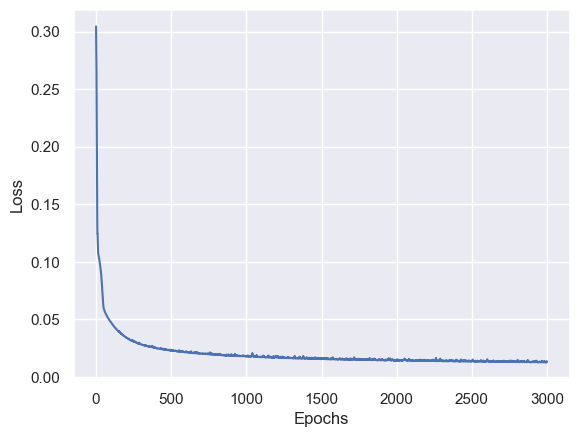

In [22]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

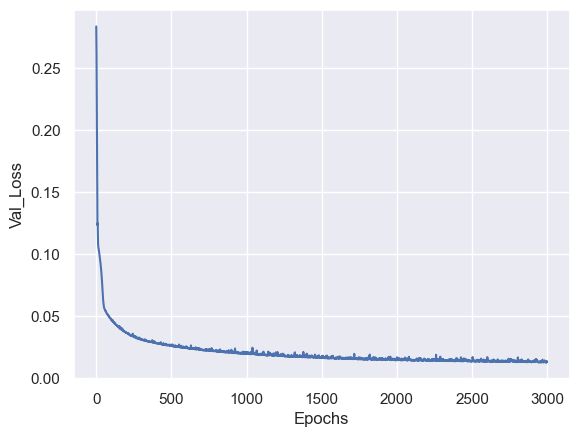

In [23]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [24]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\TEFF-Giants.h5


In [25]:
predTeff = modelTEFF.predict(X_test)

29/29 [==============================] - 0s 2ms/step


In [26]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   5076.3910  2.462577 -0.64994  0.286455   
iDR4_3_SPLUS-n13s41_0009180   4661.0103  2.283069 -0.65882  0.263525   
iDR4_3_SPLUS-n10s38_0040744   5112.4707  3.155548 -0.37395  0.107412   
iDR4_3_MC0144_0019945         4686.0386  2.354824 -1.08280  0.106835   
iDR4_3_MC0104_0015068         4872.6294  2.721983 -0.60433  0.207205   
...                                 ...       ...      ...       ...   
iDR4_3_STRIPE82-0121_0032512  5136.0776  3.450616 -0.29956  0.082639   
iDR4_3_SPLUS-n13s39_0026294   4669.4430  2.567293 -0.39239  0.264245   
iDR4_3_MC0012_0033255         4605.1636  1.937285 -0.89548  0.324855   
iDR4_3_MC0007_0026491         4856.0670  3.345830 -0.18003  0.187565   
iDR4_3_MC0064_0027982         4079.7644  0.625387 -1.30590  0.072274   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   0.163070  0.234775  0.129430  0.083242   
iDR4_3_SPLUS-n13s41_0009180   0.101275  0.192465 -0.033740  0.107442   
iDR4_3_SPLUS-n10s38_0040744   0.139610  0.096045 -0.019042  0.086233   
iDR4_3_MC0144_0019945        -0.585480  0.435095  0.697900  0.011593   
iDR4_3_MC0104_0015068         0.022330  0.096905  0.101630  0.048342   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0121_0032512 -0.026513  0.058640  0.031188  0.077913   
iDR4_3_SPLUS-n13s39_0026294   0.117380  0.209955  0.103899  0.098693   
iDR4_3_MC0012_0033255        -0.085104  0.253205  0.126500 -0.048968   
iDR4_3_MC0007_0026491         0.032666  0.136645  0.198120  0.160586   
iDR4_3_MC0064_0027982        -0.617590  0.109965  0.241680 -0.152607   

                                 MG_FE     SI_FE  teffEncoded  
ID                                                             
iDR4_3_SPLUS-n08s41_0012003   0.348403  0.295031    -0.108452  
iDR4_3_SPLUS-n13s41_0009180   0.395273  0.279741    -0.452541  
iDR4_3_SPLUS-n10s38_0040744   0.153563  0.124811    -0.078564  
iDR4_3_MC0144_0019945         0.118273  0.261021    -0.431809  
iDR4_3_MC0104_0015068         0.299503  0.164061    -0.277242  
...                                ...       ...          ...  
iDR4_3_STRIPE82-0121_0032512  0.148914  0.047462    -0.059009  
iDR4_3_SPLUS-n13s39_0026294   0.345813  0.206691    -0.445556  
iDR4_3_MC0012_0033255         0.332543  0.329831    -0.498803  
iDR4_3_MC0007_0026491         0.251113  0.164741    -0.290962  
iDR4_3_MC0064_0027982         0.035367  0.027662    -0.934029  

[920 rows x 11 columns]

In [27]:
predaux = encoder.decode_DataFrame(predTeff, 'teffApogee')
Y_test['TEFF_PredictDecoded'] = predaux

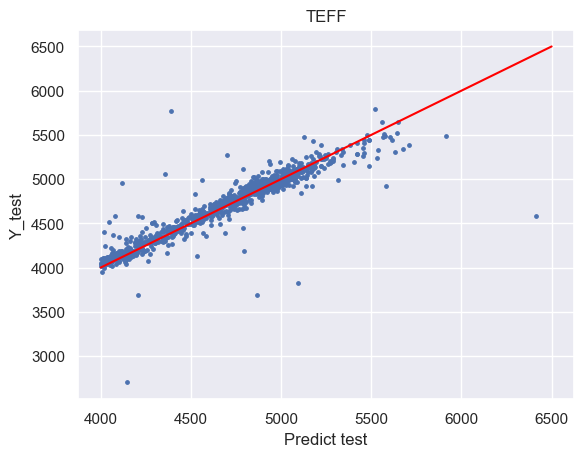

In [28]:
plt.scatter(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 6500], [4000, 6500], c='red')

In [29]:
score = r2_score(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 85.0%


In [30]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   5076.3910  2.462577 -0.64994  0.286455   
iDR4_3_SPLUS-n13s41_0009180   4661.0103  2.283069 -0.65882  0.263525   
iDR4_3_SPLUS-n10s38_0040744   5112.4707  3.155548 -0.37395  0.107412   
iDR4_3_MC0144_0019945         4686.0386  2.354824 -1.08280  0.106835   
iDR4_3_MC0104_0015068         4872.6294  2.721983 -0.60433  0.207205   
...                                 ...       ...      ...       ...   
iDR4_3_STRIPE82-0121_0032512  5136.0776  3.450616 -0.29956  0.082639   
iDR4_3_SPLUS-n13s39_0026294   4669.4430  2.567293 -0.39239  0.264245   
iDR4_3_MC0012_0033255         4605.1636  1.937285 -0.89548  0.324855   
iDR4_3_MC0007_0026491         4856.0670  3.345830 -0.18003  0.187565   
iDR4_3_MC0064_0027982         4079.7644  0.625387 -1.30590  0.072274   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   0.163070  0.234775  0.129430  0.083242   
iDR4_3_SPLUS-n13s41_0009180   0.101275  0.192465 -0.033740  0.107442   
iDR4_3_SPLUS-n10s38_0040744   0.139610  0.096045 -0.019042  0.086233   
iDR4_3_MC0144_0019945        -0.585480  0.435095  0.697900  0.011593   
iDR4_3_MC0104_0015068         0.022330  0.096905  0.101630  0.048342   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0121_0032512 -0.026513  0.058640  0.031188  0.077913   
iDR4_3_SPLUS-n13s39_0026294   0.117380  0.209955  0.103899  0.098693   
iDR4_3_MC0012_0033255        -0.085104  0.253205  0.126500 -0.048968   
iDR4_3_MC0007_0026491         0.032666  0.136645  0.198120  0.160586   
iDR4_3_MC0064_0027982        -0.617590  0.109965  0.241680 -0.152607   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n08s41_0012003   0.348403  0.295031    -0.108452   
iDR4_3_SPLUS-n13s41_0009180   0.395273  0.279741    -0.452541   
iDR4_3_SPLUS-n10s38_0040744   0.153563  0.124811    -0.078564   
iDR4_3_MC0144_0019945         0.118273  0.261021    -0.431809   
iDR4_3_MC0104_0015068         0.299503  0.164061    -0.277242   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0121_0032512  0.148914  0.047462    -0.059009   
iDR4_3_SPLUS-n13s39_0026294   0.345813  0.206691    -0.445556   
iDR4_3_MC0012_0033255         0.332543  0.329831    -0.498803   
iDR4_3_MC0007_0026491         0.251113  0.164741    -0.290962   
iDR4_3_MC0064_0027982         0.035367  0.027662    -0.934029   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n08s41_0012003           5000.965332  
iDR4_3_SPLUS-n13s41_0009180           4735.635742  
iDR4_3_SPLUS-n10s38_0040744           5127.173340  
iDR4_3_MC0144_0019945                 4631.097168  
iDR4_3_MC0104_0015068                 4924.450195  
...                                           ...  
iDR4_3_STRIPE82-0121_0032512          5126.368652  
iDR4_3_SPLUS-n13s39_0026294           4715.510254  
iDR4_3_MC0012_0033255                 4657.793945  
iDR4_3_MC0007_0026491                 4915.444824  
iDR4_3_MC0064_0027982                 4582.555664  

[920 rows x 12 columns]

In [31]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [32]:
Parametro = "LOGG"
columnTrain = 'LOGG'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [33]:
modelLOGG = baseline_model_teste()

In [34]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 6.4869 - val_loss: 6.7480 - 614ms/epoch - 307ms/step
Epoch 2/2000
2/2 - 0s - loss: 6.4683 - val_loss: 6.7302 - 87ms/epoch - 44ms/step
Epoch 3/2000
2/2 - 0s - loss: 6.4510 - val_loss: 6.7134 - 81ms/epoch - 41ms/step
Epoch 4/2000
2/2 - 0s - loss: 6.4346 - val_loss: 6.6967 - 89ms/epoch - 45ms/step
Epoch 5/2000
2/2 - 0s - loss: 6.4183 - val_loss: 6.6784 - 70ms/epoch - 35ms/step
Epoch 6/2000
2/2 - 0s - loss: 6.4004 - val_loss: 6.6582 - 64ms/epoch - 32ms/step
Epoch 7/2000
2/2 - 0s - loss: 6.3806 - val_loss: 6.6353 - 98ms/epoch - 49ms/step
Epoch 8/2000
2/2 - 0s - loss: 6.3581 - val_loss: 6.6086 - 62ms/epoch - 31ms/step
Epoch 9/2000
2/2 - 0s - loss: 6.3319 - val_loss: 6.5779 - 64ms/epoch - 32ms/step
Epoch 10/2000
2/2 - 0s - loss: 6.3019 - val_loss: 6.5427 - 62ms/epoch - 31ms/step
Epoch 11/2000
2/2 - 0s - loss: 6.2673 - val_loss: 6.5017 - 71ms/epoch - 36ms/step
Epoch 12/2000
2/2 - 0s - loss: 6.2272 - val_loss: 6.4541 - 92ms/epoch - 46ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.8057 - val_loss: 0.7548 - 53ms/epoch - 27ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.8025 - val_loss: 0.7504 - 50ms/epoch - 25ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.7990 - val_loss: 0.7457 - 49ms/epoch - 25ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.7955 - val_loss: 0.7408 - 50ms/epoch - 25ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.7926 - val_loss: 0.7360 - 50ms/epoch - 25ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.7895 - val_loss: 0.7319 - 49ms/epoch - 25ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.7859 - val_loss: 0.7298 - 51ms/epoch - 26ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.7816 - val_loss: 0.7300 - 50ms/epoch - 25ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.7777 - val_loss: 0.7289 - 49ms/epoch - 25ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.7746 - val_loss: 0.7239 - 51ms/epoch - 25ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.7703 - val_loss: 0.7164 - 52ms/epoch - 26ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.7652 - val_loss: 0.7084 - 49ms/epoch - 25ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.3905 - val_loss: 0.3360 - 56ms/epoch - 28ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.3922 - val_loss: 0.3366 - 50ms/epoch - 25ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.3896 - val_loss: 0.3379 - 51ms/epoch - 26ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.3879 - val_loss: 0.3353 - 51ms/epoch - 26ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.3884 - val_loss: 0.3344 - 50ms/epoch - 25ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.3884 - val_loss: 0.3333 - 55ms/epoch - 27ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.3863 - val_loss: 0.3380 - 51ms/epoch - 25ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.3872 - val_loss: 0.3346 - 51ms/epoch - 26ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.3857 - val_loss: 0.3306 - 52ms/epoch - 26ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.3847 - val_loss: 0.3301 - 53ms/epoch - 27ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.3837 - val_loss: 0.3325 - 52ms/epoch - 26ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.3830 - val_loss: 0.3370 - 51ms/epoch - 26ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.3354 - val_loss: 0.2947 - 53ms/epoch - 27ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.3338 - val_loss: 0.2916 - 69ms/epoch - 34ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.3330 - val_loss: 0.3002 - 50ms/epoch - 25ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.3342 - val_loss: 0.2924 - 71ms/epoch - 36ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.3316 - val_loss: 0.2908 - 52ms/epoch - 26ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.3307 - val_loss: 0.2926 - 68ms/epoch - 34ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.3297 - val_loss: 0.2893 - 54ms/epoch - 27ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.3295 - val_loss: 0.2889 - 51ms/epoch - 26ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.3282 - val_loss: 0.2878 - 54ms/epoch - 27ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.3273 - val_loss: 0.2854 - 53ms/epoch - 27ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.3270 - val_loss: 0.2841 - 56ms/epoch - 28ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.3267 - val_loss: 0.2860 - 51ms/epoch - 26ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.2709 - val_loss: 0.2471 - 53ms/epoch - 27ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.2692 - val_loss: 0.2412 - 55ms/epoch - 28ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.2665 - val_loss: 0.2395 - 53ms/epoch - 27ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.2710 - val_loss: 0.2459 - 50ms/epoch - 25ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.2670 - val_loss: 0.2395 - 54ms/epoch - 27ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.2644 - val_loss: 0.2371 - 49ms/epoch - 25ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.2653 - val_loss: 0.2472 - 51ms/epoch - 26ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.2665 - val_loss: 0.2366 - 52ms/epoch - 26ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.2630 - val_loss: 0.2445 - 86ms/epoch - 43ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.2642 - val_loss: 0.2365 - 73ms/epoch - 37ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.2645 - val_loss: 0.2359 - 63ms/epoch - 32ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.2625 - val_loss: 0.2765 - 72ms/epoch - 36ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.2060 - val_loss: 0.1967 - 48ms/epoch - 24ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.2052 - val_loss: 0.1960 - 49ms/epoch - 25ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.2045 - val_loss: 0.1963 - 48ms/epoch - 24ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.2036 - val_loss: 0.1945 - 47ms/epoch - 23ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.2077 - val_loss: 0.1942 - 50ms/epoch - 25ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.2037 - val_loss: 0.2021 - 49ms/epoch - 25ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.2044 - val_loss: 0.1968 - 50ms/epoch - 25ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.2074 - val_loss: 0.1932 - 53ms/epoch - 27ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.2004 - val_loss: 0.1924 - 49ms/epoch - 25ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.2005 - val_loss: 0.1945 - 71ms/epoch - 36ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.1997 - val_loss: 0.1929 - 65ms/epoch - 33ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.1988 - val_loss: 0.1934 - 53ms/epoch - 27ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.1682 - val_loss: 0.1634 - 51ms/epoch - 26ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.1688 - val_loss: 0.1670 - 52ms/epoch - 26ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.1688 - val_loss: 0.1618 - 52ms/epoch - 26ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.1680 - val_loss: 0.1652 - 50ms/epoch - 25ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.1671 - val_loss: 0.1702 - 54ms/epoch - 27ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.1759 - val_loss: 0.1816 - 50ms/epoch - 25ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.1755 - val_loss: 0.1677 - 51ms/epoch - 26ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.1695 - val_loss: 0.1711 - 51ms/epoch - 26ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.1667 - val_loss: 0.1702 - 51ms/epoch - 26ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.1720 - val_loss: 0.1787 - 55ms/epoch - 28ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.1711 - val_loss: 0.1800 - 54ms/epoch - 27ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.1823 - val_loss: 0.1840 - 50ms/epoch - 25ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.1493 - val_loss: 0.1502 - 54ms/epoch - 27ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.1487 - val_loss: 0.1521 - 53ms/epoch - 27ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.1479 - val_loss: 0.1507 - 50ms/epoch - 25ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.1473 - val_loss: 0.1581 - 50ms/epoch - 25ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.1510 - val_loss: 0.1523 - 51ms/epoch - 26ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.1524 - val_loss: 0.1483 - 54ms/epoch - 27ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.1472 - val_loss: 0.1508 - 55ms/epoch - 28ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.1477 - val_loss: 0.1541 - 52ms/epoch - 26ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.1551 - val_loss: 0.1488 - 55ms/epoch - 27ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.1459 - val_loss: 0.1487 - 50ms/epoch - 25ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.1470 - val_loss: 0.1502 - 51ms/epoch - 26ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.1462 - val_loss: 0.1628 - 51ms/epoch - 26ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.1435 - val_loss: 0.1477 - 52ms/epoch - 26ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.1410 - val_loss: 0.1466 - 54ms/epoch - 27ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.1401 - val_loss: 0.1442 - 52ms/epoch - 26ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.1410 - val_loss: 0.1430 - 51ms/epoch - 26ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.1406 - val_loss: 0.1501 - 51ms/epoch - 26ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.1439 - val_loss: 0.1448 - 55ms/epoch - 28ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.1393 - val_loss: 0.1465 - 52ms/epoch - 26ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.1397 - val_loss: 0.1451 - 53ms/epoch - 27ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.1396 - val_loss: 0.1458 - 53ms/epoch - 27ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.1397 - val_loss: 0.1457 - 53ms/epoch - 27ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.1393 - val_loss: 0.1465 - 52ms/epoch - 26ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.1389 - val_loss: 0.1519 - 51ms/epoch - 26ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.1342 - val_loss: 0.1439 - 53ms/epoch - 27ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.1341 - val_loss: 0.1408 - 54ms/epoch - 27ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.1354 - val_loss: 0.1386 - 52ms/epoch - 26ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.1348 - val_loss: 0.1472 - 51ms/epoch - 26ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.1393 - val_loss: 0.1388 - 55ms/epoch - 28ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.1343 - val_loss: 0.1426 - 53ms/epoch - 26ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.1357 - val_loss: 0.1732 - 57ms/epoch - 29ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.1572 - val_loss: 0.1525 - 53ms/epoch - 27ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.1511 - val_loss: 0.1511 - 56ms/epoch - 28ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.1439 - val_loss: 0.1558 - 47ms/epoch - 24ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.1420 - val_loss: 0.1425 - 51ms/epoch - 25ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.1360 - val_loss: 0.1503 - 53ms/epoch - 27ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.1305 - val_loss: 0.1480 - 49ms/epoch - 25ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.1424 - val_loss: 0.1463 - 52ms/epoch - 26ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.1348 - val_loss: 0.1445 - 52ms/epoch - 26ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.1404 - val_loss: 0.1455 - 57ms/epoch - 29ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.1367 - val_loss: 0.1402 - 52ms/epoch - 26ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.1314 - val_loss: 0.1390 - 54ms/epoch - 27ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.1338 - val_loss: 0.1785 - 50ms/epoch - 25ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.1627 - val_loss: 0.1561 - 52ms/epoch - 26ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.1539 - val_loss: 0.1383 - 54ms/epoch - 27ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.1302 - val_loss: 0.1371 - 54ms/epoch - 27ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.1301 - val_loss: 0.1364 - 55ms/epoch - 27ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.1319 - val_loss: 0.1357 - 50ms/epoch - 25ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.1345 - val_loss: 0.1474 - 53ms/epoch - 27ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.1342 - val_loss: 0.1514 - 50ms/epoch - 25ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.1472 - val_loss: 0.1359 - 50ms/epoch - 25ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.1298 - val_loss: 0.1540 - 51ms/epoch - 26ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.1424 - val_loss: 0.1506 - 50ms/epoch - 25ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.1485 - val_loss: 0.1492 - 56ms/epoch - 28ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.1384 - val_loss: 0.1390 - 55ms/epoch - 28ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.1327 - val_loss: 0.1367 - 52ms/epoch - 26ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.1292 - val_loss: 0.1442 - 54ms/epoch - 27ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.1338 - val_loss: 0.1507 - 52ms/epoch - 26ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.1461 - val_loss: 0.1418 - 51ms/epoch - 26ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.1314 - val_loss: 0.1365 - 51ms/epoch - 26

Epoch 1188/2000
2/2 - 0s - loss: 0.1348 - val_loss: 0.1337 - 69ms/epoch - 35ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.1270 - val_loss: 0.1333 - 53ms/epoch - 27ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.1261 - val_loss: 0.1315 - 53ms/epoch - 27ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.1259 - val_loss: 0.1337 - 53ms/epoch - 27ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.1254 - val_loss: 0.1318 - 55ms/epoch - 28ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.1269 - val_loss: 0.1313 - 55ms/epoch - 28ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.1245 - val_loss: 0.1300 - 56ms/epoch - 28ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.1245 - val_loss: 0.1327 - 57ms/epoch - 29ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.1253 - val_loss: 0.1319 - 52ms/epoch - 26ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.1246 - val_loss: 0.1319 - 54ms/epoch - 27ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.1242 - val_loss: 0.1341 - 56ms/epoch - 28ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.1246 - val_loss: 0.1336 - 54ms/epoch - 27

Epoch 1286/2000
2/2 - 0s - loss: 0.1235 - val_loss: 0.1353 - 40ms/epoch - 20ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.1247 - val_loss: 0.1359 - 38ms/epoch - 19ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.1267 - val_loss: 0.1535 - 39ms/epoch - 19ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.1365 - val_loss: 0.1353 - 39ms/epoch - 20ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.1229 - val_loss: 0.1339 - 40ms/epoch - 20ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.1231 - val_loss: 0.1330 - 38ms/epoch - 19ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.1229 - val_loss: 0.1374 - 40ms/epoch - 20ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.1302 - val_loss: 0.1401 - 40ms/epoch - 20ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.1293 - val_loss: 0.1332 - 40ms/epoch - 20ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.1291 - val_loss: 0.1368 - 39ms/epoch - 20ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.1279 - val_loss: 0.1345 - 39ms/epoch - 20ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.1246 - val_loss: 0.1446 - 40ms/epoch - 20

Epoch 1384/2000
2/2 - 0s - loss: 0.1221 - val_loss: 0.1379 - 46ms/epoch - 23ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.1277 - val_loss: 0.1293 - 44ms/epoch - 22ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.1216 - val_loss: 0.1302 - 44ms/epoch - 22ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.1213 - val_loss: 0.1308 - 46ms/epoch - 23ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.1212 - val_loss: 0.1359 - 46ms/epoch - 23ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.1247 - val_loss: 0.1314 - 47ms/epoch - 24ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.1248 - val_loss: 0.1320 - 46ms/epoch - 23ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.1227 - val_loss: 0.1297 - 69ms/epoch - 34ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.1219 - val_loss: 0.1315 - 46ms/epoch - 23ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.1255 - val_loss: 0.1720 - 70ms/epoch - 35ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.1549 - val_loss: 0.1299 - 48ms/epoch - 24ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.1249 - val_loss: 0.1317 - 70ms/epoch - 35

Epoch 1482/2000
2/2 - 0s - loss: 0.1217 - val_loss: 0.1375 - 52ms/epoch - 26ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.1309 - val_loss: 0.1351 - 53ms/epoch - 27ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1298 - 50ms/epoch - 25ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.1234 - val_loss: 0.1328 - 51ms/epoch - 26ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.1274 - val_loss: 0.1584 - 48ms/epoch - 24ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.1427 - val_loss: 0.1412 - 54ms/epoch - 27ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.1346 - val_loss: 0.1492 - 50ms/epoch - 25ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.1354 - val_loss: 0.1299 - 50ms/epoch - 25ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.1217 - val_loss: 0.1297 - 49ms/epoch - 25ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.1203 - val_loss: 0.1307 - 49ms/epoch - 25ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.1214 - val_loss: 0.1423 - 53ms/epoch - 27ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.1369 - val_loss: 0.1453 - 51ms/epoch - 26

Epoch 1580/2000
2/2 - 0s - loss: 0.1201 - val_loss: 0.1356 - 53ms/epoch - 27ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.1244 - val_loss: 0.1259 - 52ms/epoch - 26ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.1188 - val_loss: 0.1258 - 52ms/epoch - 26ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.1191 - val_loss: 0.1318 - 54ms/epoch - 27ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.1263 - val_loss: 0.1383 - 54ms/epoch - 27ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.1289 - val_loss: 0.1257 - 54ms/epoch - 27ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.1203 - val_loss: 0.1457 - 55ms/epoch - 28ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.1403 - val_loss: 0.1601 - 51ms/epoch - 25ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.1435 - val_loss: 0.1347 - 53ms/epoch - 27ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.1292 - val_loss: 0.1303 - 53ms/epoch - 26ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.1207 - val_loss: 0.1438 - 55ms/epoch - 28ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.1277 - val_loss: 0.1309 - 55ms/epoch - 28

Epoch 1678/2000
2/2 - 0s - loss: 0.1343 - val_loss: 0.1426 - 53ms/epoch - 27ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.1399 - val_loss: 0.1298 - 56ms/epoch - 28ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.1208 - val_loss: 0.1249 - 53ms/epoch - 27ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.1199 - val_loss: 0.1253 - 50ms/epoch - 25ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.1190 - val_loss: 0.1406 - 54ms/epoch - 27ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.1269 - val_loss: 0.1325 - 49ms/epoch - 25ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.1265 - val_loss: 0.1548 - 50ms/epoch - 25ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.1372 - val_loss: 0.1353 - 55ms/epoch - 28ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.1318 - val_loss: 0.1262 - 54ms/epoch - 27ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.1192 - val_loss: 0.1346 - 50ms/epoch - 25ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.1239 - val_loss: 0.1279 - 53ms/epoch - 27ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.1240 - val_loss: 0.1412 - 55ms/epoch - 28

Epoch 1776/2000
2/2 - 0s - loss: 0.1192 - val_loss: 0.1330 - 53ms/epoch - 27ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.1215 - val_loss: 0.1271 - 51ms/epoch - 26ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.1178 - val_loss: 0.1268 - 53ms/epoch - 27ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.1190 - val_loss: 0.1269 - 51ms/epoch - 26ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.1178 - val_loss: 0.1278 - 50ms/epoch - 25ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.1241 - val_loss: 0.1242 - 50ms/epoch - 25ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.1181 - val_loss: 0.1347 - 60ms/epoch - 30ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.1247 - val_loss: 0.1233 - 56ms/epoch - 28ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.1178 - val_loss: 0.1270 - 54ms/epoch - 27ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.1241 - val_loss: 0.1240 - 56ms/epoch - 28ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.1169 - val_loss: 0.1255 - 55ms/epoch - 28ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.1169 - val_loss: 0.1265 - 56ms/epoch - 28

Epoch 1874/2000
2/2 - 0s - loss: 0.1198 - val_loss: 0.1231 - 51ms/epoch - 26ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.1177 - val_loss: 0.1291 - 52ms/epoch - 26ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.1196 - val_loss: 0.1244 - 51ms/epoch - 25ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.1159 - val_loss: 0.1309 - 49ms/epoch - 25ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.1192 - val_loss: 0.1270 - 50ms/epoch - 25ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.1162 - val_loss: 0.1275 - 55ms/epoch - 28ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.1164 - val_loss: 0.1261 - 52ms/epoch - 26ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.1164 - val_loss: 0.1238 - 51ms/epoch - 26ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.1168 - val_loss: 0.1302 - 52ms/epoch - 26ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.1210 - val_loss: 0.1278 - 51ms/epoch - 26ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.1241 - val_loss: 0.1446 - 51ms/epoch - 25ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.1309 - val_loss: 0.1330 - 48ms/epoch - 24

Epoch 1972/2000
2/2 - 0s - loss: 0.1284 - val_loss: 0.1238 - 43ms/epoch - 22ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.1170 - val_loss: 0.1258 - 47ms/epoch - 23ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.1170 - val_loss: 0.1254 - 48ms/epoch - 24ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.1166 - val_loss: 0.1224 - 50ms/epoch - 25ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.1162 - val_loss: 0.1235 - 47ms/epoch - 24ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.1155 - val_loss: 0.1236 - 47ms/epoch - 23ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.1165 - val_loss: 0.1238 - 46ms/epoch - 23ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.1160 - val_loss: 0.1257 - 48ms/epoch - 24ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.1163 - val_loss: 0.1235 - 46ms/epoch - 23ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.1153 - val_loss: 0.1225 - 49ms/epoch - 25ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.1163 - val_loss: 0.1223 - 48ms/epoch - 24ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.1153 - val_loss: 0.1231 - 47ms/epoch - 24

Text(0, 0.5, 'Loss')

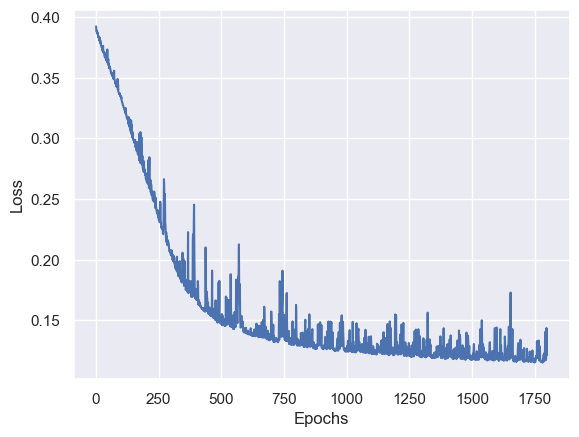

In [35]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][200:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

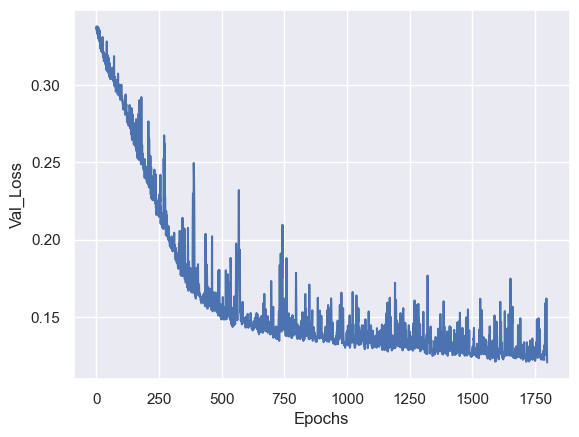

In [36]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][200:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [37]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\LOGG-Giants.h5


In [38]:
predlogg = modelLOGG.predict(X_test)

29/29 [==============================] - 0s 2ms/step


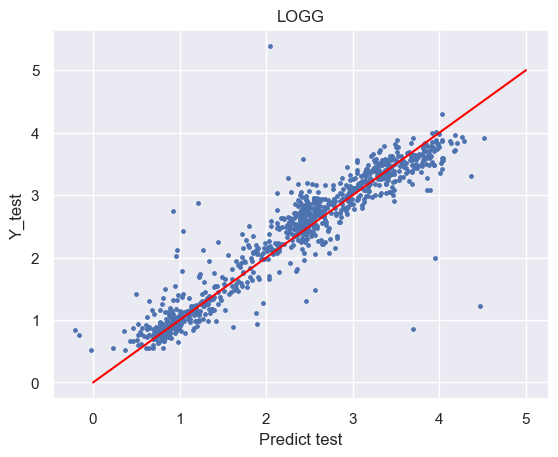

In [39]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

In [40]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 89.0%


In [41]:
Y_test['LOGG_Predict'] = predlogg

In [42]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   5076.3910  2.462577 -0.64994  0.286455   
iDR4_3_SPLUS-n13s41_0009180   4661.0103  2.283069 -0.65882  0.263525   
iDR4_3_SPLUS-n10s38_0040744   5112.4707  3.155548 -0.37395  0.107412   
iDR4_3_MC0144_0019945         4686.0386  2.354824 -1.08280  0.106835   
iDR4_3_MC0104_0015068         4872.6294  2.721983 -0.60433  0.207205   
...                                 ...       ...      ...       ...   
iDR4_3_STRIPE82-0121_0032512  5136.0776  3.450616 -0.29956  0.082639   
iDR4_3_SPLUS-n13s39_0026294   4669.4430  2.567293 -0.39239  0.264245   
iDR4_3_MC0012_0033255         4605.1636  1.937285 -0.89548  0.324855   
iDR4_3_MC0007_0026491         4856.0670  3.345830 -0.18003  0.187565   
iDR4_3_MC0064_0027982         4079.7644  0.625387 -1.30590  0.072274   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   0.163070  0.234775  0.129430  0.083242   
iDR4_3_SPLUS-n13s41_0009180   0.101275  0.192465 -0.033740  0.107442   
iDR4_3_SPLUS-n10s38_0040744   0.139610  0.096045 -0.019042  0.086233   
iDR4_3_MC0144_0019945        -0.585480  0.435095  0.697900  0.011593   
iDR4_3_MC0104_0015068         0.022330  0.096905  0.101630  0.048342   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0121_0032512 -0.026513  0.058640  0.031188  0.077913   
iDR4_3_SPLUS-n13s39_0026294   0.117380  0.209955  0.103899  0.098693   
iDR4_3_MC0012_0033255        -0.085104  0.253205  0.126500 -0.048968   
iDR4_3_MC0007_0026491         0.032666  0.136645  0.198120  0.160586   
iDR4_3_MC0064_0027982        -0.617590  0.109965  0.241680 -0.152607   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n08s41_0012003   0.348403  0.295031    -0.108452   
iDR4_3_SPLUS-n13s41_0009180   0.395273  0.279741    -0.452541   
iDR4_3_SPLUS-n10s38_0040744   0.153563  0.124811    -0.078564   
iDR4_3_MC0144_0019945         0.118273  0.261021    -0.431809   
iDR4_3_MC0104_0015068         0.299503  0.164061    -0.277242   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0121_0032512  0.148914  0.047462    -0.059009   
iDR4_3_SPLUS-n13s39_0026294   0.345813  0.206691    -0.445556   
iDR4_3_MC0012_0033255         0.332543  0.329831    -0.498803   
iDR4_3_MC0007_0026491         0.251113  0.164741    -0.290962   
iDR4_3_MC0064_0027982         0.035367  0.027662    -0.934029   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n08s41_0012003           5000.965332      2.694890  
iDR4_3_SPLUS-n13s41_0009180           4735.635742      2.570528  
iDR4_3_SPLUS-n10s38_0040744           5127.173340      3.416358  
iDR4_3_MC0144_0019945                 4631.097168      1.818751  
iDR4_3_MC0104_0015068                 4924.450195      2.888168  
...                                           ...           ...  
iDR4_3_STRIPE82-0121_0032512          5126.368652      3.122426  
iDR4_3_SPLUS-n13s39_0026294           4715.510254      2.692698  
iDR4_3_MC0012_0033255                 4657.793945      2.043849  
iDR4_3_MC0007_0026491                 4915.444824      3.356082  
iDR4_3_MC0064_0027982                 4582.555664      1.041489  

[920 rows x 13 columns]

In [43]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [44]:
Parametro = "FEH"
columnTrain = 'FE_H'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [45]:
modelFEH = baseline_model_teste()

In [46]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.6344 - val_loss: 0.6054 - 569ms/epoch - 285ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.6271 - val_loss: 0.5989 - 80ms/epoch - 40ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.6202 - val_loss: 0.5925 - 73ms/epoch - 37ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.6134 - val_loss: 0.5857 - 84ms/epoch - 42ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.6063 - val_loss: 0.5784 - 85ms/epoch - 43ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.5985 - val_loss: 0.5702 - 73ms/epoch - 36ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.5898 - val_loss: 0.5610 - 66ms/epoch - 33ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.5801 - val_loss: 0.5502 - 77ms/epoch - 38ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.5686 - val_loss: 0.5378 - 69ms/epoch - 34ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.5555 - val_loss: 0.5237 - 62ms/epoch - 31ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.5404 - val_loss: 0.5074 - 65ms/epoch - 33ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.5230 - val_loss: 0.4889 - 63ms/epoch - 32ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.2344 - val_loss: 0.2477 - 48ms/epoch - 24ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.2342 - val_loss: 0.2472 - 47ms/epoch - 24ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.2341 - val_loss: 0.2468 - 50ms/epoch - 25ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.2339 - val_loss: 0.2468 - 48ms/epoch - 24ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.2337 - val_loss: 0.2467 - 48ms/epoch - 24ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.2334 - val_loss: 0.2464 - 48ms/epoch - 24ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.2332 - val_loss: 0.2462 - 50ms/epoch - 25ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.2330 - val_loss: 0.2459 - 47ms/epoch - 24ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.2328 - val_loss: 0.2456 - 48ms/epoch - 24ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.2327 - val_loss: 0.2453 - 48ms/epoch - 24ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.2325 - val_loss: 0.2451 - 48ms/epoch - 24ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.2323 - val_loss: 0.2451 - 49ms/epoch - 24ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.1936 - val_loss: 0.1975 - 49ms/epoch - 25ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.1919 - val_loss: 0.1955 - 49ms/epoch - 25ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.1906 - val_loss: 0.1947 - 53ms/epoch - 27ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.1890 - val_loss: 0.1924 - 51ms/epoch - 26ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.1877 - val_loss: 0.1909 - 52ms/epoch - 26ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.1870 - val_loss: 0.1903 - 51ms/epoch - 26ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.1844 - val_loss: 0.1874 - 51ms/epoch - 26ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.1829 - val_loss: 0.1882 - 54ms/epoch - 27ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.1823 - val_loss: 0.1832 - 50ms/epoch - 25ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.1786 - val_loss: 0.1814 - 50ms/epoch - 25ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.1793 - val_loss: 0.1810 - 51ms/epoch - 26ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.1755 - val_loss: 0.1756 - 50ms/epoch - 25ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0945 - val_loss: 0.1079 - 51ms/epoch - 26ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0969 - val_loss: 0.1090 - 52ms/epoch - 26ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0927 - val_loss: 0.1098 - 52ms/epoch - 26ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0928 - val_loss: 0.1073 - 51ms/epoch - 26ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0927 - val_loss: 0.1118 - 52ms/epoch - 26ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0924 - val_loss: 0.1089 - 50ms/epoch - 25ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0933 - val_loss: 0.1177 - 52ms/epoch - 26ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0953 - val_loss: 0.1086 - 52ms/epoch - 26ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0930 - val_loss: 0.1109 - 50ms/epoch - 25ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0920 - val_loss: 0.1071 - 53ms/epoch - 27ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0916 - val_loss: 0.1069 - 52ms/epoch - 26ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0913 - val_loss: 0.1091 - 51ms/epoch - 26ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0865 - val_loss: 0.1012 - 50ms/epoch - 25ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0860 - val_loss: 0.1059 - 54ms/epoch - 27ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0864 - val_loss: 0.1023 - 48ms/epoch - 24ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0862 - val_loss: 0.1025 - 51ms/epoch - 26ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0854 - val_loss: 0.1040 - 52ms/epoch - 26ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0856 - val_loss: 0.1011 - 49ms/epoch - 25ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0852 - val_loss: 0.1042 - 51ms/epoch - 26ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0858 - val_loss: 0.1010 - 52ms/epoch - 26ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0857 - val_loss: 0.1031 - 48ms/epoch - 24ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0851 - val_loss: 0.1017 - 54ms/epoch - 27ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0855 - val_loss: 0.1013 - 50ms/epoch - 25ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0859 - val_loss: 0.1018 - 53ms/epoch - 27ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0800 - val_loss: 0.0947 - 55ms/epoch - 28ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0803 - val_loss: 0.0956 - 53ms/epoch - 27ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0800 - val_loss: 0.0979 - 55ms/epoch - 27ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0806 - val_loss: 0.0949 - 54ms/epoch - 27ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0804 - val_loss: 0.0997 - 50ms/epoch - 25ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0807 - val_loss: 0.0972 - 51ms/epoch - 26ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0792 - val_loss: 0.0974 - 50ms/epoch - 25ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0798 - val_loss: 0.1057 - 52ms/epoch - 26ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0818 - val_loss: 0.0962 - 52ms/epoch - 26ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0805 - val_loss: 0.1069 - 50ms/epoch - 25ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0843 - val_loss: 0.0942 - 51ms/epoch - 26ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0805 - val_loss: 0.0952 - 52ms/epoch - 26ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0743 - val_loss: 0.0909 - 52ms/epoch - 26ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0743 - val_loss: 0.0881 - 54ms/epoch - 27ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0736 - val_loss: 0.0976 - 52ms/epoch - 26ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0769 - val_loss: 0.0901 - 50ms/epoch - 25ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0782 - val_loss: 0.1015 - 52ms/epoch - 26ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0803 - val_loss: 0.0887 - 52ms/epoch - 26ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0755 - val_loss: 0.0944 - 52ms/epoch - 26ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0751 - val_loss: 0.0894 - 53ms/epoch - 27ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0745 - val_loss: 0.0908 - 55ms/epoch - 27ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0738 - val_loss: 0.0870 - 53ms/epoch - 27ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0743 - val_loss: 0.0930 - 50ms/epoch - 25ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0759 - val_loss: 0.0872 - 50ms/epoch - 25ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0699 - val_loss: 0.0869 - 51ms/epoch - 26ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0697 - val_loss: 0.0852 - 69ms/epoch - 35ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0702 - val_loss: 0.0835 - 56ms/epoch - 28ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0698 - val_loss: 0.0851 - 69ms/epoch - 34ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0703 - val_loss: 0.0820 - 52ms/epoch - 26ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0724 - val_loss: 0.0916 - 53ms/epoch - 27ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0727 - val_loss: 0.0867 - 54ms/epoch - 27ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0761 - val_loss: 0.0950 - 52ms/epoch - 26ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0729 - val_loss: 0.0933 - 56ms/epoch - 28ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0828 - val_loss: 0.1082 - 53ms/epoch - 27ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0816 - val_loss: 0.0892 - 103ms/epoch - 51ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0765 - val_loss: 0.1005 - 53ms/epoch - 26ms/step
Epo

Epoch 794/2000
2/2 - 0s - loss: 0.0666 - val_loss: 0.0868 - 52ms/epoch - 26ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0670 - val_loss: 0.0814 - 51ms/epoch - 26ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0667 - val_loss: 0.0797 - 51ms/epoch - 26ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0674 - val_loss: 0.0862 - 49ms/epoch - 25ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0677 - val_loss: 0.0821 - 52ms/epoch - 26ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0684 - val_loss: 0.0868 - 49ms/epoch - 25ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0680 - val_loss: 0.0809 - 55ms/epoch - 28ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0660 - val_loss: 0.0819 - 51ms/epoch - 26ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0660 - val_loss: 0.0816 - 51ms/epoch - 26ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0661 - val_loss: 0.0820 - 52ms/epoch - 26ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0675 - val_loss: 0.0836 - 53ms/epoch - 27ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0663 - val_loss: 0.0796 - 52ms/epoch - 26ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0656 - val_loss: 0.0744 - 46ms/epoch - 23ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0648 - val_loss: 0.0826 - 54ms/epoch - 27ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0651 - val_loss: 0.0799 - 50ms/epoch - 25ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0650 - val_loss: 0.0789 - 51ms/epoch - 26ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0664 - val_loss: 0.0850 - 61ms/epoch - 31ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0661 - val_loss: 0.0807 - 49ms/epoch - 25ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0662 - val_loss: 0.0797 - 53ms/epoch - 27ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0639 - val_loss: 0.0823 - 50ms/epoch - 25ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0656 - val_loss: 0.0781 - 52ms/epoch - 26ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0673 - val_loss: 0.0850 - 51ms/epoch - 26ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0655 - val_loss: 0.0842 - 50ms/epoch - 25ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0644 - val_loss: 0.0831 - 51ms/epoch - 25ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0648 - val_loss: 0.0784 - 49ms/epoch - 25ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0642 - val_loss: 0.0764 - 53ms/epoch - 27ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0626 - val_loss: 0.0759 - 50ms/epoch - 25ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0635 - val_loss: 0.0726 - 51ms/epoch - 26ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0634 - val_loss: 0.0777 - 53ms/epoch - 27ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0628 - val_loss: 0.0759 - 48ms/epoch - 24ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0628 - val_loss: 0.0804 - 53ms/epoch - 27ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0640 - val_loss: 0.0753 - 50ms/epoch - 25ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0622 - val_loss: 0.0784 - 53ms/epoch - 26ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0622 - val_loss: 0.0768 - 53ms/epoch - 27ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0622 - val_loss: 0.0758 - 53ms/epoch - 27ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0620 - val_loss: 0.0763 - 52ms/epoch - 26ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.0615 - val_loss: 0.0731 - 51ms/epoch - 26ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0609 - val_loss: 0.0737 - 52ms/epoch - 26ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0610 - val_loss: 0.0740 - 54ms/epoch - 27ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0765 - 52ms/epoch - 26ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0608 - val_loss: 0.0832 - 53ms/epoch - 27ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0625 - val_loss: 0.0758 - 50ms/epoch - 25ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0633 - val_loss: 0.0793 - 50ms/epoch - 25ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0623 - val_loss: 0.0748 - 55ms/epoch - 28ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0661 - val_loss: 0.0837 - 52ms/epoch - 26ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0654 - val_loss: 0.0730 - 52ms/epoch - 26ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0647 - val_loss: 0.0755 - 53ms/epoch - 26ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0621 - val_loss: 0.0753 - 53ms/epoch - 27

Epoch 1188/2000
2/2 - 0s - loss: 0.0599 - val_loss: 0.0739 - 48ms/epoch - 24ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0602 - val_loss: 0.0749 - 50ms/epoch - 25ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0597 - val_loss: 0.0725 - 51ms/epoch - 26ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0603 - val_loss: 0.0759 - 49ms/epoch - 25ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0601 - val_loss: 0.0755 - 49ms/epoch - 25ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0619 - val_loss: 0.0814 - 49ms/epoch - 25ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0614 - val_loss: 0.0724 - 51ms/epoch - 26ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0604 - val_loss: 0.0795 - 48ms/epoch - 24ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0627 - val_loss: 0.0730 - 48ms/epoch - 24ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0620 - val_loss: 0.0799 - 47ms/epoch - 24ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0619 - val_loss: 0.0743 - 48ms/epoch - 24ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0595 - val_loss: 0.0726 - 46ms/epoch - 23

Epoch 1286/2000
2/2 - 0s - loss: 0.0665 - val_loss: 0.0752 - 46ms/epoch - 23ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0669 - val_loss: 0.0743 - 47ms/epoch - 24ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0599 - val_loss: 0.0708 - 48ms/epoch - 24ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0596 - val_loss: 0.0740 - 49ms/epoch - 25ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0594 - val_loss: 0.0794 - 48ms/epoch - 24ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0747 - 47ms/epoch - 24ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0634 - val_loss: 0.0778 - 48ms/epoch - 24ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0614 - val_loss: 0.0705 - 58ms/epoch - 29ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0603 - val_loss: 0.0735 - 50ms/epoch - 25ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0591 - val_loss: 0.0725 - 48ms/epoch - 24ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0589 - val_loss: 0.0694 - 49ms/epoch - 25ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0590 - val_loss: 0.0739 - 47ms/epoch - 24

Epoch 1384/2000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0765 - 61ms/epoch - 31ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0696 - 65ms/epoch - 33ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0744 - 56ms/epoch - 28ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0588 - val_loss: 0.0688 - 58ms/epoch - 29ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0722 - 64ms/epoch - 32ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0588 - val_loss: 0.0700 - 64ms/epoch - 32ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0580 - val_loss: 0.0762 - 56ms/epoch - 28ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0602 - val_loss: 0.0693 - 55ms/epoch - 27ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0597 - val_loss: 0.0727 - 68ms/epoch - 34ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0590 - val_loss: 0.0713 - 91ms/epoch - 46ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0576 - val_loss: 0.0757 - 71ms/epoch - 35ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0589 - val_loss: 0.0708 - 75ms/epoch - 37

Epoch 1482/2000
2/2 - 0s - loss: 0.0631 - val_loss: 0.0709 - 45ms/epoch - 22ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0640 - val_loss: 0.0847 - 43ms/epoch - 22ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0670 - val_loss: 0.0688 - 41ms/epoch - 21ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0610 - val_loss: 0.0782 - 41ms/epoch - 20ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0608 - val_loss: 0.0694 - 42ms/epoch - 21ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0600 - val_loss: 0.0707 - 41ms/epoch - 21ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0672 - 41ms/epoch - 20ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0691 - 41ms/epoch - 20ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0786 - 41ms/epoch - 21ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0607 - val_loss: 0.0715 - 42ms/epoch - 21ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0582 - val_loss: 0.0700 - 42ms/epoch - 21ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0576 - val_loss: 0.0677 - 41ms/epoch - 20

Epoch 1580/2000
2/2 - 0s - loss: 0.0615 - val_loss: 0.0695 - 58ms/epoch - 29ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0591 - val_loss: 0.0677 - 57ms/epoch - 29ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0586 - val_loss: 0.0733 - 57ms/epoch - 29ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0747 - 60ms/epoch - 30ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0607 - val_loss: 0.0765 - 59ms/epoch - 30ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0687 - 53ms/epoch - 27ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0572 - val_loss: 0.0717 - 48ms/epoch - 24ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0674 - 47ms/epoch - 24ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0588 - val_loss: 0.0723 - 46ms/epoch - 23ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0577 - val_loss: 0.0690 - 46ms/epoch - 23ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0727 - 47ms/epoch - 23ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0578 - val_loss: 0.0670 - 47ms/epoch - 23

Epoch 1678/2000
2/2 - 0s - loss: 0.0561 - val_loss: 0.0679 - 62ms/epoch - 31ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0559 - val_loss: 0.0673 - 65ms/epoch - 32ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0555 - val_loss: 0.0672 - 65ms/epoch - 33ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0557 - val_loss: 0.0721 - 69ms/epoch - 35ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0566 - val_loss: 0.0692 - 53ms/epoch - 26ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0558 - val_loss: 0.0687 - 52ms/epoch - 26ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0734 - 45ms/epoch - 23ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0578 - val_loss: 0.0692 - 46ms/epoch - 23ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0584 - val_loss: 0.0754 - 46ms/epoch - 23ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0579 - val_loss: 0.0681 - 46ms/epoch - 23ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0598 - val_loss: 0.0727 - 46ms/epoch - 23ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0582 - val_loss: 0.0665 - 46ms/epoch - 23

Epoch 1776/2000
2/2 - 0s - loss: 0.0573 - val_loss: 0.0679 - 39ms/epoch - 20ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0599 - val_loss: 0.0771 - 38ms/epoch - 19ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0604 - val_loss: 0.0662 - 38ms/epoch - 19ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0575 - val_loss: 0.0738 - 38ms/epoch - 19ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0588 - val_loss: 0.0695 - 39ms/epoch - 19ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0688 - 39ms/epoch - 20ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0570 - val_loss: 0.0720 - 38ms/epoch - 19ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0684 - 38ms/epoch - 19ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0623 - val_loss: 0.0818 - 39ms/epoch - 19ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0642 - val_loss: 0.0695 - 39ms/epoch - 20ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0635 - val_loss: 0.0776 - 38ms/epoch - 19ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0606 - val_loss: 0.0683 - 38ms/epoch - 19

Epoch 1874/2000
2/2 - 0s - loss: 0.0586 - val_loss: 0.0679 - 43ms/epoch - 22ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0560 - val_loss: 0.0697 - 49ms/epoch - 25ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0557 - val_loss: 0.0698 - 48ms/epoch - 24ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0763 - 46ms/epoch - 23ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0575 - val_loss: 0.0653 - 45ms/epoch - 23ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0738 - 45ms/epoch - 23ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0604 - val_loss: 0.0635 - 46ms/epoch - 23ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0574 - val_loss: 0.0686 - 46ms/epoch - 23ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0558 - val_loss: 0.0694 - 45ms/epoch - 23ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0551 - val_loss: 0.0670 - 44ms/epoch - 22ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0570 - val_loss: 0.0704 - 45ms/epoch - 23ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0655 - 44ms/epoch - 22

Epoch 1972/2000
2/2 - 0s - loss: 0.0588 - val_loss: 0.0669 - 50ms/epoch - 25ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0563 - val_loss: 0.0713 - 52ms/epoch - 26ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0560 - val_loss: 0.0656 - 54ms/epoch - 27ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0544 - val_loss: 0.0645 - 48ms/epoch - 24ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0545 - val_loss: 0.0628 - 50ms/epoch - 25ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0545 - val_loss: 0.0655 - 50ms/epoch - 25ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0546 - val_loss: 0.0645 - 52ms/epoch - 26ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0557 - val_loss: 0.0697 - 52ms/epoch - 26ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0546 - val_loss: 0.0679 - 50ms/epoch - 25ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0557 - val_loss: 0.0716 - 49ms/epoch - 25ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0566 - val_loss: 0.0649 - 51ms/epoch - 25ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0554 - val_loss: 0.0727 - 52ms/epoch - 26

Text(0, 0.5, 'Loss')

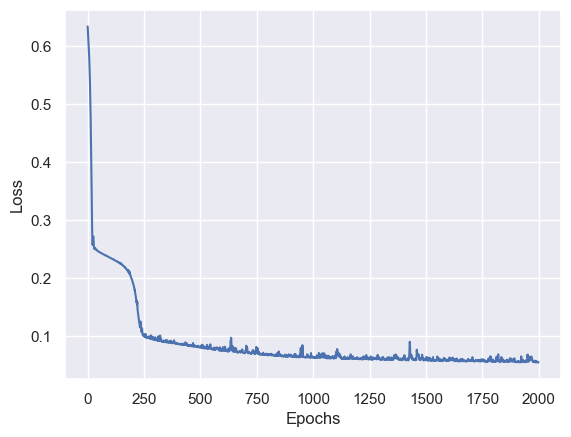

In [47]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

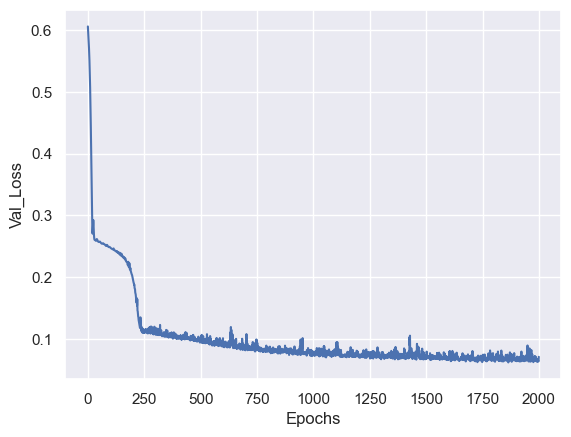

In [48]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [49]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\FEH-Giants.h5


In [50]:
predfeh = modelFEH.predict(X_test)

29/29 [==============================] - 0s 2ms/step


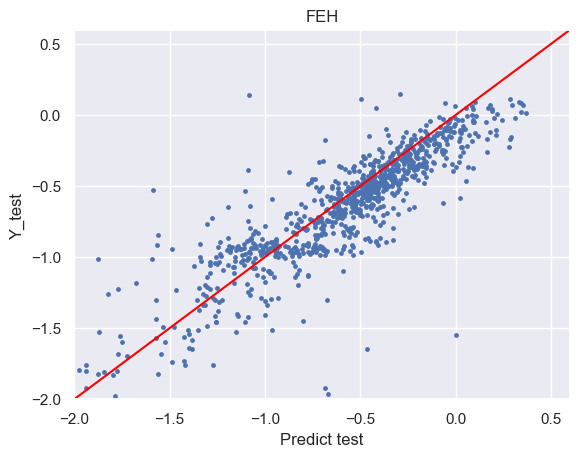

In [51]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [52]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 69.0%


In [53]:
Y_test['FEH_Predict'] = predfeh

In [54]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   5076.3910  2.462577 -0.64994  0.286455   
iDR4_3_SPLUS-n13s41_0009180   4661.0103  2.283069 -0.65882  0.263525   
iDR4_3_SPLUS-n10s38_0040744   5112.4707  3.155548 -0.37395  0.107412   
iDR4_3_MC0144_0019945         4686.0386  2.354824 -1.08280  0.106835   
iDR4_3_MC0104_0015068         4872.6294  2.721983 -0.60433  0.207205   
...                                 ...       ...      ...       ...   
iDR4_3_STRIPE82-0121_0032512  5136.0776  3.450616 -0.29956  0.082639   
iDR4_3_SPLUS-n13s39_0026294   4669.4430  2.567293 -0.39239  0.264245   
iDR4_3_MC0012_0033255         4605.1636  1.937285 -0.89548  0.324855   
iDR4_3_MC0007_0026491         4856.0670  3.345830 -0.18003  0.187565   
iDR4_3_MC0064_0027982         4079.7644  0.625387 -1.30590  0.072274   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n08s41_0012003   0.163070  0.234775  0.129430  0.083242   
iDR4_3_SPLUS-n13s41_0009180   0.101275  0.192465 -0.033740  0.107442   
iDR4_3_SPLUS-n10s38_0040744   0.139610  0.096045 -0.019042  0.086233   
iDR4_3_MC0144_0019945        -0.585480  0.435095  0.697900  0.011593   
iDR4_3_MC0104_0015068         0.022330  0.096905  0.101630  0.048342   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0121_0032512 -0.026513  0.058640  0.031188  0.077913   
iDR4_3_SPLUS-n13s39_0026294   0.117380  0.209955  0.103899  0.098693   
iDR4_3_MC0012_0033255        -0.085104  0.253205  0.126500 -0.048968   
iDR4_3_MC0007_0026491         0.032666  0.136645  0.198120  0.160586   
iDR4_3_MC0064_0027982        -0.617590  0.109965  0.241680 -0.152607   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n08s41_0012003   0.348403  0.295031    -0.108452   
iDR4_3_SPLUS-n13s41_0009180   0.395273  0.279741    -0.452541   
iDR4_3_SPLUS-n10s38_0040744   0.153563  0.124811    -0.078564   
iDR4_3_MC0144_0019945         0.118273  0.261021    -0.431809   
iDR4_3_MC0104_0015068         0.299503  0.164061    -0.277242   
...                                ...       ...          ...   
iDR4_3_STRIPE82-0121_0032512  0.148914  0.047462    -0.059009   
iDR4_3_SPLUS-n13s39_0026294   0.345813  0.206691    -0.445556   
iDR4_3_MC0012_0033255         0.332543  0.329831    -0.498803   
iDR4_3_MC0007_0026491         0.251113  0.164741    -0.290962   
iDR4_3_MC0064_0027982         0.035367  0.027662    -0.934029   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n08s41_0012003           5000.965332      2.694890    -0.754582  
iDR4_3_SPLUS-n13s41_0009180           4735.635742      2.570528    -0.600951  
iDR4_3_SPLUS-n10s38_0040744           5127.173340      3.416358    -0.464856  
iDR4_3_MC0144_0019945                 4631.097168      1.818751    -0.962550  
iDR4_3_MC0104_0015068                 4924.450195      2.888168    -0.660121  
...                                           ...           ...          ...  
iDR4_3_STRIPE82-0121_0032512          5126.368652      3.122426    -0.521025  
iDR4_3_SPLUS-n13s39_0026294           4715.510254      2.692698    -0.421270  
iDR4_3_MC0012_0033255                 4657.793945      2.043849    -0.922337  
iDR4_3_MC0007_0026491                 4915.444824      3.356082    -0.161929  
iDR4_3_MC0064_0027982                 4582.555664      1.041489    -0.769835  

[920 rows x 14 columns]

In [55]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros Parametros

In [56]:
GigCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [57]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                          
iDR4_3_HYDRA-0049_0000596  0.3074  0.5498  1.1796  1.3742  1.8582  2.0785   
iDR4_3_HYDRA-0049_0001461  0.3615  0.6254  1.4971  1.7942  2.4759  2.7429   
iDR4_3_HYDRA-0049_0006001  0.3616  0.4980  1.2526  1.3976  1.8802  2.1089   
iDR4_3_HYDRA-0049_0009994  0.3482  0.5423  1.2625  1.4355  1.9644  2.1911   
iDR4_3_HYDRA-0049_0013440  0.3394  0.5113  1.2917  1.4727  2.0185  2.2345   
...                           ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0160623      0.5033  0.4635  0.9867  1.0650  1.5098  1.7337   
iDR4_3_MC0017_0172148      0.2685  0.5564  1.2259  1.3810  1.8886  2.0429   
iDR4_3_MC0017_0147654      0.3292  0.6332  1.3034  1.5357  2.1483  2.3621   
iDR4_3_MC0017_0179215      0.3855  0.6567  1.4171  1.6415  2.2771  2.4882   
iDR4_3_MC0017_0187268      0.4798  0.4150  1.0088  1.0813  1.5206  1.7033   

                              u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                         ...              
iDR4_3_HYDRA-0049_0000596  2.5476  2.5906  2.7361  2.8224  ...  4925.5347   
iDR4_3_HYDRA-0049_0001461  3.3249  3.4138  3.6471  3.7707  ...  4564.2080   
iDR4_3_HYDRA-0049_0006001  2.5600  2.6364  2.7966  2.8818  ...  4872.2485   
iDR4_3_HYDRA-0049_0009994  2.6691  2.7494  2.9041  2.9981  ...  4857.5454   
iDR4_3_HYDRA-0049_0013440  2.4469  2.6060  2.6174  3.0157  ...  4816.7210   
...                           ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0160623      2.1222  2.1821  2.3725  2.4341  ...  4920.2660   
iDR4_3_MC0017_0172148      2.5348  2.5716  2.7253  2.7688  ...  5082.5947   
iDR4_3_MC0017_0147654      2.9017  2.9866  3.1719  3.2446  ...  4771.4883   
iDR4_3_MC0017_0179215      3.0463  3.1283  3.3310  3.4008  ...  4647.0347   
iDR4_3_MC0017_0187268      2.1157  2.1589  2.3561  2.4120  ...  5002.5303   

                               LOGG      FE_H   ALPHA_M      C_FE     CA_FE  \
ID                                                                            
iDR4_3_HYDRA-0049_0000596  3.227409 -0.043532  0.062435  0.014311  0.086964   
iDR4_3_HYDRA-0049_0001461  1.942220 -0.483310  0.120426 -0.071637  0.016022   
iDR4_3_HYDRA-0049_0006001  3.212270 -0.516610  0.281585  0.015661  0.205025   
iDR4_3_HYDRA-0049_0009994  2.740772 -0.423020  0.118768 -0.147540  0.013176   
iDR4_3_HYDRA-0049_0013440  2.742066 -0.418810  0.128765  0.004768  0.130675   
...                             ...       ...       ...       ...       ...   
iDR4_3_MC0017_0160623      2.348256 -1.454400  0.270375 -0.031837  0.275485   
iDR4_3_MC0017_0172148      3.874211  0.128780  0.062763  0.043199  0.044344   
iDR4_3_MC0017_0147654      2.946359 -0.153460  0.054566  0.079689  0.055005   
iDR4_3_MC0017_0179215      2.430262 -0.298990  0.243085  0.097353  0.090297   
iDR4_3_MC0017_0187268      2.536209 -1.047500  0.262615 -0.182260  0.075705   

                               N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                 
iDR4_3_HYDRA-0049_0000596  0.104909  0.071667  0.105918  0.062324  
iDR4_3_HYDRA-0049_0001461  0.169820  0.006463  0.202743  0.111271  
iDR4_3_HYDRA-0049_0006001  0.041898  0.077583  0.320593  0.189011  
iDR4_3_HYDRA-0049_0009994  0.260640  0.091993  0.172703  0.094451  
iDR4_3_HYDRA-0049_0013440  0.077129  0.042063  0.183173  0.101021  
...                             ...       ...       ...       ...  
iDR4_3_MC0017_0160623      0.322200  0.035792  0.252733  0.263161  
iDR4_3_MC0017_0172148      0.038814  0.043052  0.110733  0.030379  
iDR4_3_MC0017_0147654      0.076584  0.076853  0.095626  0.037692  
iDR4_3_MC0017_0179215      0.132670  0.086533  0.287953  0.235291  
iDR4_3_MC0017_0187268     -0.062140 -0.079708  0.294043  0.291061  

[4603 rows x 76 columns]

In [61]:
GigCoresParams = GigCores.loc[(GigCores['ALPHA_M'] != -999) & (GigCores['C_FE'] != -999) &
                                (GigCores['CA_FE'] != -999) & (GigCores['N_FE'] != -999) &
                                (GigCores['SI_FE'] != -999) & (GigCores['NI_FE'] != -999) & (GigCores['MG_FE'] != -999)]

In [62]:
GigCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                          
iDR4_3_HYDRA-0049_0000596  0.3074  0.5498  1.1796  1.3742  1.8582  2.0785   
iDR4_3_HYDRA-0049_0001461  0.3615  0.6254  1.4971  1.7942  2.4759  2.7429   
iDR4_3_HYDRA-0049_0006001  0.3616  0.4980  1.2526  1.3976  1.8802  2.1089   
iDR4_3_HYDRA-0049_0009994  0.3482  0.5423  1.2625  1.4355  1.9644  2.1911   
iDR4_3_HYDRA-0049_0013440  0.3394  0.5113  1.2917  1.4727  2.0185  2.2345   
...                           ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0160623      0.5033  0.4635  0.9867  1.0650  1.5098  1.7337   
iDR4_3_MC0017_0172148      0.2685  0.5564  1.2259  1.3810  1.8886  2.0429   
iDR4_3_MC0017_0147654      0.3292  0.6332  1.3034  1.5357  2.1483  2.3621   
iDR4_3_MC0017_0179215      0.3855  0.6567  1.4171  1.6415  2.2771  2.4882   
iDR4_3_MC0017_0187268      0.4798  0.4150  1.0088  1.0813  1.5206  1.7033   

                              u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                         ...              
iDR4_3_HYDRA-0049_0000596  2.5476  2.5906  2.7361  2.8224  ...  4925.5347   
iDR4_3_HYDRA-0049_0001461  3.3249  3.4138  3.6471  3.7707  ...  4564.2080   
iDR4_3_HYDRA-0049_0006001  2.5600  2.6364  2.7966  2.8818  ...  4872.2485   
iDR4_3_HYDRA-0049_0009994  2.6691  2.7494  2.9041  2.9981  ...  4857.5454   
iDR4_3_HYDRA-0049_0013440  2.4469  2.6060  2.6174  3.0157  ...  4816.7210   
...                           ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0160623      2.1222  2.1821  2.3725  2.4341  ...  4920.2660   
iDR4_3_MC0017_0172148      2.5348  2.5716  2.7253  2.7688  ...  5082.5947   
iDR4_3_MC0017_0147654      2.9017  2.9866  3.1719  3.2446  ...  4771.4883   
iDR4_3_MC0017_0179215      3.0463  3.1283  3.3310  3.4008  ...  4647.0347   
iDR4_3_MC0017_0187268      2.1157  2.1589  2.3561  2.4120  ...  5002.5303   

                               LOGG      FE_H   ALPHA_M      C_FE     CA_FE  \
ID                                                                            
iDR4_3_HYDRA-0049_0000596  3.227409 -0.043532  0.062435  0.014311  0.086964   
iDR4_3_HYDRA-0049_0001461  1.942220 -0.483310  0.120426 -0.071637  0.016022   
iDR4_3_HYDRA-0049_0006001  3.212270 -0.516610  0.281585  0.015661  0.205025   
iDR4_3_HYDRA-0049_0009994  2.740772 -0.423020  0.118768 -0.147540  0.013176   
iDR4_3_HYDRA-0049_0013440  2.742066 -0.418810  0.128765  0.004768  0.130675   
...                             ...       ...       ...       ...       ...   
iDR4_3_MC0017_0160623      2.348256 -1.454400  0.270375 -0.031837  0.275485   
iDR4_3_MC0017_0172148      3.874211  0.128780  0.062763  0.043199  0.044344   
iDR4_3_MC0017_0147654      2.946359 -0.153460  0.054566  0.079689  0.055005   
iDR4_3_MC0017_0179215      2.430262 -0.298990  0.243085  0.097353  0.090297   
iDR4_3_MC0017_0187268      2.536209 -1.047500  0.262615 -0.182260  0.075705   

                               N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                 
iDR4_3_HYDRA-0049_0000596  0.104909  0.071667  0.105918  0.062324  
iDR4_3_HYDRA-0049_0001461  0.169820  0.006463  0.202743  0.111271  
iDR4_3_HYDRA-0049_0006001  0.041898  0.077583  0.320593  0.189011  
iDR4_3_HYDRA-0049_0009994  0.260640  0.091993  0.172703  0.094451  
iDR4_3_HYDRA-0049_0013440  0.077129  0.042063  0.183173  0.101021  
...                             ...       ...       ...       ...  
iDR4_3_MC0017_0160623      0.322200  0.035792  0.252733  0.263161  
iDR4_3_MC0017_0172148      0.038814  0.043052  0.110733  0.030379  
iDR4_3_MC0017_0147654      0.076584  0.076853  0.095626  0.037692  
iDR4_3_MC0017_0179215      0.132670  0.086533  0.287953  0.235291  
iDR4_3_MC0017_0187268     -0.062140 -0.079708  0.294043  0.291061  

[4496 rows x 76 columns]

In [65]:
print('TEFF =', GigCoresParams['TEFF'].min())
print('LOGG = ', GigCoresParams['LOGG'].min())
print('Feh = ', GigCoresParams['FE_H'].min())
print('Alpha = ', GigCoresParams['ALPHA_M'].min())

print('cfe =', GigCoresParams['C_FE'].min())
print('cafe = ', GigCoresParams['CA_FE'].min())
print('nfe = ', GigCoresParams['N_FE'].min())
print('mgfe = ', GigCoresParams['MG_FE'].min())
print('sife = ', GigCoresParams['SI_FE'].min())
print('nife = ', GigCoresParams['NI_FE'].min())

TEFF = 4000.1252
LOGG =  -0.2079846
Feh =  -2.4356
Alpha =  -0.48023504
cfe = -1.4511002
cafe =  -0.776075
nfe =  -0.55623007
mgfe =  -0.516477
sife =  -0.5707104
nife =  -0.8224498


In [66]:
xtrain = GigCoresParams.iloc[:, :66]

In [67]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [68]:
ytrain = GigCoresParams[columnYtrain]

In [69]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [70]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [71]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [72]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0143_0003451         4680.4443  1.839885 -0.77854 -0.004408   
iDR4_3_STRIPE82-0126_0014479  5047.7800  3.111542 -0.78587  0.279465   
iDR4_3_SPLUS-s26s10_0023310   4438.6740  1.023774 -1.71860  0.109859   
iDR4_3_STRIPE82-0109_0019417  4804.0854  2.698043 -0.40162  0.139495   
iDR4_3_SPLUS-n01s18_0009631   4982.1943  3.271730 -0.43976  0.244805   
...                                 ...       ...      ...       ...   
iDR4_3_MC0105_0004056         4306.4697  0.826041 -1.48170  0.106860   
iDR4_3_MC0063_0080166         5604.8940  1.480979 -0.50347 -0.020159   
iDR4_3_SPLUS-n02s18_0030002   4793.0940  2.842208 -0.23229  0.102580   
iDR4_3_MC0095_0084405         4093.7842  0.672740 -1.14440  0.009647   
iDR4_3_MC0062_0041347         4295.9727  2.630941 -0.68082 -0.018534   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0143_0003451        -1.319160  0.206215  1.209240  0.100502   
iDR4_3_STRIPE82-0126_0014479  0.059045  0.158445  0.089993  0.123173   
iDR4_3_SPLUS-s26s10_0023310  -0.611300  0.220305  0.288950 -0.149107   
iDR4_3_STRIPE82-0109_0019417  0.009724  0.074162  0.093637  0.019873   
iDR4_3_SPLUS-n01s18_0009631   0.160170  0.180895 -0.121730  0.144143   
...                                ...       ...       ...       ...   
iDR4_3_MC0105_0004056        -0.763040  0.122615  0.756880 -0.095908   
iDR4_3_MC0063_0080166        -0.551410 -0.012359 -0.344100 -0.112028   
iDR4_3_SPLUS-n02s18_0030002  -0.088924  0.065501  0.118970  0.039142   
iDR4_3_MC0095_0084405        -0.553040  0.125265  0.140960 -0.065807   
iDR4_3_MC0062_0041347         0.222050  0.037275  0.009800  0.084642   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0143_0003451        -0.284217  0.034664  
iDR4_3_STRIPE82-0126_0014479  0.326383  0.248791  
iDR4_3_SPLUS-s26s10_0023310  -0.034704  0.121751  
iDR4_3_STRIPE82-0109_0019417  0.184223  0.098101  
iDR4_3_SPLUS-n01s18_0009631   0.319283  0.186861  
...                                ...       ...  
iDR4_3_MC0105_0004056        -0.126827  0.118571  
iDR4_3_MC0063_0080166        -0.258977 -0.102499  
iDR4_3_SPLUS-n02s18_0030002   0.131934  0.092371  
iDR4_3_MC0095_0084405         0.068977 -0.017430  
iDR4_3_MC0062_0041347        -0.001017  0.097814  

[3236 rows x 10 columns]

### Alpha

In [73]:
Parametro = "Alpha"
columnTrain = 'ALPHA_M'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [74]:
modelAlpha = baseline_model_teste()

In [75]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
2/2 - 1s - loss: 0.0831 - val_loss: 0.0827 - 564ms/epoch - 282ms/step
Epoch 2/1500
2/2 - 0s - loss: 0.0817 - val_loss: 0.0812 - 60ms/epoch - 30ms/step
Epoch 3/1500
2/2 - 0s - loss: 0.0803 - val_loss: 0.0797 - 62ms/epoch - 31ms/step
Epoch 4/1500
2/2 - 0s - loss: 0.0788 - val_loss: 0.0781 - 53ms/epoch - 27ms/step
Epoch 5/1500
2/2 - 0s - loss: 0.0771 - val_loss: 0.0764 - 56ms/epoch - 28ms/step
Epoch 6/1500
2/2 - 0s - loss: 0.0754 - val_loss: 0.0745 - 52ms/epoch - 26ms/step
Epoch 7/1500
2/2 - 0s - loss: 0.0736 - val_loss: 0.0726 - 52ms/epoch - 26ms/step
Epoch 8/1500
2/2 - 0s - loss: 0.0717 - val_loss: 0.0706 - 59ms/epoch - 30ms/step
Epoch 9/1500
2/2 - 0s - loss: 0.0698 - val_loss: 0.0685 - 61ms/epoch - 30ms/step
Epoch 10/1500
2/2 - 0s - loss: 0.0677 - val_loss: 0.0663 - 53ms/epoch - 26ms/step
Epoch 11/1500
2/2 - 0s - loss: 0.0657 - val_loss: 0.0643 - 57ms/epoch - 28ms/step
Epoch 12/1500
2/2 - 0s - loss: 0.0637 - val_loss: 0.0624 - 56ms/epoch - 28ms/step
Epoch 13/1500
2/2 - 0s 

Epoch 101/1500
2/2 - 0s - loss: 0.0431 - val_loss: 0.0429 - 51ms/epoch - 25ms/step
Epoch 102/1500
2/2 - 0s - loss: 0.0429 - val_loss: 0.0428 - 53ms/epoch - 26ms/step
Epoch 103/1500
2/2 - 0s - loss: 0.0427 - val_loss: 0.0426 - 48ms/epoch - 24ms/step
Epoch 104/1500
2/2 - 0s - loss: 0.0426 - val_loss: 0.0425 - 49ms/epoch - 24ms/step
Epoch 105/1500
2/2 - 0s - loss: 0.0424 - val_loss: 0.0423 - 53ms/epoch - 27ms/step
Epoch 106/1500
2/2 - 0s - loss: 0.0423 - val_loss: 0.0421 - 46ms/epoch - 23ms/step
Epoch 107/1500
2/2 - 0s - loss: 0.0421 - val_loss: 0.0420 - 50ms/epoch - 25ms/step
Epoch 108/1500
2/2 - 0s - loss: 0.0419 - val_loss: 0.0418 - 46ms/epoch - 23ms/step
Epoch 109/1500
2/2 - 0s - loss: 0.0418 - val_loss: 0.0417 - 53ms/epoch - 27ms/step
Epoch 110/1500
2/2 - 0s - loss: 0.0416 - val_loss: 0.0415 - 54ms/epoch - 27ms/step
Epoch 111/1500
2/2 - 0s - loss: 0.0415 - val_loss: 0.0414 - 53ms/epoch - 27ms/step
Epoch 112/1500
2/2 - 0s - loss: 0.0413 - val_loss: 0.0412 - 52ms/epoch - 26ms/step
Epoc

Epoch 200/1500
2/2 - 0s - loss: 0.0300 - val_loss: 0.0298 - 52ms/epoch - 26ms/step
Epoch 201/1500
2/2 - 0s - loss: 0.0301 - val_loss: 0.0295 - 48ms/epoch - 24ms/step
Epoch 202/1500
2/2 - 0s - loss: 0.0298 - val_loss: 0.0294 - 53ms/epoch - 27ms/step
Epoch 203/1500
2/2 - 0s - loss: 0.0297 - val_loss: 0.0294 - 51ms/epoch - 26ms/step
Epoch 204/1500
2/2 - 0s - loss: 0.0297 - val_loss: 0.0291 - 53ms/epoch - 26ms/step
Epoch 205/1500
2/2 - 0s - loss: 0.0295 - val_loss: 0.0290 - 56ms/epoch - 28ms/step
Epoch 206/1500
2/2 - 0s - loss: 0.0294 - val_loss: 0.0289 - 50ms/epoch - 25ms/step
Epoch 207/1500
2/2 - 0s - loss: 0.0293 - val_loss: 0.0288 - 49ms/epoch - 25ms/step
Epoch 208/1500
2/2 - 0s - loss: 0.0292 - val_loss: 0.0287 - 48ms/epoch - 24ms/step
Epoch 209/1500
2/2 - 0s - loss: 0.0291 - val_loss: 0.0287 - 51ms/epoch - 26ms/step
Epoch 210/1500
2/2 - 0s - loss: 0.0290 - val_loss: 0.0286 - 51ms/epoch - 26ms/step
Epoch 211/1500
2/2 - 0s - loss: 0.0290 - val_loss: 0.0284 - 51ms/epoch - 26ms/step
Epoc

Epoch 299/1500
2/2 - 0s - loss: 0.0229 - val_loss: 0.0224 - 53ms/epoch - 27ms/step
Epoch 300/1500
2/2 - 0s - loss: 0.0229 - val_loss: 0.0224 - 50ms/epoch - 25ms/step
Epoch 301/1500
2/2 - 0s - loss: 0.0228 - val_loss: 0.0224 - 53ms/epoch - 27ms/step
Epoch 302/1500
2/2 - 0s - loss: 0.0229 - val_loss: 0.0223 - 54ms/epoch - 27ms/step
Epoch 303/1500
2/2 - 0s - loss: 0.0227 - val_loss: 0.0222 - 51ms/epoch - 26ms/step
Epoch 304/1500
2/2 - 0s - loss: 0.0227 - val_loss: 0.0221 - 51ms/epoch - 25ms/step
Epoch 305/1500
2/2 - 0s - loss: 0.0226 - val_loss: 0.0221 - 51ms/epoch - 26ms/step
Epoch 306/1500
2/2 - 0s - loss: 0.0226 - val_loss: 0.0221 - 53ms/epoch - 27ms/step
Epoch 307/1500
2/2 - 0s - loss: 0.0225 - val_loss: 0.0220 - 51ms/epoch - 26ms/step
Epoch 308/1500
2/2 - 0s - loss: 0.0225 - val_loss: 0.0220 - 50ms/epoch - 25ms/step
Epoch 309/1500
2/2 - 0s - loss: 0.0224 - val_loss: 0.0219 - 49ms/epoch - 24ms/step
Epoch 310/1500
2/2 - 0s - loss: 0.0224 - val_loss: 0.0219 - 51ms/epoch - 26ms/step
Epoc

Epoch 398/1500
2/2 - 0s - loss: 0.0190 - val_loss: 0.0185 - 53ms/epoch - 27ms/step
Epoch 399/1500
2/2 - 0s - loss: 0.0189 - val_loss: 0.0185 - 50ms/epoch - 25ms/step
Epoch 400/1500
2/2 - 0s - loss: 0.0189 - val_loss: 0.0185 - 57ms/epoch - 29ms/step
Epoch 401/1500
2/2 - 0s - loss: 0.0189 - val_loss: 0.0185 - 56ms/epoch - 28ms/step
Epoch 402/1500
2/2 - 0s - loss: 0.0189 - val_loss: 0.0184 - 52ms/epoch - 26ms/step
Epoch 403/1500
2/2 - 0s - loss: 0.0188 - val_loss: 0.0184 - 51ms/epoch - 26ms/step
Epoch 404/1500
2/2 - 0s - loss: 0.0188 - val_loss: 0.0184 - 49ms/epoch - 25ms/step
Epoch 405/1500
2/2 - 0s - loss: 0.0188 - val_loss: 0.0185 - 53ms/epoch - 26ms/step
Epoch 406/1500
2/2 - 0s - loss: 0.0188 - val_loss: 0.0184 - 48ms/epoch - 24ms/step
Epoch 407/1500
2/2 - 0s - loss: 0.0188 - val_loss: 0.0185 - 49ms/epoch - 24ms/step
Epoch 408/1500
2/2 - 0s - loss: 0.0188 - val_loss: 0.0186 - 48ms/epoch - 24ms/step
Epoch 409/1500
2/2 - 0s - loss: 0.0189 - val_loss: 0.0185 - 54ms/epoch - 27ms/step
Epoc

Epoch 497/1500
2/2 - 0s - loss: 0.0165 - val_loss: 0.0162 - 50ms/epoch - 25ms/step
Epoch 498/1500
2/2 - 0s - loss: 0.0165 - val_loss: 0.0164 - 50ms/epoch - 25ms/step
Epoch 499/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0164 - 49ms/epoch - 25ms/step
Epoch 500/1500
2/2 - 0s - loss: 0.0165 - val_loss: 0.0164 - 54ms/epoch - 27ms/step
Epoch 501/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0163 - 53ms/epoch - 26ms/step
Epoch 502/1500
2/2 - 0s - loss: 0.0165 - val_loss: 0.0161 - 51ms/epoch - 26ms/step
Epoch 503/1500
2/2 - 0s - loss: 0.0164 - val_loss: 0.0162 - 51ms/epoch - 25ms/step
Epoch 504/1500
2/2 - 0s - loss: 0.0164 - val_loss: 0.0161 - 50ms/epoch - 25ms/step
Epoch 505/1500
2/2 - 0s - loss: 0.0165 - val_loss: 0.0160 - 55ms/epoch - 27ms/step
Epoch 506/1500
2/2 - 0s - loss: 0.0163 - val_loss: 0.0160 - 51ms/epoch - 26ms/step
Epoch 507/1500
2/2 - 0s - loss: 0.0163 - val_loss: 0.0159 - 51ms/epoch - 26ms/step
Epoch 508/1500
2/2 - 0s - loss: 0.0163 - val_loss: 0.0159 - 49ms/epoch - 25ms/step
Epoc

Epoch 596/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0146 - 72ms/epoch - 36ms/step
Epoch 597/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0146 - 68ms/epoch - 34ms/step
Epoch 598/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0148 - 66ms/epoch - 33ms/step
Epoch 599/1500
2/2 - 0s - loss: 0.0149 - val_loss: 0.0148 - 62ms/epoch - 31ms/step
Epoch 600/1500
2/2 - 0s - loss: 0.0151 - val_loss: 0.0146 - 73ms/epoch - 37ms/step
Epoch 601/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0147 - 50ms/epoch - 25ms/step
Epoch 602/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0146 - 64ms/epoch - 32ms/step
Epoch 603/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0146 - 52ms/epoch - 26ms/step
Epoch 604/1500
2/2 - 0s - loss: 0.0147 - val_loss: 0.0146 - 69ms/epoch - 35ms/step
Epoch 605/1500
2/2 - 0s - loss: 0.0147 - val_loss: 0.0146 - 54ms/epoch - 27ms/step
Epoch 606/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0145 - 53ms/epoch - 27ms/step
Epoch 607/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0146 - 54ms/epoch - 27ms/step
Epoc

Epoch 695/1500
2/2 - 0s - loss: 0.0137 - val_loss: 0.0138 - 52ms/epoch - 26ms/step
Epoch 696/1500
2/2 - 0s - loss: 0.0138 - val_loss: 0.0136 - 55ms/epoch - 28ms/step
Epoch 697/1500
2/2 - 0s - loss: 0.0137 - val_loss: 0.0137 - 53ms/epoch - 26ms/step
Epoch 698/1500
2/2 - 0s - loss: 0.0137 - val_loss: 0.0137 - 56ms/epoch - 28ms/step
Epoch 699/1500
2/2 - 0s - loss: 0.0137 - val_loss: 0.0136 - 51ms/epoch - 26ms/step
Epoch 700/1500
2/2 - 0s - loss: 0.0137 - val_loss: 0.0139 - 51ms/epoch - 26ms/step
Epoch 701/1500
2/2 - 0s - loss: 0.0139 - val_loss: 0.0136 - 49ms/epoch - 25ms/step
Epoch 702/1500
2/2 - 0s - loss: 0.0138 - val_loss: 0.0143 - 47ms/epoch - 24ms/step
Epoch 703/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0148 - 50ms/epoch - 25ms/step
Epoch 704/1500
2/2 - 0s - loss: 0.0148 - val_loss: 0.0137 - 50ms/epoch - 25ms/step
Epoch 705/1500
2/2 - 0s - loss: 0.0141 - val_loss: 0.0137 - 50ms/epoch - 25ms/step
Epoch 706/1500
2/2 - 0s - loss: 0.0138 - val_loss: 0.0137 - 66ms/epoch - 33ms/step
Epoc

Epoch 794/1500
2/2 - 0s - loss: 0.0130 - val_loss: 0.0130 - 47ms/epoch - 24ms/step
Epoch 795/1500
2/2 - 0s - loss: 0.0129 - val_loss: 0.0130 - 44ms/epoch - 22ms/step
Epoch 796/1500
2/2 - 0s - loss: 0.0129 - val_loss: 0.0130 - 64ms/epoch - 32ms/step
Epoch 797/1500
2/2 - 0s - loss: 0.0129 - val_loss: 0.0130 - 44ms/epoch - 22ms/step
Epoch 798/1500
2/2 - 0s - loss: 0.0129 - val_loss: 0.0130 - 46ms/epoch - 23ms/step
Epoch 799/1500
2/2 - 0s - loss: 0.0129 - val_loss: 0.0132 - 44ms/epoch - 22ms/step
Epoch 800/1500
2/2 - 0s - loss: 0.0130 - val_loss: 0.0131 - 45ms/epoch - 23ms/step
Epoch 801/1500
2/2 - 0s - loss: 0.0131 - val_loss: 0.0131 - 62ms/epoch - 31ms/step
Epoch 802/1500
2/2 - 0s - loss: 0.0130 - val_loss: 0.0136 - 45ms/epoch - 23ms/step
Epoch 803/1500
2/2 - 0s - loss: 0.0134 - val_loss: 0.0130 - 69ms/epoch - 35ms/step
Epoch 804/1500
2/2 - 0s - loss: 0.0130 - val_loss: 0.0131 - 46ms/epoch - 23ms/step
Epoch 805/1500
2/2 - 0s - loss: 0.0130 - val_loss: 0.0133 - 71ms/epoch - 35ms/step
Epoc

Epoch 893/1500
2/2 - 0s - loss: 0.0126 - val_loss: 0.0126 - 48ms/epoch - 24ms/step
Epoch 894/1500
2/2 - 0s - loss: 0.0125 - val_loss: 0.0125 - 44ms/epoch - 22ms/step
Epoch 895/1500
2/2 - 0s - loss: 0.0125 - val_loss: 0.0128 - 44ms/epoch - 22ms/step
Epoch 896/1500
2/2 - 0s - loss: 0.0126 - val_loss: 0.0130 - 48ms/epoch - 24ms/step
Epoch 897/1500
2/2 - 0s - loss: 0.0126 - val_loss: 0.0129 - 45ms/epoch - 22ms/step
Epoch 898/1500
2/2 - 0s - loss: 0.0126 - val_loss: 0.0128 - 46ms/epoch - 23ms/step
Epoch 899/1500
2/2 - 0s - loss: 0.0126 - val_loss: 0.0125 - 46ms/epoch - 23ms/step
Epoch 900/1500
2/2 - 0s - loss: 0.0125 - val_loss: 0.0125 - 47ms/epoch - 24ms/step
Epoch 901/1500
2/2 - 0s - loss: 0.0124 - val_loss: 0.0126 - 47ms/epoch - 23ms/step
Epoch 902/1500
2/2 - 0s - loss: 0.0124 - val_loss: 0.0125 - 47ms/epoch - 24ms/step
Epoch 903/1500
2/2 - 0s - loss: 0.0124 - val_loss: 0.0126 - 47ms/epoch - 23ms/step
Epoch 904/1500
2/2 - 0s - loss: 0.0124 - val_loss: 0.0128 - 44ms/epoch - 22ms/step
Epoc

Epoch 992/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0123 - 50ms/epoch - 25ms/step
Epoch 993/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0122 - 54ms/epoch - 27ms/step
Epoch 994/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0127 - 52ms/epoch - 26ms/step
Epoch 995/1500
2/2 - 0s - loss: 0.0124 - val_loss: 0.0123 - 50ms/epoch - 25ms/step
Epoch 996/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0121 - 50ms/epoch - 25ms/step
Epoch 997/1500
2/2 - 0s - loss: 0.0120 - val_loss: 0.0123 - 48ms/epoch - 24ms/step
Epoch 998/1500
2/2 - 0s - loss: 0.0120 - val_loss: 0.0122 - 53ms/epoch - 26ms/step
Epoch 999/1500
2/2 - 0s - loss: 0.0120 - val_loss: 0.0122 - 49ms/epoch - 24ms/step
Epoch 1000/1500
2/2 - 0s - loss: 0.0120 - val_loss: 0.0123 - 47ms/epoch - 24ms/step
Epoch 1001/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0123 - 46ms/epoch - 23ms/step
Epoch 1002/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0123 - 47ms/epoch - 23ms/step
Epoch 1003/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0122 - 52ms/epoch - 26ms/step


Epoch 1090/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0122 - 46ms/epoch - 23ms/step
Epoch 1091/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0120 - 47ms/epoch - 24ms/step
Epoch 1092/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0125 - 49ms/epoch - 24ms/step
Epoch 1093/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0126 - 49ms/epoch - 25ms/step
Epoch 1094/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0120 - 48ms/epoch - 24ms/step
Epoch 1095/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0121 - 46ms/epoch - 23ms/step
Epoch 1096/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0128 - 48ms/epoch - 24ms/step
Epoch 1097/1500
2/2 - 0s - loss: 0.0122 - val_loss: 0.0124 - 49ms/epoch - 24ms/step
Epoch 1098/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0119 - 48ms/epoch - 24ms/step
Epoch 1099/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0120 - 50ms/epoch - 25ms/step
Epoch 1100/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0125 - 48ms/epoch - 24ms/step
Epoch 1101/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0122 - 49ms/epoch - 25

Epoch 1188/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0121 - 52ms/epoch - 26ms/step
Epoch 1189/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0117 - 51ms/epoch - 25ms/step
Epoch 1190/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0119 - 52ms/epoch - 26ms/step
Epoch 1191/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0123 - 53ms/epoch - 27ms/step
Epoch 1192/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0121 - 51ms/epoch - 26ms/step
Epoch 1193/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0117 - 52ms/epoch - 26ms/step
Epoch 1194/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0117 - 55ms/epoch - 27ms/step
Epoch 1195/1500
2/2 - 0s - loss: 0.0115 - val_loss: 0.0119 - 50ms/epoch - 25ms/step
Epoch 1196/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0121 - 50ms/epoch - 25ms/step
Epoch 1197/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0122 - 53ms/epoch - 27ms/step
Epoch 1198/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0121 - 49ms/epoch - 25ms/step
Epoch 1199/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0117 - 61ms/epoch - 30

Epoch 1286/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0115 - 54ms/epoch - 27ms/step
Epoch 1287/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0119 - 56ms/epoch - 28ms/step
Epoch 1288/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0117 - 59ms/epoch - 29ms/step
Epoch 1289/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0117 - 62ms/epoch - 31ms/step
Epoch 1290/1500
2/2 - 0s - loss: 0.0115 - val_loss: 0.0115 - 57ms/epoch - 29ms/step
Epoch 1291/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0114 - 53ms/epoch - 27ms/step
Epoch 1292/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0114 - 52ms/epoch - 26ms/step
Epoch 1293/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0115 - 58ms/epoch - 29ms/step
Epoch 1294/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0115 - 53ms/epoch - 27ms/step
Epoch 1295/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0117 - 52ms/epoch - 26ms/step
Epoch 1296/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0115 - 55ms/epoch - 27ms/step
Epoch 1297/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0117 - 54ms/epoch - 27

Epoch 1384/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 51ms/epoch - 25ms/step
Epoch 1385/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 55ms/epoch - 28ms/step
Epoch 1386/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 46ms/epoch - 23ms/step
Epoch 1387/1500
2/2 - 0s - loss: 0.0111 - val_loss: 0.0112 - 53ms/epoch - 27ms/step
Epoch 1388/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 63ms/epoch - 32ms/step
Epoch 1389/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 54ms/epoch - 27ms/step
Epoch 1390/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 47ms/epoch - 23ms/step
Epoch 1391/1500
2/2 - 0s - loss: 0.0111 - val_loss: 0.0117 - 49ms/epoch - 25ms/step
Epoch 1392/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0114 - 50ms/epoch - 25ms/step
Epoch 1393/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0113 - 51ms/epoch - 26ms/step
Epoch 1394/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 45ms/epoch - 22ms/step
Epoch 1395/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0113 - 42ms/epoch - 21

Epoch 1482/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0111 - 52ms/epoch - 26ms/step
Epoch 1483/1500
2/2 - 0s - loss: 0.0109 - val_loss: 0.0114 - 58ms/epoch - 29ms/step
Epoch 1484/1500
2/2 - 0s - loss: 0.0111 - val_loss: 0.0111 - 50ms/epoch - 25ms/step
Epoch 1485/1500
2/2 - 0s - loss: 0.0109 - val_loss: 0.0112 - 47ms/epoch - 24ms/step
Epoch 1486/1500
2/2 - 0s - loss: 0.0109 - val_loss: 0.0111 - 45ms/epoch - 23ms/step
Epoch 1487/1500
2/2 - 0s - loss: 0.0108 - val_loss: 0.0111 - 45ms/epoch - 23ms/step
Epoch 1488/1500
2/2 - 0s - loss: 0.0109 - val_loss: 0.0113 - 49ms/epoch - 25ms/step
Epoch 1489/1500
2/2 - 0s - loss: 0.0109 - val_loss: 0.0113 - 56ms/epoch - 28ms/step
Epoch 1490/1500
2/2 - 0s - loss: 0.0110 - val_loss: 0.0111 - 55ms/epoch - 28ms/step
Epoch 1491/1500
2/2 - 0s - loss: 0.0108 - val_loss: 0.0111 - 49ms/epoch - 25ms/step
Epoch 1492/1500
2/2 - 0s - loss: 0.0108 - val_loss: 0.0111 - 45ms/epoch - 23ms/step
Epoch 1493/1500
2/2 - 0s - loss: 0.0109 - val_loss: 0.0111 - 50ms/epoch - 25

Text(0, 0.5, 'Loss')

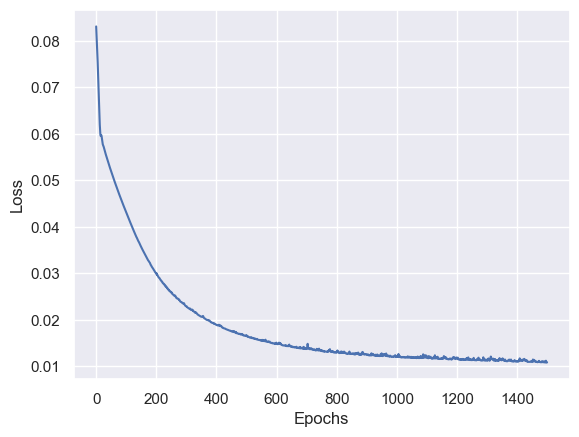

In [76]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

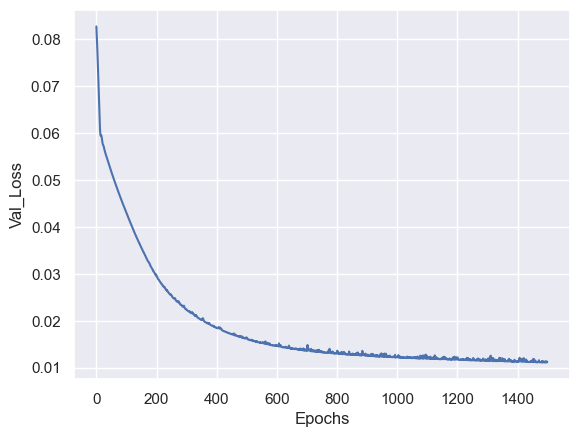

In [77]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [78]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\Alpha-Giants.h5


In [79]:
predalpha = modelAlpha.predict(X_test)

29/29 [==============================] - 0s 3ms/step


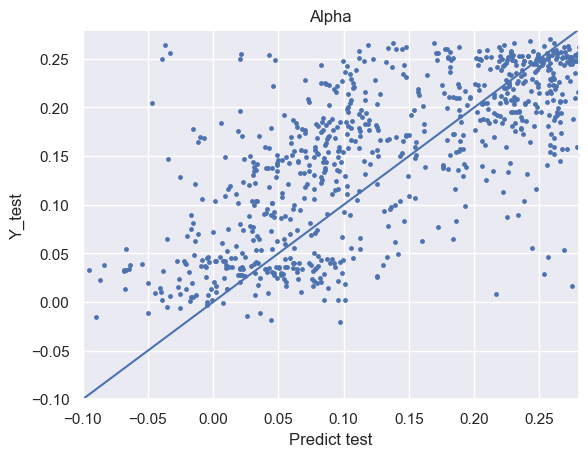

In [81]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [82]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 52.0%


In [83]:
Y_test['alpha_predict'] = predalpha

In [84]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061  4381.6500  1.668714 -0.71171  0.298125   
iDR4_3_SPLUS-n13s37_0039783   4905.6630  2.409293 -0.41882  0.257585   
iDR4_3_MC0105_0024606         5030.6387  3.647585 -0.44044  0.287305   
iDR4_3_MC0022_0021799         4857.5940  3.050860 -0.10433  0.029686   
iDR4_3_SPLUS-n11s35_0003664   4974.9766  3.018178 -0.38805  0.261805   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-s02s07_0032429   5142.5070  2.570743 -0.64862  0.217715   
iDR4_3_MC0048_0007592         4352.4624  0.947510 -1.39140  0.082979   
iDR4_3_SPLUS-n10s38_0045425   5055.6690  3.572111 -0.32847  0.273375   
iDR4_3_MC0137_0039580         4096.2570  0.701436 -1.18880  0.024127   
iDR4_3_MC0003_0034591         4869.4907  3.432368 -0.29800  0.179165   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061 -0.005827  0.244905  0.089963  0.061972   
iDR4_3_SPLUS-n13s37_0039783   0.189950  0.241075  0.125780  0.140442   
iDR4_3_MC0105_0024606         0.152970  0.228085 -0.108690  0.112573   
iDR4_3_MC0022_0021799         0.021853 -0.015636  0.155840 -0.006297   
iDR4_3_SPLUS-n11s35_0003664   0.024054  0.186915  0.322190  0.049432   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s07_0032429   0.126450  0.187305  0.367950  0.042422   
iDR4_3_MC0048_0007592        -0.740430  0.171755  0.494780 -0.167807   
iDR4_3_SPLUS-n10s38_0045425   0.142700  0.243635 -0.088807  0.176872   
iDR4_3_MC0137_0039580        -0.566110  0.140245  0.384910 -0.102507   
iDR4_3_MC0003_0034591         0.032659  0.124245  0.008598  0.041463   

                                 MG_FE     SI_FE  alpha_predict  
ID                                                               
iDR4_3_STRIPE82-0111_0021061  0.330643  0.248771       0.211743  
iDR4_3_SPLUS-n13s37_0039783   0.306403  0.286381       0.192647  
iDR4_3_MC0105_0024606         0.389943  0.193881       0.244148  
iDR4_3_MC0022_0021799         0.045207  0.028342       0.103415  
iDR4_3_SPLUS-n11s35_0003664   0.301483  0.249251       0.190193  
...                                ...       ...            ...  
iDR4_3_SPLUS-s02s07_0032429   0.268883  0.184751       0.241703  
iDR4_3_MC0048_0007592         0.171633  0.002825       0.020339  
iDR4_3_SPLUS-n10s38_0045425   0.395133  0.200481       0.226958  
iDR4_3_MC0137_0039580         0.076287  0.046401       0.026821  
iDR4_3_MC0003_0034591         0.235243  0.129301       0.166443  

[900 rows x 11 columns]

In [85]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [86]:
Parametro = "CFE"
columnTrain = 'C_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [87]:
modelCFE = baseline_model_teste()

In [88]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.1277 - val_loss: 0.1316 - 747ms/epoch - 374ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1267 - val_loss: 0.1307 - 44ms/epoch - 22ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1259 - val_loss: 0.1299 - 45ms/epoch - 23ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1250 - val_loss: 0.1290 - 42ms/epoch - 21ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1242 - val_loss: 0.1280 - 44ms/epoch - 22ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1233 - val_loss: 0.1270 - 44ms/epoch - 22ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1223 - val_loss: 0.1259 - 42ms/epoch - 21ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1213 - val_loss: 0.1248 - 45ms/epoch - 23ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1202 - val_loss: 0.1235 - 42ms/epoch - 21ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1190 - val_loss: 0.1222 - 44ms/epoch - 22ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1178 - val_loss: 0.1208 - 41ms/epoch - 20ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1165 - val_loss: 0.1194 - 44ms/epoch - 22ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.0722 - val_loss: 0.0701 - 45ms/epoch - 23ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0727 - val_loss: 0.0690 - 49ms/epoch - 24ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0717 - val_loss: 0.0701 - 47ms/epoch - 24ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0726 - val_loss: 0.0689 - 49ms/epoch - 25ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0713 - val_loss: 0.0691 - 49ms/epoch - 25ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0717 - val_loss: 0.0685 - 48ms/epoch - 24ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0710 - val_loss: 0.0691 - 49ms/epoch - 25ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0714 - val_loss: 0.0700 - 51ms/epoch - 26ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0721 - val_loss: 0.0679 - 51ms/epoch - 25ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0702 - val_loss: 0.0690 - 49ms/epoch - 25ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0716 - val_loss: 0.0672 - 50ms/epoch - 25ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0700 - val_loss: 0.0676 - 48ms/epoch - 24ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0577 - val_loss: 0.0545 - 47ms/epoch - 24ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0567 - val_loss: 0.0546 - 56ms/epoch - 28ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0566 - val_loss: 0.0548 - 50ms/epoch - 25ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0565 - val_loss: 0.0547 - 55ms/epoch - 27ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0545 - 49ms/epoch - 25ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0560 - val_loss: 0.0541 - 54ms/epoch - 27ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0559 - val_loss: 0.0546 - 57ms/epoch - 28ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0568 - val_loss: 0.0539 - 57ms/epoch - 29ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0559 - val_loss: 0.0550 - 52ms/epoch - 26ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0546 - 51ms/epoch - 26ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0558 - val_loss: 0.0534 - 56ms/epoch - 28ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0550 - val_loss: 0.0527 - 59ms/epoch - 30ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0446 - 65ms/epoch - 32ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0449 - 60ms/epoch - 30ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0448 - 59ms/epoch - 29ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0454 - 51ms/epoch - 25ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0441 - 57ms/epoch - 29ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0444 - 46ms/epoch - 23ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0448 - val_loss: 0.0452 - 56ms/epoch - 28ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0452 - 53ms/epoch - 27ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0449 - 55ms/epoch - 28ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0448 - val_loss: 0.0456 - 57ms/epoch - 29ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0455 - 53ms/epoch - 26ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0441 - 48ms/epoch - 24ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0413 - val_loss: 0.0411 - 60ms/epoch - 30ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0413 - val_loss: 0.0413 - 56ms/epoch - 28ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0412 - 51ms/epoch - 26ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0412 - 47ms/epoch - 24ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0409 - val_loss: 0.0434 - 52ms/epoch - 26ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0442 - 51ms/epoch - 26ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0408 - 50ms/epoch - 25ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0501 - 56ms/epoch - 28ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0484 - val_loss: 0.0504 - 53ms/epoch - 27ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0513 - val_loss: 0.0436 - 52ms/epoch - 26ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0441 - val_loss: 0.0558 - 50ms/epoch - 25ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0543 - val_loss: 0.0442 - 51ms/epoch - 26ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0397 - val_loss: 0.0392 - 52ms/epoch - 26ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0387 - 50ms/epoch - 25ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0390 - 53ms/epoch - 26ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0395 - 54ms/epoch - 27ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0399 - 55ms/epoch - 28ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0407 - 56ms/epoch - 28ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0399 - 51ms/epoch - 26ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0391 - 49ms/epoch - 25ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0390 - 50ms/epoch - 25ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0394 - 56ms/epoch - 28ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0395 - val_loss: 0.0397 - 55ms/epoch - 27ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0408 - 54ms/epoch - 27ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0372 - 42ms/epoch - 21ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0396 - 42ms/epoch - 21ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0402 - val_loss: 0.0383 - 43ms/epoch - 21ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0384 - val_loss: 0.0380 - 41ms/epoch - 21ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0406 - 40ms/epoch - 20ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0379 - 42ms/epoch - 21ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0387 - 42ms/epoch - 21ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0385 - val_loss: 0.0377 - 44ms/epoch - 22ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0378 - 42ms/epoch - 21ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0388 - 41ms/epoch - 21ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0385 - val_loss: 0.0374 - 42ms/epoch - 21ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0377 - 42ms/epoch - 21ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0370 - 48ms/epoch - 24ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0367 - 50ms/epoch - 25ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0363 - 50ms/epoch - 25ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0362 - 55ms/epoch - 28ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0359 - 49ms/epoch - 25ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0362 - 47ms/epoch - 24ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0375 - 47ms/epoch - 24ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0371 - 51ms/epoch - 26ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0371 - 46ms/epoch - 23ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0367 - 49ms/epoch - 25ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0366 - 52ms/epoch - 26ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0371 - 54ms/epoch - 27ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0358 - 50ms/epoch - 25ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0356 - 97ms/epoch - 49ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0365 - 46ms/epoch - 23ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0361 - 75ms/epoch - 38ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0355 - 51ms/epoch - 25ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0356 - 69ms/epoch - 34ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0361 - 47ms/epoch - 24ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0359 - 69ms/epoch - 35ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0357 - 57ms/epoch - 29ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0361 - 71ms/epoch - 35ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0358 - 61ms/epoch - 30ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0361 - 64ms/epoch - 32ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0360 - 41ms/epoch - 20ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0356 - 43ms/epoch - 22ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0359 - 41ms/epoch - 20ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0354 - 44ms/epoch - 22ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0348 - 42ms/epoch - 21ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0359 - 43ms/epoch - 22ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0370 - 49ms/epoch - 25ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0355 - 43ms/epoch - 22ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0360 - 41ms/epoch - 21ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0348 - 43ms/epoch - 22ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0349 - 43ms/epoch - 21ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0358 - 42ms/epoch - 21ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0352 - 46ms/epoch - 23ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0349 - 46ms/epoch - 23ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0348 - 46ms/epoch - 23ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0345 - 49ms/epoch - 25ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0347 - 48ms/epoch - 24ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0343 - 47ms/epoch - 24ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0345 - 48ms/epoch - 24ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0342 - 46ms/epoch - 23ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0340 - 47ms/epoch - 23ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0353 - 50ms/epoch - 25ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0342 - 48ms/epoch - 24ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0342 - 46ms/epoch - 23ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0337 - 39ms/epoch - 20ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0335 - 42ms/epoch - 21ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0335 - 45ms/epoch - 23ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0338 - 40ms/epoch - 20ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0347 - 48ms/epoch - 24ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0351 - 42ms/epoch - 21ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0347 - 40ms/epoch - 20ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0344 - 41ms/epoch - 21ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0339 - 43ms/epoch - 21ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0346 - 41ms/epoch - 21ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0342 - 42ms/epoch - 21ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0355 - 42ms/epoch - 21

Epoch 1188/2000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0349 - 44ms/epoch - 22ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0342 - 50ms/epoch - 25ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0333 - 47ms/epoch - 24ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0344 - 47ms/epoch - 24ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0342 - 50ms/epoch - 25ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0340 - 52ms/epoch - 26ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0332 - val_loss: 0.0347 - 53ms/epoch - 27ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0342 - 48ms/epoch - 24ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0335 - 53ms/epoch - 27ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0332 - val_loss: 0.0336 - 51ms/epoch - 26ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0333 - 47ms/epoch - 24ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0333 - val_loss: 0.0334 - 50ms/epoch - 25

Epoch 1286/2000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0341 - 51ms/epoch - 26ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0334 - 48ms/epoch - 24ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0334 - val_loss: 0.0330 - 49ms/epoch - 25ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0329 - 50ms/epoch - 25ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0331 - 51ms/epoch - 25ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0331 - val_loss: 0.0328 - 56ms/epoch - 28ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0329 - 49ms/epoch - 25ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0331 - 48ms/epoch - 24ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0332 - 52ms/epoch - 26ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0330 - 49ms/epoch - 25ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0333 - 56ms/epoch - 28ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0330 - 62ms/epoch - 31

Epoch 1384/2000
2/2 - 0s - loss: 0.0322 - val_loss: 0.0332 - 51ms/epoch - 25ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0326 - 54ms/epoch - 27ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0322 - val_loss: 0.0326 - 55ms/epoch - 28ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0327 - 52ms/epoch - 26ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0327 - 52ms/epoch - 26ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0329 - 51ms/epoch - 26ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0334 - 62ms/epoch - 31ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0339 - 51ms/epoch - 25ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0331 - 63ms/epoch - 31ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0330 - 50ms/epoch - 25ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0326 - 56ms/epoch - 28ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0327 - 56ms/epoch - 28

Epoch 1482/2000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0325 - 53ms/epoch - 26ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0323 - 56ms/epoch - 28ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0330 - 52ms/epoch - 26ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0322 - 55ms/epoch - 28ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0327 - 53ms/epoch - 27ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0333 - 56ms/epoch - 28ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0329 - 55ms/epoch - 28ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0339 - 65ms/epoch - 33ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0341 - 66ms/epoch - 33ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0322 - 57ms/epoch - 28ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0330 - 53ms/epoch - 27ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0320 - 57ms/epoch - 28

Epoch 1580/2000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0342 - 56ms/epoch - 28ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0333 - val_loss: 0.0325 - 51ms/epoch - 26ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0322 - val_loss: 0.0324 - 55ms/epoch - 27ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0328 - 56ms/epoch - 28ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0333 - 49ms/epoch - 24ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0330 - 49ms/epoch - 25ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0327 - 50ms/epoch - 25ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0322 - 51ms/epoch - 26ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0318 - 52ms/epoch - 26ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0318 - 56ms/epoch - 28ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0331 - 55ms/epoch - 28ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0321 - 52ms/epoch - 26

Epoch 1678/2000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0315 - 54ms/epoch - 27ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0322 - 52ms/epoch - 26ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0320 - 54ms/epoch - 27ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0316 - 53ms/epoch - 26ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0314 - 52ms/epoch - 26ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0314 - 53ms/epoch - 27ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0315 - 51ms/epoch - 26ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0313 - val_loss: 0.0323 - 51ms/epoch - 26ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0321 - 51ms/epoch - 26ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0317 - 55ms/epoch - 28ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0324 - 58ms/epoch - 29ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0317 - val_loss: 0.0319 - 59ms/epoch - 30

Epoch 1776/2000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0312 - 41ms/epoch - 21ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0312 - 40ms/epoch - 20ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0315 - 41ms/epoch - 21ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0318 - 40ms/epoch - 20ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0316 - 40ms/epoch - 20ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0314 - 39ms/epoch - 20ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0311 - 42ms/epoch - 21ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0319 - 42ms/epoch - 21ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0315 - 40ms/epoch - 20ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0322 - 40ms/epoch - 20ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0320 - 44ms/epoch - 22ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0321 - 43ms/epoch - 22

Epoch 1874/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0315 - 49ms/epoch - 25ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0309 - 53ms/epoch - 26ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0311 - 50ms/epoch - 25ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0315 - 50ms/epoch - 25ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0318 - 54ms/epoch - 27ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0311 - 75ms/epoch - 38ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0310 - 49ms/epoch - 24ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0312 - 69ms/epoch - 34ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0312 - 51ms/epoch - 25ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0313 - 69ms/epoch - 35ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0318 - 50ms/epoch - 25ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0314 - 69ms/epoch - 34

Epoch 1972/2000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0316 - 52ms/epoch - 26ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0312 - 52ms/epoch - 26ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0311 - 52ms/epoch - 26ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0307 - 55ms/epoch - 27ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0304 - 49ms/epoch - 24ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0303 - 55ms/epoch - 28ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0307 - 51ms/epoch - 26ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0307 - 50ms/epoch - 25ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0312 - 51ms/epoch - 25ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0315 - 51ms/epoch - 25ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0316 - 53ms/epoch - 26ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0316 - 50ms/epoch - 25

Text(0, 0.5, 'Loss')

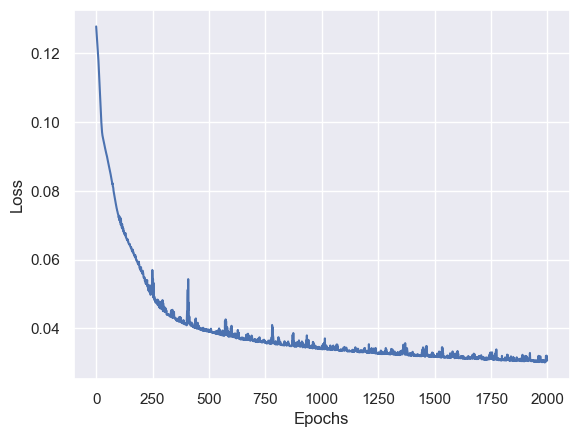

In [89]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

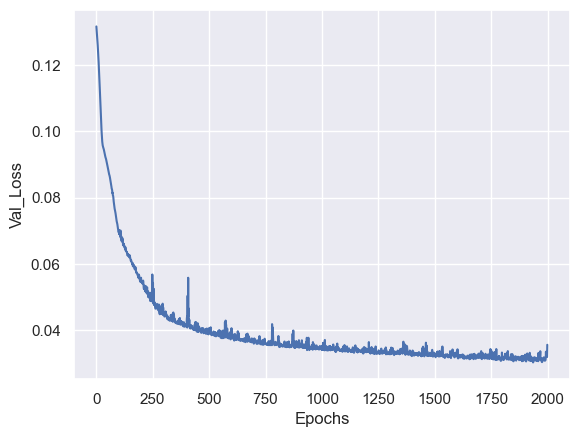

In [90]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [91]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CFE-Giants.h5


In [92]:
predCFE = modelCFE.predict(X_test)

29/29 [==============================] - 0s 2ms/step


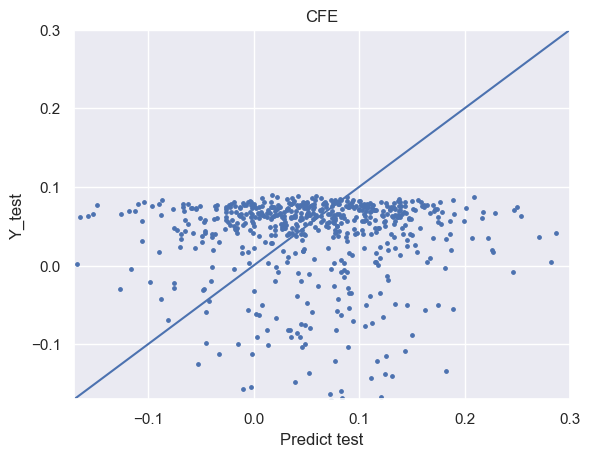

In [93]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [94]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 62.0%


In [95]:
Y_test['CFE_predict'] = predCFE

In [96]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061  4381.6500  1.668714 -0.71171  0.298125   
iDR4_3_SPLUS-n13s37_0039783   4905.6630  2.409293 -0.41882  0.257585   
iDR4_3_MC0105_0024606         5030.6387  3.647585 -0.44044  0.287305   
iDR4_3_MC0022_0021799         4857.5940  3.050860 -0.10433  0.029686   
iDR4_3_SPLUS-n11s35_0003664   4974.9766  3.018178 -0.38805  0.261805   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-s02s07_0032429   5142.5070  2.570743 -0.64862  0.217715   
iDR4_3_MC0048_0007592         4352.4624  0.947510 -1.39140  0.082979   
iDR4_3_SPLUS-n10s38_0045425   5055.6690  3.572111 -0.32847  0.273375   
iDR4_3_MC0137_0039580         4096.2570  0.701436 -1.18880  0.024127   
iDR4_3_MC0003_0034591         4869.4907  3.432368 -0.29800  0.179165   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061 -0.005827  0.244905  0.089963  0.061972   
iDR4_3_SPLUS-n13s37_0039783   0.189950  0.241075  0.125780  0.140442   
iDR4_3_MC0105_0024606         0.152970  0.228085 -0.108690  0.112573   
iDR4_3_MC0022_0021799         0.021853 -0.015636  0.155840 -0.006297   
iDR4_3_SPLUS-n11s35_0003664   0.024054  0.186915  0.322190  0.049432   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s07_0032429   0.126450  0.187305  0.367950  0.042422   
iDR4_3_MC0048_0007592        -0.740430  0.171755  0.494780 -0.167807   
iDR4_3_SPLUS-n10s38_0045425   0.142700  0.243635 -0.088807  0.176872   
iDR4_3_MC0137_0039580        -0.566110  0.140245  0.384910 -0.102507   
iDR4_3_MC0003_0034591         0.032659  0.124245  0.008598  0.041463   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  
ID                                                                            
iDR4_3_STRIPE82-0111_0021061  0.330643  0.248771       0.211743    -0.275968  
iDR4_3_SPLUS-n13s37_0039783   0.306403  0.286381       0.192647     0.065694  
iDR4_3_MC0105_0024606         0.389943  0.193881       0.244148     0.070470  
iDR4_3_MC0022_0021799         0.045207  0.028342       0.103415     0.064097  
iDR4_3_SPLUS-n11s35_0003664   0.301483  0.249251       0.190193     0.073845  
...                                ...       ...            ...          ...  
iDR4_3_SPLUS-s02s07_0032429   0.268883  0.184751       0.241703     0.076159  
iDR4_3_MC0048_0007592         0.171633  0.002825       0.020339    -0.329149  
iDR4_3_SPLUS-n10s38_0045425   0.395133  0.200481       0.226958     0.068651  
iDR4_3_MC0137_0039580         0.076287  0.046401       0.026821    -0.419462  
iDR4_3_MC0003_0034591         0.235243  0.129301       0.166443     0.073347  

[900 rows x 12 columns]

In [97]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [98]:
Parametro = "CAFE"
columnTrain = 'CA_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [99]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0143_0003451         4680.4443  1.839885 -0.77854 -0.004408   
iDR4_3_STRIPE82-0126_0014479  5047.7800  3.111542 -0.78587  0.279465   
iDR4_3_SPLUS-s26s10_0023310   4438.6740  1.023774 -1.71860  0.109859   
iDR4_3_STRIPE82-0109_0019417  4804.0854  2.698043 -0.40162  0.139495   
iDR4_3_SPLUS-n01s18_0009631   4982.1943  3.271730 -0.43976  0.244805   
...                                 ...       ...      ...       ...   
iDR4_3_MC0105_0004056         4306.4697  0.826041 -1.48170  0.106860   
iDR4_3_MC0063_0080166         5604.8940  1.480979 -0.50347 -0.020159   
iDR4_3_SPLUS-n02s18_0030002   4793.0940  2.842208 -0.23229  0.102580   
iDR4_3_MC0095_0084405         4093.7842  0.672740 -1.14440  0.009647   
iDR4_3_MC0062_0041347         4295.9727  2.630941 -0.68082 -0.018534   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0143_0003451        -1.319160  0.206215  1.209240  0.100502   
iDR4_3_STRIPE82-0126_0014479  0.059045  0.158445  0.089993  0.123173   
iDR4_3_SPLUS-s26s10_0023310  -0.611300  0.220305  0.288950 -0.149107   
iDR4_3_STRIPE82-0109_0019417  0.009724  0.074162  0.093637  0.019873   
iDR4_3_SPLUS-n01s18_0009631   0.160170  0.180895 -0.121730  0.144143   
...                                ...       ...       ...       ...   
iDR4_3_MC0105_0004056        -0.763040  0.122615  0.756880 -0.095908   
iDR4_3_MC0063_0080166        -0.551410 -0.012359 -0.344100 -0.112028   
iDR4_3_SPLUS-n02s18_0030002  -0.088924  0.065501  0.118970  0.039142   
iDR4_3_MC0095_0084405        -0.553040  0.125265  0.140960 -0.065807   
iDR4_3_MC0062_0041347         0.222050  0.037275  0.009800  0.084642   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0143_0003451        -0.284217  0.034664  
iDR4_3_STRIPE82-0126_0014479  0.326383  0.248791  
iDR4_3_SPLUS-s26s10_0023310  -0.034704  0.121751  
iDR4_3_STRIPE82-0109_0019417  0.184223  0.098101  
iDR4_3_SPLUS-n01s18_0009631   0.319283  0.186861  
...                                ...       ...  
iDR4_3_MC0105_0004056        -0.126827  0.118571  
iDR4_3_MC0063_0080166        -0.258977 -0.102499  
iDR4_3_SPLUS-n02s18_0030002   0.131934  0.092371  
iDR4_3_MC0095_0084405         0.068977 -0.017430  
iDR4_3_MC0062_0041347        -0.001017  0.097814  

[3236 rows x 10 columns]

In [100]:
modelCAFE = baseline_model_teste()

In [101]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 1200, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200
2/2 - 1s - loss: 0.0754 - val_loss: 0.0738 - 551ms/epoch - 275ms/step
Epoch 2/1200
2/2 - 0s - loss: 0.0737 - val_loss: 0.0723 - 61ms/epoch - 31ms/step
Epoch 3/1200
2/2 - 0s - loss: 0.0722 - val_loss: 0.0709 - 55ms/epoch - 28ms/step
Epoch 4/1200
2/2 - 0s - loss: 0.0708 - val_loss: 0.0696 - 58ms/epoch - 29ms/step
Epoch 5/1200
2/2 - 0s - loss: 0.0694 - val_loss: 0.0682 - 53ms/epoch - 26ms/step
Epoch 6/1200
2/2 - 0s - loss: 0.0681 - val_loss: 0.0668 - 51ms/epoch - 26ms/step
Epoch 7/1200
2/2 - 0s - loss: 0.0667 - val_loss: 0.0655 - 54ms/epoch - 27ms/step
Epoch 8/1200
2/2 - 0s - loss: 0.0654 - val_loss: 0.0643 - 56ms/epoch - 28ms/step
Epoch 9/1200
2/2 - 0s - loss: 0.0642 - val_loss: 0.0631 - 51ms/epoch - 26ms/step
Epoch 10/1200
2/2 - 0s - loss: 0.0631 - val_loss: 0.0623 - 55ms/epoch - 28ms/step
Epoch 11/1200
2/2 - 0s - loss: 0.0622 - val_loss: 0.0617 - 55ms/epoch - 28ms/step
Epoch 12/1200
2/2 - 0s - loss: 0.0617 - val_loss: 0.0614 - 55ms/epoch - 28ms/step
Epoch 13/1200
2/2 - 0s 

Epoch 101/1200
2/2 - 0s - loss: 0.0448 - val_loss: 0.0445 - 41ms/epoch - 21ms/step
Epoch 102/1200
2/2 - 0s - loss: 0.0446 - val_loss: 0.0443 - 61ms/epoch - 31ms/step
Epoch 103/1200
2/2 - 0s - loss: 0.0445 - val_loss: 0.0442 - 43ms/epoch - 22ms/step
Epoch 104/1200
2/2 - 0s - loss: 0.0443 - val_loss: 0.0440 - 41ms/epoch - 21ms/step
Epoch 105/1200
2/2 - 0s - loss: 0.0442 - val_loss: 0.0439 - 44ms/epoch - 22ms/step
Epoch 106/1200
2/2 - 0s - loss: 0.0440 - val_loss: 0.0437 - 42ms/epoch - 21ms/step
Epoch 107/1200
2/2 - 0s - loss: 0.0439 - val_loss: 0.0436 - 41ms/epoch - 21ms/step
Epoch 108/1200
2/2 - 0s - loss: 0.0437 - val_loss: 0.0434 - 41ms/epoch - 21ms/step
Epoch 109/1200
2/2 - 0s - loss: 0.0436 - val_loss: 0.0433 - 44ms/epoch - 22ms/step
Epoch 110/1200
2/2 - 0s - loss: 0.0434 - val_loss: 0.0431 - 42ms/epoch - 21ms/step
Epoch 111/1200
2/2 - 0s - loss: 0.0433 - val_loss: 0.0430 - 41ms/epoch - 21ms/step
Epoch 112/1200
2/2 - 0s - loss: 0.0431 - val_loss: 0.0428 - 43ms/epoch - 22ms/step
Epoc

Epoch 200/1200
2/2 - 0s - loss: 0.0324 - val_loss: 0.0321 - 55ms/epoch - 28ms/step
Epoch 201/1200
2/2 - 0s - loss: 0.0323 - val_loss: 0.0320 - 51ms/epoch - 25ms/step
Epoch 202/1200
2/2 - 0s - loss: 0.0322 - val_loss: 0.0319 - 52ms/epoch - 26ms/step
Epoch 203/1200
2/2 - 0s - loss: 0.0321 - val_loss: 0.0318 - 53ms/epoch - 27ms/step
Epoch 204/1200
2/2 - 0s - loss: 0.0320 - val_loss: 0.0317 - 53ms/epoch - 27ms/step
Epoch 205/1200
2/2 - 0s - loss: 0.0319 - val_loss: 0.0316 - 54ms/epoch - 27ms/step
Epoch 206/1200
2/2 - 0s - loss: 0.0318 - val_loss: 0.0315 - 57ms/epoch - 29ms/step
Epoch 207/1200
2/2 - 0s - loss: 0.0317 - val_loss: 0.0314 - 54ms/epoch - 27ms/step
Epoch 208/1200
2/2 - 0s - loss: 0.0316 - val_loss: 0.0314 - 52ms/epoch - 26ms/step
Epoch 209/1200
2/2 - 0s - loss: 0.0315 - val_loss: 0.0312 - 51ms/epoch - 25ms/step
Epoch 210/1200
2/2 - 0s - loss: 0.0314 - val_loss: 0.0311 - 50ms/epoch - 25ms/step
Epoch 211/1200
2/2 - 0s - loss: 0.0313 - val_loss: 0.0310 - 51ms/epoch - 25ms/step
Epoc

Epoch 299/1200
2/2 - 0s - loss: 0.0248 - val_loss: 0.0246 - 54ms/epoch - 27ms/step
Epoch 300/1200
2/2 - 0s - loss: 0.0247 - val_loss: 0.0246 - 104ms/epoch - 52ms/step
Epoch 301/1200
2/2 - 0s - loss: 0.0247 - val_loss: 0.0245 - 55ms/epoch - 28ms/step
Epoch 302/1200
2/2 - 0s - loss: 0.0246 - val_loss: 0.0245 - 75ms/epoch - 38ms/step
Epoch 303/1200
2/2 - 0s - loss: 0.0245 - val_loss: 0.0244 - 55ms/epoch - 28ms/step
Epoch 304/1200
2/2 - 0s - loss: 0.0245 - val_loss: 0.0244 - 69ms/epoch - 35ms/step
Epoch 305/1200
2/2 - 0s - loss: 0.0244 - val_loss: 0.0243 - 54ms/epoch - 27ms/step
Epoch 306/1200
2/2 - 0s - loss: 0.0244 - val_loss: 0.0242 - 53ms/epoch - 27ms/step
Epoch 307/1200
2/2 - 0s - loss: 0.0243 - val_loss: 0.0242 - 53ms/epoch - 27ms/step
Epoch 308/1200
2/2 - 0s - loss: 0.0242 - val_loss: 0.0241 - 74ms/epoch - 37ms/step
Epoch 309/1200
2/2 - 0s - loss: 0.0242 - val_loss: 0.0240 - 57ms/epoch - 28ms/step
Epoch 310/1200
2/2 - 0s - loss: 0.0241 - val_loss: 0.0240 - 62ms/epoch - 31ms/step
Epo

Epoch 398/1200
2/2 - 0s - loss: 0.0207 - val_loss: 0.0207 - 42ms/epoch - 21ms/step
Epoch 399/1200
2/2 - 0s - loss: 0.0207 - val_loss: 0.0206 - 54ms/epoch - 27ms/step
Epoch 400/1200
2/2 - 0s - loss: 0.0207 - val_loss: 0.0206 - 47ms/epoch - 24ms/step
Epoch 401/1200
2/2 - 0s - loss: 0.0207 - val_loss: 0.0206 - 47ms/epoch - 23ms/step
Epoch 402/1200
2/2 - 0s - loss: 0.0206 - val_loss: 0.0206 - 47ms/epoch - 24ms/step
Epoch 403/1200
2/2 - 0s - loss: 0.0206 - val_loss: 0.0205 - 48ms/epoch - 24ms/step
Epoch 404/1200
2/2 - 0s - loss: 0.0205 - val_loss: 0.0204 - 48ms/epoch - 24ms/step
Epoch 405/1200
2/2 - 0s - loss: 0.0206 - val_loss: 0.0204 - 48ms/epoch - 24ms/step
Epoch 406/1200
2/2 - 0s - loss: 0.0205 - val_loss: 0.0204 - 50ms/epoch - 25ms/step
Epoch 407/1200
2/2 - 0s - loss: 0.0205 - val_loss: 0.0204 - 53ms/epoch - 27ms/step
Epoch 408/1200
2/2 - 0s - loss: 0.0204 - val_loss: 0.0203 - 57ms/epoch - 29ms/step
Epoch 409/1200
2/2 - 0s - loss: 0.0204 - val_loss: 0.0203 - 53ms/epoch - 26ms/step
Epoc

Epoch 497/1200
2/2 - 0s - loss: 0.0184 - val_loss: 0.0184 - 51ms/epoch - 25ms/step
Epoch 498/1200
2/2 - 0s - loss: 0.0184 - val_loss: 0.0183 - 51ms/epoch - 26ms/step
Epoch 499/1200
2/2 - 0s - loss: 0.0183 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 500/1200
2/2 - 0s - loss: 0.0183 - val_loss: 0.0183 - 50ms/epoch - 25ms/step
Epoch 501/1200
2/2 - 0s - loss: 0.0183 - val_loss: 0.0183 - 51ms/epoch - 26ms/step
Epoch 502/1200
2/2 - 0s - loss: 0.0183 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 503/1200
2/2 - 0s - loss: 0.0182 - val_loss: 0.0182 - 53ms/epoch - 27ms/step
Epoch 504/1200
2/2 - 0s - loss: 0.0182 - val_loss: 0.0182 - 49ms/epoch - 25ms/step
Epoch 505/1200
2/2 - 0s - loss: 0.0183 - val_loss: 0.0183 - 51ms/epoch - 26ms/step
Epoch 506/1200
2/2 - 0s - loss: 0.0183 - val_loss: 0.0183 - 49ms/epoch - 24ms/step
Epoch 507/1200
2/2 - 0s - loss: 0.0183 - val_loss: 0.0182 - 54ms/epoch - 27ms/step
Epoch 508/1200
2/2 - 0s - loss: 0.0182 - val_loss: 0.0181 - 57ms/epoch - 29ms/step
Epoc

Epoch 596/1200
2/2 - 0s - loss: 0.0170 - val_loss: 0.0170 - 47ms/epoch - 24ms/step
Epoch 597/1200
2/2 - 0s - loss: 0.0170 - val_loss: 0.0170 - 45ms/epoch - 22ms/step
Epoch 598/1200
2/2 - 0s - loss: 0.0170 - val_loss: 0.0172 - 44ms/epoch - 22ms/step
Epoch 599/1200
2/2 - 0s - loss: 0.0171 - val_loss: 0.0169 - 47ms/epoch - 24ms/step
Epoch 600/1200
2/2 - 0s - loss: 0.0170 - val_loss: 0.0170 - 45ms/epoch - 23ms/step
Epoch 601/1200
2/2 - 0s - loss: 0.0170 - val_loss: 0.0169 - 42ms/epoch - 21ms/step
Epoch 602/1200
2/2 - 0s - loss: 0.0168 - val_loss: 0.0169 - 42ms/epoch - 21ms/step
Epoch 603/1200
2/2 - 0s - loss: 0.0168 - val_loss: 0.0168 - 43ms/epoch - 22ms/step
Epoch 604/1200
2/2 - 0s - loss: 0.0168 - val_loss: 0.0168 - 48ms/epoch - 24ms/step
Epoch 605/1200
2/2 - 0s - loss: 0.0168 - val_loss: 0.0168 - 49ms/epoch - 25ms/step
Epoch 606/1200
2/2 - 0s - loss: 0.0168 - val_loss: 0.0168 - 45ms/epoch - 23ms/step
Epoch 607/1200
2/2 - 0s - loss: 0.0168 - val_loss: 0.0170 - 49ms/epoch - 25ms/step
Epoc

Epoch 695/1200
2/2 - 0s - loss: 0.0161 - val_loss: 0.0163 - 53ms/epoch - 27ms/step
Epoch 696/1200
2/2 - 0s - loss: 0.0161 - val_loss: 0.0162 - 56ms/epoch - 28ms/step
Epoch 697/1200
2/2 - 0s - loss: 0.0161 - val_loss: 0.0160 - 50ms/epoch - 25ms/step
Epoch 698/1200
2/2 - 0s - loss: 0.0160 - val_loss: 0.0160 - 59ms/epoch - 29ms/step
Epoch 699/1200
2/2 - 0s - loss: 0.0160 - val_loss: 0.0160 - 49ms/epoch - 25ms/step
Epoch 700/1200
2/2 - 0s - loss: 0.0159 - val_loss: 0.0159 - 56ms/epoch - 28ms/step
Epoch 701/1200
2/2 - 0s - loss: 0.0159 - val_loss: 0.0160 - 56ms/epoch - 28ms/step
Epoch 702/1200
2/2 - 0s - loss: 0.0160 - val_loss: 0.0161 - 47ms/epoch - 24ms/step
Epoch 703/1200
2/2 - 0s - loss: 0.0160 - val_loss: 0.0160 - 49ms/epoch - 24ms/step
Epoch 704/1200
2/2 - 0s - loss: 0.0159 - val_loss: 0.0160 - 51ms/epoch - 26ms/step
Epoch 705/1200
2/2 - 0s - loss: 0.0159 - val_loss: 0.0159 - 52ms/epoch - 26ms/step
Epoch 706/1200
2/2 - 0s - loss: 0.0159 - val_loss: 0.0160 - 56ms/epoch - 28ms/step
Epoc

Epoch 794/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0153 - 52ms/epoch - 26ms/step
Epoch 795/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0153 - 59ms/epoch - 30ms/step
Epoch 796/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0154 - 50ms/epoch - 25ms/step
Epoch 797/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0155 - 53ms/epoch - 26ms/step
Epoch 798/1200
2/2 - 0s - loss: 0.0154 - val_loss: 0.0154 - 55ms/epoch - 27ms/step
Epoch 799/1200
2/2 - 0s - loss: 0.0155 - val_loss: 0.0154 - 50ms/epoch - 25ms/step
Epoch 800/1200
2/2 - 0s - loss: 0.0154 - val_loss: 0.0153 - 51ms/epoch - 26ms/step
Epoch 801/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0153 - 51ms/epoch - 26ms/step
Epoch 802/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0153 - 56ms/epoch - 28ms/step
Epoch 803/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0153 - 59ms/epoch - 29ms/step
Epoch 804/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0154 - 66ms/epoch - 33ms/step
Epoch 805/1200
2/2 - 0s - loss: 0.0153 - val_loss: 0.0153 - 88ms/epoch - 44ms/step
Epoc

Epoch 893/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0149 - 52ms/epoch - 26ms/step
Epoch 894/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0149 - 62ms/epoch - 31ms/step
Epoch 895/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0149 - 55ms/epoch - 27ms/step
Epoch 896/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0149 - 50ms/epoch - 25ms/step
Epoch 897/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0149 - 47ms/epoch - 24ms/step
Epoch 898/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0149 - 50ms/epoch - 25ms/step
Epoch 899/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0149 - 52ms/epoch - 26ms/step
Epoch 900/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0150 - 49ms/epoch - 25ms/step
Epoch 901/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0150 - 47ms/epoch - 24ms/step
Epoch 902/1200
2/2 - 0s - loss: 0.0148 - val_loss: 0.0151 - 47ms/epoch - 24ms/step
Epoch 903/1200
2/2 - 0s - loss: 0.0149 - val_loss: 0.0152 - 49ms/epoch - 25ms/step
Epoch 904/1200
2/2 - 0s - loss: 0.0150 - val_loss: 0.0150 - 49ms/epoch - 25ms/step
Epoc

Epoch 992/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0147 - 46ms/epoch - 23ms/step
Epoch 993/1200
2/2 - 0s - loss: 0.0146 - val_loss: 0.0147 - 44ms/epoch - 22ms/step
Epoch 994/1200
2/2 - 0s - loss: 0.0146 - val_loss: 0.0146 - 48ms/epoch - 24ms/step
Epoch 995/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 46ms/epoch - 23ms/step
Epoch 996/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 47ms/epoch - 24ms/step
Epoch 997/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 46ms/epoch - 23ms/step
Epoch 998/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 48ms/epoch - 24ms/step
Epoch 999/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 47ms/epoch - 24ms/step
Epoch 1000/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 50ms/epoch - 25ms/step
Epoch 1001/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 50ms/epoch - 25ms/step
Epoch 1002/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 47ms/epoch - 24ms/step
Epoch 1003/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 46ms/epoch - 23ms/step


Epoch 1090/1200
2/2 - 0s - loss: 0.0143 - val_loss: 0.0144 - 57ms/epoch - 28ms/step
Epoch 1091/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0144 - 49ms/epoch - 24ms/step
Epoch 1092/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0144 - 51ms/epoch - 26ms/step
Epoch 1093/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0144 - 49ms/epoch - 24ms/step
Epoch 1094/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0144 - 54ms/epoch - 27ms/step
Epoch 1095/1200
2/2 - 0s - loss: 0.0143 - val_loss: 0.0143 - 52ms/epoch - 26ms/step
Epoch 1096/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0144 - 54ms/epoch - 27ms/step
Epoch 1097/1200
2/2 - 0s - loss: 0.0143 - val_loss: 0.0144 - 50ms/epoch - 25ms/step
Epoch 1098/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0144 - 50ms/epoch - 25ms/step
Epoch 1099/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0144 - 48ms/epoch - 24ms/step
Epoch 1100/1200
2/2 - 0s - loss: 0.0143 - val_loss: 0.0148 - 50ms/epoch - 25ms/step
Epoch 1101/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0145 - 51ms/epoch - 26

Epoch 1188/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0148 - 46ms/epoch - 23ms/step
Epoch 1189/1200
2/2 - 0s - loss: 0.0145 - val_loss: 0.0146 - 48ms/epoch - 24ms/step
Epoch 1190/1200
2/2 - 0s - loss: 0.0144 - val_loss: 0.0144 - 53ms/epoch - 27ms/step
Epoch 1191/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0142 - 56ms/epoch - 28ms/step
Epoch 1192/1200
2/2 - 0s - loss: 0.0141 - val_loss: 0.0142 - 49ms/epoch - 25ms/step
Epoch 1193/1200
2/2 - 0s - loss: 0.0141 - val_loss: 0.0142 - 53ms/epoch - 27ms/step
Epoch 1194/1200
2/2 - 0s - loss: 0.0142 - val_loss: 0.0142 - 52ms/epoch - 26ms/step
Epoch 1195/1200
2/2 - 0s - loss: 0.0141 - val_loss: 0.0143 - 55ms/epoch - 28ms/step
Epoch 1196/1200
2/2 - 0s - loss: 0.0140 - val_loss: 0.0142 - 47ms/epoch - 24ms/step
Epoch 1197/1200
2/2 - 0s - loss: 0.0140 - val_loss: 0.0143 - 45ms/epoch - 23ms/step
Epoch 1198/1200
2/2 - 0s - loss: 0.0141 - val_loss: 0.0142 - 43ms/epoch - 22ms/step
Epoch 1199/1200
2/2 - 0s - loss: 0.0141 - val_loss: 0.0143 - 46ms/epoch - 23

Text(0, 0.5, 'Loss')

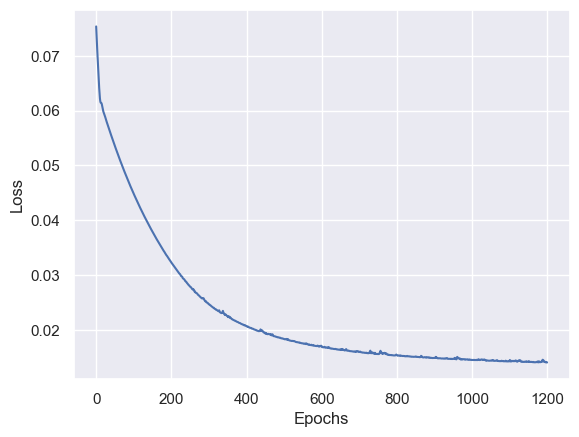

In [102]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

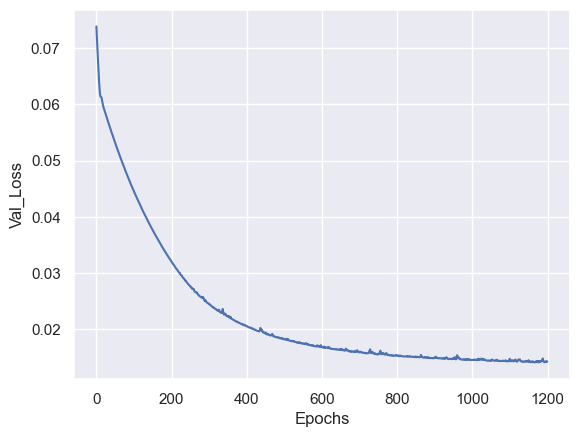

In [103]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [104]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CAFE-Giants.h5


In [105]:
predCAFE = modelCAFE.predict(X_test)

29/29 [==============================] - 0s 1ms/step


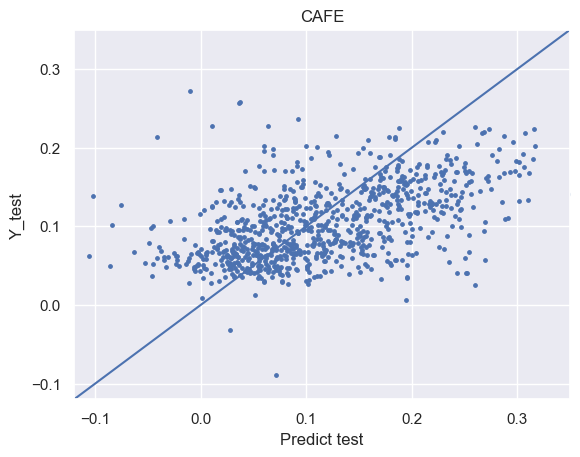

In [106]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [107]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 12.0%


In [108]:
Y_test['CAFE_predict'] = predCAFE

In [109]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061  4381.6500  1.668714 -0.71171  0.298125   
iDR4_3_SPLUS-n13s37_0039783   4905.6630  2.409293 -0.41882  0.257585   
iDR4_3_MC0105_0024606         5030.6387  3.647585 -0.44044  0.287305   
iDR4_3_MC0022_0021799         4857.5940  3.050860 -0.10433  0.029686   
iDR4_3_SPLUS-n11s35_0003664   4974.9766  3.018178 -0.38805  0.261805   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-s02s07_0032429   5142.5070  2.570743 -0.64862  0.217715   
iDR4_3_MC0048_0007592         4352.4624  0.947510 -1.39140  0.082979   
iDR4_3_SPLUS-n10s38_0045425   5055.6690  3.572111 -0.32847  0.273375   
iDR4_3_MC0137_0039580         4096.2570  0.701436 -1.18880  0.024127   
iDR4_3_MC0003_0034591         4869.4907  3.432368 -0.29800  0.179165   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061 -0.005827  0.244905  0.089963  0.061972   
iDR4_3_SPLUS-n13s37_0039783   0.189950  0.241075  0.125780  0.140442   
iDR4_3_MC0105_0024606         0.152970  0.228085 -0.108690  0.112573   
iDR4_3_MC0022_0021799         0.021853 -0.015636  0.155840 -0.006297   
iDR4_3_SPLUS-n11s35_0003664   0.024054  0.186915  0.322190  0.049432   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s07_0032429   0.126450  0.187305  0.367950  0.042422   
iDR4_3_MC0048_0007592        -0.740430  0.171755  0.494780 -0.167807   
iDR4_3_SPLUS-n10s38_0045425   0.142700  0.243635 -0.088807  0.176872   
iDR4_3_MC0137_0039580        -0.566110  0.140245  0.384910 -0.102507   
iDR4_3_MC0003_0034591         0.032659  0.124245  0.008598  0.041463   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0111_0021061  0.330643  0.248771       0.211743    -0.275968   
iDR4_3_SPLUS-n13s37_0039783   0.306403  0.286381       0.192647     0.065694   
iDR4_3_MC0105_0024606         0.389943  0.193881       0.244148     0.070470   
iDR4_3_MC0022_0021799         0.045207  0.028342       0.103415     0.064097   
iDR4_3_SPLUS-n11s35_0003664   0.301483  0.249251       0.190193     0.073845   
...                                ...       ...            ...          ...   
iDR4_3_SPLUS-s02s07_0032429   0.268883  0.184751       0.241703     0.076159   
iDR4_3_MC0048_0007592         0.171633  0.002825       0.020339    -0.329149   
iDR4_3_SPLUS-n10s38_0045425   0.395133  0.200481       0.226958     0.068651   
iDR4_3_MC0137_0039580         0.076287  0.046401       0.026821    -0.419462   
iDR4_3_MC0003_0034591         0.235243  0.129301       0.166443     0.073347   

                              CAFE_predict  
ID                                          
iDR4_3_STRIPE82-0111_0021061      0.108972  
iDR4_3_SPLUS-n13s37_0039783       0.112419  
iDR4_3_MC0105_0024606             0.145865  
iDR4_3_MC0022_0021799             0.083710  
iDR4_3_SPLUS-n11s35_0003664       0.108499  
...                                    ...  
iDR4_3_SPLUS-s02s07_0032429       0.128197  
iDR4_3_MC0048_0007592             0.073642  
iDR4_3_SPLUS-n10s38_0045425       0.131529  
iDR4_3_MC0137_0039580             0.039272  
iDR4_3_MC0003_0034591             0.112187  

[900 rows x 13 columns]

In [110]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [111]:
Parametro = "NFE"
columnTrain = 'N_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [112]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0143_0003451         4680.4443  1.839885 -0.77854 -0.004408   
iDR4_3_STRIPE82-0126_0014479  5047.7800  3.111542 -0.78587  0.279465   
iDR4_3_SPLUS-s26s10_0023310   4438.6740  1.023774 -1.71860  0.109859   
iDR4_3_STRIPE82-0109_0019417  4804.0854  2.698043 -0.40162  0.139495   
iDR4_3_SPLUS-n01s18_0009631   4982.1943  3.271730 -0.43976  0.244805   
...                                 ...       ...      ...       ...   
iDR4_3_MC0105_0004056         4306.4697  0.826041 -1.48170  0.106860   
iDR4_3_MC0063_0080166         5604.8940  1.480979 -0.50347 -0.020159   
iDR4_3_SPLUS-n02s18_0030002   4793.0940  2.842208 -0.23229  0.102580   
iDR4_3_MC0095_0084405         4093.7842  0.672740 -1.14440  0.009647   
iDR4_3_MC0062_0041347         4295.9727  2.630941 -0.68082 -0.018534   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0143_0003451        -1.319160  0.206215  1.209240  0.100502   
iDR4_3_STRIPE82-0126_0014479  0.059045  0.158445  0.089993  0.123173   
iDR4_3_SPLUS-s26s10_0023310  -0.611300  0.220305  0.288950 -0.149107   
iDR4_3_STRIPE82-0109_0019417  0.009724  0.074162  0.093637  0.019873   
iDR4_3_SPLUS-n01s18_0009631   0.160170  0.180895 -0.121730  0.144143   
...                                ...       ...       ...       ...   
iDR4_3_MC0105_0004056        -0.763040  0.122615  0.756880 -0.095908   
iDR4_3_MC0063_0080166        -0.551410 -0.012359 -0.344100 -0.112028   
iDR4_3_SPLUS-n02s18_0030002  -0.088924  0.065501  0.118970  0.039142   
iDR4_3_MC0095_0084405        -0.553040  0.125265  0.140960 -0.065807   
iDR4_3_MC0062_0041347         0.222050  0.037275  0.009800  0.084642   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0143_0003451        -0.284217  0.034664  
iDR4_3_STRIPE82-0126_0014479  0.326383  0.248791  
iDR4_3_SPLUS-s26s10_0023310  -0.034704  0.121751  
iDR4_3_STRIPE82-0109_0019417  0.184223  0.098101  
iDR4_3_SPLUS-n01s18_0009631   0.319283  0.186861  
...                                ...       ...  
iDR4_3_MC0105_0004056        -0.126827  0.118571  
iDR4_3_MC0063_0080166        -0.258977 -0.102499  
iDR4_3_SPLUS-n02s18_0030002   0.131934  0.092371  
iDR4_3_MC0095_0084405         0.068977 -0.017430  
iDR4_3_MC0062_0041347        -0.001017  0.097814  

[3236 rows x 10 columns]

In [113]:
modelNFE = baseline_model_teste()

In [114]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.1068 - val_loss: 0.1036 - 600ms/epoch - 300ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1052 - val_loss: 0.1020 - 62ms/epoch - 31ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1037 - val_loss: 0.1004 - 67ms/epoch - 34ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1023 - val_loss: 0.0989 - 54ms/epoch - 27ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1009 - val_loss: 0.0974 - 47ms/epoch - 24ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.0994 - val_loss: 0.0958 - 54ms/epoch - 27ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.0979 - val_loss: 0.0941 - 61ms/epoch - 31ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.0964 - val_loss: 0.0923 - 57ms/epoch - 29ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.0949 - val_loss: 0.0907 - 66ms/epoch - 33ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.0934 - val_loss: 0.0891 - 61ms/epoch - 30ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.0921 - val_loss: 0.0879 - 52ms/epoch - 26ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.0912 - val_loss: 0.0870 - 50ms/epoch - 25ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.0718 - val_loss: 0.0685 - 53ms/epoch - 26ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0715 - val_loss: 0.0683 - 48ms/epoch - 24ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0713 - val_loss: 0.0681 - 53ms/epoch - 26ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0711 - val_loss: 0.0679 - 48ms/epoch - 24ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0709 - val_loss: 0.0676 - 52ms/epoch - 26ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0706 - val_loss: 0.0674 - 51ms/epoch - 25ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0704 - val_loss: 0.0673 - 49ms/epoch - 24ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0702 - val_loss: 0.0671 - 50ms/epoch - 25ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0699 - val_loss: 0.0669 - 52ms/epoch - 26ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0698 - val_loss: 0.0668 - 58ms/epoch - 29ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0696 - val_loss: 0.0666 - 64ms/epoch - 32ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0694 - val_loss: 0.0665 - 59ms/epoch - 30ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0578 - 49ms/epoch - 25ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0577 - 47ms/epoch - 24ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0583 - val_loss: 0.0575 - 50ms/epoch - 25ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0581 - val_loss: 0.0579 - 49ms/epoch - 25ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0581 - val_loss: 0.0574 - 49ms/epoch - 25ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0580 - val_loss: 0.0573 - 48ms/epoch - 24ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0578 - val_loss: 0.0575 - 49ms/epoch - 24ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0577 - val_loss: 0.0571 - 48ms/epoch - 24ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0577 - val_loss: 0.0571 - 50ms/epoch - 25ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0575 - val_loss: 0.0570 - 50ms/epoch - 25ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0574 - val_loss: 0.0570 - 45ms/epoch - 23ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0573 - val_loss: 0.0570 - 49ms/epoch - 25ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0520 - 53ms/epoch - 27ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0509 - val_loss: 0.0518 - 51ms/epoch - 26ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0523 - 52ms/epoch - 26ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0518 - 54ms/epoch - 27ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0509 - val_loss: 0.0520 - 58ms/epoch - 29ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0508 - val_loss: 0.0516 - 50ms/epoch - 25ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0507 - val_loss: 0.0516 - 52ms/epoch - 26ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0509 - val_loss: 0.0516 - 45ms/epoch - 23ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0507 - val_loss: 0.0515 - 48ms/epoch - 24ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0505 - val_loss: 0.0518 - 51ms/epoch - 26ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0505 - val_loss: 0.0514 - 47ms/epoch - 24ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0507 - val_loss: 0.0514 - 49ms/epoch - 25ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0466 - val_loss: 0.0488 - 53ms/epoch - 27ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0489 - 59ms/epoch - 30ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0465 - val_loss: 0.0486 - 56ms/epoch - 28ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0499 - 51ms/epoch - 25ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0466 - val_loss: 0.0481 - 52ms/epoch - 26ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0495 - 54ms/epoch - 27ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0465 - val_loss: 0.0485 - 54ms/epoch - 27ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0454 - val_loss: 0.0484 - 58ms/epoch - 29ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0482 - 51ms/epoch - 26ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0450 - val_loss: 0.0484 - 54ms/epoch - 27ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0452 - val_loss: 0.0482 - 53ms/epoch - 26ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0481 - 53ms/epoch - 27ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0418 - val_loss: 0.0465 - 48ms/epoch - 24ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0420 - val_loss: 0.0466 - 49ms/epoch - 25ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0419 - val_loss: 0.0478 - 48ms/epoch - 24ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0437 - val_loss: 0.0512 - 48ms/epoch - 24ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0447 - val_loss: 0.0466 - 47ms/epoch - 24ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0419 - val_loss: 0.0465 - 46ms/epoch - 23ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0420 - val_loss: 0.0489 - 46ms/epoch - 23ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0426 - val_loss: 0.0479 - 50ms/epoch - 25ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0435 - val_loss: 0.0467 - 51ms/epoch - 26ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0482 - 50ms/epoch - 25ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0467 - 52ms/epoch - 26ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0420 - val_loss: 0.0469 - 56ms/epoch - 28ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0403 - val_loss: 0.0465 - 70ms/epoch - 35ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0408 - val_loss: 0.0464 - 39ms/epoch - 19ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0403 - val_loss: 0.0457 - 71ms/epoch - 35ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0406 - val_loss: 0.0461 - 39ms/epoch - 19ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0402 - val_loss: 0.0475 - 39ms/epoch - 20ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0405 - val_loss: 0.0468 - 40ms/epoch - 20ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0459 - 41ms/epoch - 20ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0484 - 58ms/epoch - 29ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0414 - val_loss: 0.0475 - 38ms/epoch - 19ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0493 - 38ms/epoch - 19ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0417 - val_loss: 0.0482 - 61ms/epoch - 31ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0421 - val_loss: 0.0477 - 39ms/epoch - 20ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0454 - 40ms/epoch - 20ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0448 - 40ms/epoch - 20ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0452 - 40ms/epoch - 20ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0455 - 45ms/epoch - 23ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0474 - 42ms/epoch - 21ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0461 - 48ms/epoch - 24ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0457 - 43ms/epoch - 22ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0454 - 45ms/epoch - 22ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0450 - 45ms/epoch - 23ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0455 - 44ms/epoch - 22ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0451 - 41ms/epoch - 20ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0388 - val_loss: 0.0452 - 40ms/epoch - 20ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.0385 - val_loss: 0.0455 - 48ms/epoch - 24ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0384 - val_loss: 0.0466 - 49ms/epoch - 25ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0462 - 50ms/epoch - 25ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0455 - 46ms/epoch - 23ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0459 - 50ms/epoch - 25ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0460 - 47ms/epoch - 23ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0386 - val_loss: 0.0476 - 49ms/epoch - 25ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0392 - val_loss: 0.0463 - 48ms/epoch - 24ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0397 - val_loss: 0.0458 - 45ms/epoch - 22ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0453 - 52ms/epoch - 26ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0383 - val_loss: 0.0453 - 52ms/epoch - 26ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0384 - val_loss: 0.0469 - 49ms/epoch - 25ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0453 - 49ms/epoch - 25ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0450 - 52ms/epoch - 26ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0447 - 51ms/epoch - 26ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0456 - 52ms/epoch - 26ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0477 - 53ms/epoch - 27ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0409 - val_loss: 0.0456 - 54ms/epoch - 27ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0488 - 54ms/epoch - 27ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0472 - 55ms/epoch - 28ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0485 - 58ms/epoch - 29ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0397 - val_loss: 0.0460 - 52ms/epoch - 26ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0383 - val_loss: 0.0467 - 51ms/epoch - 25ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0382 - val_loss: 0.0460 - 52ms/epoch - 26ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0384 - val_loss: 0.0471 - 54ms/epoch - 27ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0451 - 59ms/epoch - 30ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0452 - 49ms/epoch - 25ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0448 - 50ms/epoch - 25ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0451 - 50ms/epoch - 25ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0461 - 51ms/epoch - 26ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0461 - 48ms/epoch - 24ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0454 - 52ms/epoch - 26ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0474 - 52ms/epoch - 26ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0475 - 54ms/epoch - 27ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0464 - 50ms/epoch - 25ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0455 - 57ms/epoch - 29ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0453 - 52ms/epoch - 26ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0459 - 51ms/epoch - 25ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0457 - 63ms/epoch - 32ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0456 - 68ms/epoch - 34ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0483 - 72ms/epoch - 36ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0486 - 71ms/epoch - 36ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0394 - val_loss: 0.0472 - 66ms/epoch - 33ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0385 - val_loss: 0.0456 - 62ms/epoch - 31ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0458 - 61ms/epoch - 31ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0460 - 54ms/epoch - 27ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0453 - 56ms/epoch - 28ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0452 - 51ms/epoch - 26

Epoch 1188/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0467 - 53ms/epoch - 27ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0456 - 54ms/epoch - 27ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0459 - 57ms/epoch - 28ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0461 - 57ms/epoch - 28ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0465 - 47ms/epoch - 24ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0463 - 52ms/epoch - 26ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0465 - 56ms/epoch - 28ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0458 - 57ms/epoch - 28ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0459 - 48ms/epoch - 24ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0359 - val_loss: 0.0461 - 53ms/epoch - 27ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0462 - 55ms/epoch - 27ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0464 - 54ms/epoch - 27

Epoch 1286/2000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0460 - 54ms/epoch - 27ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0460 - 58ms/epoch - 29ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0471 - 58ms/epoch - 29ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0465 - 53ms/epoch - 27ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0466 - 53ms/epoch - 27ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0482 - 55ms/epoch - 28ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0500 - 50ms/epoch - 25ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0383 - val_loss: 0.0487 - 55ms/epoch - 27ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0467 - 51ms/epoch - 26ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0473 - 48ms/epoch - 24ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0458 - 51ms/epoch - 26ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0461 - 48ms/epoch - 24

Epoch 1384/2000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0481 - 54ms/epoch - 27ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0475 - 53ms/epoch - 27ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0491 - 53ms/epoch - 27ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0482 - 54ms/epoch - 27ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0480 - 52ms/epoch - 26ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0483 - 57ms/epoch - 29ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0484 - 56ms/epoch - 28ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0494 - 58ms/epoch - 29ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0518 - 53ms/epoch - 27ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0510 - 54ms/epoch - 27ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0514 - 49ms/epoch - 24ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0508 - 50ms/epoch - 25

Epoch 1482/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0475 - 56ms/epoch - 28ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0478 - 56ms/epoch - 28ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0477 - 52ms/epoch - 26ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0475 - 52ms/epoch - 26ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0475 - 51ms/epoch - 25ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0475 - 53ms/epoch - 26ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0478 - 54ms/epoch - 27ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0477 - 48ms/epoch - 24ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0475 - 54ms/epoch - 27ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0474 - 52ms/epoch - 26ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0477 - 52ms/epoch - 26ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0478 - 55ms/epoch - 27

Epoch 1580/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0497 - 41ms/epoch - 20ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0502 - 42ms/epoch - 21ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0484 - 44ms/epoch - 22ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0484 - 43ms/epoch - 22ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0491 - 42ms/epoch - 21ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0483 - 43ms/epoch - 21ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0488 - 41ms/epoch - 21ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0493 - 42ms/epoch - 21ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0484 - 46ms/epoch - 23ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0482 - 44ms/epoch - 22ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0488 - 41ms/epoch - 20ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0488 - 42ms/epoch - 21

Epoch 1678/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0493 - 109ms/epoch - 54ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0494 - 55ms/epoch - 27ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0493 - 56ms/epoch - 28ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0488 - 56ms/epoch - 28ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0486 - 55ms/epoch - 27ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0489 - 54ms/epoch - 27ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0532 - 56ms/epoch - 28ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0518 - 58ms/epoch - 29ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0510 - 51ms/epoch - 26ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0514 - 52ms/epoch - 26ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0499 - 51ms/epoch - 25ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0493 - 46ms/epoch - 2

Epoch 1776/2000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0507 - 56ms/epoch - 28ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0495 - 51ms/epoch - 26ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0494 - 48ms/epoch - 24ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0499 - 52ms/epoch - 26ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0493 - 54ms/epoch - 27ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0505 - 54ms/epoch - 27ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0498 - 56ms/epoch - 28ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0494 - 53ms/epoch - 27ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0491 - 59ms/epoch - 30ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0494 - 55ms/epoch - 27ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0500 - 59ms/epoch - 29ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0496 - 52ms/epoch - 26

Epoch 1874/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0485 - 53ms/epoch - 27ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0498 - 55ms/epoch - 28ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0518 - 52ms/epoch - 26ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0494 - 53ms/epoch - 26ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0496 - 55ms/epoch - 27ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0494 - 59ms/epoch - 30ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0493 - 94ms/epoch - 47ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0512 - 100ms/epoch - 50ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0504 - 95ms/epoch - 47ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0494 - 102ms/epoch - 51ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0503 - 61ms/epoch - 30ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0491 - 74ms/epoch - 

Epoch 1972/2000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0505 - 57ms/epoch - 29ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0509 - 54ms/epoch - 27ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0508 - 52ms/epoch - 26ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0503 - 53ms/epoch - 27ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0334 - val_loss: 0.0496 - 58ms/epoch - 29ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0500 - 55ms/epoch - 28ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0333 - val_loss: 0.0507 - 53ms/epoch - 26ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0335 - val_loss: 0.0498 - 58ms/epoch - 29ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0334 - val_loss: 0.0496 - 51ms/epoch - 25ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0334 - val_loss: 0.0504 - 56ms/epoch - 28ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0503 - 53ms/epoch - 26ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0524 - 54ms/epoch - 27

Text(0, 0.5, 'Loss')

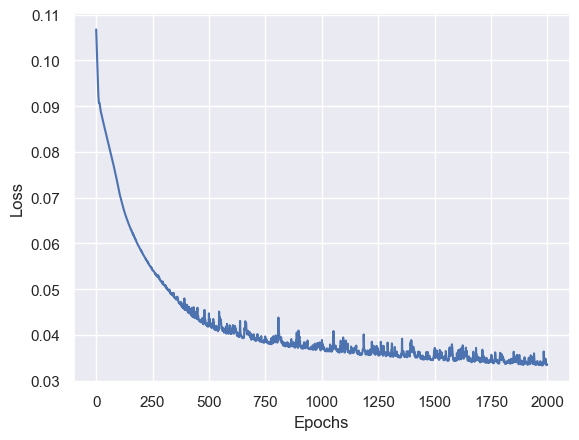

In [115]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

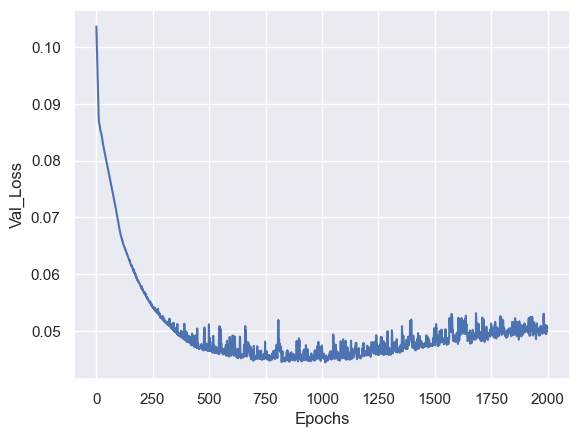

In [116]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [117]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NFE-Giants.h5


In [118]:
predNFE = modelNFE.predict(X_test)

29/29 [==============================] - 0s 2ms/step


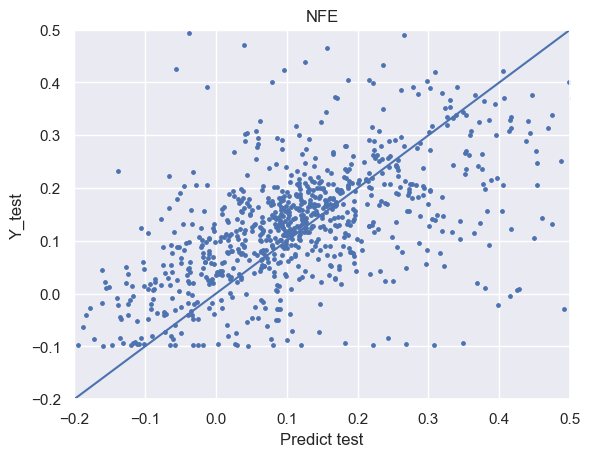

In [119]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [120]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -77.0%


In [121]:
Y_test['NFE_predict'] = predNFE

In [122]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061  4381.6500  1.668714 -0.71171  0.298125   
iDR4_3_SPLUS-n13s37_0039783   4905.6630  2.409293 -0.41882  0.257585   
iDR4_3_MC0105_0024606         5030.6387  3.647585 -0.44044  0.287305   
iDR4_3_MC0022_0021799         4857.5940  3.050860 -0.10433  0.029686   
iDR4_3_SPLUS-n11s35_0003664   4974.9766  3.018178 -0.38805  0.261805   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-s02s07_0032429   5142.5070  2.570743 -0.64862  0.217715   
iDR4_3_MC0048_0007592         4352.4624  0.947510 -1.39140  0.082979   
iDR4_3_SPLUS-n10s38_0045425   5055.6690  3.572111 -0.32847  0.273375   
iDR4_3_MC0137_0039580         4096.2570  0.701436 -1.18880  0.024127   
iDR4_3_MC0003_0034591         4869.4907  3.432368 -0.29800  0.179165   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061 -0.005827  0.244905  0.089963  0.061972   
iDR4_3_SPLUS-n13s37_0039783   0.189950  0.241075  0.125780  0.140442   
iDR4_3_MC0105_0024606         0.152970  0.228085 -0.108690  0.112573   
iDR4_3_MC0022_0021799         0.021853 -0.015636  0.155840 -0.006297   
iDR4_3_SPLUS-n11s35_0003664   0.024054  0.186915  0.322190  0.049432   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s07_0032429   0.126450  0.187305  0.367950  0.042422   
iDR4_3_MC0048_0007592        -0.740430  0.171755  0.494780 -0.167807   
iDR4_3_SPLUS-n10s38_0045425   0.142700  0.243635 -0.088807  0.176872   
iDR4_3_MC0137_0039580        -0.566110  0.140245  0.384910 -0.102507   
iDR4_3_MC0003_0034591         0.032659  0.124245  0.008598  0.041463   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0111_0021061  0.330643  0.248771       0.211743    -0.275968   
iDR4_3_SPLUS-n13s37_0039783   0.306403  0.286381       0.192647     0.065694   
iDR4_3_MC0105_0024606         0.389943  0.193881       0.244148     0.070470   
iDR4_3_MC0022_0021799         0.045207  0.028342       0.103415     0.064097   
iDR4_3_SPLUS-n11s35_0003664   0.301483  0.249251       0.190193     0.073845   
...                                ...       ...            ...          ...   
iDR4_3_SPLUS-s02s07_0032429   0.268883  0.184751       0.241703     0.076159   
iDR4_3_MC0048_0007592         0.171633  0.002825       0.020339    -0.329149   
iDR4_3_SPLUS-n10s38_0045425   0.395133  0.200481       0.226958     0.068651   
iDR4_3_MC0137_0039580         0.076287  0.046401       0.026821    -0.419462   
iDR4_3_MC0003_0034591         0.235243  0.129301       0.166443     0.073347   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_STRIPE82-0111_0021061      0.108972     0.140107  
iDR4_3_SPLUS-n13s37_0039783       0.112419     0.247374  
iDR4_3_MC0105_0024606             0.145865    -0.095380  
iDR4_3_MC0022_0021799             0.083710     0.343405  
iDR4_3_SPLUS-n11s35_0003664       0.108499     0.051469  
...                                    ...          ...  
iDR4_3_SPLUS-s02s07_0032429       0.128197     0.020167  
iDR4_3_MC0048_0007592             0.073642     1.773955  
iDR4_3_SPLUS-n10s38_0045425       0.131529    -0.010924  
iDR4_3_MC0137_0039580             0.039272     0.092771  
iDR4_3_MC0003_0034591             0.112187     0.035100  

[900 rows x 14 columns]

In [123]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [166]:
Parametro = "MGFE"
columnTrain = 'MG_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [125]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0143_0003451         4680.4443  1.839885 -0.77854 -0.004408   
iDR4_3_STRIPE82-0126_0014479  5047.7800  3.111542 -0.78587  0.279465   
iDR4_3_SPLUS-s26s10_0023310   4438.6740  1.023774 -1.71860  0.109859   
iDR4_3_STRIPE82-0109_0019417  4804.0854  2.698043 -0.40162  0.139495   
iDR4_3_SPLUS-n01s18_0009631   4982.1943  3.271730 -0.43976  0.244805   
...                                 ...       ...      ...       ...   
iDR4_3_MC0105_0004056         4306.4697  0.826041 -1.48170  0.106860   
iDR4_3_MC0063_0080166         5604.8940  1.480979 -0.50347 -0.020159   
iDR4_3_SPLUS-n02s18_0030002   4793.0940  2.842208 -0.23229  0.102580   
iDR4_3_MC0095_0084405         4093.7842  0.672740 -1.14440  0.009647   
iDR4_3_MC0062_0041347         4295.9727  2.630941 -0.68082 -0.018534   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0143_0003451        -1.319160  0.206215  1.209240  0.100502   
iDR4_3_STRIPE82-0126_0014479  0.059045  0.158445  0.089993  0.123173   
iDR4_3_SPLUS-s26s10_0023310  -0.611300  0.220305  0.288950 -0.149107   
iDR4_3_STRIPE82-0109_0019417  0.009724  0.074162  0.093637  0.019873   
iDR4_3_SPLUS-n01s18_0009631   0.160170  0.180895 -0.121730  0.144143   
...                                ...       ...       ...       ...   
iDR4_3_MC0105_0004056        -0.763040  0.122615  0.756880 -0.095908   
iDR4_3_MC0063_0080166        -0.551410 -0.012359 -0.344100 -0.112028   
iDR4_3_SPLUS-n02s18_0030002  -0.088924  0.065501  0.118970  0.039142   
iDR4_3_MC0095_0084405        -0.553040  0.125265  0.140960 -0.065807   
iDR4_3_MC0062_0041347         0.222050  0.037275  0.009800  0.084642   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0143_0003451        -0.284217  0.034664  
iDR4_3_STRIPE82-0126_0014479  0.326383  0.248791  
iDR4_3_SPLUS-s26s10_0023310  -0.034704  0.121751  
iDR4_3_STRIPE82-0109_0019417  0.184223  0.098101  
iDR4_3_SPLUS-n01s18_0009631   0.319283  0.186861  
...                                ...       ...  
iDR4_3_MC0105_0004056        -0.126827  0.118571  
iDR4_3_MC0063_0080166        -0.258977 -0.102499  
iDR4_3_SPLUS-n02s18_0030002   0.131934  0.092371  
iDR4_3_MC0095_0084405         0.068977 -0.017430  
iDR4_3_MC0062_0041347        -0.001017  0.097814  

[3236 rows x 10 columns]

In [126]:
modelMGFE = baseline_model_teste()

In [127]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.1030 - val_loss: 0.1030 - 561ms/epoch - 281ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1018 - val_loss: 0.1021 - 84ms/epoch - 42ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1009 - val_loss: 0.1012 - 80ms/epoch - 40ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1000 - val_loss: 0.1002 - 71ms/epoch - 36ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.0990 - val_loss: 0.0991 - 54ms/epoch - 27ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.0979 - val_loss: 0.0979 - 55ms/epoch - 28ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.0967 - val_loss: 0.0966 - 57ms/epoch - 29ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.0954 - val_loss: 0.0951 - 48ms/epoch - 24ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.0939 - val_loss: 0.0936 - 54ms/epoch - 27ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.0924 - val_loss: 0.0919 - 55ms/epoch - 27ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.0907 - val_loss: 0.0900 - 54ms/epoch - 27ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.0889 - val_loss: 0.0880 - 54ms/epoch - 27ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.0517 - val_loss: 0.0514 - 54ms/epoch - 27ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0515 - val_loss: 0.0512 - 60ms/epoch - 30ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0513 - val_loss: 0.0510 - 55ms/epoch - 28ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0511 - val_loss: 0.0508 - 52ms/epoch - 26ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0506 - 51ms/epoch - 26ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0507 - val_loss: 0.0504 - 53ms/epoch - 27ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0505 - val_loss: 0.0502 - 53ms/epoch - 27ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0501 - 56ms/epoch - 28ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0501 - val_loss: 0.0498 - 55ms/epoch - 28ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0499 - val_loss: 0.0497 - 54ms/epoch - 27ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0497 - val_loss: 0.0495 - 57ms/epoch - 29ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0495 - val_loss: 0.0493 - 57ms/epoch - 29ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0382 - val_loss: 0.0378 - 52ms/epoch - 26ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0382 - val_loss: 0.0376 - 58ms/epoch - 29ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0375 - 59ms/epoch - 30ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0373 - 52ms/epoch - 26ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0372 - 56ms/epoch - 28ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0371 - 56ms/epoch - 28ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0370 - 52ms/epoch - 26ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0370 - 49ms/epoch - 25ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0375 - val_loss: 0.0369 - 49ms/epoch - 25ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0368 - 56ms/epoch - 28ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0373 - val_loss: 0.0367 - 49ms/epoch - 25ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0366 - 56ms/epoch - 28ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0308 - 68ms/epoch - 34ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0309 - 59ms/epoch - 30ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0309 - 68ms/epoch - 34ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0314 - val_loss: 0.0307 - 54ms/epoch - 27ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0312 - val_loss: 0.0306 - 69ms/epoch - 35ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0311 - val_loss: 0.0305 - 56ms/epoch - 28ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0305 - 69ms/epoch - 34ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0310 - val_loss: 0.0304 - 56ms/epoch - 28ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0304 - 53ms/epoch - 26ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0303 - 52ms/epoch - 26ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0302 - 55ms/epoch - 28ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0302 - 52ms/epoch - 26ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0268 - 44ms/epoch - 22ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0268 - 48ms/epoch - 24ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0268 - 46ms/epoch - 23ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0268 - 44ms/epoch - 22ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0267 - 48ms/epoch - 24ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0268 - 44ms/epoch - 22ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0267 - 53ms/epoch - 26ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0266 - 45ms/epoch - 23ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0266 - 45ms/epoch - 23ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0268 - 44ms/epoch - 22ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0267 - 44ms/epoch - 22ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0265 - 50ms/epoch - 25ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0245 - 47ms/epoch - 23ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0244 - 47ms/epoch - 24ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0243 - 54ms/epoch - 27ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0243 - 49ms/epoch - 24ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0243 - 45ms/epoch - 22ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0243 - 47ms/epoch - 24ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0243 - 46ms/epoch - 23ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0244 - 47ms/epoch - 23ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0243 - 48ms/epoch - 24ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0241 - 54ms/epoch - 27ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0254 - 52ms/epoch - 26ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0260 - 51ms/epoch - 26ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0227 - 49ms/epoch - 25ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0228 - 53ms/epoch - 27ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0228 - 51ms/epoch - 26ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0226 - val_loss: 0.0227 - 55ms/epoch - 27ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0224 - val_loss: 0.0227 - 58ms/epoch - 29ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0224 - val_loss: 0.0229 - 50ms/epoch - 25ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0226 - val_loss: 0.0227 - 50ms/epoch - 25ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0226 - val_loss: 0.0232 - 52ms/epoch - 26ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0228 - val_loss: 0.0229 - 53ms/epoch - 27ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0227 - 57ms/epoch - 29ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0227 - val_loss: 0.0230 - 67ms/epoch - 34ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0226 - val_loss: 0.0236 - 61ms/epoch - 31ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0214 - val_loss: 0.0223 - 57ms/epoch - 28ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0215 - 55ms/epoch - 28ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0233 - 56ms/epoch - 28ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0246 - 52ms/epoch - 26ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0228 - 50ms/epoch - 25ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0225 - val_loss: 0.0217 - 55ms/epoch - 27ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0218 - 60ms/epoch - 30ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0215 - 51ms/epoch - 25ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0215 - 53ms/epoch - 27ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0215 - val_loss: 0.0220 - 57ms/epoch - 28ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0216 - val_loss: 0.0217 - 52ms/epoch - 26ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0213 - val_loss: 0.0218 - 52ms/epoch - 26ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0207 - 48ms/epoch - 24ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0210 - 50ms/epoch - 25ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0212 - 51ms/epoch - 26ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0209 - 51ms/epoch - 26ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0210 - 57ms/epoch - 29ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0212 - 55ms/epoch - 28ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0208 - 50ms/epoch - 25ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0207 - 53ms/epoch - 27ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0209 - 52ms/epoch - 26ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0209 - 54ms/epoch - 27ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0207 - 57ms/epoch - 29ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0207 - 56ms/epoch - 28ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0204 - 52ms/epoch - 26ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0200 - val_loss: 0.0204 - 51ms/epoch - 26ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0199 - val_loss: 0.0205 - 50ms/epoch - 25ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0199 - val_loss: 0.0208 - 45ms/epoch - 23ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0200 - val_loss: 0.0203 - 54ms/epoch - 27ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0204 - 53ms/epoch - 27ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0204 - 59ms/epoch - 30ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0204 - 48ms/epoch - 24ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0197 - val_loss: 0.0203 - 49ms/epoch - 25ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0199 - val_loss: 0.0208 - 51ms/epoch - 25ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0200 - val_loss: 0.0204 - 53ms/epoch - 27ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0198 - val_loss: 0.0203 - 48ms/epoch - 24ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0199 - 50ms/epoch - 25ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0201 - 50ms/epoch - 25ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0198 - 51ms/epoch - 26ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0205 - 51ms/epoch - 25ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0195 - val_loss: 0.0212 - 54ms/epoch - 27ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0200 - 54ms/epoch - 27ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0202 - val_loss: 0.0213 - 54ms/epoch - 27ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0218 - 50ms/epoch - 25ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0204 - 48ms/epoch - 24ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0198 - val_loss: 0.0198 - 56ms/epoch - 28ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0199 - 54ms/epoch - 27ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0199 - 56ms/epoch - 28ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0198 - 47ms/epoch - 24ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0199 - 53ms/epoch - 26ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0196 - 47ms/epoch - 24ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0196 - 48ms/epoch - 24ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0200 - 49ms/epoch - 24ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0201 - 51ms/epoch - 26ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0196 - 53ms/epoch - 26ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0195 - 49ms/epoch - 25ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0199 - 49ms/epoch - 25ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0196 - 51ms/epoch - 26ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0196 - 49ms/epoch - 25ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0195 - 51ms/epoch - 25

Epoch 1188/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0198 - 49ms/epoch - 25ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0193 - 52ms/epoch - 26ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0202 - 51ms/epoch - 26ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0203 - 54ms/epoch - 27ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0193 - val_loss: 0.0194 - 54ms/epoch - 27ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0193 - 52ms/epoch - 26ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0194 - 48ms/epoch - 24ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0195 - 50ms/epoch - 25ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0194 - 53ms/epoch - 27ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0193 - 54ms/epoch - 27ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0196 - 50ms/epoch - 25ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0201 - 52ms/epoch - 26

Epoch 1286/2000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0190 - 57ms/epoch - 29ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0191 - 56ms/epoch - 28ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0190 - 51ms/epoch - 25ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0191 - 52ms/epoch - 26ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0191 - 52ms/epoch - 26ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0193 - 53ms/epoch - 27ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0190 - 54ms/epoch - 27ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0195 - 54ms/epoch - 27ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0185 - val_loss: 0.0193 - 53ms/epoch - 26ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0190 - 59ms/epoch - 29ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0191 - 52ms/epoch - 26ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 54ms/epoch - 27

Epoch 1384/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0189 - 66ms/epoch - 33ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0189 - 68ms/epoch - 34ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0188 - 72ms/epoch - 36ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0189 - 69ms/epoch - 35ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0191 - 55ms/epoch - 27ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0189 - 65ms/epoch - 33ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0188 - 52ms/epoch - 26ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0191 - 64ms/epoch - 32ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0196 - 66ms/epoch - 33ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0191 - 66ms/epoch - 33ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0188 - 67ms/epoch - 34ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0200 - 61ms/epoch - 30

Epoch 1482/2000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0190 - 46ms/epoch - 23ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0186 - 45ms/epoch - 23ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0192 - 45ms/epoch - 23ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 46ms/epoch - 23ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0186 - 45ms/epoch - 23ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0186 - 47ms/epoch - 24ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0187 - 52ms/epoch - 26ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0187 - 56ms/epoch - 28ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0187 - 59ms/epoch - 29ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0186 - 49ms/epoch - 25ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0190 - 46ms/epoch - 23ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0186 - 46ms/epoch - 23

Epoch 1580/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0185 - 44ms/epoch - 22ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 45ms/epoch - 23ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 43ms/epoch - 22ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 44ms/epoch - 22ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 47ms/epoch - 24ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0185 - 52ms/epoch - 26ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 56ms/epoch - 28ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 46ms/epoch - 23ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 46ms/epoch - 23ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 45ms/epoch - 23ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0186 - 95ms/epoch - 47ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0184 - 44ms/epoch - 22

Epoch 1678/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0183 - 59ms/epoch - 30ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0183 - 59ms/epoch - 29ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0185 - 60ms/epoch - 30ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0184 - 51ms/epoch - 26ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0184 - 55ms/epoch - 28ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0183 - 52ms/epoch - 26ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0183 - 53ms/epoch - 27ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0182 - 53ms/epoch - 26ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0184 - 58ms/epoch - 29ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0183 - 52ms/epoch - 26ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0183 - 52ms/epoch - 26

Epoch 1776/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0192 - 54ms/epoch - 27ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0205 - 54ms/epoch - 27ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0189 - 49ms/epoch - 25ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0183 - 50ms/epoch - 25ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0182 - 53ms/epoch - 27ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0178 - val_loss: 0.0182 - 52ms/epoch - 26ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0182 - 55ms/epoch - 28ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0182 - 49ms/epoch - 25ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0184 - 52ms/epoch - 26ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0182 - 50ms/epoch - 25ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0183 - 54ms/epoch - 27ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0183 - 75ms/epoch - 37

Epoch 1874/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0181 - 47ms/epoch - 24ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0190 - 47ms/epoch - 24ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0179 - val_loss: 0.0191 - 46ms/epoch - 23ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0184 - val_loss: 0.0181 - 48ms/epoch - 24ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0182 - 48ms/epoch - 24ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0191 - 44ms/epoch - 22ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0180 - val_loss: 0.0184 - 43ms/epoch - 22ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0181 - 47ms/epoch - 24ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0180 - 49ms/epoch - 25ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0179 - 47ms/epoch - 23ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0180 - 46ms/epoch - 23ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0180 - 46ms/epoch - 23

Epoch 1972/2000
2/2 - 0s - loss: 0.0178 - val_loss: 0.0194 - 48ms/epoch - 24ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0182 - 52ms/epoch - 26ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0182 - 57ms/epoch - 29ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0176 - val_loss: 0.0179 - 53ms/epoch - 27ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0179 - 54ms/epoch - 27ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0180 - 53ms/epoch - 27ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0181 - 53ms/epoch - 27ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0179 - 52ms/epoch - 26ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0172 - val_loss: 0.0179 - 51ms/epoch - 25ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0173 - val_loss: 0.0178 - 54ms/epoch - 27ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0172 - val_loss: 0.0182 - 51ms/epoch - 25ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0180 - 51ms/epoch - 25

Text(0, 0.5, 'Loss')

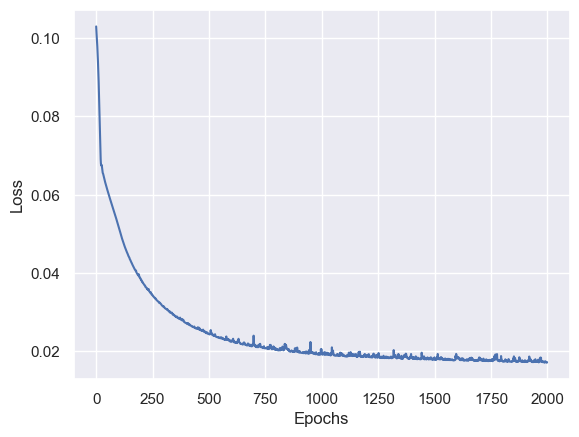

In [128]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

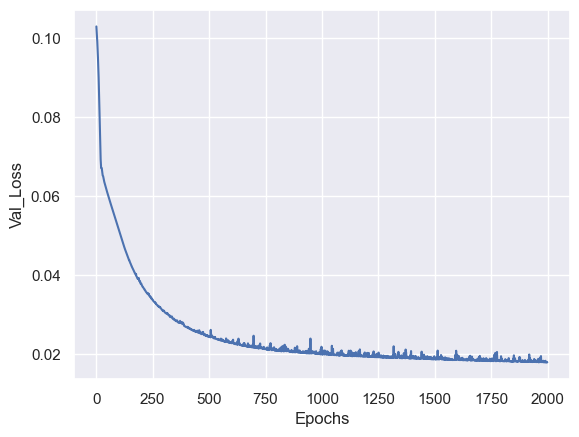

In [129]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [130]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\MGFE-Giants.h5


In [131]:
predMGFE = modelMGFE.predict(X_test)

29/29 [==============================] - 0s 2ms/step


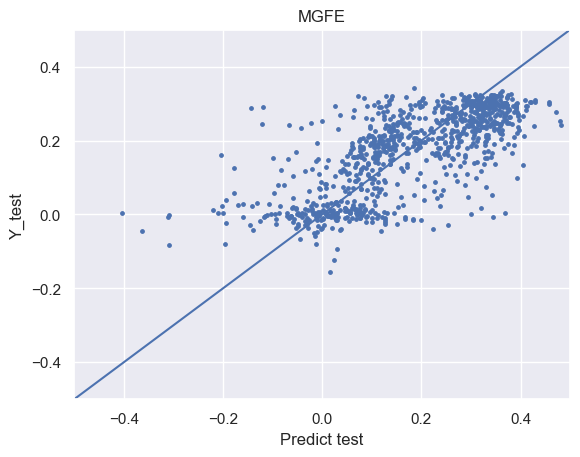

In [167]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [133]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 51.0%


In [134]:
Y_test['MGFE_predict'] = predMGFE

In [135]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061  4381.6500  1.668714 -0.71171  0.298125   
iDR4_3_SPLUS-n13s37_0039783   4905.6630  2.409293 -0.41882  0.257585   
iDR4_3_MC0105_0024606         5030.6387  3.647585 -0.44044  0.287305   
iDR4_3_MC0022_0021799         4857.5940  3.050860 -0.10433  0.029686   
iDR4_3_SPLUS-n11s35_0003664   4974.9766  3.018178 -0.38805  0.261805   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-s02s07_0032429   5142.5070  2.570743 -0.64862  0.217715   
iDR4_3_MC0048_0007592         4352.4624  0.947510 -1.39140  0.082979   
iDR4_3_SPLUS-n10s38_0045425   5055.6690  3.572111 -0.32847  0.273375   
iDR4_3_MC0137_0039580         4096.2570  0.701436 -1.18880  0.024127   
iDR4_3_MC0003_0034591         4869.4907  3.432368 -0.29800  0.179165   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061 -0.005827  0.244905  0.089963  0.061972   
iDR4_3_SPLUS-n13s37_0039783   0.189950  0.241075  0.125780  0.140442   
iDR4_3_MC0105_0024606         0.152970  0.228085 -0.108690  0.112573   
iDR4_3_MC0022_0021799         0.021853 -0.015636  0.155840 -0.006297   
iDR4_3_SPLUS-n11s35_0003664   0.024054  0.186915  0.322190  0.049432   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s07_0032429   0.126450  0.187305  0.367950  0.042422   
iDR4_3_MC0048_0007592        -0.740430  0.171755  0.494780 -0.167807   
iDR4_3_SPLUS-n10s38_0045425   0.142700  0.243635 -0.088807  0.176872   
iDR4_3_MC0137_0039580        -0.566110  0.140245  0.384910 -0.102507   
iDR4_3_MC0003_0034591         0.032659  0.124245  0.008598  0.041463   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0111_0021061  0.330643  0.248771       0.211743    -0.275968   
iDR4_3_SPLUS-n13s37_0039783   0.306403  0.286381       0.192647     0.065694   
iDR4_3_MC0105_0024606         0.389943  0.193881       0.244148     0.070470   
iDR4_3_MC0022_0021799         0.045207  0.028342       0.103415     0.064097   
iDR4_3_SPLUS-n11s35_0003664   0.301483  0.249251       0.190193     0.073845   
...                                ...       ...            ...          ...   
iDR4_3_SPLUS-s02s07_0032429   0.268883  0.184751       0.241703     0.076159   
iDR4_3_MC0048_0007592         0.171633  0.002825       0.020339    -0.329149   
iDR4_3_SPLUS-n10s38_0045425   0.395133  0.200481       0.226958     0.068651   
iDR4_3_MC0137_0039580         0.076287  0.046401       0.026821    -0.419462   
iDR4_3_MC0003_0034591         0.235243  0.129301       0.166443     0.073347   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_STRIPE82-0111_0021061      0.108972     0.140107      0.238612  
iDR4_3_SPLUS-n13s37_0039783       0.112419     0.247374      0.225994  
iDR4_3_MC0105_0024606             0.145865    -0.095380      0.297873  
iDR4_3_MC0022_0021799             0.083710     0.343405      0.118345  
iDR4_3_SPLUS-n11s35_0003664       0.108499     0.051469      0.225567  
...                                    ...          ...           ...  
iDR4_3_SPLUS-s02s07_0032429       0.128197     0.020167      0.284043  
iDR4_3_MC0048_0007592             0.073642     1.773955      0.129506  
iDR4_3_SPLUS-n10s38_0045425       0.131529    -0.010924      0.272344  
iDR4_3_MC0137_0039580             0.039272     0.092771      0.017359  
iDR4_3_MC0003_0034591             0.112187     0.035100      0.207594  

[900 rows x 15 columns]

In [136]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [137]:
Parametro = "SIFE"
columnTrain = 'SI_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [138]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0143_0003451         4680.4443  1.839885 -0.77854 -0.004408   
iDR4_3_STRIPE82-0126_0014479  5047.7800  3.111542 -0.78587  0.279465   
iDR4_3_SPLUS-s26s10_0023310   4438.6740  1.023774 -1.71860  0.109859   
iDR4_3_STRIPE82-0109_0019417  4804.0854  2.698043 -0.40162  0.139495   
iDR4_3_SPLUS-n01s18_0009631   4982.1943  3.271730 -0.43976  0.244805   
...                                 ...       ...      ...       ...   
iDR4_3_MC0105_0004056         4306.4697  0.826041 -1.48170  0.106860   
iDR4_3_MC0063_0080166         5604.8940  1.480979 -0.50347 -0.020159   
iDR4_3_SPLUS-n02s18_0030002   4793.0940  2.842208 -0.23229  0.102580   
iDR4_3_MC0095_0084405         4093.7842  0.672740 -1.14440  0.009647   
iDR4_3_MC0062_0041347         4295.9727  2.630941 -0.68082 -0.018534   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0143_0003451        -1.319160  0.206215  1.209240  0.100502   
iDR4_3_STRIPE82-0126_0014479  0.059045  0.158445  0.089993  0.123173   
iDR4_3_SPLUS-s26s10_0023310  -0.611300  0.220305  0.288950 -0.149107   
iDR4_3_STRIPE82-0109_0019417  0.009724  0.074162  0.093637  0.019873   
iDR4_3_SPLUS-n01s18_0009631   0.160170  0.180895 -0.121730  0.144143   
...                                ...       ...       ...       ...   
iDR4_3_MC0105_0004056        -0.763040  0.122615  0.756880 -0.095908   
iDR4_3_MC0063_0080166        -0.551410 -0.012359 -0.344100 -0.112028   
iDR4_3_SPLUS-n02s18_0030002  -0.088924  0.065501  0.118970  0.039142   
iDR4_3_MC0095_0084405        -0.553040  0.125265  0.140960 -0.065807   
iDR4_3_MC0062_0041347         0.222050  0.037275  0.009800  0.084642   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0143_0003451        -0.284217  0.034664  
iDR4_3_STRIPE82-0126_0014479  0.326383  0.248791  
iDR4_3_SPLUS-s26s10_0023310  -0.034704  0.121751  
iDR4_3_STRIPE82-0109_0019417  0.184223  0.098101  
iDR4_3_SPLUS-n01s18_0009631   0.319283  0.186861  
...                                ...       ...  
iDR4_3_MC0105_0004056        -0.126827  0.118571  
iDR4_3_MC0063_0080166        -0.258977 -0.102499  
iDR4_3_SPLUS-n02s18_0030002   0.131934  0.092371  
iDR4_3_MC0095_0084405         0.068977 -0.017430  
iDR4_3_MC0062_0041347        -0.001017  0.097814  

[3236 rows x 10 columns]

In [139]:
modelSIFE = baseline_model_teste()

In [140]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 1500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1500
2/2 - 1s - loss: 0.0784 - val_loss: 0.0761 - 564ms/epoch - 282ms/step
Epoch 2/1500
2/2 - 0s - loss: 0.0769 - val_loss: 0.0750 - 88ms/epoch - 44ms/step
Epoch 3/1500
2/2 - 0s - loss: 0.0758 - val_loss: 0.0742 - 69ms/epoch - 35ms/step
Epoch 4/1500
2/2 - 0s - loss: 0.0750 - val_loss: 0.0734 - 144ms/epoch - 72ms/step
Epoch 5/1500
2/2 - 0s - loss: 0.0743 - val_loss: 0.0726 - 104ms/epoch - 52ms/step
Epoch 6/1500
2/2 - 0s - loss: 0.0735 - val_loss: 0.0717 - 54ms/epoch - 27ms/step
Epoch 7/1500
2/2 - 0s - loss: 0.0725 - val_loss: 0.0708 - 54ms/epoch - 27ms/step
Epoch 8/1500
2/2 - 0s - loss: 0.0716 - val_loss: 0.0697 - 58ms/epoch - 29ms/step
Epoch 9/1500
2/2 - 0s - loss: 0.0706 - val_loss: 0.0687 - 53ms/epoch - 27ms/step
Epoch 10/1500
2/2 - 0s - loss: 0.0695 - val_loss: 0.0675 - 55ms/epoch - 28ms/step
Epoch 11/1500
2/2 - 0s - loss: 0.0684 - val_loss: 0.0663 - 65ms/epoch - 32ms/step
Epoch 12/1500
2/2 - 0s - loss: 0.0672 - val_loss: 0.0650 - 52ms/epoch - 26ms/step
Epoch 13/1500
2/2 - 0

Epoch 101/1500
2/2 - 0s - loss: 0.0433 - val_loss: 0.0420 - 49ms/epoch - 25ms/step
Epoch 102/1500
2/2 - 0s - loss: 0.0431 - val_loss: 0.0418 - 53ms/epoch - 27ms/step
Epoch 103/1500
2/2 - 0s - loss: 0.0430 - val_loss: 0.0417 - 54ms/epoch - 27ms/step
Epoch 104/1500
2/2 - 0s - loss: 0.0428 - val_loss: 0.0415 - 70ms/epoch - 35ms/step
Epoch 105/1500
2/2 - 0s - loss: 0.0427 - val_loss: 0.0414 - 62ms/epoch - 31ms/step
Epoch 106/1500
2/2 - 0s - loss: 0.0425 - val_loss: 0.0412 - 54ms/epoch - 27ms/step
Epoch 107/1500
2/2 - 0s - loss: 0.0424 - val_loss: 0.0411 - 52ms/epoch - 26ms/step
Epoch 108/1500
2/2 - 0s - loss: 0.0422 - val_loss: 0.0409 - 53ms/epoch - 27ms/step
Epoch 109/1500
2/2 - 0s - loss: 0.0421 - val_loss: 0.0408 - 51ms/epoch - 25ms/step
Epoch 110/1500
2/2 - 0s - loss: 0.0419 - val_loss: 0.0406 - 49ms/epoch - 24ms/step
Epoch 111/1500
2/2 - 0s - loss: 0.0418 - val_loss: 0.0405 - 49ms/epoch - 25ms/step
Epoch 112/1500
2/2 - 0s - loss: 0.0416 - val_loss: 0.0403 - 50ms/epoch - 25ms/step
Epoc

Epoch 200/1500
2/2 - 0s - loss: 0.0306 - val_loss: 0.0295 - 44ms/epoch - 22ms/step
Epoch 201/1500
2/2 - 0s - loss: 0.0305 - val_loss: 0.0294 - 46ms/epoch - 23ms/step
Epoch 202/1500
2/2 - 0s - loss: 0.0304 - val_loss: 0.0293 - 46ms/epoch - 23ms/step
Epoch 203/1500
2/2 - 0s - loss: 0.0303 - val_loss: 0.0292 - 94ms/epoch - 47ms/step
Epoch 204/1500
2/2 - 0s - loss: 0.0302 - val_loss: 0.0291 - 48ms/epoch - 24ms/step
Epoch 205/1500
2/2 - 0s - loss: 0.0301 - val_loss: 0.0290 - 78ms/epoch - 39ms/step
Epoch 206/1500
2/2 - 0s - loss: 0.0300 - val_loss: 0.0289 - 43ms/epoch - 22ms/step
Epoch 207/1500
2/2 - 0s - loss: 0.0299 - val_loss: 0.0289 - 69ms/epoch - 35ms/step
Epoch 208/1500
2/2 - 0s - loss: 0.0298 - val_loss: 0.0287 - 43ms/epoch - 22ms/step
Epoch 209/1500
2/2 - 0s - loss: 0.0297 - val_loss: 0.0287 - 70ms/epoch - 35ms/step
Epoch 210/1500
2/2 - 0s - loss: 0.0297 - val_loss: 0.0285 - 49ms/epoch - 25ms/step
Epoch 211/1500
2/2 - 0s - loss: 0.0296 - val_loss: 0.0284 - 70ms/epoch - 35ms/step
Epoc

Epoch 299/1500
2/2 - 0s - loss: 0.0233 - val_loss: 0.0221 - 46ms/epoch - 23ms/step
Epoch 300/1500
2/2 - 0s - loss: 0.0232 - val_loss: 0.0220 - 52ms/epoch - 26ms/step
Epoch 301/1500
2/2 - 0s - loss: 0.0232 - val_loss: 0.0220 - 48ms/epoch - 24ms/step
Epoch 302/1500
2/2 - 0s - loss: 0.0231 - val_loss: 0.0219 - 48ms/epoch - 24ms/step
Epoch 303/1500
2/2 - 0s - loss: 0.0231 - val_loss: 0.0219 - 52ms/epoch - 26ms/step
Epoch 304/1500
2/2 - 0s - loss: 0.0230 - val_loss: 0.0218 - 60ms/epoch - 30ms/step
Epoch 305/1500
2/2 - 0s - loss: 0.0230 - val_loss: 0.0218 - 59ms/epoch - 30ms/step
Epoch 306/1500
2/2 - 0s - loss: 0.0229 - val_loss: 0.0217 - 59ms/epoch - 30ms/step
Epoch 307/1500
2/2 - 0s - loss: 0.0229 - val_loss: 0.0217 - 48ms/epoch - 24ms/step
Epoch 308/1500
2/2 - 0s - loss: 0.0228 - val_loss: 0.0216 - 44ms/epoch - 22ms/step
Epoch 309/1500
2/2 - 0s - loss: 0.0228 - val_loss: 0.0216 - 49ms/epoch - 24ms/step
Epoch 310/1500
2/2 - 0s - loss: 0.0227 - val_loss: 0.0216 - 56ms/epoch - 28ms/step
Epoc

Epoch 398/1500
2/2 - 0s - loss: 0.0192 - val_loss: 0.0180 - 50ms/epoch - 25ms/step
Epoch 399/1500
2/2 - 0s - loss: 0.0192 - val_loss: 0.0179 - 54ms/epoch - 27ms/step
Epoch 400/1500
2/2 - 0s - loss: 0.0192 - val_loss: 0.0180 - 56ms/epoch - 28ms/step
Epoch 401/1500
2/2 - 0s - loss: 0.0191 - val_loss: 0.0179 - 50ms/epoch - 25ms/step
Epoch 402/1500
2/2 - 0s - loss: 0.0191 - val_loss: 0.0179 - 50ms/epoch - 25ms/step
Epoch 403/1500
2/2 - 0s - loss: 0.0191 - val_loss: 0.0179 - 52ms/epoch - 26ms/step
Epoch 404/1500
2/2 - 0s - loss: 0.0191 - val_loss: 0.0178 - 46ms/epoch - 23ms/step
Epoch 405/1500
2/2 - 0s - loss: 0.0191 - val_loss: 0.0179 - 51ms/epoch - 26ms/step
Epoch 406/1500
2/2 - 0s - loss: 0.0191 - val_loss: 0.0178 - 50ms/epoch - 25ms/step
Epoch 407/1500
2/2 - 0s - loss: 0.0190 - val_loss: 0.0177 - 56ms/epoch - 28ms/step
Epoch 408/1500
2/2 - 0s - loss: 0.0189 - val_loss: 0.0177 - 53ms/epoch - 27ms/step
Epoch 409/1500
2/2 - 0s - loss: 0.0189 - val_loss: 0.0176 - 53ms/epoch - 27ms/step
Epoc

Epoch 497/1500
2/2 - 0s - loss: 0.0167 - val_loss: 0.0155 - 56ms/epoch - 28ms/step
Epoch 498/1500
2/2 - 0s - loss: 0.0167 - val_loss: 0.0155 - 51ms/epoch - 26ms/step
Epoch 499/1500
2/2 - 0s - loss: 0.0167 - val_loss: 0.0155 - 51ms/epoch - 25ms/step
Epoch 500/1500
2/2 - 0s - loss: 0.0167 - val_loss: 0.0155 - 56ms/epoch - 28ms/step
Epoch 501/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0155 - 54ms/epoch - 27ms/step
Epoch 502/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0154 - 61ms/epoch - 31ms/step
Epoch 503/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0155 - 51ms/epoch - 26ms/step
Epoch 504/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0154 - 49ms/epoch - 25ms/step
Epoch 505/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0157 - 49ms/epoch - 25ms/step
Epoch 506/1500
2/2 - 0s - loss: 0.0167 - val_loss: 0.0155 - 49ms/epoch - 24ms/step
Epoch 507/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0156 - 47ms/epoch - 24ms/step
Epoch 508/1500
2/2 - 0s - loss: 0.0166 - val_loss: 0.0154 - 48ms/epoch - 24ms/step
Epoc

Epoch 596/1500
2/2 - 0s - loss: 0.0151 - val_loss: 0.0141 - 52ms/epoch - 26ms/step
Epoch 597/1500
2/2 - 0s - loss: 0.0152 - val_loss: 0.0139 - 49ms/epoch - 25ms/step
Epoch 598/1500
2/2 - 0s - loss: 0.0151 - val_loss: 0.0139 - 48ms/epoch - 24ms/step
Epoch 599/1500
2/2 - 0s - loss: 0.0150 - val_loss: 0.0139 - 47ms/epoch - 24ms/step
Epoch 600/1500
2/2 - 0s - loss: 0.0150 - val_loss: 0.0139 - 48ms/epoch - 24ms/step
Epoch 601/1500
2/2 - 0s - loss: 0.0150 - val_loss: 0.0139 - 53ms/epoch - 26ms/step
Epoch 602/1500
2/2 - 0s - loss: 0.0150 - val_loss: 0.0139 - 51ms/epoch - 25ms/step
Epoch 603/1500
2/2 - 0s - loss: 0.0150 - val_loss: 0.0141 - 53ms/epoch - 26ms/step
Epoch 604/1500
2/2 - 0s - loss: 0.0151 - val_loss: 0.0139 - 49ms/epoch - 24ms/step
Epoch 605/1500
2/2 - 0s - loss: 0.0150 - val_loss: 0.0139 - 49ms/epoch - 25ms/step
Epoch 606/1500
2/2 - 0s - loss: 0.0150 - val_loss: 0.0138 - 51ms/epoch - 26ms/step
Epoch 607/1500
2/2 - 0s - loss: 0.0149 - val_loss: 0.0138 - 57ms/epoch - 28ms/step
Epoc

Epoch 695/1500
2/2 - 0s - loss: 0.0141 - val_loss: 0.0129 - 50ms/epoch - 25ms/step
Epoch 696/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0129 - 52ms/epoch - 26ms/step
Epoch 697/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0129 - 51ms/epoch - 25ms/step
Epoch 698/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0129 - 50ms/epoch - 25ms/step
Epoch 699/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0130 - 56ms/epoch - 28ms/step
Epoch 700/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0129 - 53ms/epoch - 27ms/step
Epoch 701/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0129 - 52ms/epoch - 26ms/step
Epoch 702/1500
2/2 - 0s - loss: 0.0140 - val_loss: 0.0128 - 53ms/epoch - 27ms/step
Epoch 703/1500
2/2 - 0s - loss: 0.0139 - val_loss: 0.0128 - 51ms/epoch - 25ms/step
Epoch 704/1500
2/2 - 0s - loss: 0.0139 - val_loss: 0.0128 - 50ms/epoch - 25ms/step
Epoch 705/1500
2/2 - 0s - loss: 0.0139 - val_loss: 0.0128 - 49ms/epoch - 25ms/step
Epoch 706/1500
2/2 - 0s - loss: 0.0139 - val_loss: 0.0128 - 52ms/epoch - 26ms/step
Epoc

Epoch 794/1500
2/2 - 0s - loss: 0.0134 - val_loss: 0.0123 - 46ms/epoch - 23ms/step
Epoch 795/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0122 - 48ms/epoch - 24ms/step
Epoch 796/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0123 - 48ms/epoch - 24ms/step
Epoch 797/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0124 - 47ms/epoch - 24ms/step
Epoch 798/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0123 - 48ms/epoch - 24ms/step
Epoch 799/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0122 - 48ms/epoch - 24ms/step
Epoch 800/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0121 - 50ms/epoch - 25ms/step
Epoch 801/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0123 - 50ms/epoch - 25ms/step
Epoch 802/1500
2/2 - 0s - loss: 0.0133 - val_loss: 0.0127 - 50ms/epoch - 25ms/step
Epoch 803/1500
2/2 - 0s - loss: 0.0134 - val_loss: 0.0126 - 47ms/epoch - 24ms/step
Epoch 804/1500
2/2 - 0s - loss: 0.0136 - val_loss: 0.0123 - 48ms/epoch - 24ms/step
Epoch 805/1500
2/2 - 0s - loss: 0.0134 - val_loss: 0.0121 - 44ms/epoch - 22ms/step
Epoc

Epoch 893/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0117 - 53ms/epoch - 27ms/step
Epoch 894/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0117 - 54ms/epoch - 27ms/step
Epoch 895/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0117 - 56ms/epoch - 28ms/step
Epoch 896/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0117 - 53ms/epoch - 27ms/step
Epoch 897/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0117 - 49ms/epoch - 25ms/step
Epoch 898/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0117 - 50ms/epoch - 25ms/step
Epoch 899/1500
2/2 - 0s - loss: 0.0126 - val_loss: 0.0117 - 51ms/epoch - 26ms/step
Epoch 900/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0117 - 57ms/epoch - 28ms/step
Epoch 901/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0118 - 54ms/epoch - 27ms/step
Epoch 902/1500
2/2 - 0s - loss: 0.0128 - val_loss: 0.0119 - 53ms/epoch - 27ms/step
Epoch 903/1500
2/2 - 0s - loss: 0.0128 - val_loss: 0.0117 - 53ms/epoch - 26ms/step
Epoch 904/1500
2/2 - 0s - loss: 0.0127 - val_loss: 0.0116 - 56ms/epoch - 28ms/step
Epoc

Epoch 992/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0114 - 55ms/epoch - 28ms/step
Epoch 993/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0114 - 48ms/epoch - 24ms/step
Epoch 994/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0117 - 49ms/epoch - 24ms/step
Epoch 995/1500
2/2 - 0s - loss: 0.0125 - val_loss: 0.0114 - 52ms/epoch - 26ms/step
Epoch 996/1500
2/2 - 0s - loss: 0.0124 - val_loss: 0.0113 - 54ms/epoch - 27ms/step
Epoch 997/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0115 - 55ms/epoch - 28ms/step
Epoch 998/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0117 - 48ms/epoch - 24ms/step
Epoch 999/1500
2/2 - 0s - loss: 0.0125 - val_loss: 0.0117 - 50ms/epoch - 25ms/step
Epoch 1000/1500
2/2 - 0s - loss: 0.0125 - val_loss: 0.0114 - 57ms/epoch - 28ms/step
Epoch 1001/1500
2/2 - 0s - loss: 0.0124 - val_loss: 0.0114 - 53ms/epoch - 27ms/step
Epoch 1002/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0113 - 50ms/epoch - 25ms/step
Epoch 1003/1500
2/2 - 0s - loss: 0.0122 - val_loss: 0.0113 - 52ms/epoch - 26ms/step


Epoch 1090/1500
2/2 - 0s - loss: 0.0122 - val_loss: 0.0111 - 55ms/epoch - 28ms/step
Epoch 1091/1500
2/2 - 0s - loss: 0.0122 - val_loss: 0.0112 - 57ms/epoch - 29ms/step
Epoch 1092/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0117 - 52ms/epoch - 26ms/step
Epoch 1093/1500
2/2 - 0s - loss: 0.0123 - val_loss: 0.0116 - 49ms/epoch - 24ms/step
Epoch 1094/1500
2/2 - 0s - loss: 0.0125 - val_loss: 0.0111 - 53ms/epoch - 27ms/step
Epoch 1095/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0111 - 58ms/epoch - 29ms/step
Epoch 1096/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0113 - 55ms/epoch - 28ms/step
Epoch 1097/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0112 - 57ms/epoch - 29ms/step
Epoch 1098/1500
2/2 - 0s - loss: 0.0120 - val_loss: 0.0111 - 52ms/epoch - 26ms/step
Epoch 1099/1500
2/2 - 0s - loss: 0.0120 - val_loss: 0.0111 - 56ms/epoch - 28ms/step
Epoch 1100/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0111 - 56ms/epoch - 28ms/step
Epoch 1101/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0111 - 56ms/epoch - 28

Epoch 1188/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0109 - 45ms/epoch - 23ms/step
Epoch 1189/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0109 - 45ms/epoch - 22ms/step
Epoch 1190/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0110 - 45ms/epoch - 23ms/step
Epoch 1191/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0109 - 46ms/epoch - 23ms/step
Epoch 1192/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0109 - 47ms/epoch - 24ms/step
Epoch 1193/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0109 - 48ms/epoch - 24ms/step
Epoch 1194/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0110 - 51ms/epoch - 25ms/step
Epoch 1195/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0110 - 47ms/epoch - 24ms/step
Epoch 1196/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0110 - 48ms/epoch - 24ms/step
Epoch 1197/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0109 - 52ms/epoch - 26ms/step
Epoch 1198/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0109 - 52ms/epoch - 26ms/step
Epoch 1199/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0109 - 52ms/epoch - 26

Epoch 1286/1500
2/2 - 0s - loss: 0.0121 - val_loss: 0.0110 - 50ms/epoch - 25ms/step
Epoch 1287/1500
2/2 - 0s - loss: 0.0118 - val_loss: 0.0112 - 64ms/epoch - 32ms/step
Epoch 1288/1500
2/2 - 0s - loss: 0.0119 - val_loss: 0.0109 - 50ms/epoch - 25ms/step
Epoch 1289/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0108 - 68ms/epoch - 34ms/step
Epoch 1290/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0109 - 49ms/epoch - 24ms/step
Epoch 1291/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0107 - 66ms/epoch - 33ms/step
Epoch 1292/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0108 - 52ms/epoch - 26ms/step
Epoch 1293/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0108 - 68ms/epoch - 34ms/step
Epoch 1294/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0108 - 56ms/epoch - 28ms/step
Epoch 1295/1500
2/2 - 0s - loss: 0.0115 - val_loss: 0.0108 - 70ms/epoch - 35ms/step
Epoch 1296/1500
2/2 - 0s - loss: 0.0115 - val_loss: 0.0108 - 56ms/epoch - 28ms/step
Epoch 1297/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0107 - 55ms/epoch - 28

Epoch 1384/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0106 - 49ms/epoch - 24ms/step
Epoch 1385/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0108 - 48ms/epoch - 24ms/step
Epoch 1386/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0109 - 53ms/epoch - 26ms/step
Epoch 1387/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0106 - 51ms/epoch - 26ms/step
Epoch 1388/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0106 - 49ms/epoch - 25ms/step
Epoch 1389/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0107 - 56ms/epoch - 28ms/step
Epoch 1390/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0110 - 52ms/epoch - 26ms/step
Epoch 1391/1500
2/2 - 0s - loss: 0.0116 - val_loss: 0.0107 - 55ms/epoch - 27ms/step
Epoch 1392/1500
2/2 - 0s - loss: 0.0117 - val_loss: 0.0106 - 57ms/epoch - 29ms/step
Epoch 1393/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0109 - 53ms/epoch - 27ms/step
Epoch 1394/1500
2/2 - 0s - loss: 0.0115 - val_loss: 0.0107 - 53ms/epoch - 26ms/step
Epoch 1395/1500
2/2 - 0s - loss: 0.0115 - val_loss: 0.0106 - 50ms/epoch - 25

Epoch 1482/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0105 - 51ms/epoch - 25ms/step
Epoch 1483/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0106 - 59ms/epoch - 29ms/step
Epoch 1484/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0107 - 51ms/epoch - 26ms/step
Epoch 1485/1500
2/2 - 0s - loss: 0.0114 - val_loss: 0.0105 - 50ms/epoch - 25ms/step
Epoch 1486/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0105 - 54ms/epoch - 27ms/step
Epoch 1487/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0105 - 51ms/epoch - 26ms/step
Epoch 1488/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0105 - 55ms/epoch - 27ms/step
Epoch 1489/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0104 - 55ms/epoch - 27ms/step
Epoch 1490/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0105 - 50ms/epoch - 25ms/step
Epoch 1491/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0106 - 48ms/epoch - 24ms/step
Epoch 1492/1500
2/2 - 0s - loss: 0.0113 - val_loss: 0.0104 - 52ms/epoch - 26ms/step
Epoch 1493/1500
2/2 - 0s - loss: 0.0112 - val_loss: 0.0105 - 47ms/epoch - 23

Text(0, 0.5, 'Loss')

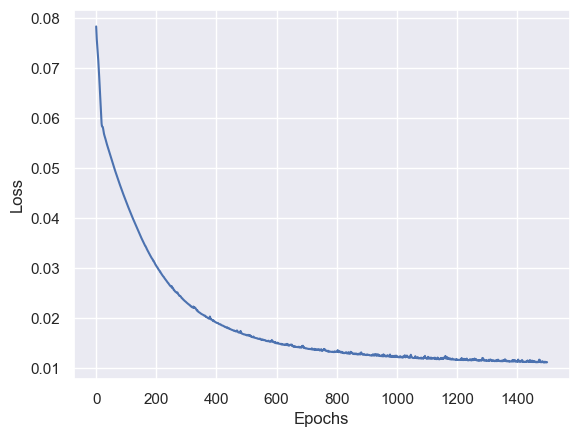

In [141]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

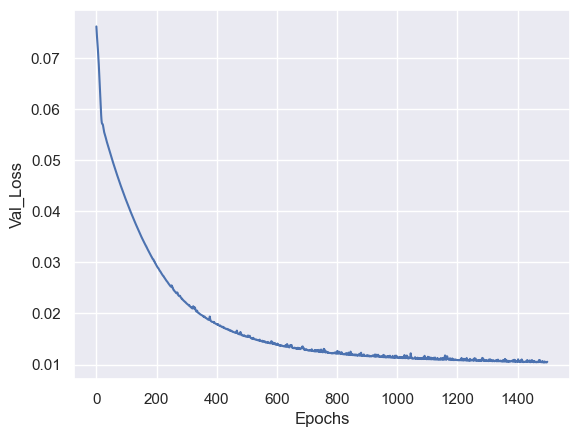

In [142]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [143]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\SIFE-Giants.h5


In [144]:
predSIFE = modelSIFE.predict(X_test)

29/29 [==============================] - 0s 2ms/step


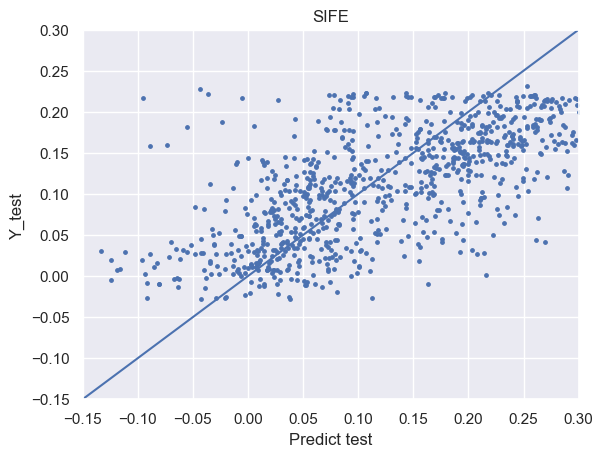

In [145]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [146]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 42.0%


In [147]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [148]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061  4381.6500  1.668714 -0.71171  0.298125   
iDR4_3_SPLUS-n13s37_0039783   4905.6630  2.409293 -0.41882  0.257585   
iDR4_3_MC0105_0024606         5030.6387  3.647585 -0.44044  0.287305   
iDR4_3_MC0022_0021799         4857.5940  3.050860 -0.10433  0.029686   
iDR4_3_SPLUS-n11s35_0003664   4974.9766  3.018178 -0.38805  0.261805   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-s02s07_0032429   5142.5070  2.570743 -0.64862  0.217715   
iDR4_3_MC0048_0007592         4352.4624  0.947510 -1.39140  0.082979   
iDR4_3_SPLUS-n10s38_0045425   5055.6690  3.572111 -0.32847  0.273375   
iDR4_3_MC0137_0039580         4096.2570  0.701436 -1.18880  0.024127   
iDR4_3_MC0003_0034591         4869.4907  3.432368 -0.29800  0.179165   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061 -0.005827  0.244905  0.089963  0.061972   
iDR4_3_SPLUS-n13s37_0039783   0.189950  0.241075  0.125780  0.140442   
iDR4_3_MC0105_0024606         0.152970  0.228085 -0.108690  0.112573   
iDR4_3_MC0022_0021799         0.021853 -0.015636  0.155840 -0.006297   
iDR4_3_SPLUS-n11s35_0003664   0.024054  0.186915  0.322190  0.049432   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s07_0032429   0.126450  0.187305  0.367950  0.042422   
iDR4_3_MC0048_0007592        -0.740430  0.171755  0.494780 -0.167807   
iDR4_3_SPLUS-n10s38_0045425   0.142700  0.243635 -0.088807  0.176872   
iDR4_3_MC0137_0039580        -0.566110  0.140245  0.384910 -0.102507   
iDR4_3_MC0003_0034591         0.032659  0.124245  0.008598  0.041463   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0111_0021061  0.330643  0.248771       0.211743    -0.275968   
iDR4_3_SPLUS-n13s37_0039783   0.306403  0.286381       0.192647     0.065694   
iDR4_3_MC0105_0024606         0.389943  0.193881       0.244148     0.070470   
iDR4_3_MC0022_0021799         0.045207  0.028342       0.103415     0.064097   
iDR4_3_SPLUS-n11s35_0003664   0.301483  0.249251       0.190193     0.073845   
...                                ...       ...            ...          ...   
iDR4_3_SPLUS-s02s07_0032429   0.268883  0.184751       0.241703     0.076159   
iDR4_3_MC0048_0007592         0.171633  0.002825       0.020339    -0.329149   
iDR4_3_SPLUS-n10s38_0045425   0.395133  0.200481       0.226958     0.068651   
iDR4_3_MC0137_0039580         0.076287  0.046401       0.026821    -0.419462   
iDR4_3_MC0003_0034591         0.235243  0.129301       0.166443     0.073347   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0111_0021061      0.108972     0.140107      0.238612   
iDR4_3_SPLUS-n13s37_0039783       0.112419     0.247374      0.225994   
iDR4_3_MC0105_0024606             0.145865    -0.095380      0.297873   
iDR4_3_MC0022_0021799             0.083710     0.343405      0.118345   
iDR4_3_SPLUS-n11s35_0003664       0.108499     0.051469      0.225567   
...                                    ...          ...           ...   
iDR4_3_SPLUS-s02s07_0032429       0.128197     0.020167      0.284043   
iDR4_3_MC0048_0007592             0.073642     1.773955      0.129506   
iDR4_3_SPLUS-n10s38_0045425       0.131529    -0.010924      0.272344   
iDR4_3_MC0137_0039580             0.039272     0.092771      0.017359   
iDR4_3_MC0003_0034591             0.112187     0.035100      0.207594   

                              SIFE_predict  
ID                                          
iDR4_3_STRIPE82-0111_0021061      0.164905  
iDR4_3_SPLUS-n13s37_0039783       0

In [149]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [150]:
Parametro = "NIFE"
columnTrain = 'NI_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [151]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0143_0003451         4680.4443  1.839885 -0.77854 -0.004408   
iDR4_3_STRIPE82-0126_0014479  5047.7800  3.111542 -0.78587  0.279465   
iDR4_3_SPLUS-s26s10_0023310   4438.6740  1.023774 -1.71860  0.109859   
iDR4_3_STRIPE82-0109_0019417  4804.0854  2.698043 -0.40162  0.139495   
iDR4_3_SPLUS-n01s18_0009631   4982.1943  3.271730 -0.43976  0.244805   
...                                 ...       ...      ...       ...   
iDR4_3_MC0105_0004056         4306.4697  0.826041 -1.48170  0.106860   
iDR4_3_MC0063_0080166         5604.8940  1.480979 -0.50347 -0.020159   
iDR4_3_SPLUS-n02s18_0030002   4793.0940  2.842208 -0.23229  0.102580   
iDR4_3_MC0095_0084405         4093.7842  0.672740 -1.14440  0.009647   
iDR4_3_MC0062_0041347         4295.9727  2.630941 -0.68082 -0.018534   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0143_0003451        -1.319160  0.206215  1.209240  0.100502   
iDR4_3_STRIPE82-0126_0014479  0.059045  0.158445  0.089993  0.123173   
iDR4_3_SPLUS-s26s10_0023310  -0.611300  0.220305  0.288950 -0.149107   
iDR4_3_STRIPE82-0109_0019417  0.009724  0.074162  0.093637  0.019873   
iDR4_3_SPLUS-n01s18_0009631   0.160170  0.180895 -0.121730  0.144143   
...                                ...       ...       ...       ...   
iDR4_3_MC0105_0004056        -0.763040  0.122615  0.756880 -0.095908   
iDR4_3_MC0063_0080166        -0.551410 -0.012359 -0.344100 -0.112028   
iDR4_3_SPLUS-n02s18_0030002  -0.088924  0.065501  0.118970  0.039142   
iDR4_3_MC0095_0084405        -0.553040  0.125265  0.140960 -0.065807   
iDR4_3_MC0062_0041347         0.222050  0.037275  0.009800  0.084642   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0143_0003451        -0.284217  0.034664  
iDR4_3_STRIPE82-0126_0014479  0.326383  0.248791  
iDR4_3_SPLUS-s26s10_0023310  -0.034704  0.121751  
iDR4_3_STRIPE82-0109_0019417  0.184223  0.098101  
iDR4_3_SPLUS-n01s18_0009631   0.319283  0.186861  
...                                ...       ...  
iDR4_3_MC0105_0004056        -0.126827  0.118571  
iDR4_3_MC0063_0080166        -0.258977 -0.102499  
iDR4_3_SPLUS-n02s18_0030002   0.131934  0.092371  
iDR4_3_MC0095_0084405         0.068977 -0.017430  
iDR4_3_MC0062_0041347        -0.001017  0.097814  

[3236 rows x 10 columns]

In [152]:
modelNIFE = baseline_model_teste()

In [153]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.0614 - val_loss: 0.0616 - 551ms/epoch - 276ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.0609 - val_loss: 0.0612 - 76ms/epoch - 38ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.0605 - val_loss: 0.0609 - 67ms/epoch - 34ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.0602 - val_loss: 0.0606 - 57ms/epoch - 29ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.0599 - val_loss: 0.0602 - 68ms/epoch - 34ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.0595 - val_loss: 0.0599 - 62ms/epoch - 31ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.0592 - val_loss: 0.0596 - 57ms/epoch - 29ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.0589 - val_loss: 0.0592 - 58ms/epoch - 29ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.0585 - val_loss: 0.0589 - 68ms/epoch - 34ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.0582 - val_loss: 0.0586 - 67ms/epoch - 34ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.0579 - val_loss: 0.0582 - 61ms/epoch - 30ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.0575 - val_loss: 0.0579 - 56ms/epoch - 28ms/step
Epoch 13/2000
2/2 - 0s 

Epoch 101/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0385 - 53ms/epoch - 27ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0383 - 46ms/epoch - 23ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0382 - 49ms/epoch - 25ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0380 - 42ms/epoch - 21ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0378 - 45ms/epoch - 23ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0377 - 47ms/epoch - 24ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0375 - 47ms/epoch - 23ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0374 - 45ms/epoch - 22ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0372 - 44ms/epoch - 22ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0366 - val_loss: 0.0371 - 47ms/epoch - 24ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0369 - 44ms/epoch - 22ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0367 - 53ms/epoch - 26ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0263 - 55ms/epoch - 27ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0262 - 51ms/epoch - 25ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0262 - 50ms/epoch - 25ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0260 - 57ms/epoch - 29ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0260 - 55ms/epoch - 28ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0259 - 51ms/epoch - 26ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0258 - 46ms/epoch - 23ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0257 - 53ms/epoch - 27ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0256 - 52ms/epoch - 26ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0256 - 53ms/epoch - 27ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0254 - 68ms/epoch - 34ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0254 - 54ms/epoch - 27ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0195 - 52ms/epoch - 26ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0195 - 54ms/epoch - 27ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0194 - 52ms/epoch - 26ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0195 - 51ms/epoch - 26ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0190 - val_loss: 0.0193 - 53ms/epoch - 26ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0193 - 51ms/epoch - 25ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0189 - val_loss: 0.0192 - 50ms/epoch - 25ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0188 - val_loss: 0.0191 - 54ms/epoch - 27ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0192 - 54ms/epoch - 27ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0191 - 52ms/epoch - 26ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0187 - val_loss: 0.0191 - 55ms/epoch - 28ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0186 - val_loss: 0.0190 - 54ms/epoch - 27ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0156 - 53ms/epoch - 26ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0156 - 56ms/epoch - 28ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0156 - 52ms/epoch - 26ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0157 - 53ms/epoch - 27ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0157 - 51ms/epoch - 26ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0154 - val_loss: 0.0157 - 53ms/epoch - 27ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0155 - 57ms/epoch - 29ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0156 - 51ms/epoch - 25ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0154 - 51ms/epoch - 26ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0150 - val_loss: 0.0154 - 52ms/epoch - 26ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0154 - 54ms/epoch - 27ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0155 - 51ms/epoch - 26ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0135 - 48ms/epoch - 24ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0134 - 49ms/epoch - 25ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0129 - val_loss: 0.0135 - 47ms/epoch - 24ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0134 - 49ms/epoch - 25ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0135 - 46ms/epoch - 23ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0134 - 51ms/epoch - 25ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0135 - 49ms/epoch - 25ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0133 - 50ms/epoch - 25ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0135 - 50ms/epoch - 25ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0133 - 53ms/epoch - 26ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0137 - 48ms/epoch - 24ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0130 - val_loss: 0.0132 - 52ms/epoch - 26ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0124 - 49ms/epoch - 25ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0116 - val_loss: 0.0121 - 51ms/epoch - 25ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0122 - 50ms/epoch - 25ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0121 - 53ms/epoch - 26ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0122 - 50ms/epoch - 25ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0121 - 55ms/epoch - 28ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0122 - 51ms/epoch - 26ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0121 - 53ms/epoch - 27ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0123 - 58ms/epoch - 29ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0120 - 54ms/epoch - 27ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0114 - val_loss: 0.0124 - 54ms/epoch - 27ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0115 - val_loss: 0.0121 - 52ms/epoch - 26ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0113 - 51ms/epoch - 25ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0113 - 53ms/epoch - 26ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0113 - 51ms/epoch - 26ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0114 - 51ms/epoch - 26ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0113 - 54ms/epoch - 27ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0113 - 51ms/epoch - 25ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0113 - 52ms/epoch - 26ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0114 - 51ms/epoch - 26ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0113 - 52ms/epoch - 26ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0116 - 52ms/epoch - 26ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0107 - val_loss: 0.0113 - 50ms/epoch - 25ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0106 - val_loss: 0.0114 - 50ms/epoch - 25ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0110 - 51ms/epoch - 25ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0112 - 51ms/epoch - 26ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0112 - 52ms/epoch - 26ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0105 - val_loss: 0.0112 - 50ms/epoch - 25ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0109 - 52ms/epoch - 26ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0110 - 53ms/epoch - 27ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0109 - 53ms/epoch - 27ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0112 - 53ms/epoch - 27ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0101 - val_loss: 0.0111 - 60ms/epoch - 30ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0103 - val_loss: 0.0113 - 57ms/epoch - 29ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0109 - 54ms/epoch - 27ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0102 - val_loss: 0.0110 - 45ms/epoch - 23ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0105 - 48ms/epoch - 24ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0097 - val_loss: 0.0105 - 51ms/epoch - 26ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0105 - 54ms/epoch - 27ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0106 - 54ms/epoch - 27ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0104 - 56ms/epoch - 28ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0105 - 53ms/epoch - 26ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0105 - 51ms/epoch - 25ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0105 - 52ms/epoch - 26ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0104 - 51ms/epoch - 26ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0105 - 53ms/epoch - 27ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0106 - 54ms/epoch - 27ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0096 - val_loss: 0.0104 - 52ms/epoch - 26ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 51ms/epoch - 26ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 52ms/epoch - 26ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 50ms/epoch - 25ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 50ms/epoch - 25ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 51ms/epoch - 25ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 53ms/epoch - 27ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0104 - 51ms/epoch - 26ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 54ms/epoch - 27ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0105 - 52ms/epoch - 26ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0094 - val_loss: 0.0102 - 50ms/epoch - 25ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 52ms/epoch - 26ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 49ms/epoch - 25ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0102 - 54ms/epoch - 27ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0100 - 54ms/epoch - 27ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0101 - 57ms/epoch - 29ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0092 - val_loss: 0.0100 - 51ms/epoch - 26ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0100 - 49ms/epoch - 25ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0100 - 48ms/epoch - 24ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0101 - 53ms/epoch - 27ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0101 - 53ms/epoch - 27ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0101 - 55ms/epoch - 27ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0100 - 48ms/epoch - 24ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0102 - 55ms/epoch - 27ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0091 - val_loss: 0.0100 - 55ms/epoch - 28

Epoch 1188/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0100 - 58ms/epoch - 29ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 56ms/epoch - 28ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0101 - 51ms/epoch - 25ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0099 - 53ms/epoch - 26ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0099 - 54ms/epoch - 27ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0098 - 51ms/epoch - 26ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 53ms/epoch - 26ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0100 - 56ms/epoch - 28ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0099 - 52ms/epoch - 26ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0102 - 53ms/epoch - 27ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0090 - val_loss: 0.0103 - 54ms/epoch - 27ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0093 - val_loss: 0.0102 - 54ms/epoch - 27

Epoch 1286/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 75ms/epoch - 38ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 100ms/epoch - 50ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 55ms/epoch - 27ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0099 - 75ms/epoch - 38ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0097 - 53ms/epoch - 27ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0099 - 69ms/epoch - 34ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 49ms/epoch - 25ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 69ms/epoch - 35ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 52ms/epoch - 26ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0099 - 70ms/epoch - 35ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 50ms/epoch - 25ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 69ms/epoch - 3

Epoch 1384/2000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0096 - 52ms/epoch - 26ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0097 - 51ms/epoch - 26ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0087 - val_loss: 0.0099 - 45ms/epoch - 23ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 45ms/epoch - 23ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0099 - 43ms/epoch - 21ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0098 - 44ms/epoch - 22ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0099 - 45ms/epoch - 23ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0097 - 44ms/epoch - 22ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0100 - 41ms/epoch - 21ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0089 - val_loss: 0.0096 - 42ms/epoch - 21ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0097 - 45ms/epoch - 23

Epoch 1482/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 46ms/epoch - 23ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0095 - 45ms/epoch - 23ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0096 - 47ms/epoch - 24ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0096 - 48ms/epoch - 24ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0096 - 49ms/epoch - 25ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0096 - 49ms/epoch - 25ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0098 - 46ms/epoch - 23ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 61ms/epoch - 31ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 48ms/epoch - 24ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0097 - 48ms/epoch - 24ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 81ms/epoch - 40ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0095 - 49ms/epoch - 25

Epoch 1580/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 51ms/epoch - 26ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0098 - 52ms/epoch - 26ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 53ms/epoch - 27ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0086 - val_loss: 0.0096 - 54ms/epoch - 27ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0096 - 54ms/epoch - 27ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0085 - val_loss: 0.0095 - 49ms/epoch - 25ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0094 - 57ms/epoch - 29ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0094 - 48ms/epoch - 24ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0095 - 52ms/epoch - 26ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0095 - 48ms/epoch - 24ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0095 - 52ms/epoch - 26ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0095 - 50ms/epoch - 25

Epoch 1678/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 53ms/epoch - 27ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 50ms/epoch - 25ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 50ms/epoch - 25ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 54ms/epoch - 27ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 50ms/epoch - 25ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 49ms/epoch - 25ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 51ms/epoch - 26ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0095 - 51ms/epoch - 25ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 51ms/epoch - 26ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0095 - 51ms/epoch - 26ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 55ms/epoch - 28ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 52ms/epoch - 26

Epoch 1776/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 53ms/epoch - 27ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 51ms/epoch - 25ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 51ms/epoch - 26ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 50ms/epoch - 25ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 56ms/epoch - 28ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 50ms/epoch - 25ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 56ms/epoch - 28ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 53ms/epoch - 27ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 48ms/epoch - 24ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 51ms/epoch - 26ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 51ms/epoch - 25ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0094 - 52ms/epoch - 26

Epoch 1874/2000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0093 - 52ms/epoch - 26ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0093 - 50ms/epoch - 25ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0095 - 50ms/epoch - 25ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0095 - 50ms/epoch - 25ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0095 - 57ms/epoch - 29ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0095 - 55ms/epoch - 27ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0098 - 52ms/epoch - 26ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0094 - 56ms/epoch - 28ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0095 - 49ms/epoch - 25ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0093 - 52ms/epoch - 26ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0093 - 53ms/epoch - 26ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0093 - 54ms/epoch - 27

Epoch 1972/2000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0092 - 53ms/epoch - 27ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0080 - val_loss: 0.0092 - 54ms/epoch - 27ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0096 - 52ms/epoch - 26ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0095 - 55ms/epoch - 28ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0095 - 56ms/epoch - 28ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0097 - 51ms/epoch - 26ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0084 - val_loss: 0.0095 - 51ms/epoch - 25ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0093 - 50ms/epoch - 25ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0083 - val_loss: 0.0094 - 52ms/epoch - 26ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0082 - val_loss: 0.0092 - 50ms/epoch - 25ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0093 - 51ms/epoch - 26ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0081 - val_loss: 0.0092 - 50ms/epoch - 25

Text(0, 0.5, 'Loss')

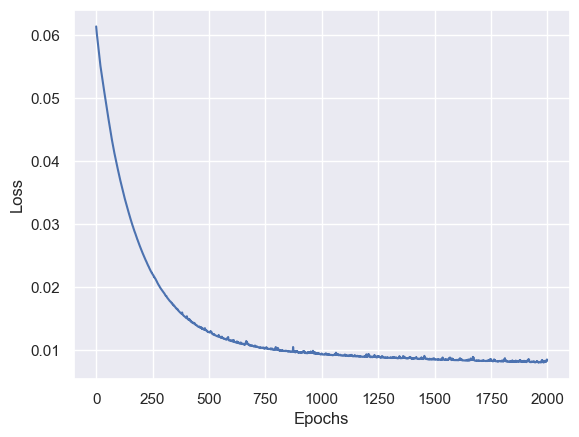

In [154]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

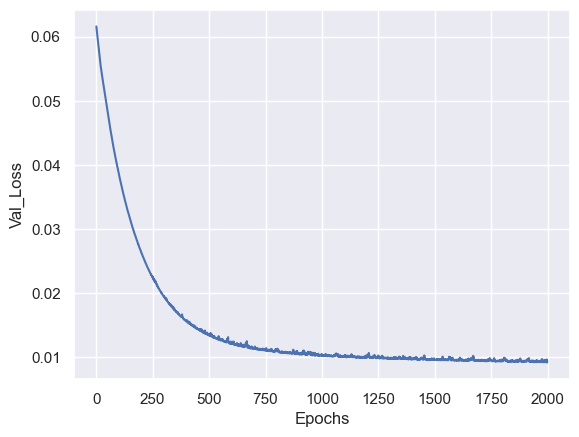

In [155]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [156]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NIFE-Giants.h5


In [157]:
predNIFE = modelNIFE.predict(X_test)

29/29 [==============================] - 0s 3ms/step


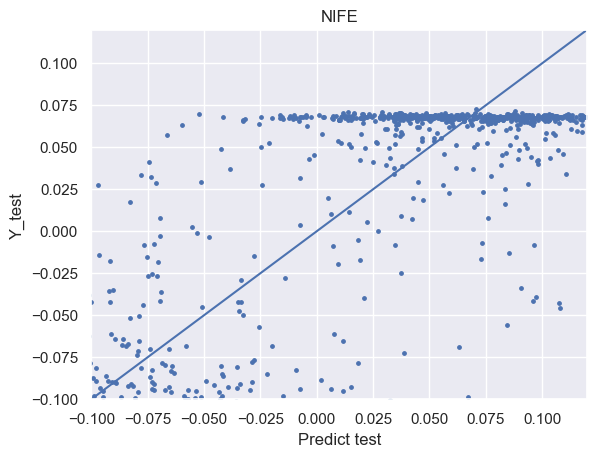

In [158]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [159]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 44.0%


In [160]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [161]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061  4381.6500  1.668714 -0.71171  0.298125   
iDR4_3_SPLUS-n13s37_0039783   4905.6630  2.409293 -0.41882  0.257585   
iDR4_3_MC0105_0024606         5030.6387  3.647585 -0.44044  0.287305   
iDR4_3_MC0022_0021799         4857.5940  3.050860 -0.10433  0.029686   
iDR4_3_SPLUS-n11s35_0003664   4974.9766  3.018178 -0.38805  0.261805   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-s02s07_0032429   5142.5070  2.570743 -0.64862  0.217715   
iDR4_3_MC0048_0007592         4352.4624  0.947510 -1.39140  0.082979   
iDR4_3_SPLUS-n10s38_0045425   5055.6690  3.572111 -0.32847  0.273375   
iDR4_3_MC0137_0039580         4096.2570  0.701436 -1.18880  0.024127   
iDR4_3_MC0003_0034591         4869.4907  3.432368 -0.29800  0.179165   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_STRIPE82-0111_0021061 -0.005827  0.244905  0.089963  0.061972   
iDR4_3_SPLUS-n13s37_0039783   0.189950  0.241075  0.125780  0.140442   
iDR4_3_MC0105_0024606         0.152970  0.228085 -0.108690  0.112573   
iDR4_3_MC0022_0021799         0.021853 -0.015636  0.155840 -0.006297   
iDR4_3_SPLUS-n11s35_0003664   0.024054  0.186915  0.322190  0.049432   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s07_0032429   0.126450  0.187305  0.367950  0.042422   
iDR4_3_MC0048_0007592        -0.740430  0.171755  0.494780 -0.167807   
iDR4_3_SPLUS-n10s38_0045425   0.142700  0.243635 -0.088807  0.176872   
iDR4_3_MC0137_0039580        -0.566110  0.140245  0.384910 -0.102507   
iDR4_3_MC0003_0034591         0.032659  0.124245  0.008598  0.041463   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_STRIPE82-0111_0021061  0.330643  0.248771       0.211743    -0.275968   
iDR4_3_SPLUS-n13s37_0039783   0.306403  0.286381       0.192647     0.065694   
iDR4_3_MC0105_0024606         0.389943  0.193881       0.244148     0.070470   
iDR4_3_MC0022_0021799         0.045207  0.028342       0.103415     0.064097   
iDR4_3_SPLUS-n11s35_0003664   0.301483  0.249251       0.190193     0.073845   
...                                ...       ...            ...          ...   
iDR4_3_SPLUS-s02s07_0032429   0.268883  0.184751       0.241703     0.076159   
iDR4_3_MC0048_0007592         0.171633  0.002825       0.020339    -0.329149   
iDR4_3_SPLUS-n10s38_0045425   0.395133  0.200481       0.226958     0.068651   
iDR4_3_MC0137_0039580         0.076287  0.046401       0.026821    -0.419462   
iDR4_3_MC0003_0034591         0.235243  0.129301       0.166443     0.073347   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0111_0021061      0.108972     0.140107      0.238612   
iDR4_3_SPLUS-n13s37_0039783       0.112419     0.247374      0.225994   
iDR4_3_MC0105_0024606             0.145865    -0.095380      0.297873   
iDR4_3_MC0022_0021799             0.083710     0.343405      0.118345   
iDR4_3_SPLUS-n11s35_0003664       0.108499     0.051469      0.225567   
...                                    ...          ...           ...   
iDR4_3_SPLUS-s02s07_0032429       0.128197     0.020167      0.284043   
iDR4_3_MC0048_0007592             0.073642     1.773955      0.129506   
iDR4_3_SPLUS-n10s38_0045425       0.131529    -0.010924      0.272344   
iDR4_3_MC0137_0039580             0.039272     0.092771      0.017359   
iDR4_3_MC0003_0034591             0.112187     0.035100      0.207594   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_STRIPE82-0111_0021061      0.164905      0.03

In [162]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")